# Advance Lane Finding Project

Project Goals
* Calculate distortion coefficient for camera calibration
* Apply distortion correction
* Apply gradient and color threshold
* Apply perspective transform
* Find lane pixels
* Calculate curvature of lane
* Warp lane back onto original image

## Load required libraries

In [1]:
# Load required libraries
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## Calculate distortion coefficient

In [2]:
# prepare object points
nx = 9
ny = 6

# initialize object points
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

for image in images:
    # Read image
    img = cv2.imread(image)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # If found, draw corners
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)

# Save distortion points to pickle file
# dist_pickle = { 
#                 "objpoints" : objpoints, 
#                 "imgpoints" : imgpoints
#               }
# pickle.dump( dist_pickle, open( "distortion_pickle.p", "wb" ) )
#cv2.destroyAllWindows()

# Calculate distortion coefficients and camera matrix
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

# Save the distortion coefficients and camera matrix
dist_pickle = { 
                "mtx" : mtx, 
                "dist" : dist
              }
pickle.dump( dist_pickle, open( "distortion_pickle.p", "wb" ) )

In [3]:
# Define distortion functions

def load_distortion():
    """
    Retrieve distortion coefficients from pickle file
    """
    dist_pickle = pickle.load( open( "distortion_pickle.p", "rb" ) )
    mtx = dist_pickle['mtx']
    dist = dist_pickle['dist']
    return mtx, dist

def undistort_img(img, mtx, dist):
    """
    Undistort image
    """
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


In [4]:
# Define gradient and color threshold functions






In [5]:
profiles = {
    'sobel5' : {
        'sobel': {
            'sobel_dir_thresh': {
                'sobel_kernel': 5,
                'threshold': (0.7, 1.3)
            },
            'sobel_abs_thresh_x': {
                'sobel_kernel': 5,
                'threshold': (20, 100)
            },
            'sobel_abs_thresh_y' : {
                'sobel_kernel': 5,
                'threshold': (20, 100)
            },
            'sobel_mag_thresh' : {
                'sobel_kernel': 5,
                'threshold': (30, 100)
            }
        },
        'color' : {
            'white_lane_detection': {
                
            },
            'yellow_lane_defection' : {
                
            }
        }
    },
    'default': {
        'sobel': {
            'sobel_dir_thresh': {
                'sobel_kernel': 3,
                'threshold': (0.7, 1.3)
            },
            'sobel_abs_thresh_x': {
                'sobel_kernel': 3,
                'threshold': (20, 100)
            },
            'sobel_abs_thresh_y' : {
                'sobel_kernel': 3,
                'threshold': (20, 100)
            },
            'sobel_mag_thresh' : {
                'sobel_kernel': 3,
                'threshold': (30, 100)
            }
        },
        'color' : {
            'white_lane_detection': {
                
            },
            'yellow_lane_defection' : {
                
            }
        }
    }
}

In [6]:
# Control panel

from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def profile_input(profile_name):
    print('Profile: ', profile_name)

def sobel_kernel_input(sobel_kernel):
    print(sobel_kernel)
    
def sobel_gradient_direction_threshold_input(threshold):
    print('Sobel gradient direction threshold: ', threshold)
    
    
def sobel_x_gradient_threshold_input(threshold):
    print('Sobel x gradient threshold: ', threshold)
    
def sobel_y_gradient_threshold_input(threshold):
    print('Sobel y gradient threshold: ', threshold)
    
def sobel_gradient_magnitude_threshold_input(threshold):
    print('Sobel gradient magnitude threshold: ', threshold)

interact(sobel_kernel_input, sobel_kernel=widgets.IntSlider(min=1,max=30,step=2,value=3, description='Sobel Kernel'));

interact(sobel_gradient_direction_threshold_input, threshold=widgets.FloatRangeSlider(
    value=[0.7, 1.3],
    min=0,
    max=np.pi/2,
    step=0.1,
    description='Sobel gradient direction threshold:',
    orientation='horizontal'
));

interact(sobel_x_gradient_threshold_input, threshold=widgets.IntRangeSlider(
    value=[20, 100],
    min=0,
    max=255,
    step=1,
    description='Sobel x gradient threshold:',
    orientation='horizontal'
));

interact(sobel_y_gradient_threshold_input, threshold=widgets.IntRangeSlider(
    value=[20, 100],
    min=0,
    max=255,
    step=1,
    description='Sobel y gradient threshold:',
    orientation='horizontal'
));

interact(sobel_gradient_magnitude_threshold_input, threshold=widgets.IntRangeSlider(
    value=[30, 100],
    min=0,
    max=255,
    step=1,
    description='Sobel gradient magnitude threshold:',
    orientation='horizontal'
));

interact(profile_input, profile_name=widgets.Dropdown(
    options=profiles,
    description='Profile:',
    disabled=False,
))


Profile:  {'color': {'white_lane_detection': {}, 'yellow_lane_defection': {}}, 'sobel': {'sobel_mag_thresh': {'threshold': (30, 100), 'sobel_kernel': 5}, 'sobel_abs_thresh_x': {'threshold': (20, 100), 'sobel_kernel': 5}, 'sobel_abs_thresh_y': {'threshold': (20, 100), 'sobel_kernel': 5}, 'sobel_dir_thresh': {'threshold': (0.7, 1.3), 'sobel_kernel': 5}}}


<function __main__.profile_input(profile_name)>

In [7]:
# Sobel class
class SobelThreshold:
    def __init__(self, sobel_profile):
        self.sobel_profile = sobel_profile
    def sobel_dir_thresh(self, img, sobel_kernel=3, thresh=(0, np.pi / 2)):
        """
        Applies sobel x and y, compute direction of gradient and apply threshold
        """
        # 1) Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # 2) Take the gradient in x and y separately
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

        # 3) Take the absolute value of the x and y gradients
        abs_sobelx = np.absolute(sobelx)
        abs_sobely = np.absolute(sobely)

        # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
        sobel_gradient = np.arctan2(abs_sobely, abs_sobelx)

        # 5) Create a binary mask where direction thresholds are met
        binary_output = np.zeros_like(sobel_gradient)

        # 6) Return this mask as your binary_output image
        binary_output[((sobel_gradient >= thresh[0]) & (sobel_gradient <= thresh[1]))] = 1
        return binary_output

    def sobel_abs_thresh(self, img, orient='x', sobel_kernel=3, thresh=(0, 255)):
        """
        Applies either sobel x or y and applies threshold on the absolute gradient
        """
        # Apply the following steps to img
        # 1) Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # 2) Take the derivative in x or y given orient = 'x' or 'y'
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1 if orient == 'x' else 0, 1 if orient == 'y' else 0, ksize=sobel_kernel)

        # 3) Take the absolute value of the derivative or gradient
        abs_sobel = np.absolute(sobel)

        # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
        scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

        # 5) Create a mask of 1's where the scaled gradient magnitude
        # is > thresh_min and < thresh_max
        binary_output = np.zeros_like(scaled_sobel)
        binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

        # 6) Return this mask as your binary_output image
        return binary_output

    def sobel_mag_thresh(self, img, sobel_kernel=3, mag_thresh=(0, 255)):
        """
        Compute magnitude of gradient from sobel x and y and apply threshold
        """
        # Apply the following steps to img
        # 1) Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # 2) Take the gradient in x and y separately
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

        # 3) Calculate the magnitude
        abs_sobelx = np.sqrt(np.square(sobelx))
        abs_sobely = np.sqrt(np.square(sobelx))
        abs_sobelxy = np.sqrt((np.square(sobelx) + np.square(sobely)))


        # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
        scaled_sobelx = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
        scaled_sobely = np.uint8(255 * abs_sobely / np.max(abs_sobely))
        scaled_sobelxy = np.uint8(255 * abs_sobelxy / np.max(abs_sobelxy))


        # 5) Create a binary mask where mag thresholds are met
        binary_output = np.zeros_like(scaled_sobelxy)

        # 6) Return this mask as your binary_output image
        # binary_output[((scaled_sobelx >= mag_thresh[0]) & (scaled_sobelx <= mag_thresh[1]) | (scaled_sobely >= mag_thresh[0]) & (scaled_sobely <= mag_thresh[1]) | (scaled_sobelxy >= mag_thresh[0]) & (scaled_sobelxy <= mag_thresh[1]))] = 1
        binary_output[(scaled_sobelxy >= mag_thresh[0]) & (scaled_sobelxy <= mag_thresh[1])] = 1

        return binary_output

    def apply_sobel(self, image):
        """
        Apply each of the sobel functions and combined them
        """
        gradx = self.sobel_abs_thresh(image, orient='x', sobel_kernel=self.sobel_profile['sobel_abs_thresh_x']['sobel_kernel'], thresh=self.sobel_profile['sobel_abs_thresh_x']['threshold'])
        grady = self.sobel_abs_thresh(image, orient='y', sobel_kernel=self.sobel_profile['sobel_abs_thresh_y']['sobel_kernel'], thresh=self.sobel_profile['sobel_abs_thresh_y']['threshold'])
        mag_binary = self.sobel_mag_thresh(image, sobel_kernel=self.sobel_profile['sobel_mag_thresh']['sobel_kernel'], mag_thresh=self.sobel_profile['sobel_mag_thresh']['threshold'])
        dir_binary = self.sobel_dir_thresh(image, sobel_kernel=self.sobel_profile['sobel_dir_thresh']['sobel_kernel'], thresh=self.sobel_profile['sobel_dir_thresh']['threshold'])

        combined = np.zeros_like(dir_binary)
        combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

        return combined


In [8]:
# Color threshold class
class ColorThreshold:
    def __init__(self, color_profile):
        self.color_profile = color_profile
    def hls(self, image):
        """
        Get the hue, lightness and saturation values of the image
        """
        hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

        h_channel = hls[:, :, 0]
        l_channel = hls[:, :, 1]
        s_channel = hls[:, :, 2]

        return h_channel, l_channel, s_channel

    def hsv(self, image):
        """
        Get the hue, saturation and value (brightness) values of the image
        """
        hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        h_channel = hsv[:, :, 0]
        s_channel = hsv[:, :, 1]
        v_channel = hsv[:, :, 2]

        return h_channel, s_channel, v_channel

    def rgb(self, image):
        """
        Get the red, green and blue values of the image
        """
        B = image[:,:,0]
        G = image[:,:,1]
        R = image[:,:,2]        

        return R, G, B

    def apply_color_threshold(self, color_channel, threshold = (0, 255)):
        """
        Applies a color threshold filter on a specific color channel
        """
        binary = np.zeros_like(color_channel)
        binary[(color_channel > threshold[0]) & (color_channel <= threshold[1])] = 1

        return binary
    def apply_threshold_rgb(self, image):
        R, G, B = self.rgb(image)
        
        r_threshold = self.apply_color_threshold(R, (200, 255))
        g_threshold = self.apply_color_threshold(G, (200, 255))
        b_threshold = self.apply_color_threshold(B, (200, 255))
        
        # Preview output
#         f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(36, 18))
#         f.tight_layout()
#         ax1.imshow(R, cmap='gray')
#         ax1.set_title('R', fontsize=40)
#         ax2.imshow(G, cmap='gray')
#         ax2.set_title('G', fontsize=40)
#         ax3.imshow(B, cmap='gray')
#         ax3.set_title('B', fontsize=40)
#         ax4.imshow(r_threshold, cmap='gray')
#         ax4.set_title('R thresh', fontsize=40)
#         ax5.imshow(g_threshold, cmap='gray')
#         ax5.set_title('G thresh', fontsize=40)
#         ax6.imshow(b_threshold, cmap='gray')
#         ax6.set_title('B thresh', fontsize=40)
#         plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#         plt.show()
        
    def apply_threshold_hsv(self, image):
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        
        H, S, V = self.hsv(image)
        
        h_threshold = self.apply_color_threshold(H, (15, 30))
        s_threshold = self.apply_color_threshold(S, (90, 255))
        v_threshold = self.apply_color_threshold(V, (190, 255))
        
        # Preview output
#         f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(36, 18))
#         f.tight_layout()
#         ax1.imshow(H, cmap='gray')
#         ax1.set_title('H', fontsize=40)
#         ax2.imshow(S, cmap='gray')
#         ax2.set_title('S', fontsize=40)
#         ax3.imshow(V, cmap='gray')
#         ax3.set_title('V', fontsize=40)
#         ax4.imshow(h_threshold, cmap='gray')
#         ax4.set_title('H thresh', fontsize=40)
#         ax5.imshow(s_threshold, cmap='gray')
#         ax5.set_title('S thresh', fontsize=40)
#         ax6.imshow(v_threshold, cmap='gray')
#         ax6.set_title('V thresh', fontsize=40)
#         plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#         plt.show()
        
    def apply_threshold_hls(self, image):
        H, L, S = self.hls(image)
        
        h_threshold = self.apply_color_threshold(H, (60, 100))
        l_threshold = self.apply_color_threshold(L, (190, 255))
        s_threshold = self.apply_color_threshold(S, (90, 255))
        
        # Preview output
#         f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(36, 18))
#         f.tight_layout()
#         ax1.imshow(H, cmap='gray')
#         ax1.set_title('H', fontsize=40)
#         ax2.imshow(L, cmap='gray')
#         ax2.set_title('L', fontsize=40)
#         ax3.imshow(S, cmap='gray')
#         ax3.set_title('S', fontsize=40)
#         ax4.imshow(h_threshold, cmap='gray')
#         ax4.set_title('H thresh', fontsize=40)
#         ax5.imshow(l_threshold, cmap='gray')
#         ax5.set_title('L thresh', fontsize=40)
#         ax6.imshow(s_threshold, cmap='gray')
#         ax6.set_title('S thresh', fontsize=40)
#         plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#         plt.show()
        
    def apply_threshold(self, image):
        R, G, B = self.rgb(image)
        H, S, V = self.hsv(image)
        
        # For white marking, use the green channel
        g_threshold = self.apply_color_threshold(G, (230, 255))
        
        # For yellow lines, use a combination of HS
        s_threshold = self.apply_color_threshold(S, (90, 255))
        h_threshold = self.apply_color_threshold(H, (10, 25))
        
        binary = np.zeros_like(G)
        binary[(g_threshold == 1) | ((s_threshold == 1) & (h_threshold == 1))] = 1
        
        # Preview output
#         f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(48, 9))
#         f.tight_layout()
#         ax1.imshow(g_threshold, cmap='gray')
#         ax1.set_title('G thresh', fontsize=40)
#         ax2.imshow(s_threshold, cmap='gray')
#         ax2.set_title('S thresh', fontsize=40)
#         ax3.imshow(h_threshold, cmap='gray')
#         ax3.set_title('H thresh', fontsize=40)
#         ax4.imshow(binary, cmap='gray')
#         ax4.set_title('Binary', fontsize=40)
#         plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#         plt.show()
        
        return binary
        
        
        

In [9]:
# Finding lines using histogram sliding window
class HistogramSliding:
    def __init__(self):
        # HYPERPARAMETERS
        # Set the width of the windows +/- margin
        self.margin = 100
        # Set minimum number of pixels found to recenter window
        self.minpix = 50
        # Choose the number of sliding windows
        self.nwindows = 9
    def find_hist_peak_x(self, binary_warped, y_min, y_max, lane_side):
        '''
        Find peak x from history for a specific y section
        '''
        # Take a histogram of the bottom half of the image (ymin:ymax, x:x)
        histogram = np.sum(binary_warped[y_min:y_max, :], axis=0)

        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = np.int(histogram.shape[0] // 2)
        
        if lane_side == 'left':
            x_base = np.argmax(histogram[:midpoint])
        else:
            x_base = np.argmax(histogram[midpoint:]) + midpoint

        return x_base
    def find_lane_pixels_window(self, binary_warped, nonzeroy, nonzerox, win_y_low, win_y_high, window, window_height, x_current, lane_inds, lane_side):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window + 1) * window_height
        win_y_high = binary_warped.shape[0] - window * window_height
        # Find the four below boundaries of the window 
        win_x_low =  x_current - self.margin
        win_x_high = x_current + self.margin

        # Identify the nonzero pixels in x and y within the window ###
        good_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_x_low) & (nonzerox < win_x_high)).nonzero()[0]
        
        # Append these indices to the lists
        lane_inds.append(good_inds)

        # If found indice count > minpix pixels, recenter next window ###
        # (`right` or `leftx_current`) on their mean position ###
        if len(good_inds) > self.minpix:
            x_current = np.int(np.mean(nonzerox[good_inds]))
        elif lane_side == 'left':
#             print('finding new x - left. Good left count: {} Window: {}'.format(len(good_inds), window))
            x_current = self.find_hist_peak_x(binary_warped, (win_y_low - window_height), (win_y_high - window_height), 'left')
        else:
#             print('finding new x - right. Good right count: {} Window: {}'.format(len(good_inds), window))
            x_current = self.find_hist_peak_x(binary_warped, (win_y_low - window_height), (win_y_high - window_height), 'right')
        
        return win_x_low, win_x_high, x_current, lane_inds
    def find_lane_pixels(self, binary_warped):
        # Create an output image to draw on and visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        leftx_base = self.find_hist_peak_x(binary_warped, (binary_warped.shape[0] // 2), binary_warped.shape[0], 'left')
        rightx_base = self.find_hist_peak_x(binary_warped, (binary_warped.shape[0] // 2), binary_warped.shape[0], 'right')

        # Set height of windows - based on nwindows above and image shape
        window_height = np.int(binary_warped.shape[0] // self.nwindows)
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Current positions to be updated later for each window in nwindows
        leftx_current = leftx_base
        rightx_current = rightx_base

        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Step through the windows one by one
        for window in range(self.nwindows):
             # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window + 1) * window_height
            win_y_high = binary_warped.shape[0] - window * window_height
            
            
            win_xleft_low, win_xleft_high, leftx_current, left_lane_inds = self.find_lane_pixels_window(binary_warped, nonzeroy, nonzerox, win_y_low, win_y_high, window, window_height, leftx_current, left_lane_inds, 'left')
                
            cv2.rectangle(out_img, (win_xleft_low, win_y_low),
                          (win_xleft_high, win_y_high), (0, 255, 0), 2)

            win_xright_low, win_xright_high, rightx_current, right_lane_inds = self.find_lane_pixels_window(binary_warped, nonzeroy, nonzerox, win_y_low, win_y_high, window, window_height, rightx_current, right_lane_inds, 'right')
            cv2.rectangle(out_img, (win_xright_low, win_y_low),
                          (win_xright_high, win_y_high), (0, 255, 0), 2)

        # Concatenate the arrays of indices (previously was a list of lists of pixels)
        try:
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
        except ValueError:
            # Avoids an error if the above is not implemented fully
            pass

        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds]
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

        return leftx, lefty, rightx, righty, out_img
    def find_lane_pixels_lane(self, binary_warped, lane_side):
        """
        Find lane pixels for a specific lane
        """
        # Create an output image to draw on and visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))
        # Find the peak of the left or right halves of the histogram
        # These will be the starting point for the left or right lines
        x_base = self.find_hist_peak_x(binary_warped, (binary_warped.shape[0] // 2), binary_warped.shape[0], lane_side)

        # Set height of windows - based on nwindows above and image shape
        window_height = np.int(binary_warped.shape[0] // self.nwindows)
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Current positions to be updated later for each window in nwindows
        x_current = x_base

        # Create empty lists to receivelane pixel indices
        lane_inds = []

        # Step through the windows one by one
        for window in range(self.nwindows):
             # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window + 1) * window_height
            win_y_high = binary_warped.shape[0] - window * window_height
            
            win_x_low, win_x_high, x_current, lane_inds = self.find_lane_pixels_window(binary_warped, nonzeroy, nonzerox, win_y_low, win_y_high, window, window_height, x_current, lane_inds, lane_side)                
            cv2.rectangle(out_img, (win_x_low, win_y_low),
                          (win_x_high, win_y_high), (0, 255, 0), 2)
            
        # Concatenate the arrays of indices (previously was a list of lists of pixels)
        try:
            lane_inds = np.concatenate(lane_inds)
        except ValueError:
            # Avoids an error if the above is not implemented fully
            pass

        # Extract line pixel positions
        x = nonzerox[lane_inds]
        y = nonzeroy[lane_inds]

        return x, y, out_img
    def fit_line(self, x, y, ploty):
        fit = None
        try:
            fit = np.polyfit(y, x, 2)
            fitx = fit[0] * ploty ** 2 + fit[1] * ploty + fit[2]
            line_detected = True
        except TypeError:
            # Catch error if fit are none or in correct
            fitx = 1 * ploty ** 2 + 1 * ploty
            line_detected = False
            
        return line_detected, fit, fitx
    def visualize(self, out_img, x, y, fitx, ploty, lane_side):
        """
        Add visualization of detected line to image
        """
        # Colors in the left and right lane regions
        if lane_side == 'left':
            out_img[y, x] = [255, 0, 0]
        else:
            out_img[y, x] = [0, 0, 255]

        plt.imshow(out_img)

        # Plots the polynomials on the lane lines
        plt.plot(fitx, ploty, color='yellow')
    def fit_polynomial(self, binary_warped, lane_side = 'both'):
        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0] - 1, binary_warped.shape[0])
        
        # Find our lane pixels first
        if lane_side == 'both':
            # Find lane pixels
            leftx, lefty, rightx, righty, out_img = self.find_lane_pixels(binary_warped)
            # Line polynomial coefficients and get fit
            left_line_detected, left_fit, left_fitx = self.fit_line(leftx, lefty, ploty)
            right_line_detected, right_fit, right_fitx = self.fit_line(rightx, righty, ploty)
            
            # visualization
#             self.visualize(out_img, leftx, lefty, left_fitx, ploty, 'left')
#             self.visualize(out_img, rightx, righty, right_fitx, ploty, 'right')
#             plt.show()
            
            return out_img, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected
        else: # lane_side = right/right
            # Find lane pixels
            x, y, out_img = self.find_lane_pixels_lane(binary_warped, lane_side)
            # Line polynomial coefficients and get fit
            line_detected, fit, fitx = self.fit_line(x, y, ploty)
            
            # visualization
#             self.visualize(out_img, x, y, fitx, ploty, lane_side)
#             plt.show()
            
            return out_img, fit, fitx, x, y, line_detected

In [10]:
# Finding lines using convolution sliding window
class ConvolutionSliding:
    def __init__(self):
        # window settings
        self.window_width = 50
        self.window_height = 80  # Break image into 9 vertical layers since image height is 720
        self.margin = 100  # How much to slide left and right for searching
    def window_mask(self, width, height, img_ref, center, level):
        output = np.zeros_like(img_ref)
        output[int(img_ref.shape[0] - (level + 1) * height):int(img_ref.shape[0] - level * height),
        max(0, int(center - width / 2)):min(int(center + width / 2), img_ref.shape[1])] = 1
        return output

    def window_indices(self, width, height, img_ref, center, level, nonzeroy, nonzerox):
        # y
        win_y_low = int(img_ref.shape[0] - (level + 1) * height)
        win_y_high = int(img_ref.shape[0] - level * height)

        # x
        win_x_low = max(0, int(center - width / 2))
        win_x_high = min(int(center + width / 2), img_ref.shape[1])

        good_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_x_low) & (
                    nonzerox < win_x_high)).nonzero()[0]

        return good_inds
    
    def find_window_centroids(self, image):
        window_centroids = []  # Store the (left,right) window centroid positions per level
        window = np.ones(self.window_width)  # Create our window template that we will use for convolutions

        # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
        # and then np.convolve the vertical image slice with the window template

        # Sum quarter bottom of image to get slice, could use a different ratio
        l_sum = np.sum(image[int(3 * image.shape[0] / 4):, :int(image.shape[1] / 2)], axis=0)
        l_center = np.argmax(np.convolve(window, l_sum)) - self.window_width / 2
        r_sum = np.sum(image[int(3 * image.shape[0] / 4):, int(image.shape[1] / 2):], axis=0)
        r_center = np.argmax(np.convolve(window, r_sum)) - self.window_width / 2 + int(image.shape[1] / 2)

        # Add what we found for the first layer
        window_centroids.append((l_center, r_center))

        # Go through each layer looking for max pixel locations
        for level in range(1, (int)(image.shape[0] / self.window_height)):
            # convolve the window into the vertical slice of the image
            image_layer = np.sum(
                image[int(image.shape[0] - (level + 1) * self.window_height):int(image.shape[0] - level * self.window_height), :],
                axis=0)
            conv_signal = np.convolve(window, image_layer)
            # Find the best left centroid by using past left center as a reference
            # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
            offset = self.window_width / 2
            l_min_index = int(max(l_center + offset - self.margin, 0))
            l_max_index = int(min(l_center + offset + self.margin, image.shape[1]))
            l_center = np.argmax(conv_signal[l_min_index:l_max_index]) + l_min_index - offset
            # Find the best right centroid by using past right center as a reference
            r_min_index = int(max(r_center + offset - self.margin, 0))
            r_max_index = int(min(r_center + offset + self.margin, image.shape[1]))
            r_center = np.argmax(conv_signal[r_min_index:r_max_index]) + r_min_index - offset
            # Add what we found for that layer
            window_centroids.append((l_center, r_center))

        return window_centroids
    def find_window_centroids_lane(self, image, lane_side):
        """
        Find centroids for a specific lane
        """
        window_centroids = []  # Store the (left,right) window centroid positions per level
        window = np.ones(self.window_width)  # Create our window template that we will use for convolutions

        # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
        # and then np.convolve the vertical image slice with the window template

        # Sum quarter bottom of image to get slice, could use a different ratio
        if lane_side == 'left':
            img_sum = np.sum(image[int(3 * image.shape[0] / 4):, :int(image.shape[1] / 2)], axis=0)
            center = np.argmax(np.convolve(window, img_sum)) - self.window_width / 2
        else: # right
            img_sum = np.sum(image[int(3 * image.shape[0] / 4):, int(image.shape[1] / 2):], axis=0)
            center = np.argmax(np.convolve(window, img_sum)) - self.window_width / 2 + int(image.shape[1] / 2)

        # Add what we found for the first layer
        window_centroids.append((center))

        # Go through each layer looking for max pixel locations
        for level in range(1, (int)(image.shape[0] / self.window_height)):
            # convolve the window into the vertical slice of the image
            image_layer = np.sum(
                image[int(image.shape[0] - (level + 1) * self.window_height):int(image.shape[0] - level * self.window_height), :],
                axis=0)
            conv_signal = np.convolve(window, image_layer)
            # Find the best left centroid by using past left center as a reference
            # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
            offset = self.window_width / 2
            min_index = int(max(center + offset - self.margin, 0))
            max_index = int(min(center + offset + self.margin, image.shape[1]))
            center = np.argmax(conv_signal[min_index:max_index]) + min_index - offset

            # Add what we found for that layer
            window_centroids.append((center))

        return window_centroids
    def find_lane_pixels(self, warped, window_centroids):
        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])

        # Points used to draw all the left and right windows
        l_points = np.zeros_like(warped)
        r_points = np.zeros_like(warped)

        # Go through each level and draw the windows
        for level in range(0, len(window_centroids)):
            # Window_mask is a function to draw window areas
            l_mask = self.window_mask(self.window_width, self.window_height, warped, window_centroids[level][0], level)
            r_mask = self.window_mask(self.window_width, self.window_height, warped, window_centroids[level][1], level)
            # Add graphic points from window mask here to total pixels found
            l_points[(l_points == 255) | ((l_mask == 1))] = 255
            r_points[(r_points == 255) | ((r_mask == 1))] = 255

            good_left_inds = self.window_indices(self.window_width, self.window_height, warped, window_centroids[level][0], level, nonzeroy, nonzerox)
            good_right_inds = self.window_indices(self.window_width, self.window_height, warped, window_centroids[level][1], level, nonzeroy, nonzerox)

            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)

        # Concatenate the arrays of indices (previously was a list of lists of pixels)
        try:
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
        except ValueError:
            # Avoids an error if the above is not implemented fully
            pass

        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds]
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
        
        return leftx, lefty, rightx, righty, l_points, r_points
    def find_lane_pixels_lane(self, warped, window_centroids):
        """
        Find lane pixels for a specific lane
        """
        # Create empty lists to receive left or right lane pixel indices
        lane_inds = []

        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])

        # Points used to draw all the left or right windows
        points = np.zeros_like(warped)

        # Go through each level and draw the windows
        for level in range(0, len(window_centroids)):
            # Window_mask is a function to draw window areas
            mask = self.window_mask(self.window_width, self.window_height, warped, window_centroids[level], level)
            # Add graphic points from window mask here to total pixels found
            points[(points == 255) | ((mask == 1))] = 255

            good_inds = self.window_indices(self.window_width, self.window_height, warped, window_centroids[level], level, nonzeroy, nonzerox)

            lane_inds.append(good_inds)

        # Concatenate the arrays of indices (previously was a list of lists of pixels)
        try:
            lane_inds = np.concatenate(lane_inds)
        except ValueError:
            # Avoids an error if the above is not implemented fully
            pass

        # Extract left and right line pixel positions
        x = nonzerox[lane_inds]
        y = nonzeroy[lane_inds]
        
        return x, y, points
    def fit_line(self, x, y, ploty):
        fit = None
        try:
            fit = np.polyfit(y, x, 2)
            fitx = fit[0] * ploty ** 2 + fit[1] * ploty + fit[2]
            line_detected = True
        except TypeError:
            # Catch error if fit are none or in correct
            fitx = 1 * ploty ** 2 + 1 * ploty
            line_detected = False
            
        return line_detected, fit, fitx
    def fit_polynomial(self, warped, lane_side = 'both'):
        if lane_side == 'both':
            window_centroids = self.find_window_centroids(warped)

            # If we found any window centers
            if len(window_centroids) > 0:
                # Generate x and y values for plotting
                ploty = np.linspace(0, warped.shape[0] - 1, warped.shape[0])

                leftx, lefty, rightx, righty, l_points, r_points = self.find_lane_pixels(warped, window_centroids)

                left_line_detected, left_fit, left_fitx = self.fit_line(leftx, lefty, ploty)
                right_line_detected, right_fit, right_fitx = self.fit_line(rightx, righty, ploty)


                ## Visualization ##

                # Plots the left and right polynomials on the lane lines
    #             plt.plot(left_fitx, ploty, color='yellow')
    #             plt.plot(right_fitx, ploty, color='yellow')

                # Draw the results
                template = np.array(r_points + l_points, np.uint8)  # add both left and right window pixels together
                zero_channel = np.zeros_like(template)  # create a zero color channel
                template = np.array(cv2.merge((zero_channel, template, zero_channel)), np.uint8)  # make window pixels green
                warpage = np.dstack((warped, warped, warped)) * 255  # making the original road pixels 3 color channels
                output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0)  # overlay the orignal road image with window results

            # If no window centers found, just display original road image
            else:
                output = np.array(cv2.merge((warped, warped, warped)), np.uint8)
            
            # Display the final results
#             plt.imshow(output)
#             plt.title('window fitting results')
#             plt.show()
            return output, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected
        else: # lane side is left or right
            window_centroids = self.find_window_centroids_lane(warped, lane_side)

            # If we found any window centers
            if len(window_centroids) > 0:
                # Generate x and y values for plotting
                ploty = np.linspace(0, warped.shape[0] - 1, warped.shape[0])

                x, y, points = self.find_lane_pixels_lane(warped, window_centroids)

                line_detected, fit, fitx = self.fit_line(x, y, ploty)

                ## Visualization ##

                # Plots the left and right polynomials on the lane lines
    #             plt.plot(left_fitx, ploty, color='yellow')
    #             plt.plot(right_fitx, ploty, color='yellow')

                # Draw the results
                template = np.array(points, np.uint8)  # add both left and right window pixels together
                zero_channel = np.zeros_like(template)  # create a zero color channel
                template = np.array(cv2.merge((zero_channel, template, zero_channel)), np.uint8)  # make window pixels green
                warpage = np.dstack((warped, warped, warped)) * 255  # making the original road pixels 3 color channels
                output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0)  # overlay the orignal road image with window results

            # If no window centers found, just display original road image
            else:
                output = np.array(cv2.merge((warped, warped, warped)), np.uint8)
                
            # Display the final results
#             plt.imshow(output)
#             plt.title('window fitting results')
#             plt.show()
            return output, fit, fitx, x, y, line_detected



    

In [16]:
# Lane finding class
class Lane:
    def __init__(self, profile_name = 'default'):
        self.mtx, self.dist = load_distortion()
        self.profile = profiles[profile_name]
    def warp(self, image):
        imshape = image.shape
#         top_left = (593, 450)
#         top_right = (687, 450)
        # Warp transform values obtain from inspection
#         top_left = (578, 460)
#         top_right = (704, 460)
        
        top_left = (533, 490)
        top_right = (752, 490)
        bottom_right = (1053, 677)
        bottom_left = (258, 677)
        
#         vertices = np.array([[bottom_left,top_left, top_right, bottom_right]], dtype=np.int32)
#         pts = vertices.reshape((-1,1,2))
#         cv2.polylines(image,[pts],True,(0,0,255), 1)
        
#         cv2.circle(undistorted_image, top_left, 5, (0, 0, 255), -1)
#         cv2.circle(undistorted_image, top_right, 5, (0, 0, 255), -1)
#         cv2.circle(undistorted_image, bottom_right, 5, (0, 0, 255), -1)
#         cv2.circle(undistorted_image, bottom_left, 5, (0, 0, 255), -1)
#         plt.imshow(cv2.cvtColor(selected_region_image, cv2.COLOR_BGR2RGB))
#         plt.show()

        src = np.float32([top_left, top_right, bottom_right, bottom_left])
        dest = np.float32([[300, 0], [980, 0], [980, 720], [300, 720]])

        img_size = (image.shape[1], image.shape[0])
            
        M = cv2.getPerspectiveTransform(src, dest)
        # Use cv2.warpPerspective() to warp image to a top-down view
        warped = cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR)
        
        # calculate inverse perspective matrix
        Minv = cv2.getPerspectiveTransform(dest, src)
        
        return warped, Minv
    
    def hist(self, img):
        '''
        Plot out histogram of bottom half of image
        '''
        bottom_half = img[(img.shape[0]//2):, :]  # img [y:y, x:x]

        histogram = np.sum(bottom_half, axis=0)

        return histogram
    def measure_curvature_pixels(self, image, left_fit, right_fit):
        '''
        Calculates the curvature of polynomial functions in pixels.
        '''
        # Define y-value where we want radius of curvature
        # We'll choose the maximum y-value, corresponding to the bottom of the image
        ploty = np.linspace(0, image.shape[0] - 1, image.shape[0])
        y_eval = np.max(ploty)
        
        # Calculation of R_curve (radius of curvature) #####
        left_curverad = ((1 + (2 * left_fit[0] * y_eval + left_fit[1]) ** 2) ** (3/2)) / np.absolute((2 * left_fit[0]))

        right_curverad = ((1 + (2 * right_fit[0] * y_eval + right_fit[1]) ** 2) ** (3 / 2)) / np.absolute((2 * right_fit[0]))


        return left_curverad, right_curverad
    def measure_curvature_real(self, image, left_fit, right_fit):
        '''
        Calculates the curvature of polynomial functions in meters.
        '''
        # Define conversions in x and y from pixels space to meters
        ym_per_pix = 30 / 720  # meters per pixel in y dimension
        xm_per_pix = 3.7 / 700  # meters per pixel in x dimension
        
        ploty = np.linspace(0, image.shape[0] - 1, image.shape[0])
        
        leftx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
        rightx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]

        left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)

        # Define y-value where we want radius of curvature
        # We'll choose the maximum y-value, corresponding to the bottom of the image
        y_eval = np.max(ploty)

        y_eval = y_eval * ym_per_pix

        # Calculation of R_curve (radius of curvature) #####
        left_curverad = ((1 + (2 * left_fit_cr[0] * y_eval + left_fit_cr[1]) ** 2) ** (3 / 2)) / np.absolute((2 * left_fit_cr[0]))

        right_curverad = ((1 + (2 * right_fit_cr[0] * y_eval + right_fit_cr[1]) ** 2) ** (3 / 2)) / np.absolute((2 * right_fit_cr[0]))

        return left_curverad, right_curverad
    def measure_offset(self, image, left_fit, right_fit):
        leftx = left_fit[0] * image.shape[0] ** 2 + left_fit[1] * image.shape[0] + left_fit[2]
        rightx = right_fit[0] * image.shape[0] ** 2 + right_fit[1] * image.shape[0] + right_fit[2]
        
        midpoint = (rightx + leftx) / 2
        scale = 3.7 / (rightx - leftx)     
        
#         print('midpoint', midpoint)
#         print('image centre', image.shape[1]/2)
        
        offset = (midpoint - (image.shape[1]/2)) * scale
        
        return offset
    def fit_poly(self, x, y, ploty):
        fit = None
        try:
            fit = np.polyfit(y, x, 2)
            fitx = fit[0] * ploty ** 2 + fit[1] * ploty + fit[2]
            line_detected = True
        except TypeError:
            # Catch error if fit are none or in correct
            fitx = 1 * ploty ** 2 + 1 * ploty
            line_detected = False
            
        return line_detected, fit, fitx
    def search_around_poly(self, binary_warped, left_fit, right_fit):
        # HYPERPARAMETER
        # Choose the width of the margin around the previous polynomial to search
        # The quiz grader expects 100 here, but feel free to tune on your own!
        margin = 100
        
        # Set minimum number of pixels found within poly
        minpix = 50

        # Grab activated pixels
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])

        ### Set the area of search based on activated x-values ###
        ### within the +/- margin of our polynomial function ###
        ### Hint: consider the window areas for the similarly named variables ###
        ### in the previous quiz, but change the windows to our new search area ###
        left_fitx_low = left_fit[0] * nonzeroy ** 2 + left_fit[1] * nonzeroy + left_fit[2] - margin
        left_fitx_high = left_fit[0] * nonzeroy ** 2 + left_fit[1] * nonzeroy + left_fit[2] + margin
        right_fitx_low = right_fit[0] * nonzeroy ** 2 + right_fit[1] * nonzeroy + right_fit[2] - margin
        right_fitx_high = right_fit[0] * nonzeroy ** 2 + right_fit[1] * nonzeroy + right_fit[2] + margin

        left_lane_inds = ((nonzerox >= left_fitx_low) & (nonzerox < left_fitx_high)).nonzero()[0]
        right_lane_inds = ((nonzerox >= right_fitx_low) & (nonzerox < right_fitx_high)).nonzero()[0]

        #######
        # Only fit poly if fit minimum pix per line
#         if len(left_lane_inds) > minpix:
                
#         if len(right_lane_inds) > minpix:
        
        #######
        
        # Again, extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds]
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0] - 1, binary_warped.shape[0])
        
        # Fit new polynomials for left and right
        left_line_detected, new_left_fit, left_fitx = self.fit_poly(leftx, lefty, ploty)
        right_line_detected, new_right_fit, right_fitx = self.fit_poly(rightx, righty, ploty)

        ## Visualization ##
        # Create an image to draw on and an image to show the selection window
        out_img = np.dstack((binary_warped, binary_warped, binary_warped)) * 255
        window_img = np.zeros_like(out_img)
        # Color in left and right line pixels
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx - margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx + margin,
                                                                        ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx - margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx + margin,
                                                                         ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

#         # Draw the lane onto the warped blank image
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0, 255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0, 255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

#         # Plot the polynomial lines onto the image
#         plt.plot(left_fitx, ploty, color='yellow')
#         plt.plot(right_fitx, ploty, color='yellow')
        
#         plt.imshow(result)
#         plt.show()
        ## End visualization steps ##

        return result, new_left_fit, new_right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected
        
    def draw(self, warped, undist, image, left_fitx, right_fitx, Minv):
        ploty = np.linspace(0, warped.shape[0] - 1, warped.shape[0])
        
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(warped).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts = np.hstack((pts_left, pts_right))
        
        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
        # Combine the result with the original image
        result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
        
#         plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
#         plt.show()
        
        return result
    def process_image(self, image):
        # Undistort image
        undistorted_image = undistort_img(image, self.mtx, self.dist)
        
        # Apply sobel threshold
        sobel_threshold = SobelThreshold(self.profile['sobel'])
        sobel_filtered = sobel_threshold.apply_sobel(undistorted_image)
        
        # Apply color threshold
        color_threshold = ColorThreshold(self.profile['color'])        
        color_filtered = color_threshold.apply_threshold(undistorted_image)
    
        # Merge sobel and color
        filtered_image = np.zeros_like(color_filtered)
        filtered_image[(color_filtered == 1) | (sobel_filtered == 1)] = 255
        
        # Apply perspective transform
        warped_image, Minv = self.warp(image)
        
        warped_filtered_image, filtered_Minv = self.warp(filtered_image)
        
        return undistorted_image, sobel_filtered, color_filtered, filtered_image, warped_image, warped_filtered_image, Minv        
    
    def find_lanes(self, image, search_lane_type='histogram', left_search_fit = None, right_search_fit = None):
        undistorted_image, sobel_filtered, color_filtered, filtered_image, warped_image, warped_filtered_image, Minv = self.process_image(image)
        
        if search_lane_type == 'poly_search' and left_search_fit is not None and right_search_fit is not None:
            out_image, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected = self.search_around_poly(warped_filtered_image, left_search_fit, right_search_fit)
        elif search_lane_type == 'convolution':
            convolution_sliding = ConvolutionSliding()
            out_image, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected = convolution_sliding.fit_polynomial(warped_filtered_image)
        else: # search type is hist (default)
            histogram_sliding = HistogramSliding()        
            out_image, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected = histogram_sliding.fit_polynomial(warped_filtered_image)

        # Calculate curvature using histogram poly
        left_curverad_px = right_curverad_px = left_curverad_real = right_curverad_real = offset = None
        if left_line_detected and right_line_detected:
            left_curverad_px, right_curverad_px = self.measure_curvature_pixels(image, left_fit, right_fit)
            left_curverad_real, right_curverad_real = self.measure_curvature_real(image, left_fit, right_fit)
        
            # Calculate offset using histogram poly
            offset = self.measure_offset(image, left_fit, right_fit)

        return out_image, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset
    
    def add_text(self, output, search_lane_type, left_curverad_real, right_curverad_real, offset):
        font = cv2.FONT_HERSHEY_DUPLEX        
        cv2.putText(output, search_lane_type,(0,50), font, 2,(255,0,0),2,cv2.LINE_AA)
        
        if left_curverad_real is not None and right_curverad_real is not None:
            cv2.putText(output,'Radius of curvature: {}m'.format(np.mean([left_curverad_real, right_curverad_real])),(0,100), font, 1,(255,0,0),2,cv2.LINE_AA)
        else:
            cv2.putText(output,'Radius of curvature not found',(0,100), font, 1,(255,0,0),2,cv2.LINE_AA)
        
        if offset is None:
            offset_text = "Offset not found"
        elif offset == 0:
            offset_text = 'Vehicle is centred'
        elif offset < 0:
            offset_text = 'Vehicle is {}m left of center '.format(round(np.absolute(offset), 4))
        elif offset > 0:
            offset_text = 'Vehicle is {}m right of center '.format(round(np.absolute(offset), 4))

            
        cv2.putText(output,offset_text,(0,150), font, 1,(255,0,0),2,cv2.LINE_AA)
        return output
    def process(self, image, search_lane_type='histogram', left_search_fit = None, right_search_fit = None):
        # Undistort, filter and transform image
        undistorted_image, sobel_filtered, color_filtered, filtered_image, warped_image, warped_filtered_image, Minv = self.process_image(image)
        
        # Find lines, curvature and offset
        out_image, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset = self.find_lanes(image, search_lane_type, left_search_fit, right_search_fit)
    
        # Draw lane
        result = self.draw(warped_filtered_image, undistorted_image, image, left_fitx, right_fitx, Minv)
        output = result
#         ##############################
#         # Output
#         ##############################
        
#         height = int(image.shape[0]*2)
#         width = int(image.shape[1] * 3)
#         output = np.zeros((height,width,3), np.uint8)
        
#         h,w,d = image.shape
                
#         #output lane using poly search
#         output[0:0+h,0:w] = result # cv2.cvtColor(convo_result, cv2.COLOR_BGR2RGB)
        
#         # output warped filtered image
#         output[0:0+h,w*2:w*3] = np.stack((warped_filtered_image,)*3, -1)
        
#         #output sobel filtered image
#         sobel_filtered_image = np.zeros_like(color_filtered)
#         sobel_filtered_image[(sobel_filtered == 1)] = 255
#         output[h:h+h,0:w] = cv2.bitwise_and(image,image, mask=sobel_filtered_image) # np.stack((sobel_filtered,)*3, -1)
        
#         #output color filtered image  
#         output[h:h+h,w:w*2] = cv2.bitwise_and(image,image, mask=color_filtered)
        
#         #output combined filtered image
#         output[h:h+h,w*2:w*3] = cv2.bitwise_and(image,image, mask=filtered_image)
        
        
        # output text
#         font = cv2.FONT_HERSHEY_DUPLEX        
#         cv2.putText(output, search_lane_type,(0,50), font, 2,(255,0,0),2,cv2.LINE_AA)
#         cv2.putText(output,'Radius of curvature: {}m'.format(np.mean([left_curverad_real, right_curverad_real])),(0,100), font, 1,(255,0,0),2,cv2.LINE_AA)
        
#         if offset == 0:
#             offset_text = 'Vehicle is centred'
#         elif offset < 0:
#             offset_text = 'Vehicle is {}m left of center '.format(round(np.absolute(offset), 4))
#         else:
#             offset_text = 'Vehicle is {}m right of center '.format(round(np.absolute(offset), 4))
            
#         cv2.putText(output,offset_text,(0,150), font, 1,(255,0,0),2,cv2.LINE_AA)
        
        
#         # add text
#         cv2.putText(output,'Warped filtered',(2*w,50), font, 2,(0,0,255),2,cv2.LINE_AA)
#         cv2.putText(output,'Sobel filtered',(0,h+50), font, 2,(0,0,255),2,cv2.LINE_AA)
#         cv2.putText(output,'Color filtered',(w,h+50), font, 2,(0,0,255),2,cv2.LINE_AA)
#         cv2.putText(output,'Combined filtered',(2*w,h+50), font, 2,(0,0,255),2,cv2.LINE_AA)
        
        return output, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset
    def process_debug(self, image, search_lane_type='histogram', left_search_fit = None, right_search_fit = None):
        # Undistort, filter and transform image
        undistorted_image, sobel_filtered, color_filtered, filtered_image, warped_image, warped_filtered_image, Minv = self.process_image(image)
        
        # Find lines, curvature and offset
        out_image, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset = self.find_lanes(image, search_lane_type, left_search_fit, right_search_fit)
    
        # Draw lane
        result = self.draw(warped_filtered_image, undistorted_image, image, left_fitx, right_fitx, Minv)
        output = result
        ##############################
        # Output
        ##############################
        
        height = int(image.shape[0]*2)
        width = int(image.shape[1] * 3)
        output = np.zeros((height,width,3), np.uint8)
        
        h,w,d = image.shape
                
        #output lane using poly search
        output[0:0+h,0:w] = result # cv2.cvtColor(convo_result, cv2.COLOR_BGR2RGB)
        
        # output warped filtered image
        output[0:0+h,w*2:w*3] = np.stack((warped_filtered_image,)*3, -1)
        
        #output sobel filtered image
        sobel_filtered_image = np.zeros_like(color_filtered)
        sobel_filtered_image[(sobel_filtered == 1)] = 255
        output[h:h+h,0:w] = cv2.bitwise_and(image,image, mask=sobel_filtered_image) # np.stack((sobel_filtered,)*3, -1)
        
        #output color filtered image  
        output[h:h+h,w:w*2] = cv2.bitwise_and(image,image, mask=color_filtered)
        
        #output combined filtered image
        output[h:h+h,w*2:w*3] = cv2.bitwise_and(image,image, mask=filtered_image)
        
        
        # output text
        font = cv2.FONT_HERSHEY_DUPLEX        
        cv2.putText(output, search_lane_type,(0,50), font, 2,(255,0,0),2,cv2.LINE_AA)
        cv2.putText(output,'Radius of curvature: {}m'.format(np.mean([left_curverad_real, right_curverad_real])),(0,100), font, 1,(255,0,0),2,cv2.LINE_AA)
        
        if offset == 0:
            offset_text = 'Vehicle is centred'
        elif offset < 0:
            offset_text = 'Vehicle is {}m left of center '.format(round(np.absolute(offset), 4))
        else:
            offset_text = 'Vehicle is {}m right of center '.format(round(np.absolute(offset), 4))
            
        cv2.putText(output,offset_text,(0,150), font, 1,(255,0,0),2,cv2.LINE_AA)
        
        
        # add text
        cv2.putText(output,'Warped filtered',(2*w,50), font, 2,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(output,'Sobel filtered',(0,h+50), font, 2,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(output,'Color filtered',(w,h+50), font, 2,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(output,'Combined filtered',(2*w,h+50), font, 2,(0,0,255),2,cv2.LINE_AA)
        
        return output, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset
    def process_draw(self, image, left_fitx, right_fitx):
        # Undistort, filter and transform image
        undistorted_image, sobel_filtered, color_filtered, filtered_image, warped_image, warped_filtered_image, Minv = self.process_image(image)
        
        # Draw lane
        result = self.draw(warped_filtered_image, undistorted_image, image, left_fitx, right_fitx, Minv)
        output = result
        
        return output

## Pipeline

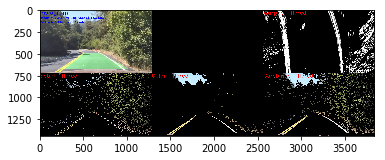

hist
left_fit, right_fit [ -5.96457266e-05   1.61545487e-01   1.99323276e+02] [ -7.96238835e-05   2.96563653e-01   7.78397209e+02]
left_curverad_real, right_curverad_real 2753.75117051 2064.18153833
avg curve 2408.96635442


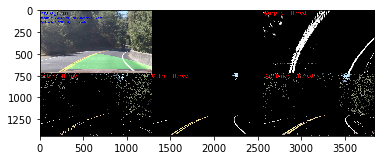

hist
left_fit, right_fit [  3.93613285e-04  -8.17432143e-01   6.96309272e+02] [ -1.33117115e-03   2.00127218e+00   5.08181470e+02]
left_curverad_real, right_curverad_real 417.86540179 123.3926727
avg curve 270.629037245


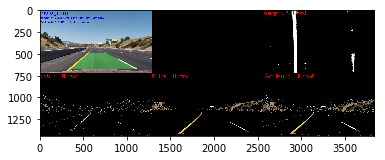

hist
left_fit, right_fit [ -1.03322132e-04   9.84727253e-02   3.44022727e+02] [ -1.32548693e-04   1.71122619e-01   9.76653200e+02]
left_curverad_real, right_curverad_real 1589.55951778 1239.00302647
avg curve 1414.28127213


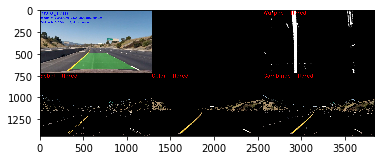

hist
left_fit, right_fit [ -5.44615371e-05   7.71506053e-02   3.44288945e+02] [ -1.66662220e-05   7.72969569e-02   9.88563732e+02]
left_curverad_real, right_curverad_real 3015.46266813 9854.54301152
avg curve 6435.00283982


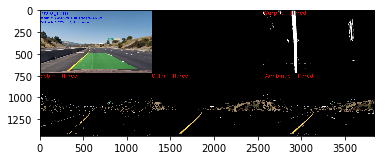

hist
left_fit, right_fit [ -2.04747187e-05   5.71318623e-02   3.44309876e+02] [  7.01449879e-05   3.05502997e-03   1.00251714e+03]
left_curverad_real, right_curverad_real 8021.10000074 2341.85717445
avg curve 5181.4785876


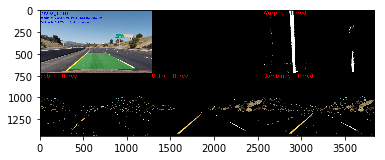

hist
left_fit, right_fit [ -4.34174296e-05   7.28500320e-02   3.20042763e+02] [ -3.49421732e-05   7.28842766e-02   9.93652823e+02]
left_curverad_real, right_curverad_real 3782.51679495 4700.01557705
avg curve 4241.266186


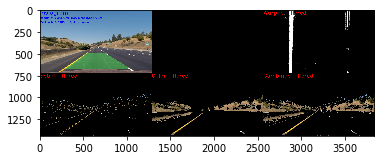

hist
left_fit, right_fit [ -6.87923769e-06  -9.32936372e-03   3.20801169e+02] [  2.39154284e-06   1.80135758e-02   9.62664053e+02]
left_curverad_real, right_curverad_real 23873.0218096 68670.545301
avg curve 46271.7835553


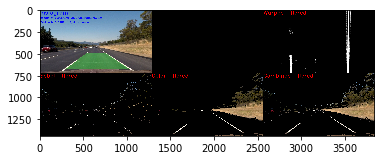

hist
left_fit, right_fit [  7.55984244e-05  -6.12564067e-02   3.26026750e+02] [  1.02811971e-05  -2.04473782e-02   9.78312746e+02]
left_curverad_real, right_curverad_real 2172.47456337 15973.5148178
avg curve 9072.99469059


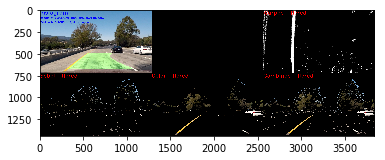

hist
left_fit, right_fit [  7.95136291e-05  -8.12536489e-02   3.56639165e+02] [  1.43635100e-03  -1.38652687e+00   1.27076101e+03]
left_curverad_real, right_curverad_real 2065.44549055 115.610681482
avg curve 1090.52808601


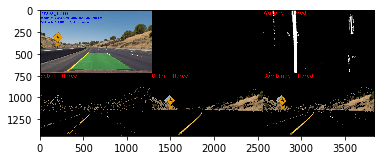

hist
left_fit, right_fit [ -1.42652882e-05   4.48860306e-02   3.48634722e+02] [ -7.26094056e-05   1.42423582e-02   1.00899443e+03]
left_curverad_real, right_curverad_real 11512.4965879 2262.2270295
avg curve 6887.36180871


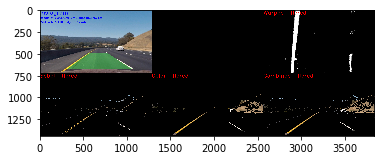

hist
left_fit, right_fit [  2.85397245e-05  -1.11711805e-01   3.94708651e+02] [ -2.14243809e-05  -3.25708494e-02   1.02784130e+03]
left_curverad_real, right_curverad_real 5755.01444331 7666.15623742
avg curve 6710.58534037


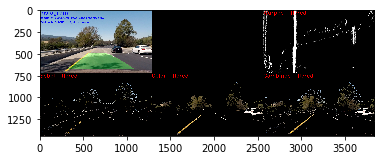

hist
left_fit, right_fit [ -8.04573555e-05   3.43480932e-02   3.61714814e+02] [ -3.86115030e-04   3.40151595e-01   9.65641911e+02]
left_curverad_real, right_curverad_real 2041.49093853 425.806137168
avg curve 1233.64853785


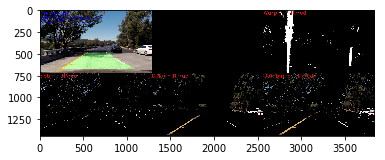

hist
left_fit, right_fit [  3.59829395e-05  -5.75046431e-02   3.06131848e+02] [  5.79903357e-04  -6.08715223e-01   1.16141972e+03]
left_curverad_real, right_curverad_real 4564.02007467 283.543437721
avg curve 2423.7817562


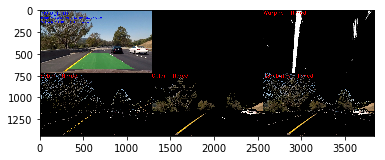

hist
left_fit, right_fit [  2.74841158e-05  -1.09402373e-01   4.09948221e+02] [  2.59105179e-05  -1.08683813e-01   1.07492275e+03]
left_curverad_real, right_curverad_real 5976.0367328 6339.00685876
avg curve 6157.52179578


In [29]:
import os

# Pipeline
lane = Lane('sobel5')
# hist = False
# Get each file and process each
for file in os.listdir("test_images/"):
    # get file name and file extension
    file_name, file_ext = os.path.splitext(file)

    #read in the image
    image = cv2.imread('test_images/'+file)

#     if hist:
#         output, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset = lane.process(image, 'poly_search', left_fit, right_fit)
#         plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
#         plt.show()

#         print('poly')
#         print('left_fit, right_fit', left_fit, right_fit)
#         print('left_curverad_real, right_curverad_real', left_curverad_real, right_curverad_real)
#         print('avg curve', np.mean([left_curverad_real, right_curverad_real]))

#         print('This image', file,' is:', type(image), 'with dimensions:', image.shape)

#         # write to image file
#         cv2.imwrite('output_images/poly_'+file,output)
    
    output, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset = lane.process_debug(image)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.show()
    
    print('hist')
    print('left_fit, right_fit', left_fit, right_fit)
    print('left_curverad_real, right_curverad_real', left_curverad_real, right_curverad_real)
    print('avg curve', np.mean([left_curverad_real, right_curverad_real]))
    
    # write to image file
    cv2.imwrite('output_images/'+file,output)
    
#     hist = True
    
    

In [33]:
# Lane line tracking class
class Line():
    def __init__(self):
        # Number of iterations to retain
        self.n_retain = 5

        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None  
    def add(self, fit, fitx, x, y, line_detected, curverad_real, offset):
        print('fit', fit)
        print('curverad_real', curverad_real)
        print('offset', offset)
        if fit is not None or curverad_real is not None or offset is not None and line_detected:
            self.recent_xfitted.append(fitx)
        
#             if self.bestx is not None:
#                 self.bestx = np.mean([self.bestx, np.mean(fitx)])
#             else:
#                 self.bestx = np.mean(fitx)
            self.radius_of_curvature = curverad_real

            self.line_base_pos = offset

            self.allx = x

            self.ally = y
            
            # Calculate coefficient differentials between last and current fit
            if len(self.current_fit) > 0:
                self.diffs = self.current_fit[-1] - fit

            print('abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2])', abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]))
            # Check coefficients
            if len(self.current_fit) > 0 and (abs(self.diffs[0]) > 0.0004 or abs(self.diffs[1]) > 0.2 or abs(self.diffs[2])) > 50:
#            if len(self.current_fit) > 0 and (abs(self.diffs[0]) > 0.0005 or abs(self.diffs[1]) > 0.5 or abs(self.diffs[2]) > 100):
                print('coefficients not good')
                self.detected = False
                self.remove()

            # Check offset
            elif self.line_base_pos > 0.5:
                print('offset not good')
                self.detected = False
                self.remove()
            # Pass check
            else:
                print('add fit')
                # Add fit
                self.detected =  True
                self.current_fit.append(fit)

                # Remove last fit if number of fits exceed retention number 
                if len(self.current_fit) > self.n_retain:
                    print('remove rentention')
                    self.remove()
            
            # Recalculate best fit
            if len(self.current_fit) > 0:
                self.best_fit = np.mean(self.current_fit, axis=0)
            else:
                self.best_fit = None

            
        else:
            self.detected = False
            self.remove()
    def remove(self):
        if len(self.current_fit)>0:
            self.current_fit = self.current_fit[1:]
        

## Video Processing

In [34]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [36]:
lane = Lane('sobel5')

left_line = Line()
right_line = Line()


def process_image(image):
    
    if left_line.detected == False or right_line.detected == False and left_line.best_fit is None or right_line.best_fit is None: 
        print('using sliding #1')
        # Use sliding window search
        result, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset = lane.process(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), 'convolution')
    
        # Save results to left lane
        left_line.add(left_fit, left_fitx, leftx, lefty, left_line_detected, left_curverad_real, offset)
        right_line.add(right_fit, right_fitx, rightx, righty, right_line_detected, right_curverad_real, offset)
        
        result = lane.add_text(result, 'Histogram', left_curverad_real, right_curverad_real, offset)
    else:
        # Use poly search
        result, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset = lane.process(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), 'poly_search', left_line.current_fit[-1], right_line.current_fit[-1])
    
        # Save results to left lane
        left_line.add(left_fit, left_fitx, leftx, lefty, left_line_detected, left_curverad_real, offset)
        right_line.add(right_fit, right_fitx, rightx, righty, right_line_detected, right_curverad_real, offset)
    
        print('left_line.best_fit', left_line.best_fit)
        print('right_line.best_fit', right_line.best_fit)
        print('left_line.detected', left_line.detected)
        print('right_line.detected', right_line.detected)
        if left_line.detected == False or right_line.detected == False and left_line.best_fit is None or right_line.best_fit is None: 
            print('using sliding #2')
            # Use sliding window search
            result, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty, left_line_detected, right_line_detected, left_curverad_real, right_curverad_real, offset = lane.process(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), 'convolution')
            
            # Save results to left lane
            left_line.add(left_fit, left_fitx, leftx, lefty, left_line_detected, left_curverad_real, offset)
            right_line.add(right_fit, right_fitx, rightx, righty, right_line_detected, right_curverad_real, offset)
            
            result = lane.add_text(result, 'Histogram', left_curverad_real, right_curverad_real, offset)
        else:
            # Draw using best fit
            print('using best fit')
            ploty = np.linspace(0, image.shape[0] - 1, image.shape[0])
            left_fitx = left_line.best_fit[0] * ploty ** 2 + left_line.best_fit[1] * ploty + left_line.best_fit[2]
            right_fitx = right_line.best_fit[0] * ploty ** 2 + right_line.best_fit[1] * ploty + right_line.best_fit[2]
            result = lane.process_draw(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), left_fitx, right_fitx)
            result = lane.add_text(result, 'Average', left_curverad_real, right_curverad_real, offset)
    
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    # Use this to test multi profiles
    #result = multi_profile_test(image, ['rgb', 'rgb_white_hls_yellow', 'hls', 'rgb_white_hsv_yellow'])

    return result

### Project Video

In [37]:
project_video_output = 'test_videos_output/project_video.mp4'

clip1 = VideoFileClip("project_video.mp4")
project_video_clip = clip1.fl_image(process_image)
%time project_video_clip.write_videofile(project_video_output, audio=False)

OSError: [WinError 6] The handle is invalid

### Challenge video

In [29]:
challenge_video_output = 'test_videos_output/challenge_video.mp4'

clip2 = VideoFileClip("challenge_video.mp4")
challenge_video_clip = clip2.fl_image(process_image)
%time challenge_video_clip.write_videofile(challenge_video_output, audio=False)

using sliding #1
fit [  1.02262965e-04  -3.10284021e-01   5.47336158e+02]
curverad_real 1606.95870764
offset 0.221424422981
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0 0.0 0.0
add fit
fit [  9.08390293e-05  -8.17219252e-02   9.86335086e+02]
curverad_real 1807.99166692
offset 0.221424422981
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0 0.0 0.0
add fit
[MoviePy] >>>> Building video test_videos_output/challenge_video.mp4
[MoviePy] Writing video test_videos_output/challenge_video.mp4




  0%|                                                                                          | 0/485 [00:00<?, ?it/s]

fit [  9.60546361e-05  -3.05779579e-01   5.47111514e+02]
curverad_real 1710.88218366
offset 0.222679794723
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.20832910018e-06 0.00450444246389 0.224644788456
add fit
fit [  9.27060953e-05  -8.20835443e-02   9.86343142e+02]
curverad_real 1771.58934072
offset 0.222679794723
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.86706599033e-06 0.000361619093563 0.00805694392227
add fit
left_line.best_fit [  9.91588007e-05  -3.08031800e-01   5.47223836e+02]
right_line.best_fit [  9.17725623e-05  -8.19027348e-02   9.86339114e+02]
left_line.detected True
right_line.detected True
using best fit




  0%|▏                                                                                 | 1/485 [00:01<11:04,  1.37s/it]

fit [  8.64853069e-05  -3.01292932e-01   5.47536963e+02]
curverad_real 1900.33247379
offset 0.222571206781
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.56932927645e-06 0.00448664673838 0.425449577829
add fit
fit [  1.04488031e-04  -8.85064472e-02   9.86481769e+02]
curverad_real 1571.87230591
offset 0.222571206781
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.1781935371e-05 0.00642290286096 0.138626068615
add fit
left_line.best_fit [  9.49343027e-05  -3.05785511e-01   5.47328212e+02]
right_line.best_fit [  9.60110518e-05  -8.41039723e-02   9.86386666e+02]
left_line.detected True
right_line.detected True
using best fit




  0%|▎                                                                                 | 2/485 [00:02<11:03,  1.37s/it]

fit [  9.75326613e-05  -3.11144777e-01   5.50301919e+02]
curverad_real 1684.99979927
offset 0.22330922892
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.10473544529e-05 0.00985184520382 2.7649560843
add fit
fit [  1.00103848e-04  -8.64962486e-02   9.85797512e+02]
curverad_real 1640.6942898
offset 0.22330922892
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.38418229009e-06 0.00201019860994 0.684256694654
add fit
left_line.best_fit [  9.55838924e-05  -3.07125328e-01   5.48071639e+02]
right_line.best_fit [  9.70342509e-05  -8.47020413e-02   9.86239377e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▌                                                                                 | 3/485 [00:03<10:34,  1.32s/it]

fit [  9.26463915e-05  -3.06717207e-01   5.48420749e+02]
curverad_real 1773.90679725
offset 0.218020409756
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.88626978e-06 0.00442757005249 1.88117027724
add fit
fit [  9.13376093e-05  -8.41827289e-02   9.88290397e+02]
curverad_real 1798.11520428
offset 0.218020409756
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.76623913859e-06 0.00231351969418 2.49288561351
add fit
left_line.best_fit [  9.49963922e-05  -3.07043703e-01   5.48141461e+02]
right_line.best_fit [  9.58949226e-05  -8.45981789e-02   9.86649581e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▋                                                                                 | 4/485 [00:05<10:04,  1.26s/it]

fit [  9.47013254e-05  -3.13010843e-01   5.52764478e+02]
curverad_real 1735.46358169
offset 0.212985430478
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.054933914e-06 0.00629363530691 4.34372875637
add fit
remove rentention
fit [  7.55188540e-05  -7.41815622e-02   9.86340423e+02]
curverad_real 2174.70754819
offset 0.212985430478
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.58187552194e-05 0.0100011666828 1.94997436447
add fit
remove rentention
left_line.best_fit [  9.34840643e-05  -3.07589068e-01   5.49227125e+02]
right_line.best_fit [  9.28308875e-05  -8.30901062e-02   9.86650649e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▊                                                                                 | 5/485 [00:06<09:42,  1.21s/it]

fit [  9.01240966e-05  -3.10231567e-01   5.53900953e+02]
curverad_real 1823.66423543
offset 0.213205603111
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.57722885359e-06 0.00277927521806 1.13647542639
add fit
remove rentention
fit [  6.25675221e-05  -6.65394527e-02   9.86668251e+02]
curverad_real 2624.82671515
offset 0.213205603111
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.29513319448e-05 0.00764210955587 0.327827459545
add fit
remove rentention
left_line.best_fit [  9.22979563e-05  -3.08479465e-01   5.50585012e+02]
right_line.best_fit [  8.68031729e-05  -7.99812879e-02   9.86715670e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|█                                                                                 | 6/485 [00:07<09:25,  1.18s/it]

fit [  6.20516535e-05  -2.96719786e-01   5.56062314e+02]
curverad_real 2649.36415059
offset 0.199737565776
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.80724430758e-05 0.0135117813504 2.16136078038
add fit
remove rentention
fit [  4.53957307e-05  -5.27605997e-02   9.84109614e+02]
curverad_real 3617.68266778
offset 0.199737565776
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.71717914338e-05 0.0137788529372 2.55863680309
add fit
remove rentention
left_line.best_fit [  8.74112257e-05  -3.07564836e-01   5.52290083e+02]
right_line.best_fit [  7.49847129e-05  -7.28321184e-02   9.86241239e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|█▏                                                                                | 7/485 [00:08<09:07,  1.14s/it]

fit [  4.90123934e-05  -2.89462485e-01   5.56767732e+02]
curverad_real 3354.5977459
offset 0.199103330062
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.30392601179e-05 0.00725730131946 0.705418313703
add fit
remove rentention
fit [  3.28686919e-05  -4.25227674e-02   9.84032590e+02]
curverad_real 4996.45122295
offset 0.199103330062
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.25270387449e-05 0.0102378323562 0.0770242501036
add fit
remove rentention
left_line.best_fit [  7.77071721e-05  -3.03228378e-01   5.53583245e+02]
right_line.best_fit [  6.15376816e-05  -6.40374222e-02   9.85888255e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▎                                                                                | 8/485 [00:09<08:56,  1.12s/it]

fit [  3.77596020e-05  -2.80633881e-01   5.57523154e+02]
curverad_real 4354.64998484
offset 0.207039516935
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.12527914173e-05 0.00882860418158 0.755421307367
add fit
remove rentention
fit [  2.02042147e-05  -2.80351813e-02   9.81448257e+02]
curverad_real 8128.34022659
offset 0.207039516935
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.26644772402e-05 0.0144875860643 2.58433206784
add fit
remove rentention
left_line.best_fit [  6.67298142e-05  -2.98011712e-01   5.55403726e+02]
right_line.best_fit [  4.73110027e-05  -5.28079127e-02   9.84519827e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▌                                                                                | 9/485 [00:10<08:46,  1.11s/it]

fit [  6.48792736e-05  -3.03781705e-01   5.62797909e+02]
curverad_real 2533.97399172
offset 0.219440207346
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.71196716618e-05 0.0231478246863 5.27475493262
add fit
remove rentention
fit [  1.56750117e-06  -9.79590880e-03   9.79130176e+02]
curverad_real 104769.90742
offset 0.219440207346
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.86367135012e-05 0.0182392724966 2.31808107311
add fit
remove rentention
left_line.best_fit [  6.07654038e-05  -2.96165885e-01   5.57410412e+02]
right_line.best_fit [  3.25207321e-05  -3.99307820e-02   9.83077778e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▋                                                                               | 10/485 [00:11<08:55,  1.13s/it]

fit [  9.49419970e-05  -3.26039011e-01   5.65235247e+02]
curverad_real 1731.25834313
offset 0.226194838884
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.00627233774e-05 0.0222573055352 2.43733881737
add fit
remove rentention
fit [ -1.60576334e-05  -9.90988654e-04   9.81850469e+02]
curverad_real 10227.4738661
offset 0.226194838884
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.76251345495e-05 0.0088049201501 2.72029236058
add fit
remove rentention
left_line.best_fit [  6.17289839e-05  -2.99327374e-01   5.59677271e+02]
right_line.best_fit [  1.67957010e-05  -2.68210892e-02   9.82114221e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▊                                                                               | 11/485 [00:12<09:02,  1.15s/it]

fit [  9.59343987e-05  -3.20689626e-01   5.61342401e+02]
curverad_real 1713.24492409
offset 0.234818626208
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.92401701096e-07 0.00534938435178 3.8928458777
add fit
remove rentention
fit [ -1.80156777e-05  -1.24761080e-03   9.85606257e+02]
curverad_real 9115.92961016
offset 0.234818626208
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.95804431832e-06 0.000256622149527 3.755788733
add fit
remove rentention
left_line.best_fit [  6.85055329e-05  -3.04121342e-01   5.60733289e+02]
right_line.best_fit [  4.11341933e-06  -1.65184914e-02   9.82413550e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|██                                                                               | 12/485 [00:14<09:12,  1.17s/it]

fit [  8.48597868e-05  -3.08216897e-01   5.57615812e+02]
curverad_real 1936.8911779
offset 0.236701179385
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.10746118822e-05 0.0124727293876 3.72658907056
add fit
remove rentention
fit [ -1.45045428e-05  -5.58817557e-03   9.88236113e+02]
curverad_real 11322.6250071
offset 0.236701179385
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.51113487939e-06 0.00434056476805 2.62985564646
add fit
remove rentention
left_line.best_fit [  7.56750116e-05  -3.07872224e-01   5.60902905e+02]
right_line.best_fit [ -5.36122761e-06  -9.13157303e-03   9.83254255e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▏                                                                              | 13/485 [00:15<09:15,  1.18s/it]

fit [  1.08373002e-04  -3.27455435e-01   5.60768833e+02]
curverad_real 1516.46159368
offset 0.2474208436
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.35132153622e-05 0.0192385380681 3.15302056588
add fit
remove rentention
fit [ -2.90548961e-06  -1.63869965e-02   9.92040904e+02]
curverad_real 56523.4866666
offset 0.2474208436
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.15990532093e-05 0.0107988209038 3.80479074103
add fit
remove rentention
left_line.best_fit [  8.97976917e-05  -3.17236535e-01   5.61552041e+02]
right_line.best_fit [ -9.98316847e-06  -6.80193606e-03   9.85372784e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▎                                                                              | 14/485 [00:16<09:06,  1.16s/it]

fit [  9.29660870e-05  -3.12406459e-01   5.57209099e+02]
curverad_real 1767.88517792
offset 0.261826250188
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.54069151487e-05 0.0150489766726 3.55973412006
add fit
remove rentention
fit [  5.09977332e-05  -5.61234999e-02   9.99073812e+02]
curverad_real 3220.29805299
offset 0.261826250188
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.39032228503e-05 0.0397365033979 7.03290773152
add fit
remove rentention
left_line.best_fit [  9.54150544e-05  -3.18961486e-01   5.60434279e+02]
right_line.best_fit [ -9.71220551e-08  -1.60674543e-02   9.89361511e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▌                                                                              | 15/485 [00:17<08:51,  1.13s/it]

fit [  9.98392380e-05  -3.20311701e-01   5.59082026e+02]
curverad_real 1646.15217607
offset 0.261574894013
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.87315090939e-06 0.00790524226548 1.87292728073
add fit
remove rentention
fit [  5.38440703e-05  -5.93676026e-02   1.00017840e+03]
curverad_real 3050.06695982
offset 0.261574894013
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.8463370462e-06 0.00324410276583 1.10459010147
add fit
remove rentention
left_line.best_fit [  9.63945026e-05  -3.17816024e-01   5.59203634e+02]
right_line.best_fit [  1.38832187e-05  -2.77427771e-02   9.93027098e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▋                                                                              | 16/485 [00:18<08:44,  1.12s/it]

fit [  1.31019759e-04  -3.43975894e-01   5.62136416e+02]
curverad_real 1254.1824267
offset 0.273868997624
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.11805209465e-05 0.0236641933434 3.05438942079
add fit
remove rentention
fit [  8.75169063e-05  -9.18319607e-02   1.00787908e+03]
curverad_real 1876.56672448
offset 0.273868997624
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.36728359876e-05 0.0324643581069 7.70067915204
add fit
remove rentention
left_line.best_fit [  1.03411575e-04  -3.22473277e-01   5.59362437e+02]
right_line.best_fit [  3.49897355e-05  -4.58596471e-02   9.97481662e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|██▊                                                                              | 17/485 [00:19<08:37,  1.11s/it]

fit [  1.64279657e-04  -3.81267196e-01   5.72705587e+02]
curverad_real 1000.18543693
offset 0.285332897923
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.32598984688e-05 0.0372913018591 10.5691710167
add fit
remove rentention
fit [  1.33780874e-04  -1.23143722e-01   1.00955904e+03]
curverad_real 1227.72204961
offset 0.285332897923
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.62639677363e-05 0.0313117611403 1.67996126455
add fit
remove rentention
left_line.best_fit [  1.19295549e-04  -3.37083337e-01   5.62380392e+02]
right_line.best_fit [  6.46468188e-05  -6.93707563e-02   1.00174625e+03]
left_line.detected True
right_line.detected True
using best fit




  4%|███                                                                              | 18/485 [00:20<08:32,  1.10s/it]

fit [  1.84007692e-04  -3.95104686e-01   5.72718080e+02]
curverad_real 892.866183717
offset 0.294193772234
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.9728034716e-05 0.0138374902715 0.0124932471731
add fit
remove rentention
fit [  1.55073811e-04  -1.42904547e-01   1.01582396e+03]
curverad_real 1059.18695083
offset 0.294193772234
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.12929369099e-05 0.0197608256085 6.26491470958
add fit
remove rentention
left_line.best_fit [  1.34422487e-04  -3.50613187e-01   5.64770241e+02]
right_line.best_fit [  9.62426789e-05  -9.46742665e-02   1.00650286e+03]
left_line.detected True
right_line.detected True
using best fit




  4%|███▏                                                                             | 19/485 [00:21<08:27,  1.09s/it]

fit [  1.98994496e-04  -4.09523533e-01   5.76584394e+02]
curverad_real 825.5859856
offset 0.314640451107
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.49868036959e-05 0.0144188471213 3.86631419884
add fit
remove rentention
fit [  2.03665845e-04  -1.75705046e-01   1.02060175e+03]
curverad_real 806.621019493
offset 0.314640451107
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.85920338527e-05 0.0328004980609 4.77778928496
add fit
remove rentention
left_line.best_fit [  1.55628168e-04  -3.70036602e-01   5.68645300e+02]
right_line.best_fit [  1.26776301e-04  -1.18590576e-01   1.01080845e+03]
left_line.detected True
right_line.detected True
using best fit




  4%|███▎                                                                             | 20/485 [00:22<08:23,  1.08s/it]

fit [  2.09436699e-04  -4.10971233e-01   5.74052548e+02]
curverad_real 784.363602871
offset 0.324269659352
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.04422031222e-05 0.00144769939822 2.53184558803
add fit
remove rentention
fit [  2.17423925e-04  -1.93567193e-01   1.02758959e+03]
curverad_real 755.588196797
offset 0.324269659352
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.37580804935e-05 0.017862147625 6.98784683517
add fit
remove rentention
left_line.best_fit [  1.77547661e-04  -3.88168508e-01   5.71639405e+02]
right_line.best_fit [  1.59492272e-04  -1.45430494e-01   1.01629068e+03]
left_line.detected True
right_line.detected True
using best fit




  4%|███▌                                                                             | 21/485 [00:23<08:17,  1.07s/it]

fit [  2.40000332e-04  -4.37608997e-01   5.80789945e+02]
curverad_real 684.418382238
offset 0.334655280244
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.05636329908e-05 0.0266377644625 6.73739664264
add fit
remove rentention
fit [  2.35898657e-04  -2.10925833e-01   1.02981488e+03]
curverad_real 696.451539803
offset 0.334655280244
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.84747320057e-05 0.0173586396682 2.22528890734
add fit
remove rentention
left_line.best_fit [  1.99343775e-04  -4.06895129e-01   5.75370111e+02]
right_line.best_fit [  1.89168622e-04  -1.69249268e-01   1.02067784e+03]
left_line.detected True
right_line.detected True
using best fit




  5%|███▋                                                                             | 22/485 [00:24<08:20,  1.08s/it]

fit [  2.28196716e-04  -4.24402778e-01   5.75172752e+02]
curverad_real 719.8326999
offset 0.332754862534
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.18036161726e-05 0.0132062195911 5.61719285215
add fit
remove rentention
fit [  2.39523638e-04  -2.21428446e-01   1.03793823e+03]
curverad_real 685.889350592
offset 0.332754862534
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.62498061264e-06 0.0105026135265 8.12335121633
add fit
remove rentention
left_line.best_fit [  2.12127187e-04  -4.15522245e-01   5.75863544e+02]
right_line.best_fit [  2.10317175e-04  -1.88906213e-01   1.02635368e+03]
left_line.detected True
right_line.detected True
using best fit




  5%|███▊                                                                             | 23/485 [00:26<08:21,  1.09s/it]

fit [  2.50880956e-04  -4.54120086e-01   5.85328376e+02]
curverad_real 654.73792344
offset 0.321862669303
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.26842400681e-05 0.0297173084929 10.1556239437
add fit
remove rentention
fit [  2.04018955e-04  -1.99217338e-01   1.03523271e+03]
curverad_real 805.130469194
offset 0.321862669303
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.55046826034e-05 0.0222111079212 2.70552690791
add fit
remove rentention
left_line.best_fit [  2.25501840e-04  -4.27325325e-01   5.78385603e+02]
right_line.best_fit [  2.20106204e-04  -2.00168771e-01   1.03023543e+03]
left_line.detected True
right_line.detected True
using best fit




  5%|████                                                                             | 24/485 [00:27<08:18,  1.08s/it]

fit [  2.68534467e-04  -4.76233543e-01   5.92474651e+02]
curverad_real 611.686455741
offset 0.302251955909
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.76535111055e-05 0.0221134569699 7.1462750005
add fit
remove rentention
fit [  9.11358708e-05  -1.09414539e-01   1.02085209e+03]
curverad_real 1802.01913294
offset 0.302251955909
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112883084432 0.0898027994964 14.3806205475
add fit
remove rentention
left_line.best_fit [  2.39409834e-04  -4.40667327e-01   5.81563655e+02]
right_line.best_fit [  1.97600209e-04  -1.86910670e-01   1.03028550e+03]
left_line.detected True
right_line.detected True
using best fit




  5%|████▏                                                                            | 25/485 [00:28<08:14,  1.07s/it]

fit [  3.04460281e-04  -5.18685719e-01   6.07716140e+02]
curverad_real 539.487956893
offset 0.282828506823
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.59258138993e-05 0.0424521758333 15.2414892607
add fit
remove rentention
fit [ -6.01167206e-05   1.89640184e-02   9.94895084e+02]
curverad_real 2732.09814048
offset 0.282828506823
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000151252591491 0.12837855734 25.9570021062
add fit
remove rentention
left_line.best_fit [  2.58414550e-04  -4.62210225e-01   5.88296373e+02]
right_line.best_fit [  1.42092080e-04  -1.44404428e-01   1.02374660e+03]
left_line.detected True
right_line.detected True
using best fit




  5%|████▎                                                                            | 26/485 [00:29<08:15,  1.08s/it]

fit [  3.33535931e-04  -5.44305798e-01   6.11505133e+02]
curverad_real 492.430641388
offset 0.274655256698
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.90756497054e-05 0.0256200787398 3.78899278848
add fit
remove rentention
fit [ -1.26318900e-04   6.72709848e-02   9.90836475e+02]
curverad_real 1300.50680609
offset 0.274655256698
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.62021794863e-05 0.0483069663904 4.05860825263
add fit
remove rentention
left_line.best_fit [  2.77121670e-04  -4.83549585e-01   5.94439411e+02]
right_line.best_fit [  6.96485686e-05  -8.87650641e-02   1.01595092e+03]
left_line.detected True
right_line.detected True
using best fit




  6%|████▌                                                                            | 27/485 [00:30<08:12,  1.08s/it]

fit [  3.13646856e-04  -5.32917064e-01   6.13969664e+02]
curverad_real 523.688698002
offset 0.274954135581
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.98890743989e-05 0.0113887341581 2.46453105572
add fit
remove rentention
fit [ -1.21288919e-04   6.47827812e-02   9.89653251e+02]
curverad_real 1354.40546491
offset 0.274954135581
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.02998068174e-06 0.00248820354326 1.18322441233
add fit
remove rentention
left_line.best_fit [  2.94211698e-04  -5.05252442e-01   6.02198793e+02]
right_line.best_fit [ -2.51394282e-06  -3.15228186e-02   1.00629392e+03]
left_line.detected True
right_line.detected True
using best fit




  6%|████▋                                                                            | 28/485 [00:31<08:14,  1.08s/it]

fit [  2.86198389e-04  -5.07264151e-01   6.08899929e+02]
curverad_real 573.948175006
offset 0.268459035817
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.74484668851e-05 0.0256529120834 5.06973556818
add fit
remove rentention
fit [ -1.40008825e-04   7.60818529e-02   9.89948414e+02]
curverad_real 1173.41832909
offset 0.268459035817
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.87199055302e-05 0.0112990717011 0.295162757982
add fit
remove rentention
left_line.best_fit [  3.01275185e-04  -5.15881255e-01   6.06913104e+02]
right_line.best_fit [ -7.13194989e-05   2.35370197e-02   9.97237062e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▊                                                                            | 29/485 [00:32<08:13,  1.08s/it]

fit [  2.81376471e-04  -4.95792863e-01   6.03583289e+02]
curverad_real 583.771915385
offset 0.284004331328
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.82191829462e-06 0.0114712888184 5.31663921629
add fit
remove rentention
fit [ -9.46401106e-05   3.94604897e-02   9.97951605e+02]
curverad_real 1735.66730378
offset 0.284004331328
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.53687143788e-05 0.0366213632643 8.00319159079
add fit
remove rentention
left_line.best_fit [  3.03843586e-04  -5.19793119e-01   6.09134831e+02]
right_line.best_fit [ -1.08474695e-04   5.33120254e-02   9.92656966e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|█████                                                                            | 30/485 [00:33<08:13,  1.08s/it]

fit [  2.33364236e-04  -4.41276300e-01   5.89790705e+02]
curverad_real 703.925421651
offset 0.303243184763
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.80122346388e-05 0.0545165627194 13.7925842894
add fit
remove rentention
fit [ -2.63347023e-05  -1.42044745e-02   1.00766179e+03]
curverad_real 6236.54199911
offset 0.303243184763
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.83054083335e-05 0.0536649641352 9.71018105126
add fit
remove rentention
left_line.best_fit [  2.89624377e-04  -5.04311235e-01   6.05549744e+02]
right_line.best_fit [ -1.01718291e-04   4.66783268e-02   9.95210306e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|█████▏                                                                           | 31/485 [00:34<08:10,  1.08s/it]

fit [  2.84957865e-04  -4.93917829e-01   6.02390293e+02]
curverad_real 576.417845137
offset 0.328896617687
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.1593628649e-05 0.0526415295447 12.599587884
add fit
remove rentention
fit [  2.18818613e-05  -5.07580145e-02   1.01687942e+03]
curverad_real 7505.22085831
offset 0.328896617687
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.8216563605e-05 0.0365535400741 9.21763751354
add fit
remove rentention
left_line.best_fit [  2.79908763e-04  -4.94233641e-01   6.03726776e+02]
right_line.best_fit [ -7.20781392e-05   2.30725270e-02   1.00041890e+03]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▎                                                                           | 32/485 [00:35<08:09,  1.08s/it]

fit [  3.20157779e-04  -5.26468730e-01   6.08672810e+02]
curverad_real 513.009675294
offset 0.361631638545
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.51999141923e-05 0.0325509002043 6.28251691514
add fit
remove rentention
fit [  1.27178611e-04  -1.31046815e-01   1.03161108e+03]
curverad_real 1291.39150946
offset 0.361631638545
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000105296749926 0.080288800815 14.7316542666
add fit
remove rentention
left_line.best_fit [  2.81210948e-04  -4.92943975e-01   6.02667405e+02]
right_line.best_fit [ -2.23846330e-05  -1.60933924e-02   1.00881046e+03]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▌                                                                           | 33/485 [00:36<08:03,  1.07s/it]

fit [  3.54263873e-04  -5.51741606e-01   6.11411234e+02]
curverad_real 463.591791556
offset 0.415824256055
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.41060935992e-05 0.0252728760538 2.73842409511
add fit
remove rentention
fit [  2.69842598e-04  -2.27951170e-01   1.04687304e+03]
curverad_real 608.978452637
offset 0.415824256055
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000142663986397 0.0969043544206 15.2619579178
add fit
remove rentention
left_line.best_fit [  2.94824045e-04  -5.01839465e-01   6.03169666e+02]
right_line.best_fit [  5.95856515e-05  -7.68999969e-02   1.02019539e+03]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▋                                                                           | 34/485 [00:37<08:15,  1.10s/it]

fit [  3.48210268e-04  -5.50823017e-01   6.11472724e+02]
curverad_real 471.659486256
offset 0.465123210606
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.0536051934e-06 0.00091858914789 0.061490245339
add fit
remove rentention
fit [  4.44160383e-04  -3.43789805e-01   1.06619088e+03]
curverad_real 370.522995299
offset 0.465123210606
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000174317785177 0.115838635452 19.3178408255
add fit
remove rentention
left_line.best_fit [  3.08190804e-04  -5.12845496e-01   6.04747553e+02]
right_line.best_fit [  1.67345750e-04  -1.53550056e-01   1.03384324e+03]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▊                                                                           | 35/485 [00:39<08:14,  1.10s/it]

fit [  3.73587476e-04  -5.85038334e-01   6.23040185e+02]
curverad_real 439.618035089
offset 0.456989667835
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.53772081108e-05 0.0342153169803 11.5674605531
add fit
remove rentention
fit [  4.64287254e-04  -3.71023507e-01   1.07140387e+03]
curverad_real 354.469444726
offset 0.456989667835
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.01268716073e-05 0.0272337013152 5.21299062745
add fit
remove rentention
left_line.best_fit [  3.36235452e-04  -5.41597903e-01   6.11397449e+02]
right_line.best_fit [  2.65470142e-04  -2.24913862e-01   1.04659166e+03]
left_line.detected True
right_line.detected True
using best fit




  7%|██████                                                                           | 36/485 [00:40<08:10,  1.09s/it]

fit [  4.00805115e-04  -6.19086418e-01   6.33743680e+02]
curverad_real 409.760151267
offset 0.448740560665
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.72176393028e-05 0.0340480844352 10.7034953464
add fit
remove rentention
fit [  4.55709183e-04  -3.75996707e-01   1.07511836e+03]
curverad_real 361.055047464
offset 0.448740560665
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.57807135985e-06 0.00497320019076 3.71449593066
add fit
remove rentention
left_line.best_fit [  3.59404902e-04  -5.66631621e-01   6.17668127e+02]
right_line.best_fit [  3.52235606e-04  -2.89961601e-01   1.05823944e+03]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▏                                                                          | 37/485 [00:41<08:03,  1.08s/it]

fit [  4.26212770e-04  -6.54012815e-01   6.46678512e+02]
curverad_real 385.332024542
offset 0.440645749353
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.54076547365e-05 0.0349263966837 12.9348316088
add fit
remove rentention
fit [  4.46062110e-04  -3.81021516e-01   1.07847449e+03]
curverad_real 368.772958011
offset 0.440645749353
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.64707352282e-06 0.00502480935648 3.35613013735
add fit
remove rentention
left_line.best_fit [  3.80615900e-04  -5.92140438e-01   6.25269267e+02]
right_line.best_fit [  4.16012306e-04  -3.39956541e-01   1.06761213e+03]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▎                                                                          | 38/485 [00:42<07:59,  1.07s/it]

fit [  4.45458790e-04  -6.72852691e-01   6.51405598e+02]
curverad_real 368.678005655
offset 0.435635808574
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.92460202623e-05 0.0188398765576 4.72708623633
add fit
remove rentention
fit [  4.21780936e-04  -3.78128798e-01   1.08487545e+03]
curverad_real 389.855361524
offset 0.435635808574
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.42811740003e-05 0.0028927178001 6.4009534269
add fit
remove rentention
left_line.best_fit [  3.98854884e-04  -6.16362655e-01   6.33268140e+02]
right_line.best_fit [  4.46399973e-04  -3.69992067e-01   1.07521261e+03]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▌                                                                          | 39/485 [00:43<07:54,  1.06s/it]

fit [  4.69960746e-04  -6.95332849e-01   6.55904849e+02]
curverad_real 349.450970089
offset 0.423678659522
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.45019563059e-05 0.0224801576617 4.49925104463
add fit
remove rentention
fit [  3.75412791e-04  -3.61782853e-01   1.09021516e+03]
curverad_real 437.791244759
offset 0.423678659522
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.6368144901e-05 0.0163459452052 5.33971357158
add fit
remove rentention
left_line.best_fit [  4.23204979e-04  -6.45264621e-01   6.42154565e+02]
right_line.best_fit [  4.32650455e-04  -3.73590676e-01   1.08001747e+03]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▋                                                                          | 40/485 [00:44<07:53,  1.06s/it]

fit [  5.01204938e-04  -7.20754604e-01   6.57226106e+02]
curverad_real 327.663824307
offset 0.386889925006
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.12441916936e-05 0.0254217551468 1.32125736311
add fit
remove rentention
fit [  2.57351489e-04  -3.03082169e-01   1.09462793e+03]
curverad_real 638.21086681
offset 0.386889925006
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000118061301414 0.0587006838232 4.41277180452
add fit
remove rentention
left_line.best_fit [  4.48728472e-04  -6.72407875e-01   6.48991749e+02]
right_line.best_fit [  3.91263302e-04  -3.60002409e-01   1.08466228e+03]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▊                                                                          | 41/485 [00:45<07:49,  1.06s/it]

fit [  5.18416267e-04  -7.49137985e-01   6.66823228e+02]
curverad_real 316.785544931
offset 0.347921340024
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.72113292254e-05 0.0283833813747 9.59712154885
add fit
remove rentention
fit [  1.42401704e-04  -2.37422387e-01   1.09387755e+03]
curverad_real 1153.29345332
offset 0.347921340024
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000114949785707 0.065659782471 0.750380033877
add fit
remove rentention
left_line.best_fit [  4.72250702e-04  -6.98418189e-01   6.55607659e+02]
right_line.best_fit [  3.28601806e-04  -3.32287545e-01   1.08841412e+03]
left_line.detected True
right_line.detected True
using best fit




  9%|███████                                                                          | 42/485 [00:46<07:47,  1.06s/it]

fit [  5.05707804e-04  -7.56628167e-01   6.76424609e+02]
curverad_real 324.753062376
offset 0.309587218473
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.27084630594e-05 0.00749018174823 9.60138099229
add fit
remove rentention
fit [  1.30205020e-05  -1.52768038e-01   1.08838835e+03]
curverad_real 12618.4045241
offset 0.309587218473
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000129381201495 0.0846543490593 5.48919922226
add fit
remove rentention
left_line.best_fit [  4.88149709e-04  -7.18941259e-01   6.61556878e+02]
right_line.best_fit [  2.41993484e-04  -2.86636849e-01   1.09039689e+03]
left_line.detected True
right_line.detected True
using best fit




  9%|███████▏                                                                         | 43/485 [00:47<07:51,  1.07s/it]

fit [  5.12263048e-04  -7.76798037e-01   6.85753854e+02]
curverad_real 320.603101177
offset 0.274866530446
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.5552434651e-06 0.0201698695695 9.32924448729
add fit
remove rentention
fit [ -1.20410757e-04  -6.29460674e-02   1.08227375e+03]
curverad_real 1365.72310381
offset 0.274866530446
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000133431258603 0.0898219703598 6.11460626639
add fit
remove rentention
left_line.best_fit [  5.01510561e-04  -7.39730328e-01   6.68426529e+02]
right_line.best_fit [  1.33555146e-04  -2.23600303e-01   1.08987655e+03]
left_line.detected True
right_line.detected True
using best fit




  9%|███████▎                                                                         | 44/485 [00:48<07:46,  1.06s/it]

fit [  4.48178101e-04  -7.42288172e-01   6.89896950e+02]
curverad_real 366.51646221
offset 0.241415377751
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.40849460904e-05 0.0345098646503 4.14309640669
add fit
remove rentention
fit [ -2.22824458e-04   1.28433275e-02   1.07418455e+03]
curverad_real 738.706645516
offset 0.241415377751
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000102413701853 0.0757893949182 8.08919525433
add fit
remove rentention
left_line.best_fit [  4.97154032e-04  -7.49121393e-01   6.75224949e+02]
right_line.best_fit [  1.39076960e-05  -1.48675067e-01   1.08667043e+03]
left_line.detected True
right_line.detected True
using best fit




  9%|███████▌                                                                         | 45/485 [00:49<07:44,  1.05s/it]

fit [  4.56135688e-04  -7.53651579e-01   6.89924527e+02]
curverad_real 360.122206815
offset 0.252715222562
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.95758628526e-06 0.011363407313 0.0275767032234
add fit
remove rentention
fit [ -2.34864958e-04   2.44851736e-02   1.08145205e+03]
curverad_real 700.895872562
offset 0.252715222562
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.20404994886e-05 0.0116418460211 7.26749585806
add fit
remove rentention
left_line.best_fit [  4.88140182e-04  -7.55700788e-01   6.81764633e+02]
right_line.best_fit [ -8.45355935e-05  -8.31615982e-02   1.08403525e+03]
left_line.detected True
right_line.detected True
using best fit




  9%|███████▋                                                                         | 46/485 [00:50<07:42,  1.05s/it]

fit [  4.60853529e-04  -7.64713035e-01   6.92856061e+02]
curverad_real 356.442920136
offset 0.284654531947
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.71784074849e-06 0.0110614559082 2.93153481103
add fit
remove rentention
fit [ -2.02181225e-04   1.31971934e-02   1.08827523e+03]
curverad_real 813.785664653
offset 0.284654531947
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.26837325782e-05 0.0112879801948 6.82318615523
add fit
remove rentention
left_line.best_fit [  4.76627634e-04  -7.58815798e-01   6.86971200e+02]
right_line.best_fit [ -1.53452179e-04  -3.30376821e-02   1.08291479e+03]
left_line.detected True
right_line.detected True
using best fit




 10%|███████▊                                                                         | 47/485 [00:51<07:41,  1.05s/it]

fit [  4.49895096e-04  -7.64370528e-01   6.95750931e+02]
curverad_real 365.154876764
offset 0.337721349491
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.09584321832e-05 0.000342506813089 2.89486963891
add fit
remove rentention
fit [ -1.08223062e-04  -2.98403084e-02   1.09569624e+03]
curverad_real 1518.74381402
offset 0.337721349491
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.39581630922e-05 0.0430375017608 7.42100723378
add fit
remove rentention
left_line.best_fit [  4.65465092e-04  -7.60364270e-01   6.90836465e+02]
right_line.best_fit [ -1.77700892e-04  -8.45213626e-03   1.08437636e+03]
left_line.detected True
right_line.detected True
using best fit




 10%|████████                                                                         | 48/485 [00:52<07:40,  1.05s/it]

fit [  2.97154493e-04  -6.84203743e-01   7.02171195e+02]
curverad_real 553.5451233
offset 0.363957248371
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000152740603164 0.0801667851531 6.42026386321
add fit
remove rentention
fit [  6.94283032e-05  -1.20737554e-01   1.10274538e+03]
curverad_real 2365.43960909
offset 0.363957248371
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000177651365398 0.0908972452293 7.04913479371
add fit
remove rentention
left_line.best_fit [  4.22443381e-04  -7.41845412e-01   6.94119933e+02]
right_line.best_fit [ -1.39733080e-04  -2.00104335e-02   1.08847069e+03]
left_line.detected True
right_line.detected True
using best fit




 10%|████████▏                                                                        | 49/485 [00:53<07:39,  1.05s/it]

fit [  2.24564159e-04  -6.60429471e-01   7.01431387e+02]
curverad_real 733.324978145
offset 0.310278751212
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.25903339557e-05 0.0237742718377 0.739808236622
add fit
remove rentention
fit [  8.68749095e-05  -1.29775071e-01   1.10603401e+03]
curverad_real 1890.3826297
offset 0.310278751212
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.74466063612e-05 0.00903751716139 3.28863039584
add fit
remove rentention
left_line.best_fit [  3.77720593e-04  -7.25473672e-01   6.96426820e+02]
right_line.best_fit [ -7.77932065e-05  -4.85341132e-02   1.09484058e+03]
left_line.detected True
right_line.detected True
using best fit




 10%|████████▎                                                                        | 50/485 [00:54<07:42,  1.06s/it]

fit [  2.64813464e-04  -7.40102595e-01   7.23538162e+02]
curverad_real 622.093634565
offset 0.269557457817
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.02493046007e-05 0.0796731230709 22.1067755458
add fit
remove rentention
fit [  8.33463646e-05  -1.27500861e-01   1.10709784e+03]
curverad_real 1970.41538036
offset 0.269557457817
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.52854495832e-06 0.00227420978723 1.06383159499
add fit
remove rentention
left_line.best_fit [  3.39456148e-04  -7.22763875e-01   7.03149547e+02]
right_line.best_fit [ -1.41509421e-05  -7.89313201e-02   1.09996974e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▌                                                                        | 51/485 [00:56<07:43,  1.07s/it]

fit [  2.83496020e-04  -7.67146952e-01   7.30187970e+02]
curverad_real 581.099092972
offset 0.258510488888
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.86825565825e-05 0.0270443572504 6.64980807651
add fit
remove rentention
fit [  4.43254244e-05  -1.01294931e-01   1.10754323e+03]
curverad_real 3705.14936227
offset 0.258510488888
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.9020940189e-05 0.0262059303493 0.445390433587
add fit
remove rentention
left_line.best_fit [  3.03984647e-04  -7.23250658e-01   7.10615929e+02]
right_line.best_fit [  3.51503879e-05  -1.01829745e-01   1.10382334e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▋                                                                        | 52/485 [00:57<07:43,  1.07s/it]

fit [  3.51269460e-04  -8.23334744e-01   7.37384543e+02]
curverad_real 468.666710853
offset 0.277098351142
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.77734395436e-05 0.0561877919295 7.19657268059
add fit
remove rentention
fit [  5.49425972e-05  -1.04062427e-01   1.11015580e+03]
curverad_real 2989.10542508
offset 0.277098351142
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.06171728025e-05 0.00276749608535 2.61256757462
add fit
remove rentention
left_line.best_fit [  2.84259519e-04  -7.35043501e-01   7.18942651e+02]
right_line.best_fit [  6.77835198e-05  -1.16674169e-01   1.10671525e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▊                                                                        | 53/485 [00:58<07:39,  1.06s/it]

fit [  4.17131117e-04  -8.77837866e-01   7.41253750e+02]
curverad_real 394.440017204
offset 0.289469356955
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.58616575097e-05 0.0545031221455 3.86920734574
add fit
remove rentention
fit [  5.58391080e-05  -1.10727211e-01   1.12201926e+03]
curverad_real 2941.13576881
offset 0.289469356955
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.96510782295e-07 0.00666478419058 11.8634684189
add fit
remove rentention
left_line.best_fit [  3.08254844e-04  -7.73770325e-01   7.26759163e+02]
right_line.best_fit [  6.50656807e-05  -1.14672100e-01   1.11057003e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|█████████                                                                        | 54/485 [00:59<07:40,  1.07s/it]

fit [  4.24024038e-04  -8.94183213e-01   7.47546680e+02]
curverad_real 388.061864186
offset 0.293924889065
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.89292013697e-06 0.0163453472513 6.29292925016
add fit
remove rentention
fit [  6.01250061e-05  -1.13577312e-01   1.12660609e+03]
curverad_real 2731.46985866
offset 0.293924889065
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.28589813244e-06 0.00285010107034 4.58682449192
add fit
remove rentention
left_line.best_fit [  3.48146820e-04  -8.20521074e-01   7.35982221e+02]
right_line.best_fit [  5.97157000e-05  -1.11432548e-01   1.11468444e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|█████████▏                                                                       | 55/485 [01:00<07:35,  1.06s/it]

fit [  3.22647478e-04  -8.31106652e-01   7.46961632e+02]
curverad_real 510.654444095
offset 0.281003537211
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000101376560021 0.0630765612791 0.585047432944
add fit
remove rentention
fit [  7.37018314e-05  -1.23046198e-01   1.13067878e+03]
curverad_real 2228.27408591
offset 0.281003537211
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.35768252607e-05 0.00946888569143 4.07268753611
add fit
remove rentention
left_line.best_fit [  3.59713623e-04  -8.38721885e-01   7.40666915e+02]
right_line.best_fit [  5.77867934e-05  -1.10541616e-01   1.11940063e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▎                                                                       | 56/485 [01:01<07:35,  1.06s/it]

fit [  2.72827178e-04  -8.11677009e-01   7.54773380e+02]
curverad_real 604.501220371
offset 0.280893625281
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.98202996936e-05 0.0194296423929 7.81174816333
add fit
remove rentention
fit [  1.02261054e-04  -1.40403261e-01   1.13378430e+03]
curverad_real 1605.95744688
offset 0.280893625281
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.85592230997e-05 0.017357063276 3.10552845721
add fit
remove rentention
left_line.best_fit [  3.57579854e-04  -8.47627897e-01   7.45583997e+02]
right_line.best_fit [  6.93739194e-05  -1.18363282e-01   1.12464885e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▌                                                                       | 57/485 [01:02<07:34,  1.06s/it]

fit [  2.84491032e-04  -8.26227612e-01   7.59627189e+02]
curverad_real 579.691324176
offset 0.289008608363
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.16638545158e-05 0.0145506027457 4.85380848004
add fit
remove rentention
fit [  1.23920127e-04  -1.56314057e-01   1.13745436e+03]
curverad_real 1325.27805787
offset 0.289008608363
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.16590724351e-05 0.0159107964398 3.67005923775
add fit
remove rentention
left_line.best_fit [  3.44224169e-04  -8.48206470e-01   7.50032526e+02]
right_line.best_fit [  8.31694254e-05  -1.28813608e-01   1.13010856e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▋                                                                       | 58/485 [01:03<07:33,  1.06s/it]

fit [  3.17334905e-04  -8.48792203e-01   7.64422583e+02]
curverad_real 519.444017694
offset 0.28689253932
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.28438722528e-05 0.0225645911857 4.79539422446
add fit
remove rentention
fit [  6.33118944e-05  -1.23653402e-01   1.13668455e+03]
curverad_real 2593.99824152
offset 0.28689253932
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.06082325337e-05 0.0326606551962 0.769809573704
add fit
remove rentention
left_line.best_fit [  3.24264926e-04  -8.42397338e-01   7.54666293e+02]
right_line.best_fit [  8.46639826e-05  -1.31398846e-01   1.13304162e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▊                                                                       | 59/485 [01:04<07:35,  1.07s/it]

fit [  3.65111247e-04  -8.88028255e-01   7.69070792e+02]
curverad_real 451.230603602
offset 0.281408791209
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.77763427972e-05 0.0392360514634 4.64820854285
add fit
remove rentention
fit [  1.86335106e-05  -1.05676842e-01   1.14265271e+03]
curverad_real 8814.83893755
offset 0.281408791209
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.46783837948e-05 0.0179765599139 5.96816016822
add fit
remove rentention
left_line.best_fit [  3.12482368e-04  -8.41166346e-01   7.58971115e+02]
right_line.best_fit [  7.63656835e-05  -1.29818752e-01   1.13625094e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|██████████                                                                       | 60/485 [01:05<07:34,  1.07s/it]

fit [  6.39950638e-04  -1.09773898e+00   7.90350511e+02]
curverad_real 256.81922696
offset 0.321602782073
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00027483939079 0.209710724652 21.2797196252
add fit
remove rentention
fit [  1.29829097e-05  -1.09504475e-01   1.15011582e+03]
curverad_real 12651.9740681
offset 0.321602782073
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.65060084463e-06 0.00382763233304 7.4631052481
add fit
remove rentention
left_line.best_fit [  3.75943000e-04  -8.94492812e-01   7.67648891e+02]
right_line.best_fit [  6.42218992e-05  -1.27110407e-01   1.14013835e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▏                                                                      | 61/485 [01:06<07:31,  1.07s/it]

fit [  9.07853464e-04  -1.27729786e+00   7.97476093e+02]
curverad_real 180.899103999
offset 0.381653651589
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000267902826171 0.179558877015 7.1255817347
add fit
remove rentention
fit [ -4.48650310e-07  -1.05179278e-01   1.15906707e+03]
curverad_real 366145.125262
offset 0.381653651589
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.34315600343e-05 0.00432519656398 8.95125213695
add fit
remove rentention
left_line.best_fit [  5.02948257e-04  -9.87616981e-01   7.76189434e+02]
right_line.best_fit [  4.36799582e-05  -1.20065611e-01   1.14519490e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▎                                                                      | 62/485 [01:07<07:34,  1.08s/it]

fit [  9.43875448e-04  -1.30436286e+00   8.00144950e+02]
curverad_real 174.003713579
offset 0.396879764434
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.60219838281e-05 0.0270650049972 2.6688570403
add fit
remove rentention
fit [ -1.35314309e-05  -8.95553634e-02   1.15942822e+03]
curverad_real 12140.1676812
offset 0.396879764434
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.30827806133e-05 0.0156239146264 0.361147132953
add fit
remove rentention
left_line.best_fit [  6.34825141e-04  -1.08324403e+00   7.84292986e+02]
right_line.best_fit [  1.61896467e-05  -1.06713872e-01   1.14958968e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▌                                                                      | 63/485 [01:08<07:30,  1.07s/it]

fit [  8.53789763e-04  -1.24808107e+00   7.95037373e+02]
curverad_real 192.352230591
offset 0.381946119183
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.00856849296e-05 0.0562817964113 5.10757706465
add fit
remove rentention
fit [  4.09845506e-05  -1.20298895e-01   1.16295629e+03]
curverad_real 4007.40404999
offset 0.381946119183
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.45159815577e-05 0.0307435316798 3.52806713565
add fit
remove rentention
left_line.best_fit [  7.42116112e-04  -1.16310180e+00   7.90415944e+02]
right_line.best_fit [  1.17241779e-05  -1.06042971e-01   1.15484402e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▋                                                                      | 64/485 [01:09<07:28,  1.07s/it]

fit [  9.11796157e-04  -1.27506066e+00   7.91847475e+02]
curverad_real 180.119089604
offset 0.430333104331
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.80063935913e-05 0.026979596183 3.18989752283
add fit
remove rentention
fit [  1.21826007e-04  -1.70872272e-01   1.17134024e+03]
curverad_real 1348.04385643
offset 0.430333104331
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.08414565134e-05 0.0505733772244 8.38395596445
add fit
remove rentention
left_line.best_fit [  8.51453094e-04  -1.24050828e+00   7.94971280e+02]
right_line.best_fit [  3.23626773e-05  -1.19082057e-01   1.16058153e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▊                                                                      | 65/485 [01:10<07:25,  1.06s/it]

fit [  9.31196644e-04  -1.29409948e+00   8.00231094e+02]
curverad_real 176.369558136
offset 0.440647628804
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.94004872639e-05 0.0190388155982 8.38361902873
add fit
remove rentention
fit [  8.07141443e-05  -1.40430652e-01   1.16864088e+03]
curverad_real 2034.7001297
offset 0.440647628804
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.11118628383e-05 0.0304416202627 2.69936426656
add fit
remove rentention
left_line.best_fit [  9.09702295e-04  -1.27978038e+00   7.96947397e+02]
right_line.best_fit [  4.59089242e-05  -1.25267292e-01   1.16428654e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████                                                                      | 66/485 [01:11<07:24,  1.06s/it]

fit [  9.88592963e-04  -1.33136476e+00   8.03908879e+02]
curverad_real 166.154332898
offset 0.44457470098
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.73963183917e-05 0.0372652868355 3.67778435365
add fit
remove rentention
fit [ -1.21133353e-05  -7.23489769e-02   1.15908510e+03]
curverad_real 13560.1523771
offset 0.44457470098
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.28274796569e-05 0.0680816751872 9.55577268155
add fit
remove rentention
left_line.best_fit [  9.25850195e-04  -1.29059377e+00   7.98233954e+02]
right_line.best_fit [  4.35759872e-05  -1.18701232e-01   1.16429015e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████▏                                                                     | 67/485 [01:13<07:20,  1.05s/it]

fit [  9.44622539e-04  -1.29227416e+00   7.96638926e+02]
curverad_real 173.872671215
offset 0.419334219674
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.39704233275e-05 0.0390906005074 7.26995271692
add fit
remove rentention
fit [ -1.01550282e-04  -2.27185626e-02   1.15965262e+03]
curverad_real 1618.30792729
offset 0.419334219674
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.94369464403e-05 0.0496304143253 0.567511318466
add fit
remove rentention
left_line.best_fit [  9.25999613e-04  -1.28817603e+00   7.97532750e+02]
right_line.best_fit [  2.59722170e-05  -1.05333872e-01   1.16433503e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████▎                                                                     | 68/485 [01:14<07:19,  1.05s/it]

fit [  1.02392358e-03  -1.35635684e+00   8.07154130e+02]
curverad_real 160.44177273
offset 0.456543786299
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.93010431194e-05 0.0640826779766 10.5152036682
add fit
remove rentention
fit [ -6.40803136e-05  -3.90085789e-02   1.16249758e+03]
curverad_real 2563.89077259
offset 0.456543786299
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.74699681852e-05 0.0162900163833 2.84496874703
add fit
remove rentention
left_line.best_fit [  9.60026377e-04  -1.30983118e+00   7.99956101e+02]
right_line.best_fit [  4.95924414e-06  -8.90758086e-02   1.16424329e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████▌                                                                     | 69/485 [01:15<07:21,  1.06s/it]

fit [  1.26752503e-03  -1.53317516e+00   8.24868648e+02]
curverad_real 129.827137119
offset 0.548287629885
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000243601447379 0.176818322637 17.7145179824
offset not good
fit [  3.99888107e-05  -1.05664334e-01   1.17793512e+03]
curverad_real 4107.04691259
offset 0.548287629885
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000104069124341 0.0666557552212 15.437532034
offset not good
left_line.best_fit [  9.72083932e-04  -1.31852381e+00   8.01983257e+02]
right_line.best_fit [ -2.42574466e-05  -6.86266926e-02   1.16246905e+03]
left_line.detected False
right_line.detected False
using sliding #2
fit [  3.72739854e-04  -3.79355644e-01   4.65440734e+02]
curverad_real 440.854413357
offset 0.594004174284
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000651183728281 0.977001197043 341.713395748
offset not good
fit [  1.23643508e-04  -1.56639979e-01   1.18384359e+03]
curverad_real 1328.24200668
offset 0.594004



 14%|███████████▋                                                                     | 70/485 [01:16<08:13,  1.19s/it]

using sliding #1
fit [  3.53930263e-04  -3.63821422e-01   4.66211231e+02]
curverad_real 464.244655063
offset 0.611669513535
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000669993319541 0.992535418715 340.942898385
offset not good
fit [  1.23747401e-04  -1.56788083e-01   1.19020832e+03]
curverad_real 1327.12687574
offset 0.611669513535
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000187827714727 0.117779503656 27.710731199
offset not good




 15%|███████████▊                                                                     | 71/485 [01:17<07:31,  1.09s/it]

using sliding #1
fit [  5.57978581e-04  -5.22048841e-01   4.75526998e+02]
curverad_real 294.88290664
offset 0.623612733585
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000465945001763 0.83430799983 331.627131257
offset not good
fit [  1.12813579e-04  -1.58948540e-01   1.20241097e+03]
curverad_real 1455.73582965
offset 0.623612733585
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0001768938928 0.119939960909 39.9133859498
offset not good




 15%|████████████                                                                     | 72/485 [01:18<07:06,  1.03s/it]

using sliding #1
fit [  5.50214754e-04  -5.15909009e-01   4.75510101e+02]
curverad_real 299.023736283
offset 0.630085148991
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.14633323e-04  -1.59213841e-01   1.20490734e+03]
curverad_real 1432.6275126
offset 0.630085148991
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 15%|████████████▏                                                                    | 73/485 [01:19<06:44,  1.02it/s]

using sliding #1
fit [  5.50154800e-04  -5.07474816e-01   4.70630816e+02]
curverad_real 299.089966602
offset 0.644029163079
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.22798961e-04  -1.72298164e-01   1.21648362e+03]
curverad_real 1337.36310512
offset 0.644029163079
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 15%|████████████▎                                                                    | 74/485 [01:20<06:24,  1.07it/s]

using sliding #1
fit [  5.61587293e-04  -5.15224180e-01   4.73027571e+02]
curverad_real 293.036612182
offset 0.659505026764
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.26556391e-04  -1.74276741e-01   1.22012944e+03]
curverad_real 1297.65839298
offset 0.659505026764
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 15%|████████████▌                                                                    | 75/485 [01:20<06:12,  1.10it/s]

using sliding #1
fit [  5.47130523e-04  -5.06654756e-01   4.73436047e+02]
curverad_real 300.728769452
offset 0.662714824923
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.28022940e-04  -1.72695387e-01   1.22224278e+03]
curverad_real 1282.79542757
offset 0.662714824923
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 16%|████████████▋                                                                    | 76/485 [01:21<06:07,  1.11it/s]

using sliding #1
fit [  5.29808656e-04  -4.97757462e-01   4.72543788e+02]
curverad_real 310.495727058
offset 0.656136708553
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.33242770e-04  -1.74853150e-01   1.22411225e+03]
curverad_real 1232.54596394
offset 0.656136708553
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 16%|████████████▊                                                                    | 77/485 [01:22<05:57,  1.14it/s]

using sliding #1
fit [  6.19984228e-04  -5.97600175e-01   4.84346233e+02]
curverad_real 265.441198154
offset 0.615950575293
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.23126458e-04  -1.69737741e-01   1.22697406e+03]
curverad_real 1333.80705788
offset 0.615950575293
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 16%|█████████████                                                                    | 78/485 [01:23<05:46,  1.17it/s]

using sliding #1
fit [  6.15838741e-04  -6.00601151e-01   4.89813047e+02]
curverad_real 267.194581125
offset 0.624701064292
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.32545316e-04  -1.71584209e-01   1.22674790e+03]
curverad_real 1239.03405628
offset 0.624701064292
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 16%|█████████████▏                                                                   | 79/485 [01:24<05:36,  1.21it/s]

using sliding #1
fit [  6.14711063e-04  -6.05520160e-01   4.92132195e+02]
curverad_real 267.66096533
offset 0.619684282056
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.27565941e-04  -1.67445306e-01   1.22673385e+03]
curverad_real 1287.39488986
offset 0.619684282056
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 16%|█████████████▎                                                                   | 80/485 [01:25<05:32,  1.22it/s]

using sliding #1
fit [  6.01905875e-04  -6.01334673e-01   4.96519893e+02]
curverad_real 273.304410946
offset 0.625919462217
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.49617836e-04  -1.81006851e-01   1.22758525e+03]
curverad_real 1097.67225777
offset 0.625919462217
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 17%|█████████████▌                                                                   | 81/485 [01:25<05:26,  1.24it/s]

using sliding #1
fit [  5.98782862e-04  -5.83662931e-01   4.84039405e+02]
curverad_real 274.777147756
offset 0.634750664843
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.36377109e-04  -1.81948828e-01   1.24374853e+03]
curverad_real 1204.2161873
offset 0.634750664843
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 17%|█████████████▋                                                                   | 82/485 [01:26<05:22,  1.25it/s]

using sliding #1
fit [  4.78290205e-04  -5.52312558e-01   4.79905238e+02]
curverad_real 343.514214178
offset 0.510824883617
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.52293547e-04  -1.98979441e-01   1.25048601e+03]
curverad_real 1078.36686584
offset 0.510824883617
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 17%|█████████████▊                                                                   | 83/485 [01:27<05:19,  1.26it/s]

using sliding #1
fit [  5.07663802e-04  -5.71306583e-01   4.81714661e+02]
curverad_real 323.691776279
offset 0.523723671381
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.60313326e-04  -2.06519795e-01   1.25406714e+03]
curverad_real 1024.42520503
offset 0.523723671381
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 17%|██████████████                                                                   | 84/485 [01:28<05:19,  1.26it/s]

using sliding #1
fit [  6.08666010e-04  -5.95024026e-01   4.84616144e+02]
curverad_real 270.325844169
offset 0.632853803456
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
offset not good
fit [  1.31928317e-04  -1.84106667e-01   1.25140587e+03]
curverad_real 1244.818811
offset 0.632853803456
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
offset not good




 18%|██████████████▏                                                                  | 85/485 [01:28<05:19,  1.25it/s]

using sliding #1
fit [  4.39901440e-04  -5.38071528e-01   4.83862423e+02]
curverad_real 373.406677438
offset 0.407524017229
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000473708828431 0.840447832647 331.644028364
add fit
fit [ -1.09862386e-03   9.80793350e-01   9.97130163e+02]
curverad_real 150.780723321
offset 0.407524017229
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178713636562 0.120205262412 42.4097515063
add fit




 18%|██████████████▎                                                                  | 86/485 [01:29<05:17,  1.26it/s]

fit [  2.49661751e-04  -3.88915448e-01   4.79330166e+02]
curverad_real 657.811101368
offset 0.381231115754
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000190239689169 0.149156080276 4.53225663707
add fit
fit [ -1.35245583e-03   1.22522491e+00   9.31797922e+02]
curverad_real 122.949552033
offset 0.381231115754
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000253831968709 0.244431557214 65.3322407317
add fit
left_line.best_fit [  3.44781595e-04  -4.63493488e-01   4.81596295e+02]
right_line.best_fit [ -1.22553984e-03   1.10300913e+00   9.64464043e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▌                                                                  | 87/485 [01:30<05:56,  1.12it/s]

fit [  1.77546756e-04  -3.39208520e-01   4.80601491e+02]
curverad_real 925.13450391
offset 0.408553041071
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.21149943513e-05 0.0497069284028 1.27132427131
add fit
fit [ -1.49167474e-03   1.44903915e+00   8.58193013e+02]
curverad_real 111.385386883
offset 0.408553041071
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000139218910075 0.223814246289 73.6049094036
add fit
left_line.best_fit [  2.89036649e-04  -4.22065165e-01   4.81264693e+02]
right_line.best_fit [ -1.31425147e-03   1.21835247e+00   9.29040366e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▋                                                                  | 88/485 [01:31<06:15,  1.06it/s]

fit [  1.94199061e-04  -3.52232548e-01   4.81710284e+02]
curverad_real 845.770505345
offset 0.431040777529
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.66523045412e-05 0.0130240283234 1.10879296906
add fit
fit [ -1.66700162e-03   1.70934741e+00   7.73750654e+02]
curverad_real 99.6433805389
offset 0.431040777529
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000175326881397 0.260308260665 84.4423584593
add fit
left_line.best_fit [  2.65327252e-04  -4.04607011e-01   4.81376091e+02]
right_line.best_fit [ -1.40243901e-03   1.34110121e+00   8.90217938e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▊                                                                  | 89/485 [01:32<06:28,  1.02it/s]

fit [  1.97198010e-04  -3.40449279e-01   4.75032296e+02]
curverad_real 832.866174443
offset 0.459203791193
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.99894876576e-06 0.0117832685494 6.67798738712
add fit
fit [ -1.90116873e-03   2.01527740e+00   6.85726659e+02]
curverad_real 87.4609870827
offset 0.459203791193
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00023416711229 0.30592998382 88.0239956492
add fit
left_line.best_fit [  2.51701404e-04  -3.91775465e-01   4.80107332e+02]
right_line.best_fit [ -1.50218495e-03   1.47593645e+00   8.49319682e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|███████████████                                                                  | 90/485 [01:34<06:44,  1.02s/it]

fit [  1.13462048e-04  -2.92607354e-01   4.77701518e+02]
curverad_real 1448.00101365
offset 0.458658280522
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.37359615703e-05 0.0478419250515 2.66922152175
add fit
remove rentention
fit [ -2.08660383e-03   2.30496061e+00   5.83405701e+02]
curverad_real 79.6262691731
offset 0.458658280522
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000185435097986 0.289683212567 102.320957497
add fit
remove rentention
left_line.best_fit [  1.86413525e-04  -3.42682630e-01   4.78875151e+02]
right_line.best_fit [ -1.69978095e-03   1.74076990e+00   7.66574790e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|███████████████▏                                                                 | 91/485 [01:35<07:04,  1.08s/it]

fit [  9.19648984e-05  -2.75699861e-01   4.71938702e+02]
curverad_real 1786.64162037
offset 0.457238853946
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.14971498221e-05 0.0169074927782 5.76281538622
add fit
remove rentention
fit [ -2.27925628e-03   2.60826134e+00   4.71890329e+02]
curverad_real 72.8333295885
offset 0.457238853946
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000192652448897 0.303300726717 111.515371838
add fit
remove rentention
left_line.best_fit [  1.54874155e-04  -3.20039512e-01   4.77396858e+02]
right_line.best_fit [ -1.88514104e-03   2.01737718e+00   6.74593271e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|███████████████▎                                                                 | 92/485 [01:36<07:19,  1.12s/it]

fit [  9.72173685e-05  -2.64093732e-01   4.66382523e+02]
curverad_real 1689.90354719
offset 0.502669066642
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.25247012062e-06 0.0116061295381 5.55617898772
offset not good
fit [ -2.15091603e-03   2.61333169e+00   4.20628993e+02]
curverad_real 76.7764728108
offset 0.502669066642
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000128340251089 0.00507035095234 51.2613362904
coefficients not good
left_line.best_fit [  1.49206004e-04  -3.15247261e-01   4.76595700e+02]
right_line.best_fit [ -1.98350761e-03   2.15946169e+00   6.28693336e+02]
left_line.detected False
right_line.detected False
using sliding #2
fit [  4.01144486e-04  -4.98013269e-01   4.86378212e+02]
curverad_real 409.456865478
offset 0.526372963371
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000309179587122 0.222313407513 14.4395099903
offset not good
fit [ -1.37075028e-03   1.61332841e+00   7.35214067e+02]
curverad_real 120.178365864
offset



 19%|███████████████▌                                                                 | 93/485 [01:38<08:23,  1.28s/it]

using sliding #1
fit [  4.88309347e-04  -5.01676630e-01   4.79623485e+02]
curverad_real 336.643437842
offset 0.639737274934
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000396344448266 0.22597676862 7.68478270277
offset not good
fit [ -1.37728605e-03   1.64826537e+00   7.19473898e+02]
curverad_real 119.557296556
offset 0.639737274934
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000901970227101 0.959995965028 247.583568794
offset not good




 19%|███████████████▋                                                                 | 94/485 [01:38<07:16,  1.12s/it]

using sliding #1
fit [  4.90226145e-04  -5.07811047e-01   4.86064568e+02]
curverad_real 335.316286266
offset 0.663433723947
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000398261246616 0.232111185886 14.1258655871
offset not good
fit [ -1.18572717e-03   1.54202253e+00   7.06661391e+02]
curverad_real 138.591859599
offset 0.663433723947
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00109352910445 1.06623880813 234.771061346
offset not good




 20%|███████████████▊                                                                 | 95/485 [01:39<06:32,  1.01s/it]

using sliding #1
fit [  4.74462895e-04  -4.97541679e-01   4.87950200e+02]
curverad_real 346.417048865
offset 0.696794526493
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000382497996857 0.221841817429 16.0114977019
offset not good
fit [ -7.83088930e-04   1.29518159e+00   6.97155699e+02]
curverad_real 209.861346683
offset 0.696794526493
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00149616734706 1.31307974573 225.265369584
offset not good




 20%|████████████████                                                                 | 96/485 [01:40<06:00,  1.08it/s]

using sliding #1
fit [  4.44182171e-04  -4.47886270e-01   4.96426691e+02]
curverad_real 370.053435487
offset 0.803814941382
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000382497996857 0.221841817429 16.0114977019
offset not good
fit [ -2.55000928e-04   9.42593874e-01   6.91637130e+02]
curverad_real 649.187008882
offset 0.803814941382
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00149616734706 1.31307974573 225.265369584
offset not good




 20%|████████████████▏                                                                | 97/485 [01:41<05:39,  1.14it/s]

using sliding #1
fit [  2.63692701e-04  -2.99887713e-01   4.87559848e+02]
curverad_real 622.890424187
offset 0.814703805761
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000382497996857 0.221841817429 16.0114977019
offset not good
fit [ -6.01779207e-05   8.05956566e-01   6.87169694e+02]
curverad_real 2763.18575629
offset 0.814703805761
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00149616734706 1.31307974573 225.265369584
offset not good




 20%|████████████████▎                                                                | 98/485 [01:41<05:20,  1.21it/s]

using sliding #1
fit [  4.52941452e-04  -4.58778690e-01   5.08013479e+02]
curverad_real 362.902815278
offset 0.365263643247
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000382497996857 0.221841817429 16.0114977019
add fit
fit [  9.13382132e-05   2.87902136e-01   7.24799876e+02]
curverad_real 1805.64088772
offset 0.365263643247
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00149616734706 1.31307974573 225.265369584
add fit




 20%|████████████████▌                                                                | 99/485 [01:42<05:07,  1.26it/s]

fit [  2.18817945e-04  -3.28955102e-01   4.97389468e+02]
curverad_real 750.521336536
offset 0.1908442496
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000234123507069 0.129823587785 10.624011448
add fit
fit [  1.61050772e-04   2.27023544e-01   7.20275853e+02]
curverad_real 1024.90181889
offset 0.1908442496
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.97125591112e-05 0.0608785915447 4.52402320782
add fit
left_line.best_fit [  3.35879699e-04  -3.93866896e-01   5.02701474e+02]
right_line.best_fit [  1.26194493e-04   2.57462840e-01   7.22537864e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▍                                                               | 100/485 [01:43<05:37,  1.14it/s]

fit [  1.43481618e-04  -2.72929980e-01   4.81392888e+02]
curverad_real 1144.70630718
offset 0.105524498235
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.5336327721e-05 0.0560251226173 15.9965799064
add fit
fit [  1.37504348e-04   2.38109930e-01   7.11978222e+02]
curverad_real 1199.8191385
offset 0.105524498235
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.35464246597e-05 0.0110863855368 8.29763070738
add fit
left_line.best_fit [  2.71747005e-04  -3.53554591e-01   4.95598612e+02]
right_line.best_fit [  1.29964444e-04   2.51011870e-01   7.19017984e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▋                                                               | 101/485 [01:44<05:47,  1.11it/s]

fit [  1.06745494e-04  -2.34034747e-01   4.69656514e+02]
curverad_real 1538.72948139
offset 0.122029947338
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.67361233048e-05 0.0388952326799 11.7363743481
add fit
fit [  5.46722376e-04  -8.04811882e-02   7.38080630e+02]
curverad_real 304.002505836
offset 0.122029947338
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000409218028322 0.318591118117 26.1024082051
add fit
left_line.best_fit [  2.30496627e-04  -3.23674630e-01   4.89113087e+02]
right_line.best_fit [  2.34153927e-04   1.68138605e-01   7.23783645e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▊                                                               | 102/485 [01:45<06:08,  1.04it/s]

fit [  1.03903991e-04  -2.25902832e-01   4.64673859e+02]
curverad_real 1580.78548592
offset 0.109186608726
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.84150356521e-06 0.00813191464695 4.9826543769
add fit
fit [  9.19770267e-04  -3.94718387e-01   7.67140649e+02]
curverad_real 182.275787728
offset 0.109186608726
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000373047891199 0.314237199221 29.060018419
add fit
left_line.best_fit [  2.05178100e-04  -3.04120270e-01   4.84225242e+02]
right_line.best_fit [  3.71277195e-04   5.55672069e-02   7.32455046e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▉                                                               | 103/485 [01:46<06:19,  1.01it/s]

fit [  5.48228378e-05  -1.77187938e-01   4.49376114e+02]
curverad_real 2996.28918192
offset 0.0619058857329
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.90811529853e-05 0.0487148946519 15.2977456609
add fit
remove rentention
fit [  1.16670781e-03  -6.14426440e-01   7.87409723e+02]
curverad_real 144.619839721
offset 0.0619058857329
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000246937540002 0.219708052658 20.2690744609
add fit
remove rentention
left_line.best_fit [  1.25554377e-04  -2.47802120e-01   4.72497769e+02]
right_line.best_fit [  5.86351114e-04  -1.24898508e-01   7.44977015e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|█████████████████▏                                                              | 104/485 [01:47<06:19,  1.00it/s]

fit [ -5.89433233e-05  -1.07104972e-01   4.42681329e+02]
curverad_real 2788.65652549
offset -2.16140998864
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00011376616104 0.0700829656132 6.69478488202
add fit
remove rentention
fit [  3.39177777e-05  -2.35286359e-01   7.68146471e+02]
curverad_real 4845.97349239
offset -2.16140998864
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00113279002947 0.379140080658 19.2632521168
add fit
remove rentention
left_line.best_fit [  7.00021234e-05  -2.03432094e-01   4.61556141e+02]
right_line.best_fit [  5.60924515e-04  -2.17360489e-01   7.54551139e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▎                                                              | 105/485 [01:48<06:20,  1.00s/it]

fit [ -8.82293032e-05  -8.28635896e-02   4.34326565e+02]
curverad_real 1863.33949778
offset -1.88864339753
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.92859799367e-05 0.0242413825348 8.35476424834
add fit
remove rentention
fit [  9.34139362e-05  -2.47106078e-01   7.66275273e+02]
curverad_real 1758.59359091
offset -1.88864339753
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.94961585628e-05 0.0118197182779 1.87119793553
add fit
remove rentention
left_line.best_fit [  2.36599393e-05  -1.65418816e-01   4.52142876e+02]
right_line.best_fit [  5.52106433e-04  -3.14403691e-01   7.65410549e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▍                                                              | 106/485 [01:49<06:19,  1.00s/it]

fit [ -1.35557710e-04  -7.08326353e-02   4.38736913e+02]
curverad_real 1213.55552155
offset -1.91144778103
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.73284064924e-05 0.0120309542443 4.41034802749
add fit
remove rentention
fit [  7.11391066e-05  -2.28182619e-01   7.62143964e+02]
curverad_real 2309.41264699
offset -1.91144778103
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.22748296131e-05 0.0189234583815 4.13130923617
add fit
remove rentention
left_line.best_fit [ -2.48007015e-05  -1.32778393e-01   4.45958956e+02]
right_line.best_fit [  4.56989779e-04  -3.43943977e-01   7.70223216e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▋                                                              | 107/485 [01:50<06:20,  1.01s/it]

fit [ -1.80922741e-04  -4.83881528e-02   4.39360474e+02]
curverad_real 909.804344308
offset -1.93308365677
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.53650315013e-05 0.0224444825453 0.623561254048
add fit
remove rentention
fit [  8.21106985e-05  -2.45121487e-01   7.66689909e+02]
curverad_real 2000.84423097
offset -1.93308365677
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.0971591939e-05 0.016938867969 4.54594469136
add fit
remove rentention
left_line.best_fit [ -8.17660479e-05  -9.72754575e-02   4.40896279e+02]
right_line.best_fit [  2.89457865e-04  -3.14024597e-01   7.70133068e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▊                                                              | 108/485 [01:51<06:16,  1.00it/s]

fit [ -3.09102327e-05  -1.35906175e-01   4.48556589e+02]
curverad_real 5317.19366596
offset -1.94175094285
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000150012508455 0.0875180225 9.19611559577
add fit
remove rentention
fit [  4.29579406e-05  -2.06964410e-01   7.59357001e+02]
curverad_real 3824.91107222
offset -1.94175094285
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.91527579725e-05 0.0381570769203 7.33290734889
add fit
remove rentention
left_line.best_fit [ -9.89126620e-05  -8.90191050e-02   4.40732374e+02]
right_line.best_fit [  6.47078919e-05  -2.32532191e-01   7.64522524e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▉                                                              | 109/485 [01:52<06:12,  1.01it/s]

fit [  7.65141321e-05  -2.14948968e-01   4.62716290e+02]
curverad_real 2146.92848533
offset -1.95000427186
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000107424364822 0.0790427927999 14.1597004237
add fit
remove rentention
fit [  3.01453046e-05  -1.95011339e-01   7.57086254e+02]
curverad_real 5450.86280718
offset -1.95000427186
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.28126359781e-05 0.011953070968 2.27074694618
add fit
remove rentention
left_line.best_fit [ -7.18211709e-05  -1.10587904e-01   4.44739366e+02]
right_line.best_fit [  6.39533973e-05  -2.24477187e-01   7.62310480e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▏                                                             | 110/485 [01:53<06:05,  1.02it/s]

fit [  1.53349859e-04  -2.97905516e-01   4.83753178e+02]
curverad_real 1071.08327849
offset -1.95832780831
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.68357264888e-05 0.082956548391 21.0368882707
add fit
remove rentention
fit [  1.19725762e-05  -1.79987519e-01   7.55100051e+02]
curverad_real 13725.6815887
offset -1.95832780831
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.8172728354e-05 0.015023820381 1.98620333958
add fit
remove rentention
left_line.best_fit [ -2.35053386e-05  -1.53596290e-01   4.54624689e+02]
right_line.best_fit [  4.76651253e-05  -2.11053475e-01   7.60075436e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▎                                                             | 111/485 [01:54<06:04,  1.03it/s]

fit [  1.76277523e-04  -3.21317166e-01   4.88173760e+02]
curverad_real 931.740834521
offset -1.9448647124
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.29276644709e-05 0.02341164969 4.42058239727
add fit
remove rentention
fit [  2.25909177e-07  -1.65024890e-01   7.51406532e+02]
curverad_real 727435.141363
offset -1.9448647124
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.17466670602e-05 0.0149626294645 3.69351900133
add fit
remove rentention
left_line.best_fit [  3.88617080e-05  -2.03693196e-01   4.64512058e+02]
right_line.best_fit [  3.34824858e-05  -1.98421929e-01   7.57927949e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▍                                                             | 112/485 [01:55<05:59,  1.04it/s]

fit [  2.05099314e-04  -3.58183913e-01   5.01108512e+02]
curverad_real 800.795399149
offset -1.91657972992
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.88217908128e-05 0.0368667463538 12.934751261
add fit
remove rentention
fit [ -1.03108589e-06  -1.60066338e-01   7.50647971e+02]
curverad_real 159375.857038
offset -1.91657972992
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.25699506999e-06 0.00495855193464 0.758560757594
add fit
remove rentention
left_line.best_fit [  1.16066119e-04  -2.65652348e-01   4.76861666e+02]
right_line.best_fit [  1.68541289e-05  -1.81410899e-01   7.54719562e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▋                                                             | 113/485 [01:56<06:04,  1.02it/s]

fit [  1.85347223e-04  -3.33095298e-01   4.92582789e+02]
curverad_real 886.143802361
offset -1.88697224945
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.97520908947e-05 0.0250886144712 8.52572272164
add fit
remove rentention
fit [ -2.90752884e-06  -1.51210478e-01   7.47498157e+02]
curverad_real 56516.1926052
offset -1.88697224945
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.87644294345e-06 0.00885585998952 3.14981385227
add fit
remove rentention
left_line.best_fit [  1.59317610e-04  -3.05090172e-01   4.85666906e+02]
right_line.best_fit [  7.68103506e-06  -1.70260113e-01   7.52347793e+02]
left_line.detected True
right_line.detected True
using best fit




 24%|██████████████████▊                                                             | 114/485 [01:57<05:59,  1.03it/s]

fit [  2.36602960e-04  -3.80797337e-01   5.02487752e+02]
curverad_real 694.130153461
offset -1.83853071893
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.1255737425e-05 0.0477020387997 9.90496268261
add fit
remove rentention
fit [  3.19576789e-06  -1.47861556e-01   7.45702362e+02]
curverad_real 51414.278803
offset -1.83853071893
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.10329672169e-06 0.0033489211945 1.79579575322
add fit
remove rentention
left_line.best_fit [  1.91335376e-04  -3.38259846e-01   4.93621198e+02]
right_line.best_fit [  2.29112771e-06  -1.60830156e-01   7.50071015e+02]
left_line.detected True
right_line.detected True
using best fit




 24%|██████████████████▉                                                             | 115/485 [01:58<06:07,  1.01it/s]

fit [  2.86911252e-04  -4.17676599e-01   5.05172697e+02]
curverad_real 572.395919375
offset -1.7875390794
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.03082914341e-05 0.0368792617229 2.68494532684
add fit
remove rentention
fit [  4.92903446e-05  -1.74494538e-01   7.45008991e+02]
curverad_real 3332.68697736
offset -1.7875390794
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.60945766751e-05 0.026632981853 0.693370020622
add fit
remove rentention
left_line.best_fit [  2.18047654e-04  -3.62214062e-01   4.97905102e+02]
right_line.best_fit [  9.75468138e-06  -1.59731560e-01   7.48052803e+02]
left_line.detected True
right_line.detected True
using best fit




 24%|███████████████████▏                                                            | 116/485 [01:59<06:17,  1.02s/it]

fit [  2.86179695e-04  -4.34461174e-01   5.16204903e+02]
curverad_real 573.866051935
offset -1.82800251853
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.31556392149e-07 0.0167845757701 11.0322063648
add fit
remove rentention
fit [ -1.13803491e-04  -4.62753563e-02   7.34037968e+02]
curverad_real 1444.60820901
offset -1.82800251853
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000163093835671 0.12821918203 10.9710234852
add fit
remove rentention
left_line.best_fit [  2.40028089e-04  -3.84842864e-01   5.03511331e+02]
right_line.best_fit [ -1.30511987e-05  -1.35981653e-01   7.44579090e+02]
left_line.detected True
right_line.detected True
using best fit




 24%|███████████████████▎                                                            | 117/485 [02:00<06:23,  1.04s/it]

fit [  3.29014640e-04  -4.86258647e-01   5.34083847e+02]
curverad_real 499.149249614
offset -1.50245955278
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.2834944715e-05 0.0517974723173 17.8789432851
add fit
remove rentention
fit [  3.51483246e-04  -3.88167786e-01   7.66864883e+02]
curverad_real 467.394235368
offset -1.50245955278
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000465286737235 0.341892429359 32.826915091
add fit
remove rentention
left_line.best_fit [  2.64811154e-04  -4.10457811e-01   5.10106398e+02]
right_line.best_fit [  5.74516677e-05  -1.81601943e-01   7.47822472e+02]
left_line.detected True
right_line.detected True
using best fit




 24%|███████████████████▍                                                            | 118/485 [02:01<06:34,  1.07s/it]

fit [  2.34744896e-04  -4.31057667e-01   5.35118570e+02]
curverad_real 699.744205987
offset -1.78200341805
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.42697444463e-05 0.0552009797376 1.03472288486
add fit
remove rentention
fit [  3.31280544e-04  -4.24398037e-01   7.79326474e+02]
curverad_real 495.765424297
offset -1.78200341805
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.02027021951e-05 0.0362302517964 12.4615910453
add fit
remove rentention
left_line.best_fit [  2.74690689e-04  -4.30050285e-01   5.18613554e+02]
right_line.best_fit [  1.24289282e-04  -2.36239455e-01   7.54188136e+02]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▋                                                            | 119/485 [02:03<06:34,  1.08s/it]

fit [  2.59237042e-04  -4.73534873e-01   5.53689176e+02]
curverad_real 633.655469569
offset -1.78253450169
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.44921464984e-05 0.042477206351 18.5706065241
add fit
remove rentention
fit [ -3.21215233e-07  -1.22096907e-01   7.33515592e+02]
curverad_real 511452.321186
offset -1.78253450169
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000331601759162 0.302301130486 45.8108821766
add fit
remove rentention
left_line.best_fit [  2.79217505e-04  -4.48597792e-01   5.28853839e+02]
right_line.best_fit [  1.23585886e-04  -2.31086525e-01   7.51750782e+02]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▊                                                            | 120/485 [02:04<06:32,  1.08s/it]

fit [  3.31728140e-04  -5.72398907e-01   5.87438721e+02]
curverad_real 495.172908805
offset -1.75469645723
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.24910974925e-05 0.0988640340668 33.7495445522
add fit
remove rentention
fit [  8.13031735e-06  -1.24150836e-01   7.32913002e+02]
curverad_real 20205.4678882
offset -1.75469645723
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.45153258105e-06 0.00205392857776 0.602589669681
add fit
remove rentention
left_line.best_fit [  2.88180883e-04  -4.79542254e-01   5.45307043e+02]
right_line.best_fit [  1.15353880e-04  -2.21017784e-01   7.49331584e+02]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▉                                                            | 121/485 [02:05<06:32,  1.08s/it]

fit [  3.06294838e-04  -5.61376196e-01   5.90601870e+02]
curverad_real 536.361302785
offset -1.74861373303
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.54333012809e-05 0.0110227111757 3.1631497507
add fit
remove rentention
fit [  7.52888564e-06  -1.17907583e-01   7.29296255e+02]
curverad_real 21818.9241444
offset -1.74861373303
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.01431706125e-07 0.00624325216823 3.61674765414
add fit
remove rentention
left_line.best_fit [  2.92203911e-04  -5.04925258e-01   5.60186437e+02]
right_line.best_fit [  1.39620356e-04  -2.35344230e-01   7.48383241e+02]
left_line.detected True
right_line.detected True
using best fit




 25%|████████████████████                                                            | 122/485 [02:06<06:28,  1.07s/it]

fit [  2.85633331e-04  -5.62661006e-01   6.01431410e+02]
curverad_real 575.276805014
offset -1.73671783932
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.06615074733e-05 0.00128481020346 10.8295400545
add fit
remove rentention
fit [  1.99293066e-05  -1.26594041e-01   7.30152912e+02]
curverad_real 8242.37160807
offset -1.73671783932
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.24004210017e-05 0.00868645801583 0.856657550347
add fit
remove rentention
left_line.best_fit [  2.83527649e-04  -5.20205730e-01   5.73655949e+02]
right_line.best_fit [  7.33095677e-05  -1.83029481e-01   7.41040847e+02]
left_line.detected True
right_line.detected True
using best fit




 25%|████████████████████▎                                                           | 123/485 [02:07<06:28,  1.07s/it]

fit [  2.26752459e-04  -5.07632638e-01   5.92915709e+02]
curverad_real 724.831948391
offset -1.67315414568
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.88808719474e-05 0.0550283678987 8.51570137333
add fit
remove rentention
fit [  2.23432553e-04  -3.09457919e-01   7.61791458e+02]
curverad_real 735.019496106
offset -1.67315414568
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000203503246035 0.182863877782 31.6385459975
add fit
remove rentention
left_line.best_fit [  2.81929162e-04  -5.35520724e-01   5.85215377e+02]
right_line.best_fit [  5.17399694e-05  -1.60041457e-01   7.37533844e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▍                                                           | 124/485 [02:08<06:29,  1.08s/it]

fit [  2.30295859e-04  -5.26134225e-01   6.06495239e+02]
curverad_real 713.7663878
offset -1.01040407993
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.54340010469e-06 0.0185015866385 13.5795297811
add fit
remove rentention
fit [  4.31541317e-03  -4.64207476e+00   1.83116726e+03]
curverad_real 40.323394628
offset -1.01040407993
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00409198061726 4.33261684329 1069.37580281
add fit
remove rentention
left_line.best_fit [  2.76140925e-04  -5.46040595e-01   5.95776590e+02]
right_line.best_fit [  9.14886846e-04  -1.06403703e+00   9.57064178e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▌                                                           | 125/485 [02:09<06:27,  1.08s/it]

fit [  1.02676066e-04  -3.83489471e-01   5.71147103e+02]
curverad_real 1601.61253561
offset -1.22291870679
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000127619793321 0.142644754038 35.3481357848
add fit
remove rentention
fit [  6.44061974e-03  -7.28104720e+00   2.60307082e+03]
curverad_real 27.9507347002
offset -1.22291870679
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00212520656583 2.63897244138 771.903561279
add fit
remove rentention
left_line.best_fit [  2.30330511e-04  -5.08258707e-01   5.92518266e+02]
right_line.best_fit [  2.20138473e-03  -2.49541630e+00   1.33109574e+03]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▊                                                           | 126/485 [02:10<06:25,  1.07s/it]

fit [ -1.39179616e-04  -1.08567681e-01   4.99978987e+02]
curverad_real 1182.67800385
offset 2.55383395172
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000241855681739 0.274921789832 71.1681161187
offset not good
fit [ -2.15058493e-02   1.82228638e+01  -3.14846718e+03]
curverad_real 52.0873706656
offset 2.55383395172
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0279464689896 25.5039109802 5751.53800123
offset not good
left_line.best_fit [  2.11339429e-04  -4.94979335e-01   5.92997365e+02]
right_line.best_fit [  2.74984869e-03  -3.08979348e+00   1.48154561e+03]
left_line.detected False
right_line.detected False
using sliding #2
fit [ -8.49108798e-04   9.03660655e-01   1.64102140e+02]
curverad_real 193.881108935
offset 0.15176259834
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000951784863707 1.28715012612 407.04496325
add fit
fit [  1.17202221e-03  -1.36878354e+00   1.33083003e+03]
curverad_real 140.461680878
offset 0.15176259834
abs(self.d



 26%|████████████████████▉                                                           | 127/485 [02:12<07:05,  1.19s/it]

fit [ -4.71281917e-04   2.92968443e-01   3.84960027e+02]
curverad_real 349.713977175
offset 0.0166217051749
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000377826881093 0.610692212187 220.857887035
add fit
remove rentention
fit [  1.64745703e-04  -2.11696490e-01   1.00066218e+03]
curverad_real 996.865123045
offset 0.0166217051749
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00100727651018 1.15708705465 330.167851193
add fit
remove rentention
left_line.best_fit [ -1.52133266e-04  -4.41254474e-02   4.63924044e+02]
right_line.best_fit [  2.46324668e-03  -2.76261198e+00   1.50550435e+03]
left_line.detected True
right_line.detected True
using best fit




 26%|█████████████████████                                                           | 128/485 [02:13<06:54,  1.16s/it]

fit [ -1.77940503e-03   1.92542764e+00  -1.14550145e+02]
curverad_real 93.188186171
offset 0.00849515345954
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00130812311383 1.63245919353 499.510172245
add fit
remove rentention
fit [  1.86114278e-04  -2.46835911e-01   1.01460799e+03]
curverad_real 882.406459675
offset 0.00849515345954
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.13685748301e-05 0.0351394207822 13.9458095244
add fit
remove rentention
left_line.best_fit [ -5.53364764e-04   4.42486608e-01   3.22430873e+02]
right_line.best_fit [  2.45578302e-03  -2.75008758e+00   1.55606766e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▎                                                          | 129/485 [02:14<06:53,  1.16s/it]

fit [ -5.00443704e-03   6.21456829e+00  -1.52447954e+03]
curverad_real 33.5827788363
offset 0.0174379752883
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00322503200758 4.28914065001 1409.92939027
add fit
remove rentention
fit [  3.74141080e-05  -1.01944188e-01   9.83705277e+02]
curverad_real 4389.67875562
offset 0.0174379752883
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000148700170147 0.144891722725 30.9027116989
add fit
remove rentention
left_line.best_fit [ -1.60031134e-03   1.79062711e+00  -1.03764082e+02]
right_line.best_fit [  1.60018321e-03  -1.84206147e+00   1.38657526e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▍                                                          | 130/485 [02:15<06:52,  1.16s/it]

fit [  4.99272270e-03  -6.11091884e+00   2.25732718e+03]
curverad_real 33.8040889057
offset 0.373695901503
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00999715973414 12.3254871265 3781.80671365
add fit
remove rentention
fit [  7.46609773e-05  -1.38111180e-01   9.93412321e+02]
curverad_real 2199.6828988
offset 0.373695901503
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.72468692975e-05 0.0361669917644 9.70704414676
add fit
remove rentention
left_line.best_fit [ -6.22302018e-04   6.45141236e-01   2.33471933e+02]
right_line.best_fit [  3.26991456e-04  -4.13474263e-01   1.06464356e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▌                                                          | 131/485 [02:16<06:43,  1.14s/it]

fit [  4.77852912e-02  -6.42042056e+01   2.19389971e+04]
curverad_real 5.25643404325
offset 0.568380000263
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.042792568467 58.0932867431 19681.6699002
offset not good
fit [  5.64376945e-04  -7.07119700e-01   1.15117731e+03]
curverad_real 291.064302242
offset 0.568380000263
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000489715968084 0.569008520104 157.764991709
offset not good
left_line.best_fit [ -5.65600322e-04   5.80511381e-01   2.50814381e+02]
right_line.best_fit [  1.15733767e-04  -1.74646942e-01   9.98096941e+02]
left_line.detected False
right_line.detected False
using sliding #2
fit [  1.42842530e-02  -1.89196318e+01   6.65040142e+03]
curverad_real 12.234061526
offset 0.312247473789
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00929153027642 12.808712927 4393.07424135
add fit
fit [ -2.17802618e-02   3.07962766e+01  -9.95168087e+03]
curverad_real 7.59014490704
offset 0.312247473789
abs(self.



 27%|█████████████████████▊                                                          | 132/485 [02:18<07:14,  1.23s/it]

fit [ -5.52972611e-02   7.90037493e+01  -2.78380522e+04]
curverad_real 2.98882818057
offset 0.844586256699
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0695815140557 97.9233810888 34488.4536465
offset not good
fit [  6.93280442e-02  -8.68735824e+01   2.79500350e+04]
curverad_real 16.4842946137
offset 0.844586256699
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0911083060144 117.669859041 37901.7159033
offset not good
left_line.best_fit [  3.12328340e-03  -4.22263867e+00   1.81717473e+03]
right_line.best_fit [ -5.37051811e-03   7.57734633e+00  -1.73998882e+03]
left_line.detected False
right_line.detected False
using sliding #2
fit [  2.74803963e-02  -3.86083308e+01   1.39399316e+04]
curverad_real 6.09559723555
offset -0.745223329097
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0131961433752 19.688699051 7289.53017786
add fit
fit [  1.99692555e-03  -2.89367234e+00   1.79561086e+03]
curverad_real 82.2407535614
offset -0.745223329097
abs(self.



 27%|█████████████████████▉                                                          | 133/485 [02:19<07:42,  1.31s/it]

fit None
curverad_real None
offset None
fit [  2.39740052e-02  -3.26062889e+01   1.18208591e+04]
curverad_real None
offset None
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0219770796077 29.7126165773 10025.2482636


TypeError: unorderable types: NoneType() > float()

### Harder challenge video

In [25]:
harder_challenge_video_output = 'test_videos_output/harder_challenge_video.mp4'

clip3 = VideoFileClip("harder_challenge_video.mp4")
harder_challenge_video_clip = clip3.fl_image(process_image) #NOTE: this function expects color images!!
%time harder_challenge_video_clip.write_videofile(harder_challenge_video_output, audio=False)

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0275857411073 38.7539638469 13693.1482237
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00208544034003 2.98944607598 912.198826003
add fit
remove rentention
[MoviePy] >>>> Building video test_videos_output/harder_challenge_video.mp4
[MoviePy] Writing video test_videos_output/harder_challenge_video.mp4




  0%|                                                                                         | 0/1200 [00:00<?, ?it/s]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.34167150919e-05 0.017885198072 7.60091190446
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.11355464436e-05 0.093336038874 1.8147948638
add fit
remove rentention
left_line.best_fit [  9.30665316e-03  -1.26659460e+01   4.66672521e+03]
right_line.best_fit [ -3.99336808e-03   5.60987532e+00  -1.07880377e+03]
left_line.detected True
right_line.detected True
using best fit




  0%|                                                                                 | 1/1200 [00:01<29:59,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.77511017486e-05 0.023037606178 12.1831372097
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.61154070882e-05 0.0593964382991 4.96668805425
add fit
remove rentention
left_line.best_fit [  8.28080610e-03  -1.14064511e+01   4.26065964e+03]
right_line.best_fit [ -4.05545342e-03   5.68719880e+00  -1.09944753e+03]
left_line.detected True
right_line.detected True
using best fit




  0%|▏                                                                                | 2/1200 [00:03<30:03,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.96256222923e-05 0.00924787215233 3.47376336662
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.10199322611e-05 0.0334275353567 6.23532929531
add fit
remove rentention
left_line.best_fit [  5.40057812e-03  -7.58706315e+00   2.97528446e+03]
right_line.best_fit [  2.45241798e-04  -4.15669775e-01   1.07017442e+03]
left_line.detected True
right_line.detected True
using best fit




  0%|▏                                                                                | 3/1200 [00:04<29:41,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.27198443768e-05 0.00453041033538 3.29725427107
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.97178758362e-06 0.0044851997339 2.25046360804
add fit
remove rentention
left_line.best_fit [ -1.16334575e-04   1.69158520e-01   2.31343805e+02]
right_line.best_fit [ -2.07906090e-04   2.20348483e-01   8.90788106e+02]
left_line.detected True
right_line.detected True
using best fit




  0%|▎                                                                                | 4/1200 [00:05<29:39,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.55573282146e-06 0.001650604613 3.21079257935
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.61458486188e-05 0.00106405509034 0.0569987718796
add fit
remove rentention
left_line.best_fit [ -1.14387899e-04   1.74257303e-01   2.25390634e+02]
right_line.best_fit [ -2.40736740e-04   2.58264715e-01   8.93852961e+02]
left_line.detected True
right_line.detected True
using best fit




  0%|▎                                                                                | 5/1200 [00:07<29:14,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.85657313666e-06 0.00143283380261 1.98910112806
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.51550208171e-07 0.00842866234223 3.07132489163
add fit
remove rentention
left_line.best_fit [ -1.08386564e-04   1.75492480e-01   2.20559824e+02]
right_line.best_fit [ -2.57209971e-04   2.79199471e-01   8.95940592e+02]
left_line.detected True
right_line.detected True
using best fit




  0%|▍                                                                                | 6/1200 [00:08<27:11,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.22703930733e-05 0.0105162381996 2.0809291088
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.46187563293e-05 0.0457020296895 12.2921752473
add fit
remove rentention
left_line.best_fit [ -9.63809312e-05   1.70016889e-01   2.18581827e+02]
right_line.best_fit [ -2.69383871e-04   2.97395345e-01   8.94576450e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▍                                                                                | 7/1200 [00:09<25:55,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.51585621336e-05 0.0292051868254 1.55842982612
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.89086666059e-05 0.0735093289178 20.4101546405
add fit
remove rentention
left_line.best_fit [ -9.53321350e-05   1.72231909e-01   2.16986898e+02]
right_line.best_fit [ -2.89135518e-04   3.23607578e-01   8.87883211e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▌                                                                                | 8/1200 [00:11<26:08,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.77699980954e-05 0.0183706046086 6.00221279399
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.39066156837e-05 0.0511400378569 19.1229644032
add fit
remove rentention
left_line.best_fit [ -9.32733080e-05   1.71678890e-01   2.17251861e+02]
right_line.best_fit [ -3.19262846e-04   3.59150779e-01   8.76915287e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▌                                                                                | 9/1200 [00:12<24:52,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.40032108773e-05 0.00320331229899 2.69718825803
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.64554573028e-06 0.0015683859314 9.13004269252
add fit
remove rentention
left_line.best_fit [ -9.01249854e-05   1.70815329e-01   2.17619546e+02]
right_line.best_fit [ -3.50890235e-04   3.95220468e-01   8.64109955e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▋                                                                               | 10/1200 [00:13<23:57,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.87913900391e-05 0.00742466763433 4.9087909176
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.23985542805e-05 0.025149578133 1.20435705357
add fit
remove rentention
left_line.best_fit [ -8.45896994e-05   1.68753402e-01   2.17403292e+02]
right_line.best_fit [ -3.76168223e-04   4.24574509e-01   8.52159759e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▋                                                                               | 11/1200 [00:14<23:12,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.07005357485e-06 0.000298083269949 4.18578376923
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.00214393572e-05 0.020789984346 0.950721251844
add fit
remove rentention
left_line.best_fit [ -8.00944813e-05   1.68735106e-01   2.15933696e+02]
right_line.best_fit [ -3.86518171e-04   4.40630147e-01   8.42858142e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▊                                                                               | 12/1200 [00:15<22:34,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.10744264077e-05 0.00914140622485 4.7130658355
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.06423917358e-05 0.0438953615366 1.79903383988
add fit
remove rentention
left_line.best_fit [ -7.07824361e-05   1.64704054e-01   2.13833173e+02]
right_line.best_fit [ -3.66957908e-04   4.33204847e-01   8.37998363e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▊                                                                               | 13/1200 [00:16<22:12,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.16592201639e-06 0.00700655785167 2.62102300694
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.64663665965e-05 0.0121798603953 5.41037045351
add fit
remove rentention
left_line.best_fit [ -6.62575749e-05   1.65748434e-01   2.10008003e+02]
right_line.best_fit [ -3.33323048e-04   4.13115567e-01   8.35881103e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|▉                                                                               | 14/1200 [00:17<21:50,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.21340732341e-06 0.00192776798966 0.882874226062
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.694740628e-06 0.0102250931212 10.208591128
add fit
remove rentention
left_line.best_fit [ -6.49760373e-05   1.67819030e-01   2.06545695e+02]
right_line.best_fit [ -2.99678350e-04   3.94757629e-01   8.33548133e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|█                                                                               | 15/1200 [00:18<21:40,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.0666201418e-06 0.00350912974278 0.715099020263
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.50215797083e-05 0.0124111250763 10.437798736
add fit
remove rentention
left_line.best_fit [ -6.64394537e-05   1.70672734e-01   2.03922126e+02]
right_line.best_fit [ -2.69509046e-04   3.83911831e-01   8.28886732e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|█                                                                               | 16/1200 [00:19<21:39,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.09633795314e-05 0.0193112018168 3.99424341156
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.20671640506e-05 0.00987792540868 13.0064795167
add fit
remove rentention
left_line.best_fit [ -6.51242049e-05   1.69723814e-01   2.02934562e+02]
right_line.best_fit [ -2.38930598e-04   3.79199616e-01   8.21433891e+02]
left_line.detected True
right_line.detected True
using best fit




  1%|█▏                                                                              | 17/1200 [00:20<21:33,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.73704260554e-06 0.0014025205029 0.0176746573956
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.63025743056e-05 0.0274031027115 7.79233768019
add fit
remove rentention
left_line.best_fit [ -6.23414794e-05   1.67227117e-01   2.02893147e+02]
right_line.best_fit [ -2.07220113e-04   3.77785852e-01   8.12062775e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▏                                                                              | 18/1200 [00:21<21:29,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.33646497592e-05 0.010483071925 1.27529017658
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000106555353377 0.0410075793141 8.78609348746
add fit
remove rentention
left_line.best_fit [ -5.56526395e-05   1.61232494e-01   2.03630994e+02]
right_line.best_fit [ -1.59491830e-04   3.70606544e-01   8.02016515e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▎                                                                              | 19/1200 [00:22<21:32,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.50230626636e-06 0.00413846736534 1.10332019892
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000215039303077 0.111679470086 2.52165233042
add fit
remove rentention
left_line.best_fit [ -5.00215793e-05   1.55680011e-01   2.04324752e+02]
right_line.best_fit [ -7.04946354e-05   3.39046324e-01   7.93507643e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▎                                                                              | 20/1200 [00:24<21:25,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.89201651552e-05 0.0248544770784 7.7359204437
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00012056047629 0.0596715047804 1.37601059619
add fit
remove rentention
left_line.best_fit [ -5.11878763e-05   1.55800249e-01   2.03614345e+02]
right_line.best_fit [  3.96103388e-05   2.93069577e-01   7.86811128e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▍                                                                              | 21/1200 [00:25<21:25,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.00454326169e-05 0.000382302113461 7.43535764392
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.70827865253e-05 0.01566093565 1.78696642184
add fit
remove rentention
left_line.best_fit [ -5.45377626e-05   1.59706267e-01   2.00618018e+02]
right_line.best_fit [  1.48718437e-04   2.41985059e-01   7.83073303e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▍                                                                              | 22/1200 [00:26<21:32,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.0621882926e-05 0.0103878509537 5.52185207812
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.68491145988e-06 0.00265595009971 0.63385352472
add fit
remove rentention
left_line.best_fit [ -5.30158638e-05   1.61254211e-01   1.96513786e+02]
right_line.best_fit [  2.44103004e-04   1.96912351e-01   7.80767174e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▌                                                                              | 23/1200 [00:27<21:38,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.97520035328e-05 0.0187198466255 8.08000492332
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.5002924892e-05 0.018765970185 1.55480857918
add fit
remove rentention
left_line.best_fit [ -5.81172957e-05   1.68642739e-01   1.90538495e+02]
right_line.best_fit [  3.27177084e-04   1.56287965e-01   7.79907302e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▌                                                                              | 24/1200 [00:28<22:14,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.50457848196e-05 0.0145015531904 7.28924212709
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.55858001322e-05 0.00761440805798 4.03765783887
add fit
remove rentention
left_line.best_fit [ -6.47274233e-05   1.78103883e-01   1.83326020e+02]
right_line.best_fit [  3.70360464e-04   1.39522354e-01   7.78744229e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▋                                                                              | 25/1200 [00:29<22:28,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.04346034221e-05 0.0118544610912 6.27781014381
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.54721456036e-06 0.0164514573506 4.52956469388
add fit
remove rentention
left_line.best_fit [ -6.76404386e-05   1.84965025e-01   1.76405167e+02]
right_line.best_fit [  3.89741191e-04   1.37981336e-01   7.76950446e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▋                                                                              | 26/1200 [00:30<22:45,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.16214793774e-06 0.0127481342794 6.46485250574
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.19890592377e-05 0.0354465172048 3.29179232519
add fit
remove rentention
left_line.best_fit [ -7.43949699e-05   1.94452254e-01   1.69678414e+02]
right_line.best_fit [  4.18103174e-04   1.32483202e-01   7.75457627e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▊                                                                              | 27/1200 [00:32<22:48,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.48528122457e-05 0.0140307767226 5.67471198283
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.10550277721e-05 0.0487229800303 4.89241262145
add fit
remove rentention
left_line.best_fit [ -8.82444403e-05   2.08823208e-01   1.62921090e+02]
right_line.best_fit [  4.63139179e-04   1.16709281e-01   7.75070062e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▊                                                                              | 28/1200 [00:33<22:43,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.32073617815e-06 0.00167487407972 1.82719623226
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.18804262852e-05 0.0427294642587 5.65621350633
add fit
remove rentention
left_line.best_fit [ -9.72793628e-05   2.19115218e-01   1.57414327e+02]
right_line.best_fit [  5.13550684e-04   9.61426622e-02   7.76124701e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|█▉                                                                              | 29/1200 [00:34<22:16,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.61131627925e-06 0.00713474116346 5.12598586174
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.4227191009e-05 0.04296690964 7.17098483734
add fit
remove rentention
left_line.best_fit [ -1.04427392e-04   2.27933866e-01   1.52340216e+02]
right_line.best_fit [  5.73690468e-04   6.54597794e-02   7.79421069e+02]
left_line.detected True
right_line.detected True
using best fit




  2%|██                                                                              | 30/1200 [00:35<21:56,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.09937005617e-05 0.00831829267142 2.21671513562
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.40399852132e-05 0.00207658160045 6.7793628855
add fit
remove rentention
left_line.best_fit [ -1.07289759e-04   2.32717963e-01   1.48078324e+02]
right_line.best_fit [  6.30712812e-04   3.19019215e-02   7.84979222e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██                                                                              | 31/1200 [00:36<21:43,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.38712754918e-05 0.0410971824667 5.50855928158
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.55726395885e-05 0.0233801288113 6.16194274833
add fit
remove rentention
left_line.best_fit [ -1.19093953e-04   2.43171870e-01   1.44007690e+02]
right_line.best_fit [  6.78451872e-04   7.57341313e-04   7.91111406e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▏                                                                             | 32/1200 [00:37<21:27,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.75915178934e-05 0.0130473814453 2.91431213617
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.54983866846e-05 0.0390305087226 8.93681008872
add fit
remove rentention
left_line.best_fit [ -1.31445887e-04   2.53429098e-01   1.40489136e+02]
right_line.best_fit [  7.17079604e-04  -2.84487447e-02   7.98052468e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▏                                                                             | 33/1200 [00:38<21:22,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.55093189432e-05 0.0213989069856 3.50712286198
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.64436733576e-06 0.000803743352548 2.27849498126
add fit
remove rentention
left_line.best_fit [ -1.49763833e-04   2.68301082e-01   1.36634597e+02]
right_line.best_fit [  7.40802377e-04  -4.92696864e-02   8.04317988e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▎                                                                             | 34/1200 [00:39<21:11,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.53123334861e-05 0.0608568936512 7.32100079223
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.42541432565e-06 0.0112015756749 6.56222001079
add fit
remove rentention
left_line.best_fit [ -1.80021982e-04   2.93917496e-01   1.32341055e+02]
right_line.best_fit [  7.52764794e-04  -5.92569312e-02   8.07836866e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▎                                                                             | 35/1200 [00:40<21:17,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.07138078301e-05 0.0916839925283 16.4462711333
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.71112150519e-05 0.0240309899105 0.748124516653
add fit
remove rentention
left_line.best_fit [ -2.30621633e-04   3.39534367e-01   1.25201602e+02]
right_line.best_fit [  7.76957452e-04  -7.44656902e-02   8.09850246e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▍                                                                             | 36/1200 [00:41<21:05,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.7843301863e-05 0.0440501895933 4.57102021802
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.29489222438e-05 0.0504265076161 3.07425246903
add fit
remove rentention
left_line.best_fit [ -2.80015689e-04   3.85741840e-01   1.18249656e+02]
right_line.best_fit [  8.14625366e-04  -9.50837250e-02   8.11246089e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▍                                                                             | 37/1200 [00:43<21:00,  1.08s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.83918860855e-07 0.00219861125017 4.24181569545
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000111654240143 0.0661690426545 4.53540837085
add fit
remove rentention
left_line.best_fit [ -3.25854658e-04   4.28900115e-01   1.12728937e+02]
right_line.best_fit [  8.65524451e-04  -1.21129467e-01   8.11761651e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▌                                                                             | 38/1200 [00:44<20:47,  1.07s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.92163878048e-05 0.0201540240999 1.61219734079
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.60268500213e-05 0.0348700362932 1.61971279288
add fit
remove rentention
left_line.best_fit [ -3.70435040e-04   4.71809412e-01   1.07587202e+02]
right_line.best_fit [  9.28157779e-04  -1.53988467e-01   8.12145457e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▌                                                                             | 39/1200 [00:45<20:46,  1.07s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.44407495987e-05 0.0448033359915 7.79551370629
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103932719919 0.0741907106654 14.1508349853
add fit
remove rentention
left_line.best_fit [ -4.10841106e-04   5.11507999e-01   1.02350564e+02]
right_line.best_fit [  9.68919481e-04  -1.74249640e-01   8.11011540e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▋                                                                             | 40/1200 [00:46<20:46,  1.07s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.3578534101e-06 0.00425631608055 1.42601945476
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000167533577516 0.136569128044 27.4964385942
add fit
remove rentention
left_line.best_fit [ -4.33375980e-04   5.33721049e-01   1.00117977e+02]
right_line.best_fit [  9.66752224e-04  -1.62390789e-01   8.04527960e+02]
left_line.detected True
right_line.detected True
using best fit




  3%|██▋                                                                             | 41/1200 [00:47<20:59,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.60798146238e-05 0.0164463374732 2.85914479395
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.39260190602e-05 0.0547216501127 14.6451622228
add fit
remove rentention
left_line.best_fit [ -4.49558158e-04   5.50413330e-01   9.82277655e+01]
right_line.best_fit [  9.33209978e-04  -1.29502307e-01   7.94500497e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|██▊                                                                             | 42/1200 [00:48<20:52,  1.08s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.12831006871e-05 0.0201829750469 6.20479773434
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.56166820943e-05 0.0529264482035 10.8000578332
add fit
remove rentention
left_line.best_fit [ -4.68033739e-04   5.71581928e-01   9.42482309e+01]
right_line.best_fit [  8.64213549e-04  -7.27947273e-02   7.81405941e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|██▊                                                                             | 43/1200 [00:49<21:09,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.95082148103e-05 0.0212878172688 3.84787748564
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.79159056307e-05 0.0166338724751 2.55913941319
add fit
remove rentention
left_line.best_fit [ -4.86567686e-04   5.92977284e-01   8.98215602e+01]
right_line.best_fit [  7.76428568e-04  -5.78636541e-03   7.67475614e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|██▉                                                                             | 44/1200 [00:50<21:01,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.22006615415e-05 0.0583543833256 9.10699206526
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.48185353324e-06 0.0125909671038 3.47728611871
add fit
remove rentention
left_line.best_fit [ -5.10653615e-04   6.17082850e-01   8.51325939e+01]
right_line.best_fit [  7.08133760e-04   4.38656609e-02   7.57070912e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███                                                                             | 45/1200 [00:51<21:04,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.42236512242e-05 0.0438744778241 10.4521782477
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.13714248829e-06 0.0164008166184 2.89351270964
add fit
remove rentention
left_line.best_fit [ -5.41312703e-04   6.49112048e-01   7.86383959e+01]
right_line.best_fit [  6.73773097e-04   6.29236983e-02   7.52744200e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███                                                                             | 46/1200 [00:52<20:55,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.32194525202e-05 0.0272738916547 6.8331372538
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.9244635382e-05 0.022639164639 3.51448404692
add fit
remove rentention
left_line.best_fit [ -5.73399719e-04   6.83306757e-01   7.13493993e+01]
right_line.best_fit [  6.44348710e-04   7.55652387e-02   7.50643623e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███▏                                                                            | 47/1200 [00:53<20:52,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.44292867837e-05 0.0176171369869 4.86624199587
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.14156487556e-05 0.059551269888 8.15665242605
add fit
remove rentention
left_line.best_fit [ -6.06115973e-04   7.16988298e-01   6.43281139e+01]
right_line.best_fit [  6.09764530e-04   8.95317433e-02   7.49071728e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███▏                                                                            | 48/1200 [00:54<20:51,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.01924180684e-05 0.0236039479551 6.11565543043
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.42056458504e-05 0.0256258734796 2.77947045029
add fit
remove rentention
left_line.best_fit [ -6.38969067e-04   7.51133066e-01   5.68532729e+01]
right_line.best_fit [  5.73922402e-04   1.05296648e-01   7.47455766e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███▎                                                                            | 49/1200 [00:56<20:54,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.64242505774e-07 0.0103529003353 2.9454597669
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.32824409042e-05 0.0515511047644 8.03063374788
add fit
remove rentention
left_line.best_fit [ -6.57554877e-04   7.75677537e-01   5.06107384e+01]
right_line.best_fit [  5.24720156e-04   1.33889967e-01   7.43538220e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███▎                                                                            | 50/1200 [00:57<20:55,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.89229137645e-05 0.0111498347171 0.763786023606
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.33260647969e-05 0.00321259449963 6.17293695732
add fit
remove rentention
left_line.best_fit [ -6.63511374e-04   7.89217145e-01   4.63058823e+01]
right_line.best_fit [  4.68425269e-04   1.66405969e-01   7.40276560e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███▍                                                                            | 51/1200 [00:58<20:55,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.13574549952e-05 0.0309065201258 7.27077260482
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.57637633365e-05 0.0325377135658 6.70382019714
add fit
remove rentention
left_line.best_fit [ -6.71095472e-04   8.03483280e-01   4.19134991e+01]
right_line.best_fit [  4.12826556e-04   2.00901680e-01   7.36377032e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███▍                                                                            | 52/1200 [00:59<20:58,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.58310447323e-05 0.00338206882587 4.02124239148
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.11890343857e-05 0.0187866493351 0.435234686756
add fit
remove rentention
left_line.best_fit [ -6.72627503e-04   8.14902400e-01   3.76901159e+01]
right_line.best_fit [  3.67273166e-04   2.27244467e-01   7.34021787e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███▌                                                                            | 53/1200 [01:00<20:59,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.0312292039e-05 0.0194849186757 6.14650519869
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.88715451642e-06 0.00676256012305 0.612394290002
add fit
remove rentention
left_line.best_fit [ -6.72183509e-04   8.25497715e-01   3.34605627e+01]
right_line.best_fit [  3.32538336e-04   2.47109568e-01   7.32099958e+02]
left_line.detected True
right_line.detected True
using best fit




  4%|███▌                                                                            | 54/1200 [01:02<24:03,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.07891279495e-05 0.0227914754973 6.78108580215
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.0246255123e-05 0.0262285176538 3.24464247375
add fit
remove rentention
left_line.best_fit [ -6.73724493e-04   8.38580744e-01   2.84638843e+01]
right_line.best_fit [  3.18509246e-04   2.51418744e-01   7.32433184e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|███▋                                                                            | 55/1200 [01:03<24:52,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.88460178773e-06 0.0194587407496 7.27009354017
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.54067706872e-05 0.0126176108116 2.54778669896
add fit
remove rentention
left_line.best_fit [ -6.82626979e-04   8.57785489e-01   2.21659444e+01]
right_line.best_fit [  3.18226722e-04   2.52561878e-01   7.31022266e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|███▋                                                                            | 56/1200 [01:04<23:53,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.10283291872e-06 0.00853161094101 5.92363200525
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.04959023317e-05 0.0320689304429 2.01490119239
add fit
remove rentention
left_line.best_fit [ -6.84037408e-04   8.72515252e-01   1.61374326e+01]
right_line.best_fit [  3.37196132e-04   2.40783684e-01   7.31355091e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|███▊                                                                            | 57/1200 [01:05<22:59,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.40667862403e-06 0.0148117280953 6.19074862429
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.49707174993e-05 0.0128719242467 5.99361985819
add fit
remove rentention
left_line.best_fit [ -6.88895381e-04   8.89530947e-01   9.67501954e+00]
right_line.best_fit [  3.67397492e-04   2.27822546e-01   7.30576240e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|███▊                                                                            | 58/1200 [01:06<22:30,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.88288949411e-05 0.0189464482533 0.273437126884
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.76786057929e-05 0.0298605206708 9.2689886683
add fit
remove rentention
left_line.best_fit [ -6.85925118e-04   8.98860368e-01   4.49659497e+00]
right_line.best_fit [  4.05157142e-04   2.10241814e-01   7.31773665e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|███▉                                                                            | 59/1200 [01:07<21:56,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.75160926406e-05 0.0192728753087 1.71491524568
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.19456198825e-05 0.0551471258756 5.90947969522
add fit
remove rentention
left_line.best_fit [ -6.73293810e-04   8.99776920e-01   3.31404509e-01]
right_line.best_fit [  4.26478418e-04   2.08936212e-01   7.31140266e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|████                                                                            | 60/1200 [01:09<21:40,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.88277687191e-05 0.0131093702029 2.04606144459
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.96092903822e-05 0.0417622879623 3.65722275384
add fit
remove rentention
left_line.best_fit [ -6.53320027e-04   8.94179849e-01  -2.78897953e+00]
right_line.best_fit [  4.30796481e-04   2.18506589e-01   7.30284979e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|████                                                                            | 61/1200 [01:10<21:26,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.98726174699e-06 0.0166430685906 6.30257237236
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.20732955301e-05 0.0288308639293 6.66643965975
add fit
remove rentention
left_line.best_fit [ -6.36164264e-04   8.90205069e-01  -5.98515164e+00]
right_line.best_fit [  4.18600704e-04   2.40256926e-01   7.27693424e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|████▏                                                                           | 62/1200 [01:11<21:28,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.0756067739e-06 0.0152254108561 5.60165592128
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.97141265322e-06 0.00443364809671 1.5752107098
add fit
remove rentention
left_line.best_fit [ -6.20142287e-04   8.86313026e-01  -9.06350521e+00]
right_line.best_fit [  4.03016502e-04   2.60319607e-01   7.25985552e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|████▏                                                                           | 63/1200 [01:12<24:26,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.12781668562e-05 0.038194189663 10.2782596608
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.19165541455e-07 0.0269640937991 13.4746097698
add fit
remove rentention
left_line.best_fit [ -6.16141722e-04   8.93849111e-01  -1.42521981e+01]
right_line.best_fit [  3.77792745e-04   2.91747211e-01   7.19728959e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|████▎                                                                           | 64/1200 [01:14<26:26,  1.40s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.33201539625e-05 0.0341526980926 10.1012385405
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.12308231876e-05 0.0275663121347 11.0292815349
add fit
remove rentention
left_line.best_fit [ -6.24308406e-04   9.12070310e-01  -2.11181557e+01]
right_line.best_fit [  3.60711947e-04   3.17658652e-01   7.12448406e+02]
left_line.detected True
right_line.detected True
using best fit




  5%|████▎                                                                           | 65/1200 [01:16<27:12,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.3766776639e-05 0.0420993900316 10.2178168825
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.92506676664e-05 0.021204972518 5.25675456828
add fit
remove rentention
left_line.best_fit [ -6.44993999e-04   9.41333262e-01  -2.96184644e+01]
right_line.best_fit [  3.47702874e-04   3.39458630e-01   7.04847947e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▍                                                                           | 66/1200 [01:17<27:55,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.11548148388e-05 0.0410795611271 11.167562039
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.53329288818e-06 0.00535281168414 4.63887961612
add fit
remove rentention
left_line.best_fit [ -6.70313103e-04   9.75483512e-01  -3.90917710e+01]
right_line.best_fit [  3.37601802e-04   3.56562998e-01   6.97653000e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▍                                                                           | 67/1200 [01:19<28:03,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.17451221757e-06 0.019350229222 7.84977315429
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.3313419174e-05 0.0213866919828 7.23273440562
add fit
remove rentention
left_line.best_fit [ -6.95451988e-04   1.01045873e+00  -4.90147011e+01]
right_line.best_fit [  3.23232328e-04   3.77057974e-01   6.89326548e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▌                                                                           | 68/1200 [01:20<27:54,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.32203242326e-05 0.0344722421848 9.70590067348
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.66431327099e-05 0.0612492943094 15.6266596692
add fit
remove rentention
left_line.best_fit [ -7.20979304e-04   1.04468955e+00  -5.88231593e+01]
right_line.best_fit [  2.95638061e-04   4.04409991e-01   6.80569686e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▌                                                                           | 69/1200 [01:21<26:27,  1.40s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.11750038724e-06 0.0155577408141 6.1324018856
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.18655735949e-05 0.0102183876466 0.257472795278
add fit
remove rentention
left_line.best_fit [ -7.43666090e-04   1.07520138e+00  -6.78378503e+01]
right_line.best_fit [  2.72663074e-04   4.24205067e-01   6.73967186e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▋                                                                           | 70/1200 [01:23<26:58,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.16171685661e-05 9.07146262543e-05 3.6213418425
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.36909410509e-05 0.0263456753179 0.253067880614
add fit
remove rentention
left_line.best_fit [ -7.57276086e-04   1.09727519e+00  -7.55332462e+01]
right_line.best_fit [  2.44800031e-04   4.45028284e-01   6.68365423e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▋                                                                           | 71/1200 [01:24<27:16,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.67319900983e-05 0.014897132428 0.258748786972
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000156768662564 0.0972274442874 9.78592198419
add fit
remove rentention
left_line.best_fit [ -7.59308722e-04   1.10815367e+00  -8.10468794e+01]
right_line.best_fit [  1.87089915e-04   4.84226428e-01   6.61734251e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▊                                                                           | 72/1200 [01:26<26:53,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.65908488927e-06 0.00850467275977 4.80602136027
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000145269608994 0.0771021823503 5.51478677265
add fit
remove rentention
left_line.best_fit [ -7.61038272e-04   1.11686303e+00  -8.59517624e+01]
right_line.best_fit [  1.04988560e-04   5.34567670e-01   6.55446670e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▊                                                                           | 73/1200 [01:27<25:35,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.90177995901e-05 0.0431903034308 1.76868791629
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000119025330939 0.0584919299429 3.94005131211
add fit
remove rentention
left_line.best_fit [ -7.40320197e-04   1.11003988e+00  -8.85617275e+01]
right_line.best_fit [  1.24107663e-05   5.84357439e-01   6.51496409e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|████▉                                                                           | 74/1200 [01:28<23:51,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.33906284723e-05 0.0327296864398 1.086943379
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000104197586448 0.0570949738121 5.64997407449
add fit
remove rentention
left_line.best_fit [ -7.07100497e-04   1.09355925e+00  -8.97278237e+01]
right_line.best_fit [ -1.03379660e-04   6.47609880e-01   6.46467649e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|█████                                                                           | 75/1200 [01:29<22:45,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.57228807056e-07 0.00518272114049 5.04087925943
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.76937209606e-05 0.0182736299742 1.3375125533
add fit
remove rentention
left_line.best_fit [ -6.76152785e-04   1.07813330e+00  -9.11778273e+01]
right_line.best_fit [ -2.15970642e-04   7.09247912e-01   6.41222000e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|█████                                                                           | 76/1200 [01:30<22:05,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.97995224609e-05 0.0138899977812 5.44570277799
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.39226423422e-05 0.052198026805 12.5060234658
add fit
remove rentention
left_line.best_fit [ -6.54511375e-04   1.06846478e+00  -9.36652217e+01]
right_line.best_fit [ -3.07992420e-04   7.61880060e-01   6.35432330e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|█████▏                                                                          | 77/1200 [01:31<22:05,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.86588856341e-05 0.0156665532265 4.98012970481
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.25336878858e-05 0.0707437524577 14.8696291542
add fit
remove rentention
left_line.best_fit [ -6.37669925e-04   1.06022864e+00  -9.61874378e+01]
right_line.best_fit [ -3.87467013e-04   8.13240523e-01   6.27771692e+02]
left_line.detected True
right_line.detected True
using best fit




  6%|█████▏                                                                          | 78/1200 [01:32<21:29,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.15151232778e-06 0.00264001630814 3.58050832394
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.46844711126e-05 0.0574358392943 15.6206272251
add fit
remove rentention
left_line.best_fit [ -6.38062338e-04   1.06115856e+00  -9.97794932e+01]
right_line.best_fit [ -4.54073435e-04   8.64389767e-01   6.17774939e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▎                                                                          | 79/1200 [01:34<21:03,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.04144254154e-05 0.0570894839612 6.13643482347
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.79191398769e-05 0.0229693211028 7.53823507796
add fit
remove rentention
left_line.best_fit [ -6.35049991e-04   1.05721652e+00  -1.02361650e+02]
right_line.best_fit [ -5.03424167e-04   9.08713881e-01   6.07400533e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▎                                                                          | 80/1200 [01:35<21:11,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.92766394842e-05 0.0697765592508 7.55470124538
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.17878793595e-05 0.0492418123221 14.2292267452
add fit
remove rentention
left_line.best_fit [ -6.14233762e-04   1.03828263e+00  -1.02424691e+02]
right_line.best_fit [ -5.53593732e-04   9.59231632e-01   5.94447785e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▍                                                                          | 81/1200 [01:36<21:27,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.36012710013e-05 0.0717524638615 9.52774479155
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.03347347366e-05 0.00139218882071 2.75395567052
add fit
remove rentention
left_line.best_fit [ -5.72737374e-04   1.00222024e+00  -9.94930426e+01]
right_line.best_fit [ -5.95045714e-04   9.99588215e-01   5.84547032e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▍                                                                          | 82/1200 [01:37<21:28,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000144374217088 0.115133380344 15.4724858838
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.33149984272e-05 0.0273794263739 11.2803051599
add fit
remove rentention
left_line.best_fit [ -4.96634366e-04   9.39997864e-01  -9.24708709e+01]
right_line.best_fit [ -6.22653959e-04   1.03127193e+00   5.75364145e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▌                                                                          | 83/1200 [01:38<21:27,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.73961139888e-05 0.0776376918655 10.2415323077
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.06527468449e-05 0.0641361710167 14.8428992202
add fit
remove rentention
left_line.best_fit [ -3.99621833e-04   8.61719948e-01  -8.26842911e+01]
right_line.best_fit [ -6.53455859e-04   1.06429572e+00   5.66336802e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▌                                                                          | 84/1200 [01:39<21:13,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000126864190969 0.0929335707998 9.65745390113
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.72846646643e-05 0.0381764932981 14.3841963641
add fit
remove rentention
left_line.best_fit [ -2.91319346e-04   7.76273215e-01  -7.21935075e+01]
right_line.best_fit [ -6.86130864e-04   1.10036093e+00   5.55940268e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▋                                                                          | 85/1200 [01:40<20:53,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000152313888699 0.110571876011 10.7860557918
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.24577876875e-05 0.0420820673 16.0342433499
add fit
remove rentention
left_line.best_fit [ -1.70409410e-04   6.82667418e-01  -6.10564529e+01]
right_line.best_fit [ -7.16939850e-04   1.13499420e+00   5.45182730e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▋                                                                          | 86/1200 [01:41<20:36,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.06172044667e-05 0.053175604566 2.84912053539
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.61575226691e-06 0.0345936564031 25.4401817162
add fit
remove rentention
left_line.best_fit [ -5.00962869e-05   5.92776994e-01  -5.12551232e+01]
right_line.best_fit [ -7.44958739e-04   1.17626777e+00   5.28786365e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▊                                                                          | 87/1200 [01:43<20:33,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.24542318802e-05 0.00798148835648 2.1811325045
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.12036584839e-05 0.0153493585043 22.4728048796
add fit
remove rentention
left_line.best_fit [  4.58328391e-05   5.24316947e-01  -4.49845172e+01]
right_line.best_fit [ -7.64073897e-04   1.21513532e+00   5.10151500e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▊                                                                          | 88/1200 [01:44<20:23,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.11681347689e-05 0.0291318660852 3.54894475295
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.0936520147e-05 0.00428559221855 23.0621020366
add fit
remove rentention
left_line.best_fit [  1.16049115e-04   4.77210813e-01  -4.14720066e+01]
right_line.best_fit [ -7.60871201e-04   1.24203275e+00   4.89872794e+02]
left_line.detected True
right_line.detected True
using best fit




  7%|█████▉                                                                          | 89/1200 [01:45<20:16,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.42710879765e-05 0.0081079375803 2.87863767198
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.64127168107e-05 0.0061889846312 17.8507088718
add fit
remove rentention
left_line.best_fit [  1.63746771e-04   4.47069805e-01  -3.93152593e+01]
right_line.best_fit [ -7.42929029e-04   1.26005709e+00   4.68900786e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████                                                                          | 90/1200 [01:46<20:14,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.68603555971e-05 0.00688696604709 7.29411967434
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.16353031432e-05 0.0177025856176 10.3581184911
add fit
remove rentention
left_line.best_fit [  1.84353720e-04   4.40420565e-01  -4.07745470e+01]
right_line.best_fit [ -7.08168239e-04   1.26612449e+00   4.49064003e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████                                                                          | 91/1200 [01:47<20:17,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.23547353924e-05 0.0889142029444 24.2015739453
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.61266036217e-05 0.0396322083061 0.056511868638
add fit
remove rentention
left_line.best_fit [  2.05308175e-04   4.26623606e-01  -3.79633441e+01]
right_line.best_fit [ -6.64905278e-04   1.25734673e+00   4.34303954e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▏                                                                         | 92/1200 [01:48<20:09,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.20933181272e-05 0.0160878786428 9.33776571166
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.55922832003e-05 0.0444681245724 4.45960300217
add fit
remove rentention
left_line.best_fit [  2.11353120e-04   4.17640520e-01  -3.28483615e+01]
right_line.best_fit [ -6.16764593e-04   1.23660547e+00   4.24930386e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▏                                                                         | 93/1200 [01:49<20:13,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000134499951598 0.0747506537893 2.69390518729
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.39928574845e-05 0.0594900245925 16.5929064435
add fit
remove rentention
left_line.best_fit [  1.96731702e-04   4.17781191e-01  -2.64848090e+01]
right_line.best_fit [ -5.66012640e-04   1.20310908e+00   4.23487820e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▎                                                                         | 94/1200 [01:50<20:01,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.8360521913e-05 0.00849452212022 17.8632572956
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.62178314432e-05 0.0571352420781 12.7253506934
add fit
remove rentention
left_line.best_fit [  1.65583962e-04   4.21242355e-01  -1.71243325e+01]
right_line.best_fit [ -5.13299664e-04   1.15942344e+00   4.28160466e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▎                                                                         | 95/1200 [01:51<20:52,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.05526465535e-05 0.00897213016183 3.64088775206
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.17784872028e-05 0.0658280554611 10.6835593363
add fit
remove rentention
left_line.best_fit [  1.28953622e-04   4.25120551e-01  -7.03320958e+00]
right_line.best_fit [ -4.54558052e-04   1.10611271e+00   4.37041448e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▍                                                                         | 96/1200 [01:53<20:48,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.96783422538e-05 0.0670526329554 19.0703268126
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.52912502768e-05 0.0402939279732 5.14551462011
add fit
remove rentention
left_line.best_fit [  8.57880024e-05   4.33371061e-01   2.03166387e+00]
right_line.best_fit [ -3.95983510e-04   1.05266964e+00   4.46962835e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▍                                                                         | 97/1200 [01:54<20:33,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000109300677747 0.0914957405749 13.4126610031
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.44770498037e-05 0.0404275695922 8.03509482731
add fit
remove rentention
left_line.best_fit [  7.49011824e-05   4.20104848e-01   1.19115164e+01]
right_line.best_fit [ -3.41632015e-04   1.00003467e+00   4.57599320e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▌                                                                         | 98/1200 [01:55<20:53,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.68881570163e-05 0.0175987717806 1.40099868133
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.97417189326e-05 0.0484798044237 4.54208125629
add fit
remove rentention
left_line.best_fit [  9.62919841e-05   3.88368749e-01   2.09723881e+01]
right_line.best_fit [ -2.86130747e-04   9.49601755e-01   4.65825640e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▌                                                                         | 99/1200 [01:56<20:26,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.69988126278e-05 0.0130677516788 19.5070001113
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.24487676516e-05 0.04371532315 4.11397672291
add fit
remove rentention
left_line.best_fit [  1.36754653e-04   3.57547297e-01   2.25592084e+01]
right_line.best_fit [ -2.31383292e-04   9.01852819e-01   4.72329685e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▌                                                                        | 100/1200 [01:57<20:12,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000121339971454 0.107756781917 20.8608959047
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.6637671078e-05 0.0565010392761 3.53230005261
add fit
remove rentention
left_line.best_fit [  1.55059856e-04   3.46482774e-01   2.07020270e+01]
right_line.best_fit [ -1.77664001e-04   8.55969286e-01   4.77403479e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▋                                                                        | 101/1200 [01:58<19:58,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.53437245452e-05 0.0415989262522 10.8394069101
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.08736714756e-05 0.0508854965616 8.70357834448
add fit
remove rentention
left_line.best_fit [  1.70498136e-04   3.40508993e-01   1.71986616e+01]
right_line.best_fit [ -1.22828225e-04   8.07967439e-01   4.83188885e+02]
left_line.detected True
right_line.detected True
using best fit




  8%|██████▋                                                                        | 102/1200 [01:59<19:42,  1.08s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000137765014999 0.122109755433 21.550832146
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.36474826704e-05 0.0428256800809 12.9565596269
add fit
remove rentention
left_line.best_fit [  1.91629284e-04   3.28412409e-01   1.53229305e+01]
right_line.best_fit [ -7.01583627e-05   7.59485970e-01   4.89958584e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|██████▊                                                                        | 103/1200 [02:00<19:32,  1.07s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.72206310683e-05 0.0823147172111 13.1623655847
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.04966858531e-05 0.0371437847359 10.4934377611
add fit
remove rentention
left_line.best_fit [  2.26826926e-04   3.03372636e-01   1.63598722e+01]
right_line.best_fit [ -2.53375069e-05   7.13271706e-01   4.97918555e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|██████▊                                                                        | 104/1200 [02:01<19:21,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.65335537839e-06 0.00317445375596 1.69089191073
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.6607883218e-05 0.048351440623 13.3250367139
add fit
remove rentention
left_line.best_fit [  2.58555477e-04   2.75084422e-01   2.09600356e+01]
right_line.best_fit [  1.63151719e-05   6.66130217e-01   5.07720737e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|██████▉                                                                        | 105/1200 [02:02<19:19,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000153155102221 0.1325191946 23.8251592383
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.46041672537e-06 0.0309569354349 11.7778708086
add fit
remove rentention
left_line.best_fit [  2.83921002e-04   2.51748691e-01   2.49673463e+01]
right_line.best_fit [  4.33323999e-05   6.24097550e-01   5.19172034e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|██████▉                                                                        | 106/1200 [02:03<19:18,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000195435951655 0.165064212064 29.3075972264
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.55139029176e-05 0.0466863934214 11.8215201858
add fit
remove rentention
left_line.best_fit [  2.63130592e-04   2.69745587e-01   2.09452562e+01]
right_line.best_fit [  6.72776742e-05   5.82904703e-01   5.31246919e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|███████                                                                        | 107/1200 [02:04<19:22,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.53046643082e-05 0.0357700878128 9.68833998672
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.69712930274e-05 0.0514752880622 11.8613119035
add fit
remove rentention
left_line.best_fit [  2.21848111e-04   3.05010416e-01   1.45506676e+01]
right_line.best_fit [  9.38877105e-05   5.39981935e-01   5.43102754e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|███████                                                                        | 108/1200 [02:05<19:15,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.9543545935e-06 0.00751388945839 5.35619323349
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.71441392398e-05 0.0461863910466 13.2627573747
add fit
remove rentention
left_line.best_fit [  1.60730633e-04   3.55235411e-01   6.59484457e+00]
right_line.best_fit [  1.21827238e-04   4.95250645e-01   5.55512454e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|███████▏                                                                       | 109/1200 [02:06<19:19,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.59066696643e-06 0.0182505824282 9.27348584564
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.18064177774e-05 0.0398696524463 13.2646055233
add fit
remove rentention
left_line.best_fit [  9.88006177e-05   4.02445181e-01   8.31897094e-01]
right_line.best_fit [  1.44806472e-04   4.52215713e-01   5.67910067e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|███████▏                                                                       | 110/1200 [02:08<19:07,  1.05s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.91326067604e-05 0.0326768956021 11.5665889778
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.87412926056e-05 0.0514392675894 21.1401544541
add fit
remove rentention
left_line.best_fit [  7.13281441e-05   4.16615732e-01   2.14729926e+00]
right_line.best_fit [  1.72841881e-04   4.05084314e-01   5.82180137e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|███████▎                                                                       | 111/1200 [02:09<19:06,  1.05s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.75154981164e-06 0.021324135477 9.75451938835
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.26275533373e-05 0.0574643601344 20.3047793349
add fit
remove rentention
left_line.best_fit [  8.44931707e-05   3.93508614e-01   1.12751247e+01]
right_line.best_fit [  2.00300020e-04   3.55797322e-01   5.98146858e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|███████▎                                                                       | 112/1200 [02:10<21:17,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.43306205685e-05 0.0100165573896 11.8586787272
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.0273753437e-05 0.0843035947449 24.5310286024
add fit
remove rentention
left_line.best_fit [  8.77311404e-05   3.75552202e-01   2.08370180e+01]
right_line.best_fit [  2.34418651e-04   2.99944669e-01   6.16647524e+02]
left_line.detected True
right_line.detected True
using best fit




  9%|███████▍                                                                       | 113/1200 [02:12<23:29,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.9595004912e-06 0.0294963331954 13.9385530467
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000133716036746 0.12488493784 26.4402559015
add fit
remove rentention
left_line.best_fit [  9.33518811e-05   3.53199301e-01   3.21153832e+01]
right_line.best_fit [  2.89851662e-04   2.28352307e-01   6.37783688e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|███████▌                                                                       | 114/1200 [02:13<22:18,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.84868238968e-05 0.00292559215535 10.4168375937
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0001245176112 0.121252737514 27.7827783014
add fit
remove rentention
left_line.best_fit [  9.21571236e-05   3.35081635e-01   4.36224187e+01]
right_line.best_fit [  3.67826911e-04   1.40483327e-01   6.61823488e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|███████▌                                                                       | 115/1200 [02:14<21:18,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.0439589986e-05 0.0550311072848 19.7339288382
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000124628011942 0.121577607928 30.7329785516
add fit
remove rentention
left_line.best_fit [  9.52237628e-05   3.12493127e-01   5.67629222e+01]
right_line.best_fit [  4.64979505e-04   3.85866795e-02   6.87781852e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|███████▋                                                                       | 116/1200 [02:15<20:34,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.8224190869e-05 0.0404431797605 15.190048851
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.42284806704e-05 0.0839029366256 27.1444823709
add fit
remove rentention
left_line.best_fit [  1.02384930e-04   2.86080810e-01   7.09905317e+01]
right_line.best_fit [  5.70452283e-04  -6.85976834e-02   7.15108156e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|███████▋                                                                       | 117/1200 [02:16<20:00,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.58574711619e-05 0.0315733233469 14.5667000615
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.74026522031e-05 0.0628069120343 26.0433208802
add fit
remove rentention
left_line.best_fit [  1.15583716e-04   2.55357139e-01   8.57597453e+01]
right_line.best_fit [  6.71350842e-04  -1.71482710e-01   7.42736920e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|███████▊                                                                       | 118/1200 [02:17<19:39,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.74533012142e-06 0.0323503840686 18.0767684958
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.06184901961e-05 0.0508787831144 27.2617519304
add fit
remove rentention
left_line.best_fit [  1.28139667e-04   2.24062659e-01   1.01356602e+02]
right_line.best_fit [  7.49629891e-04  -2.59566505e-01   7.70529982e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|███████▊                                                                       | 119/1200 [02:18<19:15,  1.07s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.65505863043e-05 0.0604189805636 19.4245602859
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.22790698444e-05 0.0717626000033 30.5682313181
add fit
remove rentention
left_line.best_fit [  1.55703101e-04   1.80099264e-01   1.18755003e+02]
right_line.best_fit [  8.11461232e-04  -3.37752273e-01   7.98880135e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|███████▉                                                                       | 120/1200 [02:19<19:12,  1.07s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.88025086248e-05 0.0496167058414 23.9674938835
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.58960221179e-05 0.0818390252914 32.1564068833
add fit
remove rentention
left_line.best_fit [  1.78939119e-04   1.37218749e-01   1.37000118e+02]
right_line.best_fit [  8.59546175e-04  -4.07990325e-01   8.27514974e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|███████▉                                                                       | 121/1200 [02:20<19:12,  1.07s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.58641517007e-06 0.0321667331748 24.7097904966
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.64618056361e-05 0.0902576763283 36.7818445883
add fit
remove rentention
left_line.best_fit [  1.95013015e-04   9.59935239e-02   1.57149180e+02]
right_line.best_fit [  9.02077783e-04  -4.79499324e-01   8.58077285e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|████████                                                                       | 122/1200 [02:21<19:05,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.27953789823e-05 0.0426858684374 23.5874772562
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.2143777091e-05 0.0950041751066 38.2012125703
add fit
remove rentention
left_line.best_fit [  2.10474493e-04   5.25457895e-02   1.79102398e+02]
right_line.best_fit [  9.45557616e-04  -5.57447776e-01   8.91071174e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|████████                                                                       | 123/1200 [02:22<18:55,  1.05s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.21241180797e-05 0.0555808582433 23.9296031058
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.15525536806e-05 0.0692348649039 35.5582634895
add fit
remove rentention
left_line.best_fit [  2.31011728e-04   4.45196021e-03   2.02226183e+02]
right_line.best_fit [  9.89224262e-04  -6.39067444e-01   9.25724366e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|████████▏                                                                      | 124/1200 [02:23<18:58,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.16495628101e-06 0.040486785525 22.9156633772
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.91705736841e-05 0.0672636189872 33.0933104719
add fit
remove rentention
left_line.best_fit [  2.43671837e-04  -3.96554300e-02   2.26048189e+02]
right_line.best_fit [  1.03026921e-03  -7.19787316e-01   9.60882574e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|████████▏                                                                      | 125/1200 [02:24<19:09,  1.07s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.61133503799e-06 0.0216488372199 19.3853522833
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.0024551521e-05 0.0200987865374 27.8670140065
add fit
remove rentention
left_line.best_fit [  2.50649178e-04  -7.81692466e-02   2.48953766e+02]
right_line.best_fit [  1.05413004e-03  -7.88159141e-01   9.95182903e+02]
left_line.detected True
right_line.detected True
using best fit




 10%|████████▎                                                                      | 126/1200 [02:25<19:46,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.93189874365e-05 0.0537539281462 22.4542034992
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.44415760134e-06 0.0353726189569 29.1284410571
add fit
remove rentention
left_line.best_fit [  2.65007599e-04  -1.21000502e-01   2.71408226e+02]
right_line.best_fit [  1.06720968e-03  -8.45553954e-01   1.02795255e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▎                                                                      | 127/1200 [02:27<19:45,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.81373485235e-05 0.0618785610106 22.1172177488
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.90444121547e-05 0.0423218413758 36.263884149
add fit
remove rentention
left_line.best_fit [  2.86434414e-04  -1.67670296e-01   2.93568634e+02]
right_line.best_fit [  1.06605168e-03  -8.92412300e-01   1.06033473e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▍                                                                      | 128/1200 [02:28<19:41,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.5084164939e-05 0.0439814787711 22.1904470249
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.12860622951e-06 0.0364679993834 28.4971279928
add fit
remove rentention
left_line.best_fit [  3.04453239e-04  -2.12020214e-01   3.15381211e+02]
right_line.best_fit [  1.05955745e-03  -9.32717273e-01   1.09130469e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▍                                                                      | 129/1200 [02:29<19:54,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.4798210902e-05 0.0448207772637 22.0067810139
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.55401054302e-06 0.0427747171561 30.9943717988
add fit
remove rentention
left_line.best_fit [  3.25998714e-04  -2.57236931e-01   3.37012011e+02]
right_line.best_fit [  1.04591830e-03  -9.68124466e-01   1.12185486e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▌                                                                      | 130/1200 [02:30<20:17,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.82315778e-06 0.026329513956 23.7141376475
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.70999480926e-05 0.0140187688758 21.4653383815
add fit
remove rentention
left_line.best_fit [  3.47901825e-04  -3.03389783e-01   3.59508569e+02]
right_line.best_fit [  1.02286408e-03  -9.96708147e-01   1.15112469e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▌                                                                      | 131/1200 [02:31<20:32,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.98037557863e-06 0.0196645393585 18.3494341355
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.70464630225e-06 0.0357309496032 28.4910397976
add fit
remove rentention
left_line.best_fit [  3.63145063e-04  -3.42724757e-01   3.81184172e+02]
right_line.best_fit [  9.99357750e-04  -1.02536349e+00   1.18026704e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▋                                                                      | 132/1200 [02:32<20:31,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.7804679067e-05 0.0622940275259 24.1569398749
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.21731919334e-05 0.00152483043523 24.5954165455
add fit
remove rentention
left_line.best_fit [  3.80321767e-04  -3.82142824e-01   4.03267720e+02]
right_line.best_fit [  9.67225670e-04  -1.04524951e+00   1.20707570e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▊                                                                      | 133/1200 [02:34<20:35,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103605036318 0.102009380656 33.2938462107
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.63468319494e-05 8.41232258519e-07 23.5070995871
add fit
remove rentention
left_line.best_fit [  4.15202646e-04  -4.33166472e-01   4.27571948e+02]
right_line.best_fit [  9.24849944e-04  -1.05784175e+00   1.23288635e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▊                                                                      | 134/1200 [02:35<20:26,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.3233045744e-05 0.0494022545656 21.6783809342
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.17341018388e-05 0.0559599951643 29.4643360448
add fit
remove rentention
left_line.best_fit [  4.51770491e-04  -4.85106415e-01   4.51810496e+02]
right_line.best_fit [  8.88131841e-04  -1.07307105e+00   1.25839100e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▉                                                                      | 135/1200 [02:36<20:14,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.48696873598e-05 0.0466739995064 18.7775485369
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000135181737962 0.148466196911 45.3910542065
add fit
remove rentention
left_line.best_fit [  4.96876906e-04  -5.41115255e-01   4.75061726e+02]
right_line.best_fit [  8.93870075e-04  -1.12079735e+00   1.28868079e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|████████▉                                                                      | 136/1200 [02:37<20:57,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.98592853217e-05 0.0111567866319 12.7797746899
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.48853548413e-05 0.0545139115971 28.8642100577
add fit
remove rentention
left_line.best_fit [  5.38807539e-04  -5.95422545e-01   4.97199024e+02]
right_line.best_fit [  9.06526309e-04  -1.17228023e+00   1.31904521e+03]
left_line.detected True
right_line.detected True
using best fit




 11%|█████████                                                                      | 137/1200 [02:38<20:40,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.47008074918e-05 0.00692327441085 14.7563915316
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.78376175948e-05 0.014670922497 23.4419774676
add fit
remove rentention
left_line.best_fit [  5.64237074e-04  -6.38655684e-01   5.17456212e+02]
right_line.best_fit [  9.26049658e-04  -1.22700227e+00   1.34917895e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████                                                                      | 138/1200 [02:39<20:17,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.27953588152e-05 0.0455601062445 20.5947102297
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.34805259514e-05 0.0684554137094 33.4313447483
add fit
remove rentention
left_line.best_fit [  5.73504674e-04  -6.70598968e-01   5.35173573e+02]
right_line.best_fit [  9.63538478e-04  -1.29541556e+00   1.38129753e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▏                                                                     | 139/1200 [02:40<20:30,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.09426776957e-05 0.0385949457805 17.9972700805
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.52997051714e-05 0.020729588455 23.3336904788
add fit
remove rentention
left_line.best_fit [  5.80314200e-04  -7.00380791e-01   5.52154712e+02]
right_line.best_fit [  9.93620538e-04  -1.35678277e+00   1.41218999e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▏                                                                     | 140/1200 [02:42<20:42,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.05976404656e-05 0.0448312007794 18.6816216758
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.76688588291e-06 0.0299300521714 25.4377060252
add fit
remove rentention
left_line.best_fit [  5.86269317e-04  -7.29794054e-01   5.69116666e+02]
right_line.best_fit [  9.95512872e-04  -1.39444274e+00   1.43909177e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▎                                                                     | 141/1200 [02:43<21:00,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.96137954485e-05 0.0376953027953 17.5685344893
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.73240059976e-06 0.0275051926351 24.6195400052
add fit
remove rentention
left_line.best_fit [  6.00119050e-04  -7.64515020e-01   5.87036372e+02]
right_line.best_fit [  9.91081655e-04  -1.42670098e+00   1.46514463e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▎                                                                     | 142/1200 [02:44<21:31,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.20083773209e-05 0.0197977584318 16.9485441954
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.71584867321e-06 0.0309737266027 24.7293790849
add fit
remove rentention
left_line.best_fit [  6.16507269e-04  -8.01810883e-01   6.05394508e+02]
right_line.best_fit [  9.91874792e-04  -1.46221977e+00   1.49145496e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▍                                                                     | 143/1200 [02:45<21:20,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.69477807298e-06 0.0237583675962 15.2051270903
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.17396472231e-05 0.0208627977705 22.4979832677
add fit
remove rentention
left_line.best_fit [  6.27997460e-04  -8.34746398e-01   6.22674727e+02]
right_line.best_fit [  9.83623895e-04  -1.48822004e+00   1.51557862e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▍                                                                     | 144/1200 [02:47<20:54,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.3561982314e-06 0.0161348807972 12.2233351065
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.00533347405e-06 0.0247470609543 21.8615255292
add fit
remove rentention
left_line.best_fit [  6.34227877e-04  -8.63189900e-01   6.38800160e+02]
right_line.best_fit [  9.78031872e-04  -1.51502381e+00   1.53940784e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▌                                                                     | 145/1200 [02:48<20:40,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.59309353244e-05 0.0251664085853 0.239642026678
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.56331279174e-05 0.00963109799223 13.614323886
add fit
remove rentention
left_line.best_fit [  6.25152578e-04  -8.77633880e-01   6.51237196e+02]
right_line.best_fit [  9.66466600e-04  -1.53391535e+00   1.56087239e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▌                                                                     | 146/1200 [02:49<20:36,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.45080023414e-05 0.00616361356508 8.61782162647
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.72679679197e-05 0.0101316086201 13.6140558439
add fit
remove rentention
left_line.best_fit [  6.09252920e-04  -8.85771522e-01   6.61884090e+02]
right_line.best_fit [  9.48794215e-04  -1.54527952e+00   1.58013585e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▋                                                                     | 147/1200 [02:50<21:01,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.94006700559e-05 0.00633785976074 6.30904574757
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.96165965753e-05 0.0466439825555 27.0789523106
add fit
remove rentention
left_line.best_fit [  5.89874803e-04  -8.88682041e-01   6.70403085e+02]
right_line.best_fit [  9.35388319e-04  -1.55977775e+00   1.59986922e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▋                                                                     | 148/1200 [02:51<21:10,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.87995108852e-05 0.0297748811358 10.9481281491
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.1857886843e-05 0.0310915613554 7.52010408568
add fit
remove rentention
left_line.best_fit [  5.74595544e-04  -8.92795862e-01   6.78070679e+02]
right_line.best_fit [  9.13958775e-04  -1.56388510e+00   1.61660701e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▊                                                                     | 149/1200 [02:53<21:14,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.18432914797e-05 0.000295560120509 8.36306278101
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.16948664189e-06 0.0321282688094 23.9870335062
add fit
remove rentention
left_line.best_fit [  5.56018866e-04  -8.93741820e-01   6.84966219e+02]
right_line.best_fit [  8.93964195e-04  -1.56946870e+00   1.63376990e+03]
left_line.detected True
right_line.detected True
using best fit




 12%|█████████▉                                                                     | 150/1200 [02:54<21:04,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.06840931557e-05 0.00917739301506 5.25421902024
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.6272345974e-05 0.0157019990291 10.5980671481
add fit
remove rentention
left_line.best_fit [  5.40491557e-04  -8.97885580e-01   6.92864675e+02]
right_line.best_fit [  8.73841772e-04  -1.57383812e+00   1.65032955e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|█████████▉                                                                     | 151/1200 [02:55<21:17,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.20991228927e-05 0.00813179891907 8.93616287417
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.29473285408e-05 0.0120948273093 11.4573231265
add fit
remove rentention
left_line.best_fit [  5.25446024e-04  -9.02422978e-01   7.00826798e+02]
right_line.best_fit [  8.54583476e-04  -1.57781489e+00   1.66645784e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████                                                                     | 152/1200 [02:56<21:12,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.5412481413e-05 0.000304031550388 6.72883805228
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.01425950639e-05 0.0221602747031 7.75471644819
add fit
remove rentention
left_line.best_fit [  5.13198128e-04  -9.08167141e-01   7.08872881e+02]
right_line.best_fit [  8.23373342e-04  -1.56803081e+00   1.67872129e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████                                                                     | 153/1200 [02:57<21:01,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.39111097742e-05 0.00368532337436 8.28654656755
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.01738746776e-05 0.0141007057268 8.97520251011
add fit
remove rentention
left_line.best_fit [  4.94408109e-04  -9.08693392e-01   7.16386646e+02]
right_line.best_fit [  7.96500011e-04  -1.56164490e+00   1.69127576e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▏                                                                    | 154/1200 [02:59<20:49,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.59850409098e-06 0.0185786132108 10.7031298268
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.02403064224e-06 0.0139627491272 16.4777128391
add fit
remove rentention
left_line.best_fit [  4.81106448e-04  -9.12876255e-01   7.24368426e+02]
right_line.best_fit [  7.67387976e-04  -1.55162589e+00   1.70232836e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▏                                                                    | 155/1200 [03:00<22:35,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.14719646813e-06 0.0124798623231 9.72557433321
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.70274341594e-05 0.000807165591397 12.3156952233
add fit
remove rentention
left_line.best_fit [  4.72912167e-04  -9.21390568e-01   7.33244476e+02]
right_line.best_fit [  7.42124923e-04  -1.54490871e+00   1.71372449e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▎                                                                    | 156/1200 [03:01<22:33,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.80908439844e-06 0.0164457461873 15.5712118086
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.22067521217e-07 0.017559567898 15.006619321
add fit
remove rentention
left_line.best_fit [  4.65775893e-04  -9.31567670e-01   7.43447536e+02]
right_line.best_fit [  7.23615750e-04  -1.54412241e+00   1.72583048e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▎                                                                    | 157/1200 [03:03<22:44,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.64919500486e-05 0.00164976530879 11.4423674733
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.16870264249e-06 0.0195436353609 14.4367794081
add fit
remove rentention
left_line.best_fit [  4.56423726e-04  -9.41475626e-01   7.54593302e+02]
right_line.best_fit [  7.13768836e-04  -1.55167690e+00   1.73927288e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▍                                                                    | 158/1200 [03:04<22:49,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.01802338596e-06 0.0220739206934 15.7552266732
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.53355441325e-05 0.025373957544 1.10174341026
add fit
remove rentention
left_line.best_fit [  4.50057385e-04  -9.55061302e-01   7.67232804e+02]
right_line.best_fit [  7.02889588e-04  -1.55697673e+00   1.75114059e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▍                                                                    | 159/1200 [03:05<22:00,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.77402992027e-06 0.018082597307 16.4878760865
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.27743601889e-05 0.025683373651 0.58323842425
add fit
remove rentention
left_line.best_fit [  4.41416538e-04  -9.68547774e-01   7.81029255e+02]
right_line.best_fit [  6.86660274e-04  -1.55434734e+00   1.75959611e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▌                                                                    | 160/1200 [03:06<21:46,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.89976149652e-05 0.00305814302622 10.1802498793
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.36650955306e-05 0.0481750024635 18.9743452724
add fit
remove rentention
left_line.best_fit [  4.30005606e-04  -9.80149902e-01   7.94916642e+02]
right_line.best_fit [  6.80569467e-04  -1.56119151e+00   1.76938336e+03]
left_line.detected True
right_line.detected True
using best fit




 13%|██████████▌                                                                    | 161/1200 [03:08<22:27,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.19991576398e-05 0.0368977729555 16.2759934201
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.13501299582e-05 0.0679141723848 23.3199924188
add fit
remove rentention
left_line.best_fit [  4.24356324e-04  -9.95842436e-01   8.08944985e+02]
right_line.best_fit [  6.84584272e-04  -1.57810661e+00   1.78083329e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|██████████▋                                                                    | 162/1200 [03:09<22:41,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.41276739777e-05 0.0302533433869 1.45804318813
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.16432012263e-05 0.0163888221476 7.87200823156
add fit
remove rentention
left_line.best_fit [  4.15179896e-04  -1.00581425e+00   8.20393245e+02]
right_line.best_fit [  6.90293976e-04  -1.59439074e+00   1.79097026e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|██████████▋                                                                    | 163/1200 [03:10<22:34,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.16336903327e-05 0.0318040206212 3.66507070261
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.05124878534e-05 0.0405249650733 15.0693802286
add fit
remove rentention
left_line.best_fit [  3.97473126e-04  -1.00501048e+00   8.27957446e+02]
right_line.best_fit [  7.09173287e-04  -1.62385466e+00   1.80390076e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|██████████▊                                                                    | 164/1200 [03:12<22:32,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.45620599176e-05 0.0205605596141 8.07279278544
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.78866634616e-06 0.00182302941623 3.45710905783
add fit
remove rentention
left_line.best_fit [  3.78008749e-04  -9.96478083e-01   8.30609514e+02]
right_line.best_fit [  7.33449737e-04  -1.65809064e+00   1.81763932e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|██████████▊                                                                    | 165/1200 [03:13<21:58,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.40661768771e-06 0.0036343324795 0.394667686437
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.41857527434e-05 0.0134225125531 1.1115201905
add fit
remove rentention
left_line.best_fit [  3.63425220e-04  -9.88060919e-01   8.31146597e+02]
right_line.best_fit [  7.48156017e-04  -1.68000713e+00   1.82736072e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|██████████▉                                                                    | 166/1200 [03:14<22:38,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.81592684049e-05 0.0181410101241 0.0579005469111
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.71570854898e-05 0.0284663554108 5.69496592554
add fit
remove rentention
left_line.best_fit [  3.50073712e-04  -9.75892403e-01   8.28416902e+02]
right_line.best_fit [  7.47160853e-04  -1.68264751e+00   1.83127912e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|██████████▉                                                                    | 167/1200 [03:16<23:17,  1.35s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.12483668477e-05 0.00294760465931 4.02239454695
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.24274084658e-05 0.0136828596313 5.603932283
add fit
remove rentention
left_line.best_fit [  3.47797412e-04  -9.70364076e-01   8.25174337e+02]
right_line.best_fit [  7.46322532e-04  -1.68474669e+00   1.83474391e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████                                                                    | 168/1200 [03:17<21:54,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.71255227491e-05 0.0295213416574 8.44534924677
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.24775137718e-05 0.0697152553348 17.1759538768
add fit
remove rentention
left_line.best_fit [  3.48422747e-04  -9.65292285e-01   8.20975716e+02]
right_line.best_fit [  7.26886210e-04  -1.66479783e+00   1.83175963e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████▏                                                                   | 169/1200 [03:18<21:27,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.59002703905e-06 0.0105909164218 4.40923989657
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0006718625769 0.780068594239 220.068156345
add fit
remove rentention
left_line.best_fit [  3.50642487e-04  -9.62214423e-01   8.17509806e+02]
right_line.best_fit [  5.74235106e-04  -1.48919986e+00   1.78407029e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████▏                                                                   | 170/1200 [03:20<22:56,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.95739406432e-05 0.0560242195811 5.87213055984
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000496558968137 0.580082067214 167.813947643
add fit
remove rentention
left_line.best_fit [  3.37866116e-04  -9.47204851e-01   8.12948403e+02]
right_line.best_fit [  5.23732946e-04  -1.43230281e+00   1.77016605e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████▎                                                                   | 171/1200 [03:21<23:26,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.15453127819e-06 0.000779602996683 3.61865262139
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00022158170654 0.263914254186 78.6982897553
add fit
remove rentention
left_line.best_fit [  3.19026985e-04  -9.28411155e-01   8.09122310e+02]
right_line.best_fit [  5.22978544e-04  -1.43388187e+00   1.77314047e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████▎                                                                   | 172/1200 [03:22<23:26,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.13105825547e-06 0.0177732525925 11.2967511985
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.26775807591e-05 0.0676417893151 15.9649203868
add fit
remove rentention
left_line.best_fit [  2.99764392e-04  -9.12582590e-01   8.08360047e+02]
right_line.best_fit [  5.07203145e-04  -1.41919601e+00   1.77180111e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████▍                                                                   | 173/1200 [03:24<23:31,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.14907187138e-05 0.0232619299739 2.11015590561
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000550738993191 0.660231438785 193.1908592
add fit
remove rentention
left_line.best_fit [  2.81628761e-04  -8.98005907e-01   8.08864823e+02]
right_line.best_fit [  3.93775450e-04  -1.28640691e+00   1.73525877e+03]
left_line.detected True
right_line.detected True
using best fit




 14%|███████████▍                                                                   | 174/1200 [03:25<22:18,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.56994705849e-05 0.0164804153184 0.276646140175
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000349902933297 0.427280709429 130.816707169
add fit
remove rentention
left_line.best_fit [  2.61671240e-04  -8.82251324e-01   8.10196117e+02]
right_line.best_fit [  4.84700857e-04  -1.39508767e+00   1.76889340e+03]
left_line.detected True
right_line.detected True
using best fit




 15%|███████████▌                                                                   | 175/1200 [03:26<21:22,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.2746311663e-05 0.0212331164753 2.22233250139
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000326315460445 0.38928301899 116.675537464
add fit
remove rentention
left_line.best_fit [  2.62177770e-04  -8.81948208e-01   8.13146304e+02]
right_line.best_fit [  5.41577562e-04  -1.46560862e+00   1.79230035e+03]
left_line.detected True
right_line.detected True
using best fit




 15%|███████████▌                                                                   | 176/1200 [03:27<20:32,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.5856512197e-06 0.00547811671301 0.249272950784
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000223599347298 0.27715476725 87.0233712732
add fit
remove rentention
left_line.best_fit [  2.61998076e-04  -8.80705389e-01   8.15322906e+02]
right_line.best_fit [  5.98857795e-04  -1.53877767e+00   1.81737232e+03]
left_line.detected True
right_line.detected True
using best fit




 15%|███████████▋                                                                   | 177/1200 [03:28<20:09,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.37926963462e-05 0.0128373272973 5.08775821347
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000141918437401 0.189104272992 64.417786863
coefficients not good
left_line.best_fit [  2.62750709e-04  -8.78475385e-01   8.16257709e+02]
right_line.best_fit [  5.85006950e-04  -1.52360953e+00   1.81437538e+03]
left_line.detected True
right_line.detected False
using best fit




 15%|███████████▋                                                                   | 178/1200 [03:30<20:20,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.96833933425e-05 0.0118134532836 1.06510239571
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000108080644249 0.172628094955 70.4864149556
coefficients not good
left_line.best_fit [  2.71738165e-04  -8.83260458e-01   8.17827564e+02]
right_line.best_fit [  7.45501872e-04  -1.71840644e+00   1.87377742e+03]
left_line.detected True
right_line.detected False
using best fit




 15%|███████████▊                                                                   | 179/1200 [03:31<21:14,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.43928741757e-05 0.0102750741005 1.92407464778
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000189603225048 0.170607563397 23.3131231361
add fit
left_line.best_fit [  2.86744090e-04  -8.93396629e-01   8.19837563e+02]
right_line.best_fit [  7.62560579e-04  -1.75438726e+00   1.89217600e+03]
left_line.detected True
right_line.detected True
using best fit




 15%|███████████▊                                                                   | 180/1200 [03:32<20:39,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.83337400454e-05 0.0337525141006 6.93982367702
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000183056087354 0.230710143031 66.1641819923
add fit
left_line.best_fit [  3.02867501e-04  -9.06036680e-01   8.22791060e+02]
right_line.best_fit [  7.36184585e-04  -1.72983373e+00   1.88998231e+03]
left_line.detected True
right_line.detected True
using best fit




 15%|███████████▉                                                                   | 181/1200 [03:33<20:45,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.13349498182e-05 0.020938290277 5.1956156206
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000107311346346 0.117912136121 33.8956062804
add fit
remove rentention
left_line.best_fit [  3.24375031e-04  -9.23960012e-01   8.26833535e+02]
right_line.best_fit [  7.93097954e-04  -1.80644017e+00   1.91960575e+03]
left_line.detected True
right_line.detected True
using best fit




 15%|███████████▉                                                                   | 182/1200 [03:34<20:25,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.78067876944e-06 0.00932376688193 4.73962929463
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.03592329246e-06 0.00992654520301 0.681744443846
add fit
remove rentention
left_line.best_fit [  3.41967887e-04  -9.37451125e-01   8.28910532e+02]
right_line.best_fit [  7.83941045e-04  -1.80320470e+00   1.92575774e+03]
left_line.detected True
right_line.detected True
using best fit




 15%|████████████                                                                   | 183/1200 [03:36<20:00,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.53836973717e-06 0.0028224449533 0.370378028887
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000318655220442 0.355139237722 95.331663219
add fit
remove rentention
left_line.best_fit [  3.56131738e-04  -9.49144036e-01   8.30848585e+02]
right_line.best_fit [  6.66333223e-04  -1.67351043e+00   1.89543871e+03]
left_line.detected True
right_line.detected True
using best fit




 15%|████████████                                                                   | 184/1200 [03:37<19:39,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.1185138158e-05 0.0224756141155 4.92140819171
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.48247900043e-05 0.0207921745541 3.97052776521
add fit
remove rentention
left_line.best_fit [  3.71654042e-04  -9.63277055e-01   8.33386104e+02]
right_line.best_fit [  5.83681088e-04  -1.57377924e+00   1.86898821e+03]
left_line.detected True
right_line.detected True
using best fit




 15%|████████████▏                                                                  | 185/1200 [03:38<19:27,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.58541332887e-05 0.0366492653281 4.13705217993
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.21468421567e-06 0.0124174332868 3.74325561893
add fit
remove rentention
left_line.best_fit [  3.68338771e-04  -9.63329719e-01   8.33708248e+02]
right_line.best_fit [  5.36797234e-04  -1.51770659e+00   1.85502190e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▏                                                                  | 186/1200 [03:39<21:37,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.28830097018e-05 0.0154095131889 1.32281665374
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.17492418535e-05 0.0692162045204 21.6941193635
add fit
remove rentention
left_line.best_fit [  3.56179908e-04  -9.56112821e-01   8.32726706e+02]
right_line.best_fit [  4.80800959e-04  -1.45189475e+00   1.83861528e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▎                                                                  | 187/1200 [03:41<21:16,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.17961416869e-05 0.031017519292 10.7127912562
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000461938540502 0.527760296558 143.794699132
add fit
remove rentention
left_line.best_fit [  3.49536409e-04  -9.56964181e-01   8.34835647e+02]
right_line.best_fit [  3.33224160e-04  -1.28251616e+00   1.79358608e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▍                                                                  | 188/1200 [03:42<21:25,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.45584980145e-05 0.0226421781146 3.24425155917
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000314583747812 0.39237990103 118.977907518
add fit
remove rentention
left_line.best_fit [  3.35473537e-04  -9.52722617e-01   8.36221663e+02]
right_line.best_fit [  1.86461656e-04  -1.10568944e+00   1.74382762e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▍                                                                  | 189/1200 [03:43<21:42,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000144486574779 0.122357822348 23.1460197161
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.21352823083e-05 0.0362682915681 7.86482833647
add fit
remove rentention
left_line.best_fit [  2.88276322e-04  -9.19514365e-01   8.31994193e+02]
right_line.best_fit [  5.10911665e-05  -9.40274816e-01   1.69643624e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▌                                                                  | 190/1200 [03:44<21:16,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000105792872388 0.0965736294944 21.7990219748
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.69203476708e-05 0.0840586050724 20.1472697483
add fit
remove rentention
left_line.best_fit [  2.31091360e-04  -8.74321240e-01   8.24234330e+02]
right_line.best_fit [ -6.60523168e-05  -7.94155397e-01   1.65382296e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▌                                                                  | 191/1200 [03:46<21:42,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.47844243302e-05 0.08582811679 20.3951274685
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116995539444 0.114106922213 26.3205730873
add fit
remove rentention
left_line.best_fit [  1.61526114e-04  -8.15044394e-01   8.12660004e+02]
right_line.best_fit [ -1.72146541e-04  -6.57014121e-01   1.61213497e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▋                                                                  | 192/1200 [03:47<23:00,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.691767603e-05 0.0404173687724 11.1426672132
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000159736860554 0.166390300053 40.9691552663
add fit
remove rentention
left_line.best_fit [  8.02181051e-05  -7.41480571e-01   7.96714586e+02]
right_line.best_fit [ -1.53905684e-04  -6.58702965e-01   1.60739976e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▋                                                                  | 193/1200 [03:49<24:35,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.74331325017e-05 0.0352258827824 14.0834738949
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000176330408324 0.176008585736 40.9051171743
add fit
remove rentention
left_line.best_fit [  2.33516912e-06  -6.65400007e-01   7.78601324e+02]
right_line.best_fit [ -3.74819965e-05  -7.74069506e-01   1.63464115e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▊                                                                  | 194/1200 [03:51<25:27,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.56385650603e-06 0.0139677277556 9.23991549926
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000361423042306 0.420487017773 122.906911104
add fit
remove rentention
left_line.best_fit [ -4.57376806e-05  -6.10997462e-01   7.63269283e+02]
right_line.best_fit [ -1.76997376e-06  -7.98084985e-01   1.63572819e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▊                                                                  | 195/1200 [03:52<24:53,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.15280100448e-05 0.0197770578045 16.0776573101
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000107119144523 0.150094026769 51.8581742547
coefficients not good
left_line.best_fit [ -7.03463539e-05  -5.71954231e-01   7.49081515e+02]
right_line.best_fit [  4.51515519e-05  -8.42441422e-01   1.64508284e+03]
left_line.detected True
right_line.detected False
using best fit




 16%|████████████▉                                                                  | 196/1200 [03:53<23:39,  1.41s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.56651896603e-05 0.0218526552035 16.1794479553
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000369387000522 0.478454312862 154.968248392
add fit
left_line.best_fit [ -7.28651044e-05  -5.45706093e-01   7.35736882e+02]
right_line.best_fit [ -5.73194207e-05  -7.09597880e-01   1.60179212e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|████████████▉                                                                  | 197/1200 [03:54<21:58,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.17799307998e-05 0.0133875714686 16.0446315821
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.23634650397e-06 0.0325289590102 21.8249555451
add fit
remove rentention
left_line.best_fit [ -6.16443335e-05  -5.24863914e-01   7.21411857e+02]
right_line.best_fit [ -1.36715245e-04  -5.91783600e-01   1.55822696e+03]
left_line.detected True
right_line.detected True
using best fit




 16%|█████████████                                                                  | 198/1200 [03:55<20:40,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.41445619097e-05 0.0345809828395 16.8937101333
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000137014398566 0.117783958161 16.8486138091
add fit
remove rentention
left_line.best_fit [ -4.97658484e-05  -5.04150715e-01   7.06524784e+02]
right_line.best_fit [ -2.20655561e-04  -4.64248051e-01   1.50983768e+03]
left_line.detected True
right_line.detected True
using best fit




 17%|█████████████                                                                  | 199/1200 [03:57<19:56,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.80839067233e-05 0.0418459719611 19.8439014851
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000157881719448 0.214870537424 76.071207271
add fit
remove rentention
left_line.best_fit [ -4.24169161e-05  -4.77861867e-01   6.89516915e+02]
right_line.best_fit [ -3.71438303e-04  -2.58536677e-01   1.43805314e+03]
left_line.detected True
right_line.detected True
using best fit




 17%|█████████████▏                                                                 | 200/1200 [03:58<19:20,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.56392827472e-05 0.047612752316 20.999071694
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000117161819155 0.0891698008938 3.02477329663
add fit
remove rentention
left_line.best_fit [ -4.25014422e-05  -4.46005880e-01   6.71524762e+02]
right_line.best_fit [ -4.26504073e-04  -1.54756667e-01   1.39145493e+03]
left_line.detected True
right_line.detected True
using best fit




 17%|█████████████▏                                                                 | 201/1200 [03:59<19:05,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.40764721178e-07 0.0284211598252 17.7998569088
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.36154520561e-06 0.0431301219637 33.9728036711
add fit
remove rentention
left_line.best_fit [ -4.78871593e-05  -4.12836193e-01   6.53208528e+02]
right_line.best_fit [ -4.07420134e-04  -1.38041495e-01   1.36905582e+03]
left_line.detected True
right_line.detected True
using best fit




 17%|█████████████▎                                                                 | 202/1200 [04:00<20:04,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.90750495592e-05 0.0534164757381 23.9570962245
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000134448836261 0.158664922911 56.0930817197
coefficients not good
left_line.best_fit [ -6.54438724e-05  -3.71660724e-01   6.33309801e+02]
right_line.best_fit [ -3.91915253e-04  -1.36128180e-01   1.35961870e+03]
left_line.detected True
right_line.detected False
using best fit




 17%|█████████████▎                                                                 | 203/1200 [04:01<20:49,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.7939644794e-05 0.0993868110832 33.0241312827
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.09489245414e-05 0.0757896519715 67.6529939333
coefficients not good
left_line.best_fit [ -9.57596021e-05  -3.17524090e-01   6.10184989e+02]
right_line.best_fit [ -4.11745251e-04  -9.36780021e-02   1.33827396e+03]
left_line.detected True
right_line.detected False
using best fit




 17%|█████████████▍                                                                 | 204/1200 [04:03<20:03,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.33044699108e-05 0.0895658015831 35.5489244979
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000106269209363 0.0410606263011 88.2791758782
coefficients not good
left_line.best_fit [ -1.35119444e-04  -2.53843490e-01   5.83919173e+02]
right_line.best_fit [ -3.72464387e-04  -1.16212915e-01   1.33362008e+03]
left_line.detected True
right_line.detected False
using best fit




 17%|█████████████▍                                                                 | 205/1200 [04:04<20:46,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.47456573127e-05 0.109574423106 38.7959614963
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000158062616364 0.0258356600888 105.285621624
coefficients not good
left_line.best_fit [ -1.86300562e-04  -1.77770556e-01   5.54093979e+02]
right_line.best_fit [ -3.71783614e-04  -9.46478544e-02   1.31663368e+03]
left_line.detected True
right_line.detected False
using best fit




 17%|█████████████▌                                                                 | 206/1200 [04:05<20:13,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.55548386573e-05 0.120145287542 42.7463227713
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000371625301303 0.209793844388 46.0612340893
add fit
left_line.best_fit [ -2.56424494e-04  -8.33527957e-02   5.19279492e+02]
right_line.best_fit [ -1.85970963e-04  -1.99544777e-01   1.29360306e+03]
left_line.detected True
right_line.detected True
using best fit




 17%|█████████████▋                                                                 | 207/1200 [04:06<20:10,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.84453153094e-05 0.127473464379 45.4177592498
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000654787220174 0.502755455079 45.3461493723
add fit
left_line.best_fit [ -3.40422479e-04   2.58763618e-02   4.80172872e+02]
right_line.best_fit [  9.42289935e-05  -4.02095569e-01   1.30104157e+03]
left_line.detected True
right_line.detected True
using best fit




 17%|█████████████▋                                                                 | 208/1200 [04:07<19:37,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000109697829615 0.140345333117 47.9622527476
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000389222500644 0.351522498927 52.655080228
add fit
left_line.best_fit [ -4.30772101e-04   1.43297224e-01   4.38078628e+02]
right_line.best_fit [  3.31634597e-04  -5.91251590e-01   1.31792460e+03]
left_line.detected True
right_line.detected True
using best fit




 17%|█████████████▊                                                                 | 209/1200 [04:09<20:15,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000131151994792 0.157108759826 50.5197712899
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000187856468792 0.193150596264 33.3391710488
add fit
left_line.best_fit [ -4.77383881e-04   2.02998515e-01   4.16967598e+02]
right_line.best_fit [  5.11649253e-04  -7.43375322e-01   1.33472225e+03]
left_line.detected False
right_line.detected True
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00014689045443 0.178590500112 56.0949219784
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00229563151983 2.38023069256 591.494660417
add fit
remove rentention




 18%|█████████████▊                                                                 | 210/1200 [04:11<23:38,  1.43s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000240488506014 0.303737950238 100.726879559
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.40030995715e-05 0.0954796642144 66.0059109804
coefficients not good




 18%|█████████████▉                                                                 | 211/1200 [04:12<22:14,  1.35s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000175585028311 0.189104670336 53.959279745
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000528167869296 0.33045399273 11.8189179724
add fit
left_line.best_fit [ -6.76365513e-04   4.56494774e-01   3.30012239e+02]
right_line.best_fit [  2.66101755e-04  -3.18304032e-01   1.13908451e+03]
left_line.detected False
right_line.detected True
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00014231397149 0.174357500214 56.2927447232
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000546113595276 0.513087052838 117.911698511
add fit
remove rentention




 18%|█████████████▉                                                                 | 212/1200 [04:14<25:12,  1.53s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000161338636896 0.237930259151 91.5614286877
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000645840792318 0.505599992705 56.0542462313
add fit
remove rentention




 18%|██████████████                                                                 | 213/1200 [04:15<22:41,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000221764368004 0.231626336125 61.7191274501
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000461923415149 0.336200131817 26.0641861861
add fit
remove rentention
left_line.best_fit [ -9.49245411e-04   8.06705745e-01   2.10844793e+02]
right_line.best_fit [ -6.18336505e-04   8.02369458e-01   7.57850566e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████                                                                 | 214/1200 [04:16<22:18,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112890893906 0.143652082758 48.790921535
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00030400014148 0.230902661089 18.046781063
add fit
remove rentention
left_line.best_fit [ -1.03324653e-03   9.09160035e-01   1.77636252e+02]
right_line.best_fit [ -3.39572780e-04   6.24355512e-01   7.51937485e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▏                                                                | 215/1200 [04:17<22:26,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.36297329724e-05 0.0745558596992 33.112109325
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000210547373937 0.161584116396 9.14111695725
add fit
remove rentention
left_line.best_fit [ -1.18926896e-03   1.10746053e+00   1.10454159e+02]
right_line.best_fit [ -1.24333155e-04   4.80115543e-01   7.50216412e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▏                                                                | 216/1200 [04:19<22:44,  1.39s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.63065578114e-05 0.00517493761584 22.5780027603
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112179936639 0.0884120732481 1.57517019217
add fit
remove rentention
left_line.best_fit [ -1.28993238e-03   1.24604843e+00   5.89018410e+01]
right_line.best_fit [  2.22565177e-04   2.15575748e-01   7.71762644e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▎                                                                | 217/1200 [04:20<22:36,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.19785348712e-05 0.0297659496159 14.0854341918
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00011790692141 0.089159729624 0.984922977199
add fit
remove rentention
left_line.best_fit [ -1.34393236e-03   1.33109708e+00   2.28447219e+01]
right_line.best_fit [  4.63876735e-04   3.43240051e-02   7.81901042e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▎                                                                | 218/1200 [04:22<22:36,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.80883234665e-05 0.0435810662626 8.86459994592
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.68888362691e-05 0.0732780272822 0.356409979709
add fit
remove rentention
left_line.best_fit [ -1.33796180e-03   1.36110425e+00  -2.64149162e+00]
right_line.best_fit [  6.30181377e-04  -9.43433164e-02   7.86897885e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▍                                                                | 219/1200 [04:23<21:59,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.5755925344e-05 0.0132281730093 11.8640410596
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.76027232941e-05 0.0611249631602 1.74654249294
add fit
remove rentention
left_line.best_fit [ -1.30226188e-03   1.35973538e+00  -2.07423291e+01]
right_line.best_fit [  7.49206535e-04  -1.89055098e-01   7.88634680e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▍                                                                | 220/1200 [04:24<22:00,  1.35s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.28234223944e-05 0.0151143372615 7.75691682831
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00011416238449 0.0881935796713 8.06042792214
add fit
remove rentention
left_line.best_fit [ -1.25127132e-03   1.34043246e+00  -3.37721280e+01]
right_line.best_fit [  8.48954696e-04  -2.69088773e-01   7.90155338e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▌                                                                | 221/1200 [04:25<21:19,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.61642371336e-05 0.0372663461743 3.60403830924
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000118062168712 0.0870622132026 9.17948350853
add fit
remove rentention
left_line.best_fit [ -1.19630924e-03   1.31264128e+00  -4.30071341e+01]
right_line.best_fit [  9.49879303e-04  -3.48852476e-01   7.93826926e+02]
left_line.detected True
right_line.detected True
using best fit




 18%|██████████████▌                                                                | 222/1200 [04:27<20:30,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.44356979664e-05 0.0380166193559 1.19702882437
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000118792183329 0.0949907756102 13.4068155452
add fit
remove rentention
left_line.best_fit [ -1.14485571e-03   1.28319998e+00  -4.96644591e+01]
right_line.best_fit [  1.05098096e-03  -4.29782387e-01   8.00376862e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|██████████████▋                                                                | 223/1200 [04:28<20:07,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.40708332193e-05 0.00354730749924 6.90950992038
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.89834073163e-05 0.0715031010934 13.6101187571
add fit
remove rentention
left_line.best_fit [ -1.10420569e-03   1.26176542e+00  -5.59307661e+01]
right_line.best_fit [  1.14850154e-03  -5.10357314e-01   8.09577539e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|██████████████▋                                                                | 224/1200 [04:29<19:39,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.96342599752e-05 0.00425480666587 7.86837192974
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.98990419153e-05 0.0570742603705 14.6868590523
add fit
remove rentention
left_line.best_fit [ -1.06478000e-03   1.24212554e+00  -6.13979392e+01]
right_line.best_fit [  1.24048137e-03  -5.90122100e-01   8.21366280e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|██████████████▊                                                                | 225/1200 [04:30<19:20,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.55837894816e-05 0.0330155202564 14.5477321846
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.03194048569e-05 0.0713079138211 15.4506508773
add fit
remove rentention
left_line.best_fit [ -1.03503575e-03   1.23211162e+00  -6.82232755e+01]
right_line.best_fit [  1.32369261e-03  -6.66509753e-01   8.34633066e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|██████████████▉                                                                | 226/1200 [04:31<18:58,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.54064696259e-05 0.00841195413975 7.87645569
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.52855145044e-05 0.0703256823661 13.6038782154
add fit
remove rentention
left_line.best_fit [ -1.01344306e-03   1.23123337e+00  -7.59030952e+01]
right_line.best_fit [  1.40034852e-03  -7.39550099e-01   8.48784730e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|██████████████▉                                                                | 227/1200 [04:32<18:53,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.54948749802e-05 0.000264486740384 4.47285877027
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.01127444474e-05 0.066383362946 11.0636248795
add fit
remove rentention
left_line.best_fit [ -9.97638529e-04   1.23790555e+00  -8.42380809e+01]
right_line.best_fit [  1.46926855e-03  -8.06868963e-01   8.62467757e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|███████████████                                                                | 228/1200 [04:34<18:54,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.04398330504e-05 0.00159661241943 5.75902429384
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.48610403321e-05 0.0572101279531 6.54442140689
add fit
remove rentention
left_line.best_fit [ -9.82560200e-04   1.24496786e+00  -9.23429695e+01]
right_line.best_fit [  1.54136410e-03  -8.71329233e-01   8.74737643e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|███████████████                                                                | 229/1200 [04:35<19:44,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.26880395672e-06 0.00979642237984 5.24355601214
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000106170990266 0.0731237856502 9.39088248777
add fit
remove rentention
left_line.best_fit [ -9.72354961e-04   1.25484042e+00  -9.99228949e+01]
right_line.best_fit [  1.62671403e-03  -9.38999407e-01   8.85948335e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|███████████████▏                                                               | 230/1200 [04:36<19:58,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.47671726914e-05 0.0349264679304 3.05296109686
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.49437840876e-05 0.0414691269228 8.30549903425
add fit
remove rentention
left_line.best_fit [ -9.50079530e-04   1.25112458e+00  -1.03982682e+02]
right_line.best_fit [  1.70698885e-03  -1.00070182e+00   8.95729996e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|███████████████▏                                                               | 231/1200 [04:37<20:01,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.47135480006e-05 0.0454826312539 4.24398873424
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.60170811003e-05 0.0299420168647 7.82136163775
add fit
remove rentention
left_line.best_fit [ -9.17942684e-04   1.23662983e+00  -1.05618379e+02]
right_line.best_fit [  1.77540998e-03  -1.05432751e+00   9.04355154e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|███████████████▎                                                               | 232/1200 [04:39<20:45,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.90512758496e-05 0.0601968678225 6.83485473688
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.12339704849e-05 0.000553518616161 3.23543213818
add fit
remove rentention
left_line.best_fit [ -8.77094557e-04   1.21014859e+00  -1.04992535e+02]
right_line.best_fit [  1.82356176e-03  -1.09478722e+00   9.11414674e+02]
left_line.detected True
right_line.detected True
using best fit




 19%|███████████████▎                                                               | 233/1200 [04:40<22:14,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.71720777672e-05 0.0506542720192 5.7334256128
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000110864549833 0.0678567774517 0.155555511722
add fit
remove rentention
left_line.best_fit [ -8.28899982e-04   1.17385583e+00  -1.02068200e+02]
right_line.best_fit [  1.83256843e-03  -1.11023356e+00   9.17196420e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▍                                                               | 234/1200 [04:42<24:11,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.92871715973e-05 0.05778130639 7.0914409565
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000110119654342 0.0528635303312 4.92227215908
add fit
remove rentention
left_line.best_fit [ -7.67901732e-04   1.12404752e+00  -9.66768655e+01]
right_line.best_fit [  1.79831697e-03  -1.10048243e+00   9.22084444e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▍                                                               | 235/1200 [04:44<24:03,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.94047435246e-05 0.0353050038554 0.00670557655202
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.1057857098e-05 0.0341582864036 9.35781021309
add fit
remove rentention
left_line.best_fit [ -7.05975969e-04   1.07416351e+00  -9.18947824e+01]
right_line.best_fit [  1.73686518e-03  -1.07560582e+00   9.27182930e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▌                                                               | 236/1200 [04:45<23:08,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.14100571711e-05 0.0061682797784 5.75735517909
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.218606643e-05 0.0262474388814 9.97253286268
add fit
remove rentention
left_line.best_fit [ -6.52710904e-04   1.03214236e+00  -8.91129681e+01]
right_line.best_fit [  1.65377276e-03  -1.03949131e+00   9.32711651e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▌                                                               | 237/1200 [04:46<22:04,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.85275084305e-06 0.0133955037401 10.4344639039
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.84286787271e-05 0.0345993971348 8.53742712029
add fit
remove rentention
left_line.best_fit [ -6.12485544e-04   1.00483969e+00  -8.97850174e+01]
right_line.best_fit [  1.55924140e-03  -9.96346228e-01   9.39300770e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▋                                                               | 238/1200 [04:47<20:42,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.22432207134e-07 0.0115319828635 8.72520466634
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.42771121541e-05 0.0250216848749 9.42798088364
add fit
remove rentention
left_line.best_fit [ -5.83839086e-04   9.89974268e-01  -9.33487929e+01]
right_line.best_fit [  1.47402752e-03  -9.61768161e-01   9.47744375e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▋                                                               | 239/1200 [04:48<19:57,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.59945684914e-05 0.0222063674033 2.06186029696
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.0549670367e-05 0.0489744703257 6.05730535955
add fit
remove rentention
left_line.best_fit [ -5.61851148e-04   9.82223835e-01  -9.87432286e+01]
right_line.best_fit [  1.39272765e-03  -9.27967905e-01   9.56414986e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▊                                                               | 240/1200 [04:50<19:37,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.07832489167e-05 0.00319938299887 4.06126112603
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.31803090937e-05 0.00943685417137 3.85959414523
add fit
remove rentention
left_line.best_fit [ -5.47587509e-04   9.80894526e-01  -1.04951258e+02]
right_line.best_fit [  1.33227540e-03  -8.99111936e-01   9.63985954e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▊                                                               | 241/1200 [04:51<19:27,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.39099576012e-05 0.0300932509967 0.615728533947
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.83773526861e-05 0.0374232632042 2.03469429163
add fit
remove rentention
left_line.best_fit [ -5.28823891e-04   9.74780223e-01  -1.10130961e+02]
right_line.best_fit [  1.28058490e-03  -8.68020802e-01   9.69155477e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▉                                                               | 242/1200 [04:52<19:46,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.28263329074e-05 0.0219321070646 0.734838603824
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000131275704056 0.10344026973 9.87393141011
add fit
remove rentention
left_line.best_fit [ -5.04265555e-04   9.61600398e-01  -1.13370740e+02]
right_line.best_fit [  1.21832500e-03  -8.23161494e-01   9.70642728e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|███████████████▉                                                               | 243/1200 [04:53<19:50,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.73853048627e-05 0.0547673321244 5.38305125343
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000196408310464 0.150831475375 18.5852595227
add fit
remove rentention
left_line.best_fit [ -4.66085673e-04   9.35160710e-01  -1.13788867e+02]
right_line.best_fit [  1.12963885e-03  -7.53140227e-01   9.66527331e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|████████████████                                                               | 244/1200 [04:55<20:05,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.72455579392e-05 0.0264189371901 0.973087870168
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000245804674307 0.197794327875 28.4090902399
add fit
remove rentention
left_line.best_fit [ -4.27655592e-04   9.07878508e-01  -1.13600005e+02]
right_line.best_fit [  1.00990170e-03  -6.53354989e-01   9.55518654e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|████████████████▏                                                              | 245/1200 [04:56<20:10,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.63722871954e-05 0.0314213605083 3.80543521858
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.84256734753e-05 0.0527709666435 0.74663837994
add fit
remove rentention
left_line.best_fit [ -3.84107704e-04   8.74951910e-01  -1.11837804e+02]
right_line.best_fit [  8.69843360e-04  -5.44902929e-01   9.43887387e+02]
left_line.detected True
right_line.detected True
using best fit




 20%|████████████████▏                                                              | 246/1200 [04:57<21:07,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.43363905124e-06 0.0128442241323 4.77054579283
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.34159874595e-05 0.0668154635082 1.41465678041
add fit
remove rentention
left_line.best_fit [ -3.50628536e-04   8.50612808e-01  -1.10906566e+02]
right_line.best_fit [  7.18777290e-04  -4.30572428e-01   9.32945990e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▎                                                              | 247/1200 [04:59<20:42,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.10290012538e-05 0.0662183779742 11.0547618259
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000124965186135 0.0763704280332 2.62374763787
add fit
remove rentention
left_line.best_fit [ -3.09508833e-04   8.17416451e-01  -1.07617408e+02]
right_line.best_fit [  5.68973324e-04  -3.21655896e-01   9.24504128e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▎                                                              | 248/1200 [05:00<21:37,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.18300323501e-05 0.00837633840659 1.21169860348
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000121011939145 0.0850928190361 1.27101704691
add fit
remove rentention
left_line.best_fit [ -2.84232198e-04   7.96848828e-01  -1.05647200e+02]
right_line.best_fit [  4.34248632e-04  -2.25887095e-01   9.19525116e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▍                                                              | 249/1200 [05:02<21:31,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.98880278872e-06 0.00615817188754 0.872974143634
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000111184709396 0.0858422553094 4.284459225
add fit
remove rentention
left_line.best_fit [ -2.64806914e-04   7.80333359e-01  -1.03697014e+02]
right_line.best_fit [  3.26447932e-04  -1.52508708e-01   9.19371029e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▍                                                              | 250/1200 [05:03<21:05,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.3306873805e-05 0.0223169433862 4.44158748544
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.4200325511e-05 0.0831923371369 6.16869359166
add fit
remove rentention
left_line.best_fit [ -2.47994713e-04   7.65638772e-01  -1.01619598e+02]
right_line.best_fit [  2.17492303e-04  -7.30460475e-02   9.17833876e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▌                                                              | 251/1200 [05:04<21:42,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.37138504953e-06 0.00620806855359 1.58878980908
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.24266448176e-05 0.085608594243 7.95391088091
add fit
remove rentention
left_line.best_fit [ -2.28621507e-04   7.47133728e-01  -9.82703155e+01]
right_line.best_fit [  1.08734542e-04   1.01752392e-02   9.14423009e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▌                                                              | 252/1200 [05:06<21:11,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.75787534649e-05 0.0142543410736 2.83939544779
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.96025806725e-05 0.0603281964446 6.46497543124
add fit
remove rentention
left_line.best_fit [ -2.19938350e-04   7.39021491e-01  -9.65641059e+01]
right_line.best_fit [  1.50493020e-05   9.01880797e-02   9.09194398e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▋                                                              | 253/1200 [05:07<20:57,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.78502587417e-05 0.0221815655094 5.2428515884
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.33813580597e-06 0.0275791095606 4.21534226948
add fit
remove rentention
left_line.best_fit [ -2.05319135e-04   7.24797672e-01  -9.35669862e+01]
right_line.best_fit [ -5.55011773e-05   1.58698178e-01   9.03376922e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▋                                                              | 254/1200 [05:08<21:58,  1.39s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.99610789211e-05 0.0142796525596 1.27867203435
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.61453302873e-05 0.0284386582998 3.86133638586
add fit
remove rentention
left_line.best_fit [ -1.96289897e-04   7.14661419e-01  -9.10001957e+01]
right_line.best_fit [ -1.07043781e-04   2.15727557e-01   8.97644070e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▊                                                              | 255/1200 [05:10<23:14,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.63700681499e-05 0.053144997385 11.7132139912
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.26456974375e-05 0.00625206504512 1.60561701844
add fit
remove rentention
left_line.best_fit [ -2.03196047e-04   7.19617554e-01  -9.16643656e+01]
right_line.best_fit [ -1.37217180e-04   2.57368882e-01   8.92823833e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▊                                                              | 256/1200 [05:12<24:03,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.70110548005e-05 0.0477962134127 13.8925981921
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.29313977513e-05 0.00800916510292 0.148219906603
add fit
remove rentention
left_line.best_fit [ -2.18778685e-04   7.35374546e-01  -9.54248130e+01]
right_line.best_fit [ -1.42318970e-04   2.80286655e-01   8.89564735e+02]
left_line.detected True
right_line.detected True
using best fit




 21%|████████████████▉                                                              | 257/1200 [05:13<23:01,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.06434416745e-05 0.030274531173 9.4838333157
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.59514042753e-05 0.00676336750124 0.12123318243
add fit
remove rentention
left_line.best_fit [ -2.33748385e-04   7.47927499e-01  -9.78563729e+01]
right_line.best_fit [ -1.32309963e-04   2.89786115e-01   8.87622879e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|████████████████▉                                                              | 258/1200 [05:14<22:33,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.1043647439e-05 0.0497718475705 15.2542621609
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.58679945394e-05 0.0439465888497 7.01279030494
add fit
remove rentention
left_line.best_fit [ -2.44079408e-04   7.54962396e-01  -9.82856506e+01]
right_line.best_fit [ -1.08059730e-04   2.84980435e-01   8.87926649e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████                                                              | 259/1200 [05:16<22:04,  1.41s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.40222975305e-05 0.0253968512037 6.47236707276
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.98176013974e-05 0.0477668245979 7.5818625302
add fit
remove rentention
left_line.best_fit [ -2.45613755e-04   7.54061992e-01  -9.71647205e+01]
right_line.best_fit [ -6.66169114e-05   2.64933659e-01   8.90519059e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████                                                              | 260/1200 [05:17<21:26,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.26340015755e-06 0.015971620648 9.07277978033
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.58281079054e-05 0.00559430950645 0.270354261946
add fit
remove rentention
left_line.best_fit [ -2.35421409e-04   7.39338265e-01  -9.18865917e+01]
right_line.best_fit [ -2.45376102e-05   2.42517608e-01   8.93486663e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▏                                                             | 261/1200 [05:19<22:42,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.94379185726e-05 0.095999890644 21.9431358
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.86309397762e-05 0.0377886899092 7.13998233344
add fit
remove rentention
left_line.best_fit [ -1.97939268e-04   6.95855316e-01  -7.94413161e+01]
right_line.best_fit [  3.22922349e-06   2.29261128e-01   8.95055914e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▏                                                             | 262/1200 [05:20<22:17,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.54859298301e-05 0.0542150157672 12.3918833787
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.04201636215e-05 0.0567074001626 11.0082168678
add fit
remove rentention
left_line.best_fit [ -1.53488629e-04   6.47584271e-01  -6.64144305e+01]
right_line.best_fit [  1.37217436e-05   2.28698801e-01   8.94399276e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▎                                                             | 263/1200 [05:22<23:37,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.28142775628e-05 0.0526203493188 13.321581476
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.67282669784e-05 0.0428693823252 9.30699461066
add fit
remove rentention
left_line.best_fit [ -1.06683864e-04   5.98743526e-01  -5.37740810e+01]
right_line.best_fit [  2.03863182e-05   2.28351916e-01   8.94201478e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▍                                                             | 264/1200 [05:23<23:27,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.4643323195e-06 0.00837070753942 7.62570723136
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.63579636008e-05 0.0763866728743 14.8608207925
add fit
remove rentention
left_line.best_fit [ -6.57764253e-05   5.53308009e-01  -4.09030634e+01]
right_line.best_fit [  3.03589652e-05   2.22281061e-01   8.95459472e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▍                                                             | 265/1200 [05:25<23:02,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.8951582891e-05 0.0356957632651 10.7958218507
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.30181609704e-05 0.061064505612 9.93738136297
add fit
remove rentention
left_line.best_fit [ -1.95313500e-05   5.03927664e-01  -2.76874375e+01]
right_line.best_fit [  2.25623584e-05   2.29541969e-01   8.94675919e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▌                                                             | 266/1200 [05:26<22:42,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.5251303239e-06 0.0116513716143 9.89802193521
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000177789522446 0.160580719039 31.2171344481
add fit
remove rentention
left_line.best_fit [  6.12111550e-06   4.71417022e-01  -1.68808343e+01]
right_line.best_fit [ -1.30659649e-05   2.61361283e-01   8.89076936e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▌                                                             | 267/1200 [05:27<21:40,  1.39s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.36093708992e-05 0.0221969055665 7.20883858135
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.76605723306e-05 0.100460122528 24.7032998581
add fit
remove rentention
left_line.best_fit [  9.95452089e-06   4.54188765e-01  -7.11084008e+00]
right_line.best_fit [ -5.61423699e-05   3.01931142e-01   8.80738936e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▋                                                             | 268/1200 [05:29<21:54,  1.41s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.38568984684e-05 0.00375090749052 4.50994056991
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.69265803677e-05 0.0700953165849 17.3681343968
add fit
remove rentention
left_line.best_fit [  4.53691062e-07   4.48234759e-01   8.96825953e-01]
right_line.best_fit [ -1.21949744e-04   3.65093940e-01   8.67065910e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▋                                                             | 269/1200 [05:30<21:03,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.11073886703e-05 0.03232216053 12.2878098685
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.81909838888e-05 0.00762314564088 11.3697075943
add fit
remove rentention
left_line.best_fit [ -3.73279456e-06   4.37490462e-01   9.83691251e+00]
right_line.best_fit [ -2.01390515e-04   4.45058702e-01   8.48146779e+02]
left_line.detected True
right_line.detected True
using best fit




 22%|█████████████████▊                                                             | 270/1200 [05:31<20:23,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.44799916072e-06 0.0226220063978 11.8365597075
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.13569880899e-05 0.0288822274334 12.4790844479
add fit
remove rentention
left_line.best_fit [ -1.22199969e-05   4.29360917e-01   1.89851466e+01]
right_line.best_fit [ -2.68499051e-04   5.18587008e-01   8.28719306e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|█████████████████▊                                                             | 271/1200 [05:32<20:07,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.38045741176e-05 0.00356157172974 11.4594071679
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.26775562204e-05 0.0547560240668 16.5888354787
add fit
remove rentention
left_line.best_fit [ -2.47630881e-05   4.22849332e-01   2.84456578e+01]
right_line.best_fit [ -3.08585193e-04   5.70950375e-01   8.12217494e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|█████████████████▉                                                             | 272/1200 [05:34<19:31,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.87709039323e-05 0.0311812097204 14.0608526479
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.96092150789e-06 0.016306004593 11.6934526012
add fit
remove rentention
left_line.best_fit [ -2.28301242e-05   4.05662124e-01   3.92765718e+01]
right_line.best_fit [ -3.27547037e-04   6.06482919e-01   7.98317651e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|█████████████████▉                                                             | 273/1200 [05:35<19:21,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.9326317978e-05 0.0337023275625 14.3002637363
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.87126378464e-05 0.0313918015581 6.22371621264
add fit
remove rentention
left_line.best_fit [ -1.42605171e-05   3.80984269e-01   5.20655504e+01]
right_line.best_fit [ -3.19381037e-04   6.21718039e-01   7.86646692e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████                                                             | 274/1200 [05:36<19:49,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.44215055047e-06 0.0152021617187 13.241712449
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.26711131077e-05 0.0414921012072 2.79558847131
add fit
remove rentention
left_line.best_fit [ -1.12008178e-05   3.59730413e-01   6.50453096e+01]
right_line.best_fit [ -3.00319012e-04   6.27130109e-01   7.76690556e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████                                                             | 275/1200 [05:38<20:39,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.79285090137e-06 0.0148754211877 12.5450404864
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000162033275425 0.12425402414 11.2298143521
add fit
remove rentention
left_line.best_fit [ -1.07892886e-05   3.40025875e-01   7.81667649e+01]
right_line.best_fit [ -2.46578933e-04   6.01914930e-01   7.71476201e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▏                                                            | 276/1200 [05:39<20:22,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.56307143949e-06 0.0306454641072 17.0787775109
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000261174341634 0.219235119397 28.0168060752
add fit
remove rentention
left_line.best_fit [ -4.90423018e-06   3.14904558e-01   9.24120942e+01]
right_line.best_fit [ -1.32068476e-04   5.21901521e-01   7.75182973e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▏                                                            | 277/1200 [05:40<19:40,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.67191772422e-06 0.0308781106144 17.4500159019
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000207769793626 0.186265724032 27.998616254
add fit
remove rentention
left_line.best_fit [ -1.63896904e-06   2.89843861e-01   1.07335256e+02]
right_line.best_fit [  2.24037568e-05   4.01373767e-01   7.86828160e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▎                                                            | 278/1200 [05:41<19:15,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.13158472326e-05 0.0445655608937 19.9998471724
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000267714402542 0.257710205648 47.2497329322
add fit
remove rentention
left_line.best_fit [  2.02419795e-06   2.62610517e-01   1.23398335e+02]
right_line.best_fit [  2.16676342e-04   2.35582333e-01   8.09168036e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▎                                                            | 279/1200 [05:42<18:44,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.42682791138e-05 0.0623842459251 18.6632057029
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.53255515503e-05 0.141704225599 35.2772197771
add fit
remove rentention
left_line.best_fit [  1.98294509e-05   2.25940757e-01   1.40545712e+02]
right_line.best_fit [  4.13479815e-04   4.97484728e-02   8.39122474e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▍                                                            | 280/1200 [05:44<18:36,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.39721086095e-05 0.0507653815096 17.2961989388
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.8433341945e-05 0.103511579245 27.8925402219
add fit
remove rentention
left_line.best_fit [  4.75876957e-05   1.82093004e-01   1.58643321e+02]
right_line.best_fit [  5.91563301e-04  -1.31936898e-01   8.72409457e+02]
left_line.detected True
right_line.detected True
using best fit




 23%|██████████████████▍                                                            | 281/1200 [05:45<20:32,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.88816188474e-05 0.0507692718054 5.79473913641
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.20440332428e-05 0.125937747133 40.578297368
add fit
remove rentention
left_line.best_fit [  6.28570025e-05   1.54528199e-01   1.72166227e+02]
right_line.best_fit [  7.33820726e-04  -2.94962794e-01   9.08208738e+02]
left_line.detected True
right_line.detected True
using best fit




 24%|██████████████████▌                                                            | 282/1200 [05:47<20:25,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.8735533939e-05 0.0285167032867 1.20341168601
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.73007240013e-05 0.0837755541162 36.0528431801
add fit
remove rentention
left_line.best_fit [  6.92448189e-05   1.38842356e-01   1.81958447e+02]
right_line.best_fit [  8.39984336e-04  -4.37490657e-01   9.45618865e+02]
left_line.detected True
right_line.detected True
using best fit




 24%|██████████████████▋                                                            | 283/1200 [05:48<19:24,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.68976846858e-06 0.00755567753499 3.93183801667
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.1606742564e-05 0.0560412066425 29.6858347766
add fit
remove rentention
left_line.best_fit [  7.29074196e-05   1.30558490e-01   1.88537066e+02]
right_line.best_fit [  8.94926415e-04  -5.39684719e-01   9.79516212e+02]
left_line.detected True
right_line.detected True
using best fit




 24%|██████████████████▋                                                            | 284/1200 [05:49<18:46,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.00856378963e-07 0.00361557347144 5.2095564106
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.44861000314e-05 0.0780040925634 33.7007681517
add fit
remove rentention
left_line.best_fit [  6.38965357e-05   1.34028359e-01   1.92424954e+02]
right_line.best_fit [  9.41700604e-04  -6.29138755e-01   1.01309827e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|██████████████████▊                                                            | 285/1200 [05:50<18:32,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.76954626907e-05 0.022088535762 9.68147924583
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.24757483006e-05 0.0440868951012 33.3953801038
add fit
remove rentention
left_line.best_fit [  4.96303227e-05   1.43233596e-01   1.94789899e+02]
right_line.best_fit [  9.72292974e-04  -7.06707854e-01   1.04778089e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|██████████████████▊                                                            | 286/1200 [05:51<18:25,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000303649347226 0.271113991897 57.4528811478
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.81959599743e-05 0.0880202953131 39.8485522727
add fit
remove rentention
left_line.best_fit [  1.07870303e-04   8.80621814e-02   2.09804367e+02]
right_line.best_fit [  9.92115729e-04  -7.76693463e-01   1.08231757e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|██████████████████▉                                                            | 287/1200 [05:52<18:13,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000169149534116 0.179575753096 46.9853433899
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.84252893827e-06 0.0650404160759 39.2990202257
add fit
remove rentention
left_line.best_fit [  2.07687297e-04  -8.72772500e-03   2.34456587e+02]
right_line.best_fit [  1.00570983e-03  -8.42932044e-01   1.11750348e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|██████████████████▉                                                            | 288/1200 [05:54<18:17,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000497339665035 0.458362081786 72.4278221046
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116592107007 0.0525773415173 12.2349451173
add fit
remove rentention
left_line.best_fit [  2.06498404e-04  -1.23340795e-02   2.43836875e+02]
right_line.best_fit [  9.93664170e-04  -8.87446916e-01   1.14919921e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|███████████████████                                                            | 289/1200 [05:55<17:51,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000117686636941 0.0975758730412 9.53697633569
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.58513396273e-05 0.0235536174082 29.6025604272
add fit
remove rentention
left_line.best_fit [  1.81592012e-04   4.29785533e-03   2.50267856e+02]
right_line.best_fit [  9.65551017e-04  -9.21071692e-01   1.18007531e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|███████████████████                                                            | 290/1200 [05:56<18:08,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.07104085154e-06 0.00355163821464 2.03607040394
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.41406961363e-05 0.00884882723787 25.5280533859
add fit
remove rentention
left_line.best_fit [  1.51532320e-04   2.60578249e-02   2.55169755e+02]
right_line.best_fit [  9.25104875e-04  -9.44109324e-01   1.20937793e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|███████████████████▏                                                           | 291/1200 [05:57<18:15,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.33886803707e-06 0.0066440974946 0.411612481465
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.48651296163e-05 0.0175510886862 26.0348169266
add fit
remove rentention
left_line.best_fit [  6.10105317e-05   1.00711773e-01   2.48663401e+02]
right_line.best_fit [  8.62046514e-04  -9.46032679e-01   1.23591781e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|███████████████████▏                                                           | 292/1200 [05:58<18:28,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.34347221411e-05 0.00918640487267 5.24337180611
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000131137249274 0.0678776683746 13.5881261441
add fit
remove rentention
left_line.best_fit [ -6.60281077e-05   2.13118154e-01   2.31711303e+02]
right_line.best_fit [  7.73529210e-04  -9.21372418e-01   1.25731551e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|███████████████████▎                                                           | 293/1200 [06:00<18:25,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.01762721476e-05 0.00746325485858 4.28022066175
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00023508851269 0.16262873648 4.25265440263
add fit
remove rentention
left_line.best_fit [ -9.56340685e-05   2.35344768e-01   2.28388726e+02]
right_line.best_fit [  6.61312624e-04  -8.74701877e-01   1.27541569e+03]
left_line.detected True
right_line.detected True
using best fit




 24%|███████████████████▎                                                           | 294/1200 [06:01<18:13,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.28803845245e-06 0.00283040461592 1.45624087731
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000416847420334 0.343963293981 44.3111538158
add fit
remove rentention
left_line.best_fit [ -1.00045094e-04   2.37490127e-01   2.26682296e+02]
right_line.best_fit [  4.72896823e-04  -7.54527954e-01   1.27873313e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▍                                                           | 295/1200 [06:02<17:38,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.10267708892e-05 0.0200757663914 4.69155536288
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000299108550556 0.233607980052 19.1995510773
add fit
remove rentention
left_line.best_fit [ -9.86365577e-05   2.34910006e-01   2.25506963e+02]
right_line.best_fit [  2.39487450e-04  -5.89402201e-01   1.27310505e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▍                                                           | 296/1200 [06:03<17:35,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.69494503706e-06 0.0150020984738 5.68703613813
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000194800186981 0.142420063242 1.90841036456
add fit
remove rentention
left_line.best_fit [ -9.55568056e-05   2.30658284e-01   2.25386714e+02]
right_line.best_fit [ -1.59089336e-05  -3.99302652e-01   1.26188832e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▌                                                           | 297/1200 [06:04<17:09,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.58061261573e-05 0.0363337476128 9.9394352892
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000160154698376 0.10780606144 6.42779766535
add fit
remove rentention
left_line.best_fit [ -8.26288840e-05   2.17302531e-01   2.28303027e+02]
right_line.best_fit [ -2.77108807e-04  -2.01217425e-01   1.24923952e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▌                                                           | 298/1200 [06:05<16:59,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.74334705827e-06 0.0194093199808 10.90012473
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000135016120345 0.106030177889 3.5236228481
add fit
remove rentention
left_line.best_fit [ -6.61170384e-05   1.98572264e-01   2.34255410e+02]
right_line.best_fit [ -5.18294203e-04  -1.44519098e-02   1.23673653e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▋                                                           | 299/1200 [06:07<17:37,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.91174653992e-05 0.0306294498095 9.6682548809
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.65311687701e-05 0.0475010615023 14.4135102521
add fit
remove rentention
left_line.best_fit [ -4.54393075e-05   1.74282187e-01   2.42432691e+02]
right_line.best_fit [ -6.95416348e-04   1.13021159e-01   1.23597848e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▊                                                           | 300/1200 [06:08<17:12,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.67411642911e-06 0.0135839092738 8.28292406907
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000559077505359 0.597062771268 147.462608184
add fit
remove rentention
left_line.best_fit [ -2.80321075e-05   1.51290482e-01   2.51328246e+02]
right_line.best_fit [ -9.24532284e-04   3.13185186e-01   1.20956781e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▊                                                           | 301/1200 [06:09<17:07,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.6186194147e-05 0.013791473743 0.946711442282
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000609082423758 0.60582244442 137.062733238
add fit
remove rentention
left_line.best_fit [ -1.78011353e-05   1.34057492e-01   2.59275736e+02]
right_line.best_fit [ -1.23650467e-03   6.06029689e-01   1.15612628e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▉                                                           | 302/1200 [06:10<17:39,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.00392518807e-05 0.00708480655185 3.64691295736
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000516742460865 0.44173942415 70.7593294919
add fit
remove rentention
left_line.best_fit [ -1.27235380e-05   1.22674289e-01   2.65964722e+02]
right_line.best_fit [ -1.61979460e-03   9.65660865e-01   1.08724732e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|███████████████████▉                                                           | 303/1200 [06:12<19:04,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.27047893969e-05 0.0463024909155 14.476211951
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.06188392399e-05 0.0687764165565 1.05194080289
add fit
remove rentention
left_line.best_fit [ -6.53652217e-07   1.05912453e-01   2.73368925e+02]
right_line.best_fit [ -1.99420508e-03   1.31784129e+00   1.01928348e+03]
left_line.detected True
right_line.detected True
using best fit




 25%|████████████████████                                                           | 304/1200 [06:13<19:24,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.16854866462e-05 0.0315571736318 13.3212042975
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000173754053429 0.107205028811 7.24441752476
add fit
remove rentention
left_line.best_fit [  9.92983782e-06   8.89650715e-02   2.81503718e+02]
right_line.best_fit [ -2.31455852e-03   1.63908049e+00   9.49885818e+02]
left_line.detected True
right_line.detected True
using best fit




 25%|████████████████████                                                           | 305/1200 [06:14<18:09,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.78027320074e-06 0.019756294598 13.0037599888
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000163978137663 0.0850014604177 13.6066310542
add fit
remove rentention
left_line.best_fit [  2.07345592e-05   7.07832131e-02   2.90582678e+02]
right_line.best_fit [ -2.49030082e-03   1.82390685e+00   9.07259351e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▏                                                          | 306/1200 [06:15<17:44,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.57324401787e-06 0.0171179848955 14.1049815733
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000208502832809 0.131116970148 17.3594841783
add fit
remove rentention
left_line.best_fit [  3.70911682e-05   4.64194630e-02   3.02293292e+02]
right_line.best_fit [ -2.50252608e-03   1.86134533e+00   8.88573534e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▏                                                          | 307/1200 [06:16<17:00,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.26255255589e-05 0.0339183905522 15.4469418478
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000421596620933 0.370558028215 62.1367368806
add fit
remove rentention
left_line.best_fit [  5.59650320e-05   1.66889961e-02   3.16363912e+02]
right_line.best_fit [ -2.49572217e-03   1.88454753e+00   8.71612235e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▎                                                          | 308/1200 [06:18<18:31,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.89704360108e-05 0.0456779108856 15.0531513455
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000538059499601 0.504746897142 89.0780074167
add fit
remove rentention
left_line.best_fit [  7.40920251e-05  -1.29165549e-02   3.30549920e+02]
right_line.best_fit [ -2.57840639e-03   1.99494382e+00   8.36624947e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▎                                                          | 309/1200 [06:19<18:02,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.2771852689e-05 0.0766668319517 18.1567125891
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.82421038384e-05 0.120374496262 35.1004242395
add fit
remove rentention
left_line.best_fit [  1.04436291e-04  -5.15440374e-02   3.45703029e+02]
right_line.best_fit [ -2.70548984e-03   2.15085602e+00   7.93168690e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▍                                                          | 310/1200 [06:20<17:23,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.00298324773e-05 0.0641044244142 24.1981549438
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000327845904416 0.378193540296 81.5225351328
add fit
remove rentention
left_line.best_fit [  1.43630470e-04  -9.90411460e-02   3.63095017e+02]
right_line.best_fit [ -2.93093810e-03   2.39940722e+00   7.36129252e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▍                                                          | 311/1200 [06:21<17:25,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.56424412822e-06 0.00434221581204 6.88178155536
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.80950565147e-05 0.0659438413131 42.9805178965
add fit
remove rentention
left_line.best_fit [  1.80597150e-04  -1.43983101e-01   3.79042366e+02]
right_line.best_fit [ -3.19246791e-03   2.68737058e+00   6.73965608e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▌                                                          | 312/1200 [06:22<18:31,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.44380218854e-05 0.0237812783349 9.72370852155
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000264844469104 0.206034987022 2.04413775149
add fit
remove rentention
left_line.best_fit [  2.15926330e-04  -1.86897633e-01   3.93845068e+02]
right_line.best_fit [ -3.31670951e-03   2.86001533e+00   6.24638139e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▌                                                          | 313/1200 [06:24<19:05,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.23698022217e-05 0.0150725908573 7.11369652091
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.10215101965e-05 0.12934069881 6.78803128651
add fit
remove rentention
left_line.best_fit [  2.40987462e-04  -2.23691101e-01   4.07059879e+02]
right_line.best_fit [ -3.31913490e-03   2.90584257e+00   5.94483877e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▋                                                          | 314/1200 [06:25<18:40,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.29501876747e-05 0.0116611382023 4.13270828142
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000521084591303 0.5707508479 87.5870245062
add fit
remove rentention
left_line.best_fit [  2.44904186e-04  -2.42818975e-01   4.17469889e+02]
right_line.best_fit [ -3.20769496e-03   2.81344474e+00   5.88867105e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▋                                                          | 315/1200 [06:26<18:26,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.04987487689e-05 0.00379524014372 5.03984863763
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000801519443674 0.698368461414 89.2576324754
add fit
remove rentention
left_line.best_fit [  2.34715194e-04  -2.48366917e-01   4.24048237e+02]
right_line.best_fit [ -2.87038194e-03   2.50573451e+00   6.17406367e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▊                                                          | 316/1200 [06:28<19:36,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.22630316694e-05 0.038810658501 6.86241612775
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000520643455767 0.426670662886 55.5664001498
add fit
remove rentention
left_line.best_fit [  2.17986444e-04  -2.45284283e-01   4.27877746e+02]
right_line.best_fit [ -2.43455925e-03   2.09950138e+00   6.65655012e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▊                                                          | 317/1200 [06:29<19:18,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.12592836932e-05 0.0108170585166 11.7789218275
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000341096226811 0.269515221687 23.2333108737
add fit
remove rentention
left_line.best_fit [  1.90118233e-04  -2.35281982e-01   4.32118298e+02]
right_line.best_fit [ -1.98348620e-03   1.68057220e+00   7.18141492e+02]
left_line.detected True
right_line.detected True
using best fit




 26%|████████████████████▉                                                          | 318/1200 [06:30<19:54,  1.35s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.68327752138e-05 0.0828260806701 28.2479791641
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000328521300454 0.30193341651 52.0188481391
add fit
remove rentention
left_line.best_fit [  1.78090538e-04  -2.38830379e-01   4.40585707e+02]
right_line.best_fit [ -1.48091320e-03   1.22712448e+00   7.79674135e+02]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████                                                          | 319/1200 [06:32<18:47,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.82762881945e-05 0.0588538545919 4.81057966903
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000448378894231 0.458575611655 104.106101657
add fit
remove rentention
left_line.best_fit [  1.54997623e-04  -2.32940233e-01   4.47264457e+02]
right_line.best_fit [ -9.92881335e-04   7.96111805e-01   8.44510594e+02]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████                                                          | 320/1200 [06:33<18:34,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.25340528425e-06 0.00287565690802 6.89145607149
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000530134953933 0.549446434839 133.908302493
add fit
remove rentention
left_line.best_fit [  1.34753776e-04  -2.28384266e-01   4.54313530e+02]
right_line.best_fit [ -5.59126369e-04   3.94883536e-01   9.18277186e+02]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▏                                                         | 321/1200 [06:34<19:02,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.37711859885e-05 0.0272149119872 3.58507876675
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000227841622458 0.224931234062 53.1221098467
add fit
remove rentention
left_line.best_fit [  1.14208298e-04  -2.26147449e-01   4.63452101e+02]
right_line.best_fit [ -1.83931769e-04   3.40031518e-02   9.91554921e+02]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▏                                                         | 322/1200 [06:35<18:33,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.71168757535e-05 0.00710888704378 6.12929239081
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.41096632031e-05 0.0257710956509 26.6386575019
add fit
remove rentention
left_line.best_fit [  9.84913023e-05  -2.24652266e-01   4.71460746e+02]
right_line.best_fit [  1.14221652e-04  -2.78128407e-01   1.06551372e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▎                                                         | 323/1200 [06:36<17:48,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000115832519032 0.120016679683 32.9388694293
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.95329522989e-05 0.0278188463394 8.45753440744
add fit
remove rentention
left_line.best_fit [  9.25742551e-05  -2.30595202e-01   4.80407570e+02]
right_line.best_fit [  3.32764223e-04  -5.24309513e-01   1.13076027e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▎                                                         | 324/1200 [06:38<17:22,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.6598325041e-05 0.0621175534697 22.5738504969
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.69906512549e-05 0.0734387283309 24.9725740848
add fit
remove rentention
left_line.best_fit [  1.11632130e-04  -2.60732421e-01   4.94831279e+02]
right_line.best_fit [  4.73029146e-04  -6.93463242e-01   1.18018010e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▍                                                         | 325/1200 [06:39<16:55,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.37442961828e-05 0.012801299255 5.5784900049
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116926867451 0.0726486013345 1.52070961271
add fit
remove rentention
left_line.best_fit [  1.34689546e-04  -2.92854767e-01   5.08992395e+02]
right_line.best_fit [  4.83881704e-04  -7.38197964e-01   1.20312242e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▍                                                         | 326/1200 [06:40<16:48,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.16142714464e-05 0.0239248428843 9.1826734106
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.75793507216e-05 0.00733843612661 10.9431798294
add fit
remove rentention
left_line.best_fit [  1.70824053e-04  -3.35205065e-01   5.24273030e+02]
right_line.best_fit [  4.41650067e-04  -7.36478752e-01   1.21762895e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▌                                                         | 327/1200 [06:41<16:45,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.83412799329e-05 0.0147704546538 0.432583480692
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.76612702166e-05 0.00465736239308 10.6277216877
add fit
remove rentention
left_line.best_fit [  2.06713680e-04  -3.76023049e-01   5.38414324e+02]
right_line.best_fit [  4.02708109e-04  -7.28673849e-01   1.22893329e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▌                                                         | 328/1200 [06:42<16:29,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.6370487651e-05 0.0421122347857 12.0519206898
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.66007401853e-05 0.0449668651409 2.70747009868
add fit
remove rentention
left_line.best_fit [  2.26710900e-04  -4.01260144e-01   5.48378227e+02]
right_line.best_fit [  3.64352594e-04  -7.17439341e-01   1.23908762e+03]
left_line.detected True
right_line.detected True
using best fit




 27%|█████████████████████▋                                                         | 329/1200 [06:43<17:10,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.66965002849e-07 0.00749113777135 8.04180044721
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.87306623856e-05 0.0328350809078 2.8169473763
add fit
remove rentention
left_line.best_fit [  2.37275062e-04  -4.15571956e-01   5.55435721e+02]
right_line.best_fit [  3.02852816e-04  -6.84950072e-01   1.24481083e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|█████████████████████▋                                                         | 330/1200 [06:45<17:41,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.61302148907e-05 0.0320545824518 14.5951473352
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000232031259705 0.161811677522 13.0907581445
add fit
remove rentention
left_line.best_fit [  2.50316408e-04  -4.33734425e-01   5.64296546e+02]
right_line.best_fit [  2.18332159e-04  -6.34628188e-01   1.24761174e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|█████████████████████▊                                                         | 331/1200 [06:46<17:37,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.52489479439e-05 0.0146191768717 1.14777072006
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000181560082808 0.135038333024 14.831269407
add fit
remove rentention
left_line.best_fit [  2.53985110e-04  -4.44188089e-01   5.71550391e+02]
right_line.best_fit [  1.05015356e-04  -5.58766324e-01   1.24525777e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|█████████████████████▊                                                         | 332/1200 [06:47<17:45,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.47584200369e-06 0.00841520491823 1.58580336212
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000134586434066 0.105530887394 13.8686843064
add fit
remove rentention
left_line.best_fit [  2.59626899e-04  -4.55912804e-01   5.78400558e+02]
right_line.best_fit [ -2.96864798e-05  -4.62729755e-01   1.23800451e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|█████████████████████▉                                                         | 333/1200 [06:48<17:33,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.38095246005e-05 0.0118843920132 4.33072893838
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000118477029719 0.0934942611196 9.64447170316
add fit
remove rentention
left_line.best_fit [  2.55232686e-04  -4.56838193e-01   5.81974195e+02]
right_line.best_fit [ -1.74763574e-04  -3.56987707e-01   1.22828086e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|█████████████████████▉                                                         | 334/1200 [06:49<17:21,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.16425008956e-05 0.0068040584305 3.12471794467
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000110646999146 0.0836046891529 7.15518180899
add fit
remove rentention
left_line.best_fit [  2.53280366e-04  -4.57626167e-01   5.83314529e+02]
right_line.best_fit [ -3.30223935e-04  -2.41091737e-01   1.21656279e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|██████████████████████                                                         | 335/1200 [06:51<17:05,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.07257564562e-05 0.0120729996739 3.23577769804
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.07490925817e-05 0.0455380213217 5.06700297993
add fit
remove rentention
left_line.best_fit [  2.50247155e-04  -4.54417824e-01   5.81088677e+02]
right_line.best_fit [ -4.47427862e-04  -1.48450499e-01   1.20644946e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|██████████████████████                                                         | 336/1200 [06:52<16:54,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.073818637e-05 0.0823933891322 13.365923675
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.90514259093e-05 0.0496128769842 5.0811578741
add fit
remove rentention
left_line.best_fit [  2.70411370e-04  -4.70611994e-01   5.81306456e+02]
right_line.best_fit [ -5.38130059e-04  -7.28943518e-02   1.19828616e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|██████████████████████▏                                                        | 337/1200 [06:53<16:41,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.63977366394e-05 0.0558830670604 10.7190563332
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000109932385937 0.0943607325242 11.7595441475
add fit
remove rentention
left_line.best_fit [  3.03550302e-04  -4.99665818e-01   5.83985207e+02]
right_line.best_fit [ -6.23901445e-04   4.27764417e-04   1.19054469e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|██████████████████████▎                                                        | 338/1200 [06:54<16:40,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.77668939194e-05 0.0435312644942 9.8921896543
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000171696472829 0.147249837129 20.2551523743
add fit
remove rentention
left_line.best_fit [  3.47004516e-04  -5.39802774e-01   5.89508542e+02]
right_line.best_fit [ -7.20316721e-04   8.45009958e-02   1.18068108e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|██████████████████████▎                                                        | 339/1200 [06:55<16:29,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.66447671634e-06 0.0130045816173 3.99116269827
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000248324222649 0.205330431869 29.0561539091
add fit
remove rentention
left_line.best_fit [  3.88463126e-04  -5.81179834e-01   5.96455053e+02]
right_line.best_fit [ -8.44267441e-04   1.92919376e-01   1.16643728e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|██████████████████████▍                                                        | 340/1200 [06:56<16:58,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.68807522937e-05 0.0360646294564 5.09613283186
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000291394429468 0.259696225846 43.3808902589
add fit
remove rentention
left_line.best_fit [  4.14400435e-04  -6.12929369e-01   6.03029493e+02]
right_line.best_fit [ -1.01834723e-03   3.44169397e-01   1.14453070e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|██████████████████████▍                                                        | 341/1200 [06:58<18:20,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.0381894464e-05 0.0305320838385 8.75246995742
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000332233267139 0.295012951518 50.9013273775
add fit
remove rentention
left_line.best_fit [  4.14113727e-04  -6.22093809e-01   6.05180254e+02]
right_line.best_fit [ -1.24906338e-03   5.44499432e-01   1.11346009e+03]
left_line.detected True
right_line.detected True
using best fit




 28%|██████████████████████▌                                                        | 342/1200 [07:00<20:02,  1.40s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.60623783655e-05 0.0652223422354 12.7052034004
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000313570283357 0.290849670439 55.6829936504
add fit
remove rentention
left_line.best_fit [  3.85334996e-04  -6.07037167e-01   6.02646163e+02]
right_line.best_fit [ -1.52050712e-03   7.84127256e-01   1.07360479e+03]
left_line.detected True
right_line.detected True
using best fit




 29%|██████████████████████▌                                                        | 343/1200 [07:01<20:15,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.8636550773e-05 0.0567245240549 12.7128212284
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00024432053666 0.253475635559 54.7329118559
add fit
remove rentention
left_line.best_fit [  3.35275576e-04  -5.71929367e-01   5.95591070e+02]
right_line.best_fit [ -1.80647567e-03   1.04500024e+00   1.02685393e+03]
left_line.detected True
right_line.detected True
using best fit




 29%|██████████████████████▋                                                        | 344/1200 [07:02<19:36,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.66993401326e-05 0.0544679412355 8.77884998352
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.694304236e-05 0.113170450372 35.4021600885
add fit
remove rentention
left_line.best_fit [  2.69543393e-04  -5.23327063e-01   5.85981975e+02]
right_line.best_fit [ -2.05416798e-03   1.28744123e+00   9.78833873e+02]
left_line.detected True
right_line.detected True
using best fit




 29%|██████████████████████▋                                                        | 345/1200 [07:04<19:53,  1.40s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.43883643128e-05 0.0374754489892 4.33895746753
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000105841461302 0.161462842897 45.1709255068
add fit
remove rentention
left_line.best_fit [  2.04309687e-04  -4.74442595e-01   5.76524315e+02]
right_line.best_fit [ -2.26474970e-03   1.51023554e+00   9.30455810e+02]
left_line.detected True
right_line.detected True
using best fit




 29%|██████████████████████▊                                                        | 346/1200 [07:05<20:25,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.0142377104e-05 0.00404916004857 2.69851979485
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000272282993062 0.298313121371 71.2936489719
add fit
remove rentention
left_line.best_fit [  1.45123885e-04  -4.32474376e-01   5.69356852e+02]
right_line.best_fit [ -2.46334136e-03   1.73368988e+00   8.77999282e+02]
left_line.detected True
right_line.detected True
using best fit




 29%|██████████████████████▊                                                        | 347/1200 [07:07<19:41,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.00854345175e-05 0.0747661306086 14.5201420671
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.32612764608e-06 0.0324662714926 7.86172789964
add fit
remove rentention
left_line.best_fit [  8.71334718e-05  -3.88597399e-01   5.61826402e+02]
right_line.best_fit [ -2.59795374e-03   1.90546754e+00   8.35107007e+02]
left_line.detected True
right_line.detected True
using best fit




 29%|██████████████████████▉                                                        | 348/1200 [07:08<19:45,  1.39s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.64385991683e-05 0.0342429927974 3.19587051707
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000644572953389 0.631280198069 159.133201886
add fit
remove rentention
left_line.best_fit [  3.35826488e-05  -3.49216728e-01   5.56199342e+02]
right_line.best_fit [ -2.55478742e-03   1.90029404e+00   8.34987955e+02]
left_line.detected True
right_line.detected True
using best fit




 29%|██████████████████████▉                                                        | 349/1200 [07:09<19:11,  1.35s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.75431056383e-05 0.0360958453675 6.44125472374
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000684026101445 0.693134581849 178.851451509
add fit
remove rentention
left_line.best_fit [  4.88031486e-06  -3.27948815e-01   5.53616303e+02]
right_line.best_fit [ -2.36342728e-03   1.73385953e+00   8.77719625e+02]
left_line.detected True
right_line.detected True
using best fit




 29%|███████████████████████                                                        | 350/1200 [07:11<19:20,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.68325100075e-06 0.0161713412963 6.67448969072
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.3338993353e-05 0.0302430320179 5.77564213488
add fit
remove rentention
left_line.best_fit [ -1.42809964e-05  -3.10941723e-01   5.50566157e+02]
right_line.best_fit [ -2.13823104e-03   1.52908385e+00   9.30640609e+02]
left_line.detected True
right_line.detected True
using best fit




 29%|███████████████████████                                                        | 351/1200 [07:12<18:28,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.36900286835e-05 0.00662703827399 7.39526711493
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000105751532789 0.179473397615 56.8973745135
coefficients not good
left_line.best_fit [ -2.86758264e-05  -2.91799391e-01   5.45497254e+02]
right_line.best_fit [ -1.96871031e-03   1.37005946e+00   9.71112171e+02]
left_line.detected True
right_line.detected False
using best fit




 29%|███████████████████████▏                                                       | 352/1200 [07:13<18:26,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000143540986294 0.1000515057 10.3322619498
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000283044007656 0.381618491423 112.600226056
add fit
left_line.best_fit [  1.65462765e-06  -3.07620587e-01   5.45398832e+02]
right_line.best_fit [ -1.91518701e-03   1.34096924e+00   9.75300277e+02]
left_line.detected True
right_line.detected True
using best fit




 29%|███████████████████████▏                                                       | 353/1200 [07:15<18:37,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.27274363555e-05 0.0699340340998 9.71167777764
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000393157238305 0.348495509535 76.5439613697
add fit
remove rentention
left_line.best_fit [  5.98182888e-05  -3.44277188e-01   5.47881920e+02]
right_line.best_fit [ -1.61477675e-03   1.07666227e+00   1.03684108e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▎                                                       | 354/1200 [07:16<18:16,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.41403230177e-06 0.00506159210878 0.913907809168
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000471212352034 0.453604203488 108.647316192
add fit
remove rentention
left_line.best_fit [  1.10356135e-04  -3.74726939e-01   5.48893975e+02]
right_line.best_fit [ -1.34903862e-03   8.47890506e-01   1.08828471e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▎                                                       | 355/1200 [07:17<17:30,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.54744042378e-05 0.0279769077872 3.56491407944
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000330801273899 0.328105006861 82.73453206
add fit
remove rentention
left_line.best_fit [  1.55135751e-04  -4.02815576e-01   5.50527945e+02]
right_line.best_fit [ -1.15394545e-03   6.92124654e-01   1.12050496e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▍                                                       | 356/1200 [07:18<17:02,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.84018770496e-05 0.0717876365189 20.6172993142
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.48687527131e-05 0.083779101025 20.0810711239
add fit
remove rentention
left_line.best_fit [  2.10857737e-04  -4.46587148e-01   5.57764428e+02]
right_line.best_fit [ -9.84493826e-04   5.59163229e-01   1.14755386e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▌                                                       | 357/1200 [07:19<16:31,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.58161070581e-06 0.0142973344659 14.7205059476
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000134223830418 0.138022698936 30.8005254971
add fit
remove rentention
left_line.best_fit [  2.36755203e-04  -4.73207886e-01   5.65878560e+02]
right_line.best_fit [ -7.85278170e-04   3.77482645e-01   1.19096270e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▌                                                       | 358/1200 [07:20<16:36,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000159345149547 0.0813999529881 3.73188374806
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.40405617441e-05 0.0979386345797 27.7520066533
add fit
remove rentention
left_line.best_fit [  2.12238152e-04  -4.69561826e-01   5.72796734e+02]
right_line.best_fit [ -6.81502074e-04   2.85088890e-01   1.21351235e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▋                                                       | 359/1200 [07:21<16:25,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.20427603023e-05 0.0106732332222 5.34553211127
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00024465845871 0.237346852735 52.01453542
add fit
remove rentention
left_line.best_fit [  1.81429742e-04  -4.62768802e-01   5.80966795e+02]
right_line.best_fit [ -7.20900140e-04   3.30885346e-01   1.20392963e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▋                                                       | 360/1200 [07:23<16:09,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.69254550966e-06 0.0123872276466 5.91282160831
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000124337482514 0.116885741879 32.4989228841
add fit
remove rentention
left_line.best_fit [  1.57377705e-04  -4.64048604e-01   5.91032404e+02]
right_line.best_fit [ -8.51325957e-04   4.65679951e-01   1.17130022e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▊                                                       | 361/1200 [07:24<15:59,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.75264961282e-05 0.0605892800023 11.1887854363
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.72114537607e-05 0.0351991979127 9.45948333125
add fit
remove rentention
left_line.best_fit [  1.06139992e-04  -4.38853023e-01   5.94736795e+02]
right_line.best_fit [ -9.80220314e-04   5.90758577e-01   1.14079512e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▊                                                       | 362/1200 [07:25<16:49,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.76028372026e-05 0.0322631096063 0.994011757034
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000242802716496 0.216143874086 49.5552594699
add fit
remove rentention
left_line.best_fit [  6.75391693e-05  -4.17250598e-01   5.95298283e+02]
right_line.best_fit [ -1.13083045e-03   7.31461437e-01   1.10653908e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▉                                                       | 363/1200 [07:27<18:03,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000113051996724 0.088672491207 10.8268585085
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.82764430374e-05 0.0517318460047 4.26509443857
add fit
remove rentention
left_line.best_fit [  8.34177757e-05  -4.29662661e-01   5.97278767e+02]
right_line.best_fit [ -1.25097718e-03   8.42230201e-01   1.07868646e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|███████████████████████▉                                                       | 364/1200 [07:28<18:14,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.35715535127e-05 0.0181537845655 3.26886000077
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.80719776351e-07 0.000517312560409 0.210898210423
add fit
remove rentention
left_line.best_fit [  1.06419245e-04  -4.47840127e-01   5.98843915e+02]
right_line.best_fit [ -1.32199608e-03   9.05426132e-01   1.06119457e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|████████████████████████                                                       | 365/1200 [07:29<18:34,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.55324647366e-05 0.0193873300566 6.45889413918
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000169180080464 0.148927199339 31.210688874
add fit
remove rentention
left_line.best_fit [  1.22652730e-04  -4.59662682e-01   5.97934721e+02]
right_line.best_fit [ -1.40198350e-03   9.75030355e-01   1.04396032e+03]
left_line.detected True
right_line.detected True
using best fit




 30%|████████████████████████                                                       | 366/1200 [07:30<17:48,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.80003560883e-05 0.0468197032792 6.67147566973
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.60208126998e-05 0.121004717188 35.8487243316
add fit
remove rentention
left_line.best_fit [  1.36791443e-04  -4.74239153e-01   5.97928988e+02]
right_line.best_fit [ -1.48973279e-03   1.06179568e+00   1.02144822e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▏                                                      | 367/1200 [07:32<17:20,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.55479188834e-05 0.0794279244624 13.7229067111
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.19201579607e-05 0.0179080316758 3.07485123122
add fit
remove rentention
left_line.best_fit [  1.56519173e-04  -4.98248586e-01   6.00866639e+02]
right_line.best_fit [ -1.53130557e-03   1.10891384e+00   1.00823221e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▏                                                      | 368/1200 [07:33<18:01,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.03537607489e-05 0.078459679867 24.3852245545
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000235198945887 0.196085892519 38.2590169129
add fit
remove rentention
left_line.best_fit [  1.65707256e-04  -5.20215457e-01   6.06515963e+02]
right_line.best_fit [ -1.53949384e-03   1.12716119e+00   1.00181498e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▎                                                      | 369/1200 [07:34<17:38,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000129210257181 0.0877878620479 6.19296646257
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00016157089751 0.0977897941567 6.02216307091
add fit
remove rentention
left_line.best_fit [  1.46338976e-04  -5.20993999e-01   6.10272922e+02]
right_line.best_fit [ -1.51556408e-03   1.12595404e+00   9.96644364e+02]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▎                                                      | 370/1200 [07:36<17:43,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.19354745123e-05 0.0224648741132 7.52488314848
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000363313775829 0.29636811194 50.1946920539
add fit
remove rentention
left_line.best_fit [  1.40464284e-04  -5.21157032e-01   6.13816683e+02]
right_line.best_fit [ -1.38513555e-03   1.03568783e+00   1.00775482e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▍                                                      | 371/1200 [07:37<17:47,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.82276286463e-05 0.0347754290296 9.98153737401
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000481557716766 0.411630954812 70.2910258719
add fit
remove rentention
left_line.best_fit [  1.55835189e-04  -5.37639091e-01   6.20691047e+02]
right_line.best_fit [ -1.13919132e-03   8.38894486e-01   1.04009323e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▍                                                      | 372/1200 [07:38<17:35,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000123367703806 0.0828558225752 16.9890786933
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000657393084268 0.567253996498 95.7476983876
add fit
remove rentention
left_line.best_fit [  1.78770051e-04  -5.54806731e-01   6.28218645e+02]
right_line.best_fit [ -7.59384435e-04   5.25068736e-01   1.09219615e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▌                                                      | 373/1200 [07:39<17:57,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000170215626054 0.124793486204 14.970970906
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000193415822881 0.126097999745 4.81464844773
add fit
remove rentention
left_line.best_fit [  1.55591036e-04  -5.31323736e-01   6.27875005e+02]
right_line.best_fit [ -3.87934175e-04   2.25240564e-01   1.13568434e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▌                                                      | 374/1200 [07:41<17:16,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000114314212 0.102402223373 19.9281615565
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.02489410311e-06 0.0247612172159 1.90652877356
add fit
remove rentention
left_line.best_fit [  1.35391230e-04  -5.04917870e-01   6.24784325e+02]
right_line.best_fit [ -4.77931163e-05  -5.99818918e-02   1.17758679e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▋                                                      | 375/1200 [07:42<17:15,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.17834931509e-05 0.0195056607205 1.58236966731
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000160531443495 0.0790669385003 10.269440169
add fit
remove rentention
left_line.best_fit [  1.15161027e-04  -4.86906111e-01   6.22882147e+02]
right_line.best_fit [  1.87578899e-04  -2.70117338e-01   1.20739641e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▊                                                      | 376/1200 [07:43<17:21,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000107414013379 0.0812965127882 7.69397301174
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000163490133359 0.0765833659986 9.79059569753
add fit
remove rentention
left_line.best_fit [  1.10768102e-04  -4.78198568e-01   6.20522457e+02]
right_line.best_fit [  2.93941343e-04  -3.82609920e-01   1.22118970e+03]
left_line.detected True
right_line.detected True
using best fit




 31%|████████████████████████▊                                                      | 377/1200 [07:44<17:06,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000151445824602 0.134176226101 20.5335138911
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.8509445349e-05 0.016904851198 4.03839985027
add fit
remove rentention
left_line.best_fit [  1.11990800e-04  -4.79755106e-01   6.18871654e+02]
right_line.best_fit [  2.55123282e-04  -3.78270732e-01   1.21502578e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|████████████████████████▉                                                      | 378/1200 [07:46<16:46,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000140820414279 0.128114923514 19.6391544689
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.34533416856e-06 0.0223462449818 0.358909062781
add fit
remove rentention
left_line.best_fit [  1.75420707e-04  -5.31893326e-01   6.24142876e+02]
right_line.best_fit [  1.78291124e-04  -3.53181193e-01   1.20989657e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|████████████████████████▉                                                      | 379/1200 [07:47<17:09,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.20711224649e-05 0.0634491060136 3.68282133222
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.90572949049e-05 0.00124451101453 0.420778374514
add fit
remove rentention
left_line.best_fit [  2.76127681e-04  -6.17201812e-01   6.34136295e+02]
right_line.best_fit [  9.26425271e-05  -3.23388313e-01   1.20523282e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████                                                      | 380/1200 [07:48<17:31,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000122172789663 0.109011978198 12.6077468074
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.18300781213e-05 0.0140829554325 1.34923153611
add fit
remove rentention
left_line.best_fit [  3.94912514e-04  -7.20411561e-01   6.46967737e+02]
right_line.best_fit [  2.47342036e-05  -3.06592230e-01   1.20289281e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████                                                      | 381/1200 [07:49<17:07,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.1381989026e-05 0.0636098656687 9.13744796098
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.30609610054e-06 0.00324335039641 1.67424590646
add fit
remove rentention
left_line.best_fit [  5.04490942e-04  -8.20083981e-01   6.60087874e+02]
right_line.best_fit [ -1.23373125e-05  -3.05761490e-01   1.20284576e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████▏                                                     | 382/1200 [07:51<17:15,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.20571061484e-06 0.00755230903395 5.00615949668
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.63687024329e-06 0.000852945702782 1.98710785017
add fit
remove rentention
left_line.best_fit [  5.81939063e-04  -8.91410694e-01   6.68100076e+02]
right_line.best_fit [ -3.62343135e-05  -3.08141131e-01   1.20400381e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████▏                                                     | 383/1200 [07:52<17:31,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00011160043216 0.0545194080812 9.65876108713
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.53623983958e-05 0.00437365702371 8.90538399727
add fit
remove rentention
left_line.best_fit [  6.53543187e-04  -9.48018303e-01   6.70252695e+02]
right_line.best_fit [ -6.38728611e-05  -3.06926254e-01   1.20687116e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████▎                                                     | 384/1200 [07:53<18:18,  1.35s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.27338297549e-05 0.0342450265656 16.6401739548
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000109905957282 0.0690110397558 0.18684935991
add fit
remove rentention
left_line.best_fit [  7.04186321e-04  -9.85087087e-01   6.68340715e+02]
right_line.best_fit [ -1.05681141e-04  -2.91660268e-01   1.20969173e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████▎                                                     | 385/1200 [07:55<18:07,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000250656783443 0.268541022175 70.8821928318
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000225591099193 0.148428355752 8.63151657799
add fit
remove rentention
left_line.best_fit [  6.80263541e-04  -9.46645270e-01   6.49730747e+02]
right_line.best_fit [ -1.78241625e-04  -2.49525201e-01   1.21051614e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████▍                                                     | 386/1200 [07:56<17:54,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000223726986612 0.151690859929 15.4031475588
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000270463462073 0.205527471824 18.588399005
add fit
remove rentention
left_line.best_fit [  6.88809760e-04  -9.25819652e-01   6.32373919e+02]
right_line.best_fit [ -3.03033583e-04  -1.65635970e-01   1.20728803e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████▍                                                     | 387/1200 [07:58<19:01,  1.40s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000268514226935 0.196117067198 24.2160844926
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000144442661921 0.137163850101 15.6167394375
add fit
remove rentention
left_line.best_fit [  7.52899966e-04  -9.45727909e-01   6.20861540e+02]
right_line.best_fit [ -4.56186699e-04  -5.44845576e-02   1.20053914e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████▌                                                     | 388/1200 [07:59<19:32,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000106965411109 0.129937678231 38.422886614
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.08739188803e-05 0.066633732278 9.52903876503
add fit
remove rentention
left_line.best_fit [  7.73277004e-04  -9.28744749e-01   6.03596336e+02]
right_line.best_fit [ -6.14442118e-04   7.08683324e-02   1.19010337e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████▌                                                     | 389/1200 [08:01<20:28,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000220161588125 0.160984446369 14.7995746185
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.43546906343e-05 0.0448422778396 7.3179208557
add fit
remove rentention
left_line.best_fit [  8.44233125e-04  -9.50807484e-01   5.92619081e+02]
right_line.best_fit [ -7.53587285e-04   1.91387470e-01   1.17816665e+03]
left_line.detected True
right_line.detected True
using best fit




 32%|█████████████████████████▋                                                     | 390/1200 [08:02<20:38,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.64695047134e-05 0.0669205482221 22.8710897276
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.2140793121e-05 0.0215452556319 4.96896731478
add fit
remove rentention
left_line.best_fit [  9.58026703e-04  -1.01319431e+00   5.91244047e+02]
right_line.best_fit [ -8.43186073e-04   2.86529987e-01   1.16696244e+03]
left_line.detected True
right_line.detected True
using best fit




 33%|█████████████████████████▋                                                     | 391/1200 [08:04<20:09,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000162225022305 0.112587048999 8.21216511977
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.9432148831e-05 0.00464978278283 3.21994425824
add fit
remove rentention
left_line.best_fit [  1.05951989e-03  -1.06776038e+00   5.88430817e+02]
right_line.best_fit [ -8.66805739e-04   3.39637054e-01   1.15883191e+03]
left_line.detected True
right_line.detected True
using best fit




 33%|█████████████████████████▊                                                     | 392/1200 [08:05<19:56,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000278014346024 0.257993069438 49.0092146322
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000100741621186 0.032419016166 0.623774961598
add fit
remove rentention
left_line.best_fit [  1.16291310e-03  -1.13470165e+00   5.90576213e+02]
right_line.best_fit [ -8.41388548e-04   3.58827547e-01   1.15369999e+03]
left_line.detected True
right_line.detected True
using best fit




 33%|█████████████████████████▊                                                     | 393/1200 [08:07<20:23,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000213912995341 0.226581622097 54.4988451961
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000183462793846 0.0813286152178 4.19645149837
offset not good
left_line.best_fit [  1.23159821e-03  -1.18101881e+00   5.93377141e+02]
right_line.best_fit [ -8.29958071e-04   3.68941862e-01   1.15113787e+03]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00244128928785 2.37578203416 523.99609798
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00054501559128 1.01574126519 345.3956268
add fit




 33%|█████████████████████████▉                                                     | 394/1200 [08:09<24:05,  1.79s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.05906000369e-05 0.0394662080122 18.8460154029
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.97721726007e-05 0.0126933050574 0.86246967769
add fit
remove rentention
left_line.best_fit [  3.83819523e-04  -3.30156310e-01   3.93908601e+02]
right_line.best_fit [ -9.81385463e-04   7.65344431e-01   1.01072557e+03]
left_line.detected True
right_line.detected True
using best fit




 33%|██████████████████████████                                                     | 395/1200 [08:11<23:23,  1.74s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.43121455709e-05 0.0572324922087 4.66045548471
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.5028283988e-06 0.00805409233516 0.910075975511
add fit
remove rentention
left_line.best_fit [ -9.64615185e-06   6.73308160e-02   2.97716546e+02]
right_line.best_fit [ -1.05009883e-03   9.60151081e-01   9.40868179e+02]
left_line.detected True
right_line.detected True
using best fit




 33%|██████████████████████████                                                     | 396/1200 [08:12<22:07,  1.65s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.85749729288e-05 0.0234204584269 0.490564917718
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.56235080275e-05 0.0161868865867 1.64542707168
add fit
remove rentention
left_line.best_fit [ -4.29841837e-04   4.82651260e-01   1.99783944e+02]
right_line.best_fit [ -1.13382332e-03   1.15912507e+00   8.71325692e+02]
left_line.detected True
right_line.detected True
using best fit




 33%|██████████████████████████▏                                                    | 397/1200 [08:14<20:34,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000162030910193 0.129974240669 14.9355653301
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.45198538205e-06 0.00859514636 0.959232429607
add fit
remove rentention
left_line.best_fit [ -8.73234208e-04   9.23575471e-01   9.50366125e+01]
right_line.best_fit [ -1.23858654e-03   1.36630188e+00   8.01716114e+02]
left_line.detected True
right_line.detected True
using best fit




 33%|██████████████████████████▏                                                    | 398/1200 [08:15<19:59,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000127481831065 0.105895266312 8.45373196602
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.79261283907e-05 0.0136412038133 1.19584406393
add fit
remove rentention
left_line.best_fit [ -8.02872356e-04   8.68164221e-01   9.67792469e+01]
right_line.best_fit [ -1.22676141e-03   1.36760221e+00   8.01424829e+02]
left_line.detected True
right_line.detected True
using best fit




 33%|██████████████████████████▎                                                    | 399/1200 [08:16<19:35,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000128204453713 0.0926094279124 1.65857366111
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.57986650297e-05 0.0295011104776 5.39987183942
add fit
remove rentention
left_line.best_fit [ -6.98751494e-04   7.86337844e-01   1.02622799e+02]
right_line.best_fit [ -1.21373099e-03   1.36554097e+00   8.02041026e+02]
left_line.detected True
right_line.detected True
using best fit




 33%|██████████████████████████▎                                                    | 400/1200 [08:18<19:13,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.10661732558e-05 0.0374855906358 4.19597388051
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.10245207549e-05 0.0239055622983 7.08432533591
add fit
remove rentention
left_line.best_fit [ -5.99279825e-04   7.08460847e-01   1.06695066e+02]
right_line.best_fit [ -1.19679622e-03   1.35708780e+00   8.04256102e+02]
left_line.detected True
right_line.detected True
using best fit




 33%|██████████████████████████▍                                                    | 401/1200 [08:19<19:15,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.13871914737e-05 0.0111610705948 10.3109094273
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.65338896257e-06 0.013374646016 5.10344398197
add fit
remove rentention
left_line.best_fit [ -4.99245714e-04   6.33035728e-01   1.08803263e+02]
right_line.best_fit [ -1.17500608e-03   1.34272232e+00   8.07820952e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|██████████████████████████▍                                                    | 402/1200 [08:21<19:31,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.66452351493e-05 0.0133805779461 6.23473371757
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.14161700619e-05 0.0270012259493 6.89394917554
add fit
remove rentention
left_line.best_fit [ -4.26288737e-04   5.80929341e-01   1.06677401e+02]
right_line.best_fit [ -1.14604230e-03   1.32123757e+00   8.12956439e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|██████████████████████████▌                                                    | 403/1200 [08:22<18:27,  1.39s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.3330004524e-05 0.0284824419711 5.22261897383
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.07628947304e-05 0.0224986934372 6.43141919976
add fit
remove rentention
left_line.best_fit [ -3.70162125e-04   5.44305519e-01   1.01816268e+02]
right_line.best_fit [ -1.12051118e-03   1.29798133e+00   8.19139041e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|██████████████████████████▌                                                    | 404/1200 [08:24<19:07,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.83374045012e-05 0.052112801108 14.5412848087
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.29355625834e-07 0.00929465709632 3.59145477922
add fit
remove rentention
left_line.best_fit [ -3.51343885e-04   5.36626143e-01   9.37151643e+01]
right_line.best_fit [ -1.10397391e-03   1.27876637e+00   8.24959960e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|██████████████████████████▋                                                    | 405/1200 [08:25<20:08,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.61371419679e-06 0.00792811224975 10.0532999185
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.52006807516e-06 0.0106636137865 3.6837383818
add fit
remove rentention
left_line.best_fit [ -3.41216137e-04   5.38029508e-01   8.44425949e+01]
right_line.best_fit [ -1.09093753e-03   1.26219980e+00   8.30100761e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|██████████████████████████▋                                                    | 406/1200 [08:27<19:02,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.1663427404e-05 0.022189310774 11.1290778677
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.30160594608e-06 0.0131613297246 4.42348030482
add fit
remove rentention
left_line.best_fit [ -3.41698512e-04   5.46102948e-01   7.50063919e+01]
right_line.best_fit [ -1.07817152e-03   1.24567590e+00   8.35105569e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|██████████████████████████▊                                                    | 407/1200 [08:28<17:59,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.23426041586e-07 0.0132078372122 12.1762839095
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.15378364897e-05 0.04020684101 7.96624782465
add fit
remove rentention
left_line.best_fit [ -3.47674620e-04   5.59494072e-01   6.43818788e+01]
right_line.best_fit [ -1.06138116e-03   1.22651087e+00   8.40324837e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|██████████████████████████▊                                                    | 408/1200 [08:29<17:37,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.3787043081e-06 0.00952882749604 11.1337328498
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.82314757452e-05 0.0623069378705 11.0532374188
add fit
remove rentention
left_line.best_fit [ -3.61840988e-04   5.80487450e-01   5.25751429e+01]
right_line.best_fit [ -1.03109710e-03   1.19938420e+00   8.46468469e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|██████████████████████████▉                                                    | 409/1200 [08:30<17:13,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.29339400504e-05 0.00622149831782 9.00984666775
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000126372301048 0.0865890146787 13.5525268546
add fit
remove rentention
left_line.best_fit [ -3.59753087e-04   5.89813968e-01   4.18746947e+01]
right_line.best_fit [ -9.75704438e-04   1.15679865e+00   8.54604315e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|██████████████████████████▉                                                    | 410/1200 [08:32<16:56,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.98668461138e-06 0.00935628648888 8.49287236377
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000108959819891 0.0779660406581 11.9337959468
add fit
remove rentention
left_line.best_fit [ -3.59785266e-04   5.99426121e-01   3.14863319e+01]
right_line.best_fit [ -8.99223830e-04   1.10075262e+00   8.64390173e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|███████████████████████████                                                    | 411/1200 [08:33<16:38,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.06675136339e-06 0.00128430748437 7.00580820648
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.99903533653e-05 0.0606427683252 9.2980598203
add fit
remove rentention
left_line.best_fit [ -3.55071409e-04   6.04857273e-01   2.19226231e+01]
right_line.best_fit [ -8.08205473e-04   1.03521030e+00   8.75150946e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|███████████████████████████                                                    | 412/1200 [08:34<16:36,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.6016474305e-06 0.018624722669 9.39692338453
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.71876168847e-05 0.0274166441653 4.55182584967
add fit
remove rentention
left_line.best_fit [ -3.50913196e-04   6.11371802e-01   1.29147864e+01]
right_line.best_fit [ -7.22057159e-04   9.72226014e-01   8.85228836e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|███████████████████████████▏                                                   | 413/1200 [08:35<16:11,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.29308200133e-06 0.0100788849005 5.70283277197
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.26309166797e-05 0.0197267544826 3.740148714
add fit
remove rentention
left_line.best_fit [ -3.47889341e-04   6.17996343e-01   4.99312977e+00]
right_line.best_fit [ -6.51028958e-04   9.17757770e-01   8.93844107e+02]
left_line.detected True
right_line.detected True
using best fit




 34%|███████████████████████████▎                                                   | 414/1200 [08:36<16:21,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.18755096023e-05 0.00542883080223 7.82559200279
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.98578148009e-07 0.0106617247432 2.26088730623
add fit
remove rentention
left_line.best_fit [ -3.47077171e-04   6.26950949e-01  -2.69167598e+00]
right_line.best_fit [ -6.05135501e-04   8.78474983e-01   9.00201051e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▎                                                   | 415/1200 [08:38<16:43,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.62432424695e-06 0.02057066699 8.37044603212
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.8961597305e-06 0.00821354010607 2.8238081559
add fit
remove rentention
left_line.best_fit [ -3.47592530e-04   6.38148432e-01  -1.03519965e+01]
right_line.best_fit [ -5.82813240e-04   8.53142697e-01   9.04735997e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▍                                                   | 416/1200 [08:39<16:19,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.59314386514e-05 0.0178299559551 5.01802426291
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.52202226564e-05 0.0128157307018 0.612679682303
add fit
remove rentention
left_line.best_fit [ -3.41334951e-04   6.45523061e-01  -1.76147602e+01]
right_line.best_fit [ -5.83533094e-04   8.42502110e-01   9.07288795e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▍                                                   | 417/1200 [08:40<16:20,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.79075724055e-05 0.0021716124338 7.32692533503
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.00825885595e-05 0.0274421015883 3.70322685732
add fit
remove rentention
left_line.best_fit [ -3.30775528e-04   6.49607069e-01  -2.44635242e+01]
right_line.best_fit [ -5.99706989e-04   8.42833273e-01   9.08190582e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▌                                                   | 418/1200 [08:41<15:56,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.50228710396e-06 0.00645007740316 6.64982921012
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.64335499396e-05 0.00937256771218 0.863141541198
add fit
remove rentention
left_line.best_fit [ -3.18257031e-04   6.52965316e-01  -3.15016876e+01]
right_line.best_fit [ -6.23693778e-04   8.48984300e-01   9.08171712e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▌                                                   | 419/1200 [08:43<16:45,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.77807501961e-05 0.0269608354748 10.2649466476
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.76747112347e-05 0.0514600468094 8.05694744098
add fit
remove rentention
left_line.best_fit [ -3.11669787e-04   6.60629963e-01  -3.90277219e+01]
right_line.best_fit [ -6.63355224e-04   8.67559681e-01   9.06089274e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▋                                                   | 420/1200 [08:44<18:11,  1.40s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.3721866781e-05 0.0315928801802 10.2797631839
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.75408652855e-05 0.0541270935413 8.89713242494
add fit
remove rentention
left_line.best_fit [ -3.07902050e-04   6.70499053e-01  -4.69356196e+01]
right_line.best_fit [ -7.16745611e-04   8.98603189e-01   9.01662649e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▋                                                   | 421/1200 [08:46<19:48,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.81689804084e-05 0.00548230324949 4.95081673186
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000105091474226 0.0824990193011 15.3820966098
add fit
remove rentention
left_line.best_fit [ -3.07686806e-04   6.82837673e-01  -5.48300758e+01]
right_line.best_fit [ -7.84110249e-04   9.43583355e-01   8.94282140e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▊                                                   | 422/1200 [08:48<20:38,  1.59s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.7440440398e-05 0.00927588603767 3.30902858945
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.10964443848e-05 0.0427660991343 9.64662596718
add fit
remove rentention
left_line.best_fit [ -3.07564988e-04   6.92886794e-01  -6.19209527e+01]
right_line.best_fit [ -8.51677658e-04   9.91628321e-01   8.85712951e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▊                                                   | 423/1200 [08:50<20:12,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.51262198509e-05 0.0645781489154 16.148431274
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.91902436425e-05 0.0515393929466 13.6563484508
add fit
remove rentention
left_line.best_fit [ -3.21768871e-04   7.14561529e-01  -7.09115500e+01]
right_line.best_fit [ -9.23796406e-04   1.04810665e+00   8.74585121e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▉                                                   | 424/1200 [08:51<19:45,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.38635299544e-05 0.0722110796785 18.9245264379
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.33398185516e-05 0.00220881324591 3.13341024344
add fit
remove rentention
left_line.best_fit [ -3.45189310e-04   7.45286313e-01  -8.16340632e+01]
right_line.best_fit [ -9.77712248e-04   1.09385121e+00   8.64441998e+02]
left_line.detected True
right_line.detected True
using best fit




 35%|███████████████████████████▉                                                   | 425/1200 [08:52<18:20,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.95968587988e-06 0.0241839251633 10.8481368876
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.9741925009e-05 0.063992388565 19.5133560411
add fit
remove rentention
left_line.best_fit [ -3.65857313e-04   7.74529306e-01  -9.24702512e+01]
right_line.best_fit [ -1.02606830e-03   1.14156883e+00   8.52175630e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████                                                   | 426/1200 [08:53<17:18,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.1185014819e-05 0.0353586727426 13.6623092659
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.39699578467e-05 0.0413365808241 15.4299317329
add fit
remove rentention
left_line.best_fit [ -3.92396115e-04   8.11940494e-01  -1.05048738e+02]
right_line.best_fit [ -1.05820005e-03   1.18105396e+00   8.39899696e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████                                                   | 427/1200 [08:54<16:28,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.70839302558e-05 0.0243205826938 10.4297260886
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.68847375525e-05 0.0337603895883 2.99557513684
add fit
remove rentention
left_line.best_fit [ -4.25839791e-04   8.56070976e-01  -1.19051364e+02]
right_line.best_fit [ -1.07073557e-03   1.20523379e+00   8.30152202e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▏                                                  | 428/1200 [08:56<15:48,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.3366433877e-05 0.0104349718418 9.48673035925
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.95893598199e-05 0.0243983135801 3.47174171486
add fit
remove rentention
left_line.best_fit [ -4.43584937e-04   8.89372822e-01  -1.31721650e+02]
right_line.best_fit [ -1.06751516e-03   1.21422608e+00   8.23830325e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▏                                                  | 429/1200 [08:57<15:20,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.27402708178e-05 0.0399177973461 15.1951166043
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.75195734262e-05 0.0505566602446 20.0470505042
add fit
remove rentention
left_line.best_fit [ -4.53105430e-04   9.16216012e-01  -1.43646053e+02]
right_line.best_fit [ -1.07246663e-03   1.23377146e+00   8.14125721e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▎                                                  | 430/1200 [08:58<15:05,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.7142451954e-06 0.0252834398263 12.095546635
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.68128442289e-05 0.0474103794173 22.4805482957
add fit
remove rentention
left_line.best_fit [ -4.62576836e-04   9.43279105e-01  -1.55819939e+02]
right_line.best_fit [ -1.07083229e-03   1.25000045e+00   8.03827678e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▎                                                  | 431/1200 [08:59<14:55,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.12600996452e-05 0.0601964015361 18.8243787374
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000105514744628 0.137604126842 46.0501874561
add fit
remove rentention
left_line.best_fit [ -4.80063258e-04   9.75309744e-01  -1.69026239e+02]
right_line.best_fit [ -1.08550690e-03   1.28548294e+00   7.87405585e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▍                                                  | 432/1200 [09:00<14:44,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.00298578898e-06 0.0253557949254 12.8335814721
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.00916951102e-05 0.0237856307201 7.24350390949
add fit
remove rentention
left_line.best_fit [ -4.95933491e-04   1.00754742e+00  -1.82713310e+02]
right_line.best_fit [ -1.09954012e-03   1.32296038e+00   7.68935675e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▌                                                  | 433/1200 [09:01<14:40,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.84978416352e-06 0.012074224642 10.0992813249
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.73131297444e-05 0.0329559463157 6.78821576009
add fit
remove rentention
left_line.best_fit [ -5.13707055e-04   1.04011296e+00  -1.96522891e+02]
right_line.best_fit [ -1.10802859e-03   1.35872630e+00   7.48413774e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▌                                                  | 434/1200 [09:02<14:43,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.76472629984e-06 0.0244942350159 12.8627616032
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.04532058195e-05 0.00294378607341 23.6614151925
add fit
remove rentention
left_line.best_fit [ -5.28885509e-04   1.06959378e+00  -2.09866001e+02]
right_line.best_fit [ -1.10292250e-03   1.38496965e+00   7.27169000e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▋                                                  | 435/1200 [09:04<14:41,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.01307650363e-05 0.0269574636145 13.3078061727
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000153006897185 0.0775812565825 17.9898407156
add fit
remove rentention
left_line.best_fit [ -5.44147268e-04   1.09940940e+00  -2.23451562e+02]
right_line.best_fit [ -1.06385246e-03   1.38621466e+00   7.06822367e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▋                                                  | 436/1200 [09:05<14:59,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.78025376501e-06 0.0233542585318 11.7497598731
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.14675118607e-05 0.0209997162588 31.4560562436
add fit
remove rentention
left_line.best_fit [ -5.50713057e-04   1.12185659e+00  -2.35622200e+02]
right_line.best_fit [ -9.99385976e-04   1.36413880e+00   6.89394561e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▊                                                  | 437/1200 [09:06<15:01,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.26058941017e-06 0.0187308107234 10.5439125128
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.23081420358e-05 0.102557404289 40.2951191491
add fit
remove rentention
left_line.best_fit [ -5.56130367e-04   1.14297879e+00  -2.47334905e+02]
right_line.best_fit [ -9.61399455e-04   1.36733154e+00   6.65356431e+02]
left_line.detected True
right_line.detected True
using best fit




 36%|████████████████████████████▊                                                  | 438/1200 [09:07<15:03,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.14761892257e-05 0.0595742713968 20.1260728769
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.93924133775e-05 0.117588089383 42.2903847832
add fit
remove rentention
left_line.best_fit [ -5.70612872e-04   1.17360100e+00  -2.61052967e+02]
right_line.best_fit [ -9.54754044e-04   1.40063308e+00   6.34217868e+02]
left_line.detected True
right_line.detected True
using best fit




 37%|████████████████████████████▉                                                  | 439/1200 [09:08<14:48,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.27199274842e-05 0.0497887554233 17.6295297957
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000256303283185 0.283116075235 79.0345022231
add fit
remove rentention
left_line.best_fit [ -5.89686417e-04   1.20928211e+00  -2.75724384e+02]
right_line.best_fit [ -1.00745993e-03   1.48996909e+00   5.92004687e+02]
left_line.detected True
right_line.detected True
using best fit




 37%|████████████████████████████▉                                                  | 440/1200 [09:09<15:04,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.78613604145e-05 0.033830452343 13.9842632078
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000182132337769 0.256478520143 88.8684299362
add fit
remove rentention
left_line.best_fit [ -6.10306081e-04   1.24633782e+00  -2.90531091e+02]
right_line.best_fit [ -1.12719366e-03   1.64611705e+00   5.35615789e+02]
left_line.detected True
right_line.detected True
using best fit




 37%|█████████████████████████████                                                  | 441/1200 [09:11<15:16,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.60439032394e-06 0.0218053144609 10.0207990342
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.90160784872e-05 0.0483645415861 56.4353080575
coefficients not good
left_line.best_fit [ -6.31090573e-04   1.28308374e+00  -3.04992007e+02]
right_line.best_fit [ -1.19330110e-03   1.72540228e+00   5.08866336e+02]
left_line.detected True
right_line.detected False
using best fit




 37%|█████████████████████████████                                                  | 442/1200 [09:12<15:03,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.62528793864e-05 0.0400234417563 14.7759721125
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000193352757654 0.0041125845264 60.6739311367
coefficients not good
left_line.best_fit [ -6.56473522e-04   1.32408819e+00  -3.20299334e+02]
right_line.best_fit [ -1.27604411e-03   1.82335852e+00   4.77715620e+02]
left_line.detected True
right_line.detected False
using best fit




 37%|█████████████████████████████▏                                                 | 443/1200 [09:13<14:35,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.53248778264e-05 0.0509588984399 17.5347029255
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000279878894495 0.0454808673428 67.3837971429
coefficients not good
left_line.best_fit [ -6.80626209e-04   1.36336956e+00  -3.35088388e+02]
right_line.best_fit [ -1.39183393e-03   1.96047697e+00   4.36559381e+02]
left_line.detected True
right_line.detected False
using best fit




 37%|█████████████████████████████▏                                                 | 444/1200 [09:14<14:27,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.78858494655e-05 0.0525660177005 17.825405746
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000472102080939 0.151215600052 69.0725568774
add fit
left_line.best_fit [ -7.05812080e-04   1.40320639e+00  -3.49916616e+02]
right_line.best_fit [ -1.26482196e-03   1.95281819e+00   3.98723790e+02]
left_line.detected True
right_line.detected True
using best fit




 37%|█████████████████████████████▎                                                 | 445/1200 [09:15<14:15,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.06684793933e-05 0.0542481703372 18.0680937256
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00056050773795 0.263896086905 33.4103980174
offset not good
left_line.best_fit [ -7.16897671e-04   1.42129516e+00  -3.56781912e+02]
right_line.best_fit [ -1.24684906e-03   2.01310843e+00   3.57588887e+02]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000257376208552 0.238891995392 55.0229774558
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000211345394014 0.517460046981 9.41916867677
add fit




 37%|█████████████████████████████▎                                                 | 446/1200 [09:17<16:18,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000203515258466 0.160021936089 26.654290292
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.2188767141e-05 0.0600243214122 17.3138987774
add fit
left_line.best_fit [ -8.09565833e-04   1.52853921e+00  -3.88653541e+02]
right_line.best_fit [ -1.03369803e-03   1.73158059e+00   3.31282689e+02]
left_line.detected True
right_line.detected True
using best fit




 37%|█████████████████████████████▍                                                 | 447/1200 [09:18<16:12,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.34574571108e-06 0.0210890535395 9.86958643703
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.16566563606e-05 0.00939951874095 1.15775308372
add fit
left_line.best_fit [ -8.36249318e-04   1.56923601e+00  -4.03373218e+02]
right_line.best_fit [ -9.90955371e-04   1.67939754e+00   3.24058509e+02]
left_line.detected True
right_line.detected True
using best fit




 37%|█████████████████████████████▍                                                 | 448/1200 [09:19<16:04,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.66466684393e-05 0.0346883287668 11.971166515
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.27308571826e-05 0.0127631330673 0.974049431966
add fit
remove rentention
left_line.best_fit [ -8.61197160e-04   1.60667870e+00  -4.16980187e+02]
right_line.best_fit [ -8.53826126e-04   1.55323475e+00   3.04860643e+02]
left_line.detected True
right_line.detected True
using best fit




 37%|█████████████████████████████▌                                                 | 449/1200 [09:21<15:47,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.25721037927e-06 0.0132487700658 6.99702046701
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.54559575265e-05 0.0147470061505 0.145460321562
add fit
remove rentention
left_line.best_fit [ -8.79419275e-04   1.63625795e+00  -4.28421479e+02]
right_line.best_fit [ -8.06026107e-04   1.45436567e+00   2.99448197e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|█████████████████████████████▋                                                 | 450/1200 [09:22<14:54,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.38351691688e-05 0.0248444977071 9.83830669272
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.01575653087e-06 0.00519899576053 0.882409883224
add fit
remove rentention
left_line.best_fit [ -8.48933182e-04   1.62302769e+00  -4.30825837e+02]
right_line.best_fit [ -7.99092015e-04   1.45794881e+00   2.95743103e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|█████████████████████████████▋                                                 | 451/1200 [09:23<14:06,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.61679295688e-05 0.00869994897034 0.998376590362
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.83461520718e-05 0.0116126886441 4.84098201005
add fit
remove rentention
left_line.best_fit [ -8.55916555e-04   1.64006183e+00  -4.38760728e+02]
right_line.best_fit [ -7.78050939e-04   1.44720454e+00   2.94532591e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|█████████████████████████████▊                                                 | 452/1200 [09:24<13:35,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.88794953738e-06 0.0163721932972 8.57515132961
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.02443647722e-05 8.30920711947e-06 10.2864994459
add fit
remove rentention
left_line.best_fit [ -8.62208369e-04   1.65615260e+00  -4.46436733e+02]
right_line.best_fit [ -7.57292321e-04   1.43834183e+00   2.91496331e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|█████████████████████████████▊                                                 | 453/1200 [09:25<13:15,  1.07s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.62196647417e-06 0.000881082731448 2.61408365829
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.6416179979e-05 0.0156322579271 1.5517741963
add fit
remove rentention
left_line.best_fit [ -8.61446455e-04   1.66512948e+00  -4.52241320e+02]
right_line.best_fit [ -7.35796639e-04   1.42890531e+00   2.87954906e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|█████████████████████████████▉                                                 | 454/1200 [09:26<13:11,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.35314005741e-05 0.0100770739583 0.466036869087
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.9772481725e-05 0.0336062909529 5.86878444748
add fit
remove rentention
left_line.best_fit [ -8.57126820e-04   1.66944120e+00  -4.56553297e+02]
right_line.best_fit [ -7.11437652e-04   1.41569692e+00   2.85616330e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|█████████████████████████████▉                                                 | 455/1200 [09:27<13:02,  1.05s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.53755685793e-06 0.00600110774082 0.0748873246089
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.49043551635e-05 0.0379357753296 5.39249110988
add fit
remove rentention
left_line.best_fit [ -8.48132639e-04   1.66758380e+00  -4.58882634e+02]
right_line.best_fit [ -6.79500945e-04   1.39594118e+00   2.84532734e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|██████████████████████████████                                                 | 456/1200 [09:28<13:24,  1.08s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.61506394643e-05 0.026895511205 6.52212457749
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.73648137436e-05 0.0418223262524 6.16326572852
add fit
remove rentention
left_line.best_fit [ -8.37141916e-04   1.66208728e+00  -4.59707871e+02]
right_line.best_fit [ -6.43760506e-04   1.37014351e+00   2.85649987e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|██████████████████████████████                                                 | 457/1200 [09:29<14:30,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.69669275846e-05 0.0171135742724 4.00395157834
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.55876503331e-05 0.051075914753 8.68070705574
add fit
remove rentention
left_line.best_fit [ -8.22180218e-04   1.64989361e+00  -4.58017288e+02]
right_line.best_fit [ -6.00951410e-04   1.33412900e+00   2.90560682e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|██████████████████████████████▏                                                | 458/1200 [09:30<13:58,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.7169646833e-05 0.0489287783811 11.8422822124
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.34616339816e-05 0.0387821995767 9.41029779453
add fit
remove rentention
left_line.best_fit [ -7.99508984e-04   1.62809040e+00  -4.53435431e+02]
right_line.best_fit [ -5.56733223e-04   1.29348450e+00   2.97663791e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|██████████████████████████████▏                                                | 459/1200 [09:31<13:44,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.22591414525e-05 0.0350552296403 8.88122443083
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.35171167218e-05 0.0414191580597 6.55661803314
add fit
remove rentention
left_line.best_fit [ -7.73092201e-04   1.60129156e+00  -4.47170537e+02]
right_line.best_fit [ -5.11766109e-04   1.25127742e+00   3.04904467e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|██████████████████████████████▎                                                | 460/1200 [09:32<13:36,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.95875839787e-05 0.0337872867147 9.16844271384
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.46233454725e-05 0.0459823469976 12.8189014519
add fit
remove rentention
left_line.best_fit [ -7.42665413e-04   1.56893548e+00  -4.39086932e+02]
right_line.best_fit [ -4.68855197e-04   1.20746103e+00   3.13630425e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|██████████████████████████████▎                                                | 461/1200 [09:34<13:32,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.96873726264e-05 0.0483888510552 13.4411844829
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.72558123343e-05 0.0497075354007 14.7218616492
add fit
remove rentention
left_line.best_fit [ -7.09531279e-04   1.53228074e+00  -4.29619515e+02]
right_line.best_fit [ -4.27966085e-04   1.16206760e+00   3.24068102e+02]
left_line.detected True
right_line.detected True
using best fit




 38%|██████████████████████████████▍                                                | 462/1200 [09:35<13:50,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.97508635038e-05 0.0633881083271 18.2928312525
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.73763327823e-05 0.0352334025374 14.3272892994
add fit
remove rentention
left_line.best_fit [ -6.69840357e-04   1.48637109e+00  -4.17294322e+02]
right_line.best_fit [ -3.94719237e-04   1.11984268e+00   3.35635096e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|██████████████████████████████▍                                                | 463/1200 [09:36<15:40,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.6110937139e-05 0.0439421399136 12.1166383375
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.51344321508e-05 0.0413698104754 15.0095101997
add fit
remove rentention
left_line.best_fit [ -6.32361178e-04   1.44145877e+00  -4.04914258e+02]
right_line.best_fit [ -3.63137829e-04   1.07710022e+00   3.48321932e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|██████████████████████████████▌                                                | 464/1200 [09:38<15:35,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.49565985476e-05 0.0756018079192 20.1206382563
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.21157859823e-05 0.039404841786 9.80499676493
add fit
remove rentention
left_line.best_fit [ -5.88342506e-04   1.38843713e+00  -3.90286311e+02]
right_line.best_fit [ -3.33836687e-04   1.03476064e+00   3.61658444e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|██████████████████████████████▌                                                | 465/1200 [09:39<14:55,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.52468826655e-05 0.0221707655972 6.24044203631
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.78173423024e-05 0.0325614194676 11.3992154111
add fit
remove rentention
left_line.best_fit [ -5.47191975e-04   1.33773879e+00  -3.76243964e+02]
right_line.best_fit [ -3.07896746e-04   9.95105235e-01   3.74711019e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|██████████████████████████████▋                                                | 466/1200 [09:40<14:29,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.91624489748e-05 0.0555663190678 14.3962228384
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.5527150042e-05 0.0329042021275 12.9754331861
add fit
remove rentention
left_line.best_fit [ -5.04146429e-04   1.28560496e+00  -3.62010610e+02]
right_line.best_fit [ -2.86302538e-04   9.58810500e-01   3.87414308e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|██████████████████████████████▋                                                | 467/1200 [09:41<14:10,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.10476468114e-05 0.0628320523603 16.4998040028
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.70200717508e-05 0.0283558772247 9.43332862982
add fit
remove rentention
left_line.best_fit [ -4.60841526e-04   1.23358235e+00  -3.48135860e+02]
right_line.best_fit [ -2.64779581e-04   9.23891270e-01   3.99138804e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|██████████████████████████████▊                                                | 468/1200 [09:42<13:59,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.05932437281e-05 0.0521499896673 13.8642303768
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.72669746523e-05 0.0344564667445 13.3565995374
add fit
remove rentention
left_line.best_fit [ -4.16640162e-04   1.17991816e+00  -3.33911593e+02]
right_line.best_fit [ -2.44830116e-04   8.90354708e-01   4.10532719e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|██████████████████████████████▉                                                | 469/1200 [09:43<13:54,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.87974862479e-05 0.0448423554558 9.8473299653
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.10118070049e-05 0.0308197773008 14.7683315887
add fit
remove rentention
left_line.best_fit [ -3.77670621e-04   1.13240586e+00  -3.21741987e+02]
right_line.best_fit [ -2.29101447e-04   8.58535160e-01   4.22919301e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|██████████████████████████████▉                                                | 470/1200 [09:44<14:01,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.59000752346e-05 0.0487485096008 12.6179801397
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.4965538299e-06 0.0316636456997 16.2268179203
add fit
remove rentention
left_line.best_fit [ -3.34570440e-04   1.07957802e+00  -3.08296874e+02]
right_line.best_fit [ -2.15036936e-04   8.26895166e-01   4.36271403e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|███████████████████████████████                                                | 471/1200 [09:46<14:01,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.74170862353e-06 0.0120591358935 2.23204984098
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.38297291233e-05 0.0351187794036 16.9620004958
add fit
remove rentention
left_line.best_fit [ -3.00354408e-04   1.03545161e+00  -2.97284595e+02]
right_line.best_fit [ -2.01311908e-04   7.94812257e-01   4.50420819e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|███████████████████████████████                                                | 472/1200 [09:47<15:43,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.69952343155e-05 0.0267900546009 6.03123630866
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.43183156538e-06 0.0302040821002 17.7265857967
add fit
remove rentention
left_line.best_fit [ -2.72948859e-04   9.98533601e-01  -2.88366029e+02]
right_line.best_fit [ -1.89704529e-04   7.62359707e-01   4.66228886e+02]
left_line.detected True
right_line.detected True
using best fit




 39%|███████████████████████████████▏                                               | 473/1200 [09:48<15:24,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.34189393231e-05 0.0462925098336 11.6737289507
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.56555441269e-07 0.0187259903507 11.9064599349
add fit
remove rentention
left_line.best_fit [ -2.46978170e-04   9.62787088e-01  -2.79885564e+02]
right_line.best_fit [ -1.81641856e-04   7.33053252e-01   4.81746925e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▏                                               | 474/1200 [09:49<14:51,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.5600445511e-05 0.0327723110701 6.99456050847
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.81664593594e-06 0.019829020285 10.9084447766
add fit
remove rentention
left_line.best_fit [ -2.23646889e-04   9.29454584e-01  -2.71975653e+02]
right_line.best_fit [ -1.75418215e-04   7.05944948e-01   4.96492987e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▎                                               | 475/1200 [09:51<14:32,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.72099352183e-06 0.0130470471689 2.83107129618
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.26375530691e-06 0.0131855200401 9.63032564523
add fit
remove rentention
left_line.best_fit [ -2.06551425e-04   9.03262372e-01  -2.66023124e+02]
right_line.best_fit [ -1.71946636e-04   6.82532270e-01   5.09919750e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▎                                               | 476/1200 [09:52<14:18,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.12367309135e-05 0.0209338529455 5.92478770241
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.76308796508e-06 0.0071037661004 5.00103917474
add fit
remove rentention
left_line.best_fit [ -1.88156956e-04   8.75295217e-01  -2.59332047e+02]
right_line.best_fit [ -1.72193620e-04   6.64722594e-01   5.20954321e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▍                                               | 477/1200 [09:53<13:58,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.72823371709e-05 0.0101451111857 1.75687866473
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.58595751156e-05 0.00415018782805 2.73664699825
add fit
remove rentention
left_line.best_fit [ -1.76618002e-04   8.54715095e-01  -2.54198593e+02]
right_line.best_fit [ -1.76898885e-04   6.53783772e-01   5.28990904e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▍                                               | 478/1200 [09:54<13:45,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.7628680445e-07 0.0059167833159 1.49865345695
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.87107394167e-06 0.00552159538452 5.18385946007
add fit
remove rentention
left_line.best_fit [ -1.71798093e-04   8.42210118e-01  -2.51100154e+02]
right_line.best_fit [ -1.82687055e-04   6.45485829e-01   5.35682967e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▌                                               | 479/1200 [09:55<13:40,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.81024182251e-05 0.0245870883752 5.53822732093
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.01562195239e-05 0.00374498909357 6.96405402893
add fit
remove rentention
left_line.best_fit [ -1.68477789e-04   8.31342186e-01  -2.48292982e+02]
right_line.best_fit [ -1.90869797e-04   6.40404693e-01   5.41586153e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▌                                               | 480/1200 [09:56<13:47,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.70586477874e-06 0.010556234158 2.49290018338
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.80935224518e-06 0.0108537254782 9.80806520833
add fit
remove rentention
left_line.best_fit [ -1.64960511e-04   8.20972416e-01  -2.45553444e+02]
right_line.best_fit [ -1.99161659e-04   6.35789915e-01   5.47524886e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▋                                               | 481/1200 [09:58<14:29,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.69457102467e-06 0.0223582541605 5.94286933413
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.1124536871e-06 0.0103541612815 9.49328891606
add fit
remove rentention
left_line.best_fit [ -1.61751665e-04   8.10317767e-01  -2.42810290e+02]
right_line.best_fit [ -2.07323394e-04   6.30525058e-01   5.54362068e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▋                                               | 482/1200 [09:59<15:21,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.44147254674e-05 0.0429989235951 11.9117562919
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.38489035308e-06 0.000928963228007 2.54150858835
add fit
remove rentention
left_line.best_fit [ -1.48203406e-04   7.89034310e-01  -2.37333408e+02]
right_line.best_fit [ -2.13590192e-04   6.24615957e-01   5.61160224e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▊                                               | 483/1200 [10:00<14:48,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.84134570382e-05 0.0263835579169 7.33755585348
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.31787672266e-06 0.00335190179351 3.8773135479
add fit
remove rentention
left_line.best_fit [ -1.30937199e-04   7.63657498e-01  -2.30688746e+02]
right_line.best_fit [ -2.19146350e-04   6.19140794e-01   5.67697070e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▊                                               | 484/1200 [10:02<14:59,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.22454504043e-05 0.009777545383 3.46079013157
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.85433190483e-06 0.00597686434144 5.01196246304
add fit
remove rentention
left_line.best_fit [ -1.19740566e-04   7.45153613e-01  -2.25843888e+02]
right_line.best_fit [ -2.23042131e-04   6.13219256e-01   5.73843497e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▉                                               | 485/1200 [10:03<14:44,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.03639161914e-05 0.0273359961254 6.60322198318
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.51052115014e-06 0.00328470251418 1.73538575075
add fit
remove rentention
left_line.best_fit [ -1.05612322e-04   7.23293776e-01  -2.20176966e+02]
right_line.best_fit [ -2.25673937e-04   6.08811523e-01   5.78375389e+02]
left_line.detected True
right_line.detected True
using best fit




 40%|███████████████████████████████▉                                               | 486/1200 [10:04<15:02,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.04692568085e-05 0.060314103024 15.8441642545
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.15457045263e-06 0.0012633157302 1.23383465253
add fit
remove rentention
left_line.best_fit [ -8.33291407e-05   6.93842769e-01  -2.12529784e+02]
right_line.best_fit [ -2.27914167e-04   6.06221958e-01   5.81255390e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████                                               | 487/1200 [10:05<15:03,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.07633601171e-05 0.039028681306 10.6638586279
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.09541877461e-06 0.00786598034087 1.74317482307
add fit
remove rentention
left_line.best_fit [ -6.17762327e-05   6.65185811e-01  -2.05132182e+02]
right_line.best_fit [ -2.27058335e-04   6.01873405e-01   5.83975725e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▏                                              | 488/1200 [10:07<15:43,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.10113746244e-05 0.00573723110647 0.288075945511
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.77974266213e-06 0.00297296499622 2.0555210115
add fit
remove rentention
left_line.best_fit [ -4.61082911e-05   6.42953010e-01  -1.99259706e+02]
right_line.best_fit [ -2.25382979e-04   5.97600640e-01   5.86331700e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▏                                              | 489/1200 [10:08<15:45,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.72568365632e-05 0.0226015658928 6.70176103823
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.40656432708e-05 0.00764495626844 1.26962560388
add fit
remove rentention
left_line.best_fit [ -2.45398921e-05   6.14244387e-01  -1.91354720e+02]
right_line.best_fit [ -2.20523628e-04   5.92994256e-01   5.87431358e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▎                                              | 490/1200 [10:10<16:07,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.11940924761e-07 0.0105589998629 4.71811402784
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.37431201417e-05 0.0112064462423 0.823038322277
add fit
remove rentention
left_line.best_fit [ -6.86188814e-06   5.88891163e-01  -1.83826756e+02]
right_line.best_fit [ -2.13217757e-04   5.86803523e-01   5.88348547e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▎                                              | 491/1200 [10:11<17:05,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.73172595254e-05 0.0249938662483 8.43628427602
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.45001609367e-05 0.0139455893554 1.93269574798
add fit
remove rentention
left_line.best_fit [  4.18571636e-06   5.70601986e-01  -1.77780367e+02]
right_line.best_fit [ -2.02580940e-04   5.78076336e-01   5.89405508e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▍                                              | 492/1200 [10:12<16:28,  1.40s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.78839667656e-05 0.0254587302267 10.3292577892
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.08993932885e-05 0.0114524127553 2.46819712543
add fit
remove rentention
left_line.best_fit [  1.26574422e-05   5.55026800e-01  -1.71800899e+02]
right_line.best_fit [ -1.89583328e-04   5.68631862e-01   5.89620194e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▍                                              | 493/1200 [10:14<18:00,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.23949889719e-07 0.0112608169638 7.63796465451
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.56545228777e-05 0.0136822377982 0.67451576756
add fit
remove rentention
left_line.best_fit [  2.34762329e-05   5.36052004e-01  -1.64236223e+02]
right_line.best_fit [ -1.73810760e-04   5.57045533e-01   5.89558680e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▌                                              | 494/1200 [10:16<18:01,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.54373505899e-05 0.0361639642091 12.4791960382
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.54898715044e-05 0.017799065317 4.37032240228
add fit
remove rentention
left_line.best_fit [  3.59311265e-05   5.14364729e-01  -1.55516059e+02]
right_line.best_fit [ -1.57753346e-04   5.43428383e-01   5.90625155e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▌                                              | 495/1200 [10:17<17:34,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.83424597884e-06 0.0226685863819 10.4196362975
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.64184232156e-05 0.0172112070708 2.45286390083
add fit
remove rentention
left_line.best_fit [  4.99704810e-05   4.90255536e-01  -1.45655591e+02]
right_line.best_fit [ -1.41160872e-04   5.28610281e-01   5.92017595e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▋                                              | 496/1200 [10:19<17:06,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.93916333226e-06 0.00935211509673 7.93907215426
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.54091265523e-06 0.0111491675251 1.60044212816
add fit
remove rentention
left_line.best_fit [  5.99585510e-05   4.69274694e-01  -1.35894566e+02]
right_line.best_fit [ -1.25760247e-04   5.14351462e-01   5.93343584e+02]
left_line.detected True
right_line.detected True
using best fit




 41%|████████████████████████████████▋                                              | 497/1200 [10:20<16:02,  1.37s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.24431524368e-06 0.0193336268698 9.23742706585
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.36225696967e-05 0.0204080349389 6.67695234412
add fit
remove rentention
left_line.best_fit [  6.80186907e-05   4.49518872e-01  -1.26351907e+02]
right_line.best_fit [ -1.11814987e-04   4.98301520e-01   5.96498604e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|████████████████████████████████▊                                              | 498/1200 [10:21<16:56,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.28936291039e-05 0.00066873924238 6.4743570612
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.00864603745e-07 0.00611303890704 0.787022340017
add fit
remove rentention
left_line.best_fit [  7.33553145e-05   4.31881465e-01  -1.17041969e+02]
right_line.best_fit [ -1.00820459e-04   4.83765417e-01   5.99676124e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|████████████████████████████████▊                                              | 499/1200 [10:23<16:35,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.54747331873e-06 0.00301699171773 6.8731248257
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.5114552544e-06 0.0083680535942 0.673805313249
add fit
remove rentention
left_line.best_fit [  7.16949736e-05   4.20873453e-01  -1.08853246e+02]
right_line.best_fit [ -9.20216134e-05   4.71115517e-01   6.02114342e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|████████████████████████████████▉                                              | 500/1200 [10:24<16:40,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.7444597648e-06 0.00907445826847 7.0276146333
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.15470773714e-07 0.00685179532513 1.73303773065
add fit
remove rentention
left_line.best_fit [  6.79188916e-05   4.12584267e-01  -1.01342926e+02]
right_line.best_fit [ -8.66095471e-05   4.60537499e-01   6.04408594e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|████████████████████████████████▉                                              | 501/1200 [10:25<15:37,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.58861739554e-05 0.00492674813676 3.69043200976
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.58349319594e-06 0.00354851155656 3.0689767938
add fit
remove rentention
left_line.best_fit [  6.15534074e-05   4.07150854e-01  -9.46823353e+01]
right_line.best_fit [ -8.40223620e-05   4.51479612e-01   6.06996552e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|█████████████████████████████████                                              | 502/1200 [10:27<15:51,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.99521745147e-05 0.0172523690065 1.05952223062
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.01849166593e-06 0.00553945401146 4.20336344802
add fit
remove rentention
left_line.best_fit [  4.75486253e-05   4.09034639e-01  -8.96573252e+01]
right_line.best_fit [ -8.51633892e-05   4.45395441e-01   6.09089794e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|█████████████████████████████████                                              | 503/1200 [10:28<15:15,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.09439075242e-05 0.000119437442295 3.20952142324
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.01233872677e-06 0.00355321654785 4.76875357248
add fit
remove rentention
left_line.best_fit [  3.39337875e-05   4.11076060e-01  -8.52852821e+01]
right_line.best_fit [ -8.82870570e-05   4.39823235e-01   6.11979381e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|█████████████████████████████████▏                                             | 504/1200 [10:29<14:36,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.75994217605e-06 0.0082041690346 3.12524332972
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.34271500552e-06 0.00885375764767 7.09953116421
add fit
remove rentention
left_line.best_fit [  2.29804327e-05   4.12080046e-01  -8.16628154e+01]
right_line.best_fit [ -9.31815589e-05   4.34153888e-01   6.16154113e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|█████████████████████████████████▏                                             | 505/1200 [10:30<14:05,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.04138048696e-06 0.0136564506133 4.40491639298
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.52282511035e-06 0.00538472659089 6.06217503759
add fit
remove rentention
left_line.best_fit [  1.37842461e-05   4.12167633e-01  -7.85648883e+01]
right_line.best_fit [ -9.96775316e-05   4.28777955e-01   6.21194673e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|█████████████████████████████████▎                                             | 506/1200 [10:31<13:47,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.22743628023e-06 0.013191032666 4.87729618511
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.0640995685e-06 0.00390496271277 3.52425414735
add fit
remove rentention
left_line.best_fit [  9.21078145e-06   4.08631663e-01  -7.52295884e+01]
right_line.best_fit [ -1.05669626e-04   4.23330731e-01   6.26326289e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|█████████████████████████████████▍                                             | 507/1200 [10:33<14:42,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.30403560503e-05 0.0141586113182 1.18793383764
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.48012667748e-05 0.00979722352841 2.24151823056
add fit
remove rentention
left_line.best_fit [  6.01968053e-06   4.04476943e-01  -7.18686062e+01]
right_line.best_fit [ -1.13618275e-04   4.20950843e-01   6.30168928e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|█████████████████████████████████▍                                             | 508/1200 [10:34<14:42,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.35198069969e-06 0.00103175366234 5.24902493924
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.06535013738e-05 0.0165530521752 4.5019081938
add fit
remove rentention
left_line.best_fit [  3.74696496e-06   4.00091984e-01  -6.80997233e+01]
right_line.best_fit [ -1.23895156e-04   4.22592209e-01   6.32157435e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|█████████████████████████████████▌                                             | 509/1200 [10:35<14:55,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.46973530615e-06 0.00254378813812 6.19489872764
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.64930558014e-05 0.0139995137396 3.43101142848
add fit
remove rentention
left_line.best_fit [ -5.71686094e-07   3.96839101e-01  -6.37169092e+01]
right_line.best_fit [ -1.36602106e-04   4.28804229e-01   6.32039833e+02]
left_line.detected True
right_line.detected True
using best fit




 42%|█████████████████████████████████▌                                             | 510/1200 [10:37<15:03,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.21380861741e-06 0.0084193769471 6.35436571878
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.06237730644e-05 0.00637751514236 0.417231920314
add fit
remove rentention
left_line.best_fit [ -5.65585153e-06   3.94633633e-01  -5.89442054e+01]
right_line.best_fit [ -1.49729245e-04   4.37368697e-01   6.30793243e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|█████████████████████████████████▋                                             | 511/1200 [10:38<15:40,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.45832171829e-05 0.0176207015292 5.85474135539
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.83240926032e-06 0.00608979604812 7.00919735512
add fit
remove rentention
left_line.best_fit [ -9.26886078e-06   3.91542231e-01  -5.39760124e+01]
right_line.best_fit [ -1.63210047e-04   4.45496199e-01   6.30243641e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|█████████████████████████████████▋                                             | 512/1200 [10:40<17:06,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.86010683881e-06 0.0111414602444 2.81772365358
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.3252247615e-07 0.0142548602098 11.6286450391
add fit
remove rentention
left_line.best_fit [ -7.10177745e-06   3.83390815e-01  -4.86818616e+01]
right_line.best_fit [ -1.73604090e-04   4.48813284e-01   6.32468072e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|█████████████████████████████████▊                                             | 513/1200 [10:42<17:16,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.82745279222e-06 0.0119470736036 5.07611394437
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.00029963425e-06 0.00627596402378 7.36532190957
add fit
remove rentention
left_line.best_fit [ -2.29880743e-06   3.73056335e-01  -4.34222929e+01]
right_line.best_fit [ -1.80067493e-04   4.47564566e-01   6.37065949e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|█████████████████████████████████▊                                             | 514/1200 [10:43<18:14,  1.59s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.44165579686e-06 0.00391138503408 3.712970283
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.09794959123e-06 0.0133838667479 8.76201016747
add fit
remove rentention
left_line.best_fit [  3.10977850e-06   3.62448335e-01  -3.86591099e+01]
right_line.best_fit [ -1.82212695e-04   4.40839171e-01   6.44102430e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|█████████████████████████████████▉                                             | 515/1200 [10:45<17:09,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.14575870351e-06 0.0100609317199 4.36462971067
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.9574396489e-06 0.00747111010921 8.39711528358
add fit
remove rentention
left_line.best_fit [  8.70475445e-06   3.51512025e-01  -3.42938741e+01]
right_line.best_fit [ -1.82624630e-04   4.31344052e-01   6.52734888e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|█████████████████████████████████▉                                             | 516/1200 [10:46<16:41,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.14543330367e-06 0.00387021242745 4.75108449083
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.06955894361e-06 0.00893187772265 6.66447871727
add fit
remove rentention
left_line.best_fit [  1.03540003e-05   3.43325812e-01  -3.01493697e+01]
right_line.best_fit [ -1.81256172e-04   4.21280516e-01   6.61298402e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|██████████████████████████████████                                             | 517/1200 [10:47<15:59,  1.41s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.32184279108e-06 0.0006201192732 4.98417516931
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.25777055305e-06 0.00176293801785 5.26838677087
add fit
remove rentention
left_line.best_fit [  9.16685621e-06   3.37243868e-01  -2.55715750e+01]
right_line.best_fit [ -1.80865772e-04   4.13715365e-01   6.68589865e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|██████████████████████████████████                                             | 518/1200 [10:49<15:45,  1.39s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.51159239397e-06 0.00123582616979 5.80920570552
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.10907352601e-06 0.000542937926318 2.81129709188
add fit
remove rentention
left_line.best_fit [  4.71190310e-06   3.33798504e-01  -2.08471619e+01]
right_line.best_fit [ -1.80497127e-04   4.07296819e-01   6.74970523e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|██████████████████████████████████▏                                            | 519/1200 [10:50<15:39,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.44248867476e-05 0.00403665626734 5.65610296025
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.51774874892e-06 0.00191537003291 3.89326726168
add fit
remove rentention
left_line.best_fit [ -1.93969621e-06   3.31942747e-01  -1.57341223e+01]
right_line.best_fit [ -1.82651622e-04   4.03938120e-01   6.80377432e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|██████████████████████████████████▏                                            | 520/1200 [10:52<16:15,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.75949176863e-05 0.00580582584148 5.93394922891
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.64031161538e-06 0.00699867338251 5.53149615147
add fit
remove rentention
left_line.best_fit [ -1.29394308e-05   3.33260343e-01  -1.03072188e+01]
right_line.best_fit [ -1.83686566e-04   4.00673909e-01   6.85211217e+02]
left_line.detected True
right_line.detected True
using best fit




 43%|██████████████████████████████████▎                                            | 521/1200 [10:53<16:17,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.77415997825e-05 0.0111246657243 8.73931237292
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.84255278513e-06 0.0112723103921 2.16100971929
add fit
remove rentention
left_line.best_fit [ -2.84583987e-05   3.37576914e-01  -4.08266970e+00]
right_line.best_fit [ -1.87303933e-04   4.01450535e-01   6.88279904e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▎                                            | 522/1200 [10:55<16:37,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.86702631714e-05 0.0120955732129 8.1884180624
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.90148244856e-05 0.0176428335489 3.17925082791
add fit
remove rentention
left_line.best_fit [ -4.80470506e-05   3.44436623e-01   2.78272797e+00]
right_line.best_fit [ -1.93872711e-04   4.06108315e-01   6.89659064e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▍                                            | 523/1200 [10:56<16:43,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.14452675794e-05 0.00196700960961 12.2638326918
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.60244180387e-05 0.0186309451291 4.76498016515
add fit
remove rentention
left_line.best_fit [ -7.00224376e-05   3.51442569e-01   1.09390510e+01]
right_line.best_fit [ -2.03424557e-04   4.14600872e-01   6.89522969e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▍                                            | 524/1200 [10:58<17:05,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.00637656806e-06 0.0207703853017 15.556239654
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.36625986911e-05 0.0160946089464 4.74314377771
add fit
remove rentention
left_line.best_fit [ -8.75115720e-05   3.53487107e-01   2.10754014e+01]
right_line.best_fit [ -2.14205374e-04   4.25929277e-01   6.87659591e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▌                                            | 525/1200 [10:59<17:18,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.90973339007e-06 0.0106120927372 15.2083032161
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.29189924259e-05 0.0197902547841 7.69194276075
add fit
remove rentention
left_line.best_fit [ -1.02463669e-04   3.52248061e-01   3.30666226e+01]
right_line.best_fit [ -2.28298051e-04   4.42615468e-01   6.83151526e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▋                                            | 526/1200 [11:01<17:12,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.57061167021e-06 0.0116678291432 13.9083669475
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.48086237996e-06 0.0138537919932 5.24222258623
add fit
remove rentention
left_line.best_fit [ -1.12181569e-04   3.46450516e-01   4.60916547e+01]
right_line.best_fit [ -2.42318390e-04   4.59817955e-01   6.78027218e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▋                                            | 527/1200 [11:02<16:51,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.31882036787e-05 0.0131292497659 10.5410742576
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.45249900831e-05 0.0235034677943 10.301536662
add fit
remove rentention
left_line.best_fit [ -1.22803057e-04   3.40859707e-01   5.95872181e+01]
right_line.best_fit [ -2.55440763e-04   4.78192569e-01   6.71478453e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▊                                            | 528/1200 [11:04<17:18,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.2895330022e-05 0.0271833660862 5.3136910827
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.19006986858e-06 0.0084190081856 5.62374719852
add fit
remove rentention
left_line.best_fit [ -1.37714558e-04   3.40312168e-01   7.16927531e+01]
right_line.best_fit [ -2.65596265e-04   4.94524795e-01   6.64757934e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▊                                            | 529/1200 [11:06<17:30,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.73726700882e-06 0.014705862079 11.1179649016
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.55519819091e-06 0.00491295605901 2.74927971906
add fit
remove rentention
left_line.best_fit [ -1.52879880e-04   3.40977535e-01   8.29106332e+01]
right_line.best_fit [ -2.73530288e-04   5.08620691e-01   6.58436188e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▉                                            | 530/1200 [11:07<17:49,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.24140029272e-06 0.00485256033575 8.03813311652
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.34456960247e-06 0.005253489731 0.581926750714
add fit
remove rentention
left_line.best_fit [ -1.68111536e-04   3.42794808e-01   9.26944793e+01]
right_line.best_fit [ -2.77611598e-04   5.17707838e-01   6.53769216e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|██████████████████████████████████▉                                            | 531/1200 [11:09<17:26,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.20784807022e-05 0.0230506753022 8.85887793295
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.03880725268e-05 0.00983091042666 3.03698675096
add fit
remove rentention
left_line.best_fit [ -1.78613373e-04   3.42335511e-01   1.01468428e+02]
right_line.best_fit [ -2.77919121e-04   5.22058044e-01   6.50758086e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|███████████████████████████████████                                            | 532/1200 [11:10<17:03,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.30495229165e-07 0.00423959451816 0.955697550533
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.06215868316e-05 0.0284668390151 12.137036911
add fit
remove rentention
left_line.best_fit [ -1.82623669e-04   3.40098284e-01   1.07943021e+02]
right_line.best_fit [ -2.71197329e-04   5.16014189e-01   6.52234671e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|███████████████████████████████████                                            | 533/1200 [11:12<16:46,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.82635160425e-06 0.0108372393004 3.70125910039
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.09329245889e-05 0.0205527146845 10.7853773678
add fit
remove rentention
left_line.best_fit [ -1.76689628e-04   3.30256935e-01   1.14095129e+02]
right_line.best_fit [ -2.62050938e-04   5.04175989e-01   6.56993081e+02]
left_line.detected True
right_line.detected True
using best fit




 44%|███████████████████████████████████▏                                           | 534/1200 [11:13<16:30,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.13711815739e-05 0.010279613006 2.89567452941
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.97351849259e-05 0.0228067415565 9.22667613858
add fit
remove rentention
left_line.best_fit [ -1.69828804e-04   3.21300837e-01   1.18602778e+02]
right_line.best_fit [ -2.48446470e-04   4.86793850e-01   6.64146681e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▏                                           | 535/1200 [11:14<16:14,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.97800793136e-07 0.00218972900385 3.00226173561
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.88220546374e-05 0.0229676742336 8.82082904402
add fit
remove rentention
left_line.best_fit [ -1.62099261e-04   3.12877304e-01   1.22103254e+02]
right_line.best_fit [ -2.32346506e-04   4.65868874e-01   6.72948063e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▎                                           | 536/1200 [11:16<16:03,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.06512013844e-05 0.0387310381774 11.1459839199
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.17387384362e-05 0.013082591767 4.28717950759
add fit
remove rentention
left_line.best_fit [ -1.50655173e-04   3.01317699e-01   1.26061150e+02]
right_line.best_fit [ -2.15976408e-04   4.44293562e-01   6.81999482e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▎                                           | 537/1200 [11:17<16:00,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.15606299727e-05 0.069029275465 18.5109776463
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.89827847496e-06 0.00340482032202 0.165947250605
add fit
remove rentention
left_line.best_fit [ -1.24752860e-04   2.75104320e-01   1.33912381e+02]
right_line.best_fit [ -2.02750971e-04   4.27730654e-01   6.88590305e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▍                                           | 538/1200 [11:19<15:58,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.63446708029e-06 0.00795723945499 6.90611862697
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.85714677753e-06 0.00762790963323 3.91271019079
add fit
remove rentention
left_line.best_fit [ -9.98889243e-05   2.49466941e-01   1.42404585e+02]
right_line.best_fit [ -1.91140691e-04   4.13752706e-01   6.93806595e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▍                                           | 539/1200 [11:20<15:57,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.30052831496e-05 0.0370796886322 7.91375557472
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.89893227365e-06 0.0168438415671 8.7417717951
add fit
remove rentention
left_line.best_fit [ -6.86981681e-05   2.18469547e-01   1.51900404e+02]
right_line.best_fit [ -1.81697661e-04   4.00967338e-01   6.98925904e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▌                                           | 540/1200 [11:22<15:49,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.7304873167e-05 0.0576526781344 14.8152120257
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.37309128954e-06 0.00952860245159 6.51815397369
add fit
remove rentention
left_line.best_fit [ -2.58668772e-05   1.76379563e-01   1.63758814e+02]
right_line.best_fit [ -1.75744423e-04   3.90869785e-01   7.03584677e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▌                                           | 541/1200 [11:23<16:26,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.07600463924e-06 0.00352602674662 3.29245541157
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.13589348042e-05 0.0206389111451 11.1467629332
add fit
remove rentention
left_line.best_fit [  8.41897259e-06   1.41330581e-01   1.74046517e+02]
right_line.best_fit [ -1.69867147e-04   3.79260968e-01   7.09615367e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▋                                           | 542/1200 [11:25<16:39,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.35332792868e-05 0.0206121127112 8.0680274692
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.79271737337e-06 0.0181148349227 10.9678205266
add fit
remove rentention
left_line.best_fit [  3.10993522e-05   1.15965032e-01   1.82245631e+02]
right_line.best_fit [ -1.63210982e-04   3.64710148e-01   7.17872811e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▋                                           | 543/1200 [11:26<16:43,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.25480764151e-05 0.0377094739079 8.7872512377
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.10329728655e-06 0.014010534558 8.19895946012
add fit
remove rentention
left_line.best_fit [  6.19624537e-05   8.46490363e-02   1.90820972e+02]
right_line.best_fit [ -1.55705587e-04   3.48882803e-01   7.26987505e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▊                                           | 544/1200 [11:28<16:43,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.49146808974e-05 0.0220123045244 10.6726440959
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.5325911682e-06 0.00793382541319 4.73131868121
add fit
remove rentention
left_line.best_fit [  8.72074347e-05   5.63465171e-02   1.99948090e+02]
right_line.best_fit [ -1.49473461e-04   3.34837462e-01   7.35300108e+02]
left_line.detected True
right_line.detected True
using best fit




 45%|███████████████████████████████████▉                                           | 545/1200 [11:29<16:49,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.29220443266e-05 0.000306504028966 6.90773023404
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.19640974729e-06 0.00886614242956 5.49163385979
add fit
remove rentention
left_line.best_fit [  9.84070322e-05   3.95132327e-02   2.07493711e+02]
right_line.best_fit [ -1.42676671e-04   3.20924612e-01   7.43407407e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|███████████████████████████████████▉                                           | 546/1200 [11:31<16:25,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.14147346772e-05 3.6538442761e-05 5.70966985056
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.31643412915e-06 0.0144642731717 7.99581415122
add fit
remove rentention
left_line.best_fit [  1.07738884e-04   2.33924613e-02   2.15522776e+02]
right_line.best_fit [ -1.36488381e-04   3.08246690e-01   7.50884517e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████                                           | 547/1200 [11:32<16:07,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.69988805733e-05 0.0276264012019 0.852920389012
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.71489753804e-06 0.0106371561002 6.84409014
add fit
remove rentention
left_line.best_fit [  1.06964303e-04   1.69193928e-02   2.21767651e+02]
right_line.best_fit [ -1.31315655e-04   2.97064304e-01   7.57536880e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████                                           | 548/1200 [11:34<15:57,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.7321462212e-05 0.0258158861457 7.13123349115
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.76881046281e-06 0.01212890512 7.76531163127
add fit
remove rentention
left_line.best_fit [  1.03144400e-04   1.28250418e-02   2.27681322e+02]
right_line.best_fit [ -1.26409826e-04   2.86258243e-01   7.64102514e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▏                                          | 549/1200 [11:35<15:53,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.07518788006e-05 0.00967281413771 2.37257215182
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.21733558701e-05 0.0218022850937 12.6176383477
add fit
remove rentention
left_line.best_fit [  9.21911848e-05   1.50677145e-02   2.31934979e+02]
right_line.best_fit [ -1.19575845e-04   2.72678491e-01   7.72245411e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▏                                          | 550/1200 [11:37<15:51,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.83600119247e-05 0.029445990597 3.33363658912
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.4847569027e-07 0.0160871263508 12.6927977569
add fit
remove rentention
left_line.best_fit [  7.61503760e-05   2.32608861e-02   2.34140363e+02]
right_line.best_fit [ -1.13471450e-04   2.57654542e-01   7.81828542e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▎                                          | 551/1200 [11:38<15:48,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.3885825257e-05 0.0132055755706 2.63041477795
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.15447803469e-05 0.0182947993172 11.1946245235
add fit
remove rentention
left_line.best_fit [  6.51696792e-05   2.88056350e-02   2.35729896e+02]
right_line.best_fit [ -1.06721386e-04   2.41864487e-01   7.92051434e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▎                                          | 552/1200 [11:40<15:41,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.13527533914e-05 0.0130742592771 3.42539513118
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.08302322318e-06 0.0125430345481 8.02821036411
add fit
remove rentention
left_line.best_fit [  5.53182079e-05   3.14399554e-02   2.38175092e+02]
right_line.best_fit [ -9.94976970e-05   2.25693257e-01   8.02511151e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▍                                          | 553/1200 [11:41<15:35,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.40854716592e-05 0.0611833334643 13.6434223124
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.16034194013e-06 0.0130349375732 7.02866452625
add fit
remove rentention
left_line.best_fit [  5.28195385e-05   2.70007864e-02   2.41922725e+02]
right_line.best_fit [ -9.19957016e-05   2.09340821e-01   8.12823538e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▍                                          | 554/1200 [11:42<15:18,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.81510807971e-05 0.0280371649142 7.40937113154
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.10410043675e-05 0.0116528315908 3.76062707053
add fit
remove rentention
left_line.best_fit [  6.01014610e-05   1.50196216e-02   2.46677719e+02]
right_line.best_fit [ -8.47201765e-05   1.95018275e-01   8.21364523e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▌                                          | 555/1200 [11:44<15:09,  1.41s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.15818665722e-06 0.0121016365452 9.35865198802
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.78367840681e-06 0.00957510498819 4.74973336174
add fit
remove rentention
left_line.best_fit [  7.44237485e-05  -5.27106862e-03   2.53971170e+02]
right_line.best_fit [ -7.61976109e-05   1.81998133e-01   8.28316895e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▌                                          | 556/1200 [11:45<15:16,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.65010746529e-05 0.0821751034431 23.7522148303
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.09014850827e-05 0.00890820226318 2.46830671333
add fit
remove rentention
left_line.best_fit [  1.01269086e-04  -3.93556644e-02   2.65488981e+02]
right_line.best_fit [ -6.78037042e-05   1.70855311e-01   8.33524003e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▋                                          | 557/1200 [11:47<15:12,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.8606946652e-05 0.0289872524819 0.591969294925
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.90548694663e-06 0.0126315916622 6.63121620793
add fit
remove rentention
left_line.best_fit [  1.24663585e-04  -7.02576616e-02   2.76203319e+02]
right_line.best_fit [ -5.92453049e-05   1.59694777e-01   8.38451713e+02]
left_line.detected True
right_line.detected True
using best fit




 46%|████████████████████████████████████▋                                          | 558/1200 [11:48<15:12,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.67316259145e-05 0.0676675607054 6.27584335385
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.91376019593e-06 0.0117223726633 7.87445657998
add fit
remove rentention
left_line.best_fit [  1.15894664e-04  -7.53894800e-02   2.82933804e+02]
right_line.best_fit [ -5.09362219e-05   1.48796757e-01   8.43548581e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|████████████████████████████████████▊                                          | 559/1200 [11:50<16:32,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000107348803518 0.0949738470752 18.4527701637
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.71751846186e-06 0.0121708973523 9.12602150357
add fit
remove rentention
left_line.best_fit [  8.00257663e-05  -5.59190959e-02   2.84491861e+02]
right_line.best_fit [ -4.40918361e-05   1.37795123e-01   8.49718527e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|████████████████████████████████████▊                                          | 560/1200 [11:51<16:20,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000166158048037 0.162874579044 36.0241610992
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.41620395094e-08 0.00358703811914 3.51800541491
add fit
remove rentention
left_line.best_fit [  1.15568964e-05  -1.45346873e-03   2.76973355e+02]
right_line.best_fit [ -3.85993535e-05   1.27991102e-01   8.55642129e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|████████████████████████████████████▉                                          | 561/1200 [11:53<16:13,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000208125369399 0.220127659349 51.4284076191
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.65373367544e-06 0.0116246201141 6.42683885076
add fit
remove rentention
left_line.best_fit [ -1.13837262e-04   1.13472711e-01   2.54418725e+02]
right_line.best_fit [ -3.41564213e-05   1.17643798e-01   8.62357436e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|████████████████████████████████████▉                                          | 562/1200 [11:54<15:51,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.71345547914e-05 0.0836159853706 26.0918320558
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.93995875735e-07 0.00220667582777 1.03857689341
add fit
remove rentention
left_line.best_fit [ -2.14083121e-04   2.05878243e-01   2.37200855e+02]
right_line.best_fit [ -3.09757872e-05   1.09381478e-01   8.67954216e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|█████████████████████████████████████                                          | 563/1200 [11:56<15:52,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000106597393059 0.128535616796 35.0986359432
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.30373570906e-06 0.00650805432769 1.39096244289
add fit
remove rentention
left_line.best_fit [ -3.16302133e-04   3.10457387e-01   2.14218426e+02]
right_line.best_fit [ -3.02386524e-05   1.04765242e-01   8.71697912e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|█████████████████████████████████████▏                                         | 564/1200 [11:57<15:36,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.44713574309e-05 0.0529239077451 13.9311453314
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.15827253984e-06 0.000175017523133 0.966065321962
add fit
remove rentention
left_line.best_fit [ -4.05945655e-04   4.06626542e-01   1.92140322e+02]
right_line.best_fit [ -3.00133667e-05   1.02618190e-01   8.73423191e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|█████████████████████████████████████▏                                         | 565/1200 [11:59<15:26,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000134799765629 0.149778828791 38.9128731519
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.20331628107e-07 0.0105163019706 9.47373261986
add fit
remove rentention
left_line.best_fit [ -4.89317521e-04   5.00176548e-01   1.69484476e+02]
right_line.best_fit [ -2.99169797e-05   9.90852846e-02   8.76339615e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|█████████████████████████████████████▎                                         | 566/1200 [12:00<15:16,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.8650281096e-05 0.0462775788005 11.597055753
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.03962718693e-05 0.000925902745503 7.70929351016
add fit
remove rentention
left_line.best_fit [ -5.40794370e-04   5.58956537e-01   1.54794901e+02]
right_line.best_fit [ -3.30305939e-05   9.76921228e-02   8.79512530e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|█████████████████████████████████████▎                                         | 567/1200 [12:02<15:19,  1.45s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.78682273138e-05 0.0351020264483 10.0798532629
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.03271441098e-05 0.023442574309 15.2294413695
add fit
remove rentention
left_line.best_fit [ -6.13271775e-04   6.41480129e-01   1.32870988e+02]
right_line.best_fit [ -3.41975784e-05   9.20517814e-02   8.85523618e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|█████████████████████████████████████▍                                         | 568/1200 [12:03<15:03,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.3701403851e-06 0.0100495493103 5.45431667318
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.24613229878e-06 0.0114337360285 14.2946937843
add fit
remove rentention
left_line.best_fit [ -6.63755673e-04   6.96286687e-01   1.19057666e+02]
right_line.best_fit [ -3.49530422e-05   8.28230819e-02   8.94671837e+02]
left_line.detected True
right_line.detected True
using best fit




 47%|█████████████████████████████████████▍                                         | 569/1200 [12:04<15:00,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000147152220225 0.129864037429 27.1421179501
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.78206243333e-06 0.0116913892748 14.435377611
add fit
remove rentention
left_line.best_fit [ -7.34775744e-04   7.66481272e-01   1.02602149e+02]
right_line.best_fit [ -3.68965730e-05   7.12211010e-02   9.06900345e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|█████████████████████████████████████▌                                         | 570/1200 [12:06<14:50,  1.41s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000282924595488 0.309178251889 80.2711717915
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.98397229988e-05 0.0116467985478 2.19353734671
add fit
remove rentention
left_line.best_fit [ -7.22250942e-04   7.44884440e-01   1.09983442e+02]
right_line.best_fit [ -4.26839821e-05   6.40517403e-02   9.17672814e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|█████████████████████████████████████▌                                         | 571/1200 [12:07<15:06,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.89685756629e-05 0.0499338575616 14.5782778049
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.59045568874e-05 0.0145759949211 4.19752661769
add fit
remove rentention
left_line.best_fit [ -6.92202369e-04   7.04045321e-01   1.22599801e+02]
right_line.best_fit [ -5.15730482e-05   5.99827590e-02   9.27742929e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|█████████████████████████████████████▋                                         | 572/1200 [12:09<15:00,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.95123387585e-05 0.0496747844704 11.9073274953
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.60055386578e-05 0.0121466073295 5.98470325052
add fit
remove rentention
left_line.best_fit [ -6.66482619e-04   6.66120753e-01   1.34850665e+02]
right_line.best_fit [ -6.77286509e-05   6.30316141e-02   9.35964097e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|█████████████████████████████████████▋                                         | 573/1200 [12:10<15:26,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112801424541 0.115713583708 27.8856681867
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.34299670871e-05 0.054440622652 3.23089188968
add fit
remove rentention
left_line.best_fit [ -6.63997181e-04   6.53348813e-01   1.40433532e+02]
right_line.best_fit [ -9.77210205e-05   7.92553410e-02   9.40680147e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|█████████████████████████████████████▊                                         | 574/1200 [12:12<15:47,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000107330258424 0.114314435896 28.6492317396
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.58930243721e-07 0.00340518891945 0.235293849212
add fit
remove rentention
left_line.best_fit [ -6.10615248e-04   5.91741177e-01   1.57174669e+02]
right_line.best_fit [ -1.26725192e-04   9.84983835e-02   9.42556181e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|█████████████████████████████████████▊                                         | 575/1200 [12:13<15:52,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.62682684784e-05 0.0845546551126 19.4519247641
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.6701355995e-05 0.0761475590383 12.3898990382
add fit
remove rentention
left_line.best_fit [ -5.96564580e-04   5.75058261e-01   1.61751957e+02]
right_line.best_fit [ -1.32421147e-04   1.00182554e-01   9.46471487e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|█████████████████████████████████████▉                                         | 576/1200 [12:15<15:37,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.89157084087e-06 0.00515111382845 1.59893939058
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.60207598154e-05 0.0634552064845 11.3138413692
add fit
remove rentention
left_line.best_fit [ -5.91085942e-04   5.69392339e-01   1.63093801e+02]
right_line.best_fit [ -1.17732039e-04   8.62604851e-02   9.51810057e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|█████████████████████████████████████▉                                         | 577/1200 [12:16<15:26,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.43282104491e-05 0.0171208107392 5.17527471585
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.0172721682e-05 0.00730778474573 0.559799519885
add fit
remove rentention
left_line.best_fit [ -5.72839193e-04   5.50367299e-01   1.67852166e+02]
right_line.best_fit [ -9.58072787e-05   6.84475374e-02   9.55839725e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|██████████████████████████████████████                                         | 578/1200 [12:18<15:24,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.87986086509e-05 0.0484905854704 14.5196442113
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.24231358e-05 0.0124410600009 2.20682623692
add fit
remove rentention
left_line.best_fit [ -5.24272438e-04   4.98501424e-01   1.81091593e+02]
right_line.best_fit [ -5.47118980e-05   3.72582531e-02   9.60074207e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|██████████████████████████████████████                                         | 579/1200 [12:19<15:30,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.12457486665e-05 0.0371464783947 7.98365883857
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.12152937687e-05 0.0261608244893 4.07322859399
add fit
remove rentention
left_line.best_fit [ -5.05420885e-04   4.76927732e-01   1.87004442e+02]
right_line.best_fit [ -7.40524456e-06   1.55766128e-04   9.65076275e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|██████████████████████████████████████▏                                        | 580/1200 [12:21<15:32,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.19913361874e-05 0.0574913285144 12.7950667382
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.34039670494e-05 0.0287197780519 3.31941590192
add fit
remove rentention
left_line.best_fit [ -5.16221252e-04   4.83763237e-01   1.86467893e+02]
right_line.best_fit [  2.92419311e-05  -2.74611646e-02   9.68264248e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|██████████████████████████████████████▏                                        | 581/1200 [12:22<15:23,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.43772106159e-05 0.0457180455713 4.04656290842
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.28357317223e-05 0.00784762138056 0.145831081771
add fit
remove rentention
left_line.best_fit [ -5.39118747e-04   4.98712128e-01   1.85441819e+02]
right_line.best_fit [  4.81178084e-05  -4.08175298e-02   9.69160285e+02]
left_line.detected True
right_line.detected True
using best fit




 48%|██████████████████████████████████████▎                                        | 582/1200 [12:24<15:22,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.76814210042e-05 0.091853237723 29.8472490426
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.32297284577e-05 0.0449029272591 4.82131063806
add fit
remove rentention
left_line.best_fit [ -5.51345600e-04   4.98714534e-01   1.89350140e+02]
right_line.best_fit [  5.23131957e-05  -4.37317526e-02   9.69204020e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▍                                        | 583/1200 [12:25<15:51,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.52669312457e-05 0.0123545374274 1.6890333366
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.91482098957e-06 0.0135879721334 2.44263140623
add fit
remove rentention
left_line.best_fit [ -5.76385562e-04   5.10885964e-01   1.90692339e+02]
right_line.best_fit [  5.00409916e-05  -4.14401689e-02   9.69200595e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▍                                        | 584/1200 [12:27<15:43,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.72739938902e-05 0.0557321885086 12.7292474281
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.27392034138e-05 0.01047439913 0.0665199624743
add fit
remove rentention
left_line.best_fit [ -6.04631172e-04   5.26774537e-01   1.91085420e+02]
right_line.best_fit [  3.69778881e-05  -3.18215406e-02   9.68395827e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▌                                        | 585/1200 [12:28<15:35,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.13599362431e-05 0.0273399243215 5.0890938168
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.92608139012e-05 0.0174696703242 4.27321917543
add fit
remove rentention
left_line.best_fit [ -6.26750502e-04   5.36632829e-01   1.93019695e+02]
right_line.best_fit [  1.13818284e-05  -1.29650225e-02   9.66072533e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▌                                        | 586/1200 [12:30<15:21,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.27586148234e-05 0.018402279399 6.0644175501
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.62475948229e-05 0.0312686705465 5.16067548239
add fit
remove rentention
left_line.best_fit [ -6.38546113e-04   5.41027967e-01   1.94550400e+02]
right_line.best_fit [ -2.08966039e-05   1.05757054e-02   9.62746269e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▋                                        | 587/1200 [12:31<15:39,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000104868110549 0.107497934886 25.2586711478
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.59647270518e-05 0.050687120902 11.7843112847
add fit
remove rentention
left_line.best_fit [ -6.84851630e-04   5.85293340e-01   1.85059921e+02]
right_line.best_fit [ -5.17220360e-05   3.52732720e-02   9.58027406e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▋                                        | 588/1200 [12:33<15:43,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.81682761977e-05 0.0397507089098 13.7941105239
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.60406597856e-05 0.0478286790179 15.5041112018
add fit
remove rentention
left_line.best_fit [ -7.20470106e-04   6.19137664e-01   1.77990457e+02]
right_line.best_fit [ -8.97726358e-05   6.68189799e-02   9.50696246e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▊                                        | 589/1200 [12:35<15:51,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000447792012543 0.259420753437 33.2527830797
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.68100633866e-05 0.000864527902658 12.5346873526
add fit
remove rentention
left_line.best_fit [ -6.55075381e-04   5.89951399e-01   1.80117399e+02]
right_line.best_fit [ -1.11913382e-04   9.64427137e-02   9.40844846e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▊                                        | 590/1200 [12:36<15:37,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.16833783947e-06 0.039243671618 17.4580980171
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.4788812387e-05 0.0564129704668 18.7499938066
add fit
remove rentention
left_line.best_fit [ -5.84242336e-04   5.63145883e-01   1.79770541e+02]
right_line.best_fit [ -1.41159728e-04   1.33855107e-01   9.28098090e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▉                                        | 591/1200 [12:37<15:11,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000235710488379 0.222168143989 60.9210207918
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.90878227201e-05 0.0266607717939 8.7364754423
add fit
remove rentention
left_line.best_fit [ -4.63715470e-04   4.88226284e-01   1.92820770e+02]
right_line.best_fit [ -1.47338991e-04   1.59681613e-01   9.14636174e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|██████████████████████████████████████▉                                        | 592/1200 [12:39<14:50,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000271214000951 0.241500856804 59.4580395238
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.4566006717e-05 0.0615127015775 13.1924187618
add fit
remove rentention
left_line.best_fit [ -2.67972182e-04   3.43506925e-01   2.22814341e+02]
right_line.best_fit [ -1.59238509e-04   1.87673234e-01   9.00892637e+02]
left_line.detected True
right_line.detected True
using best fit




 49%|███████████████████████████████████████                                        | 593/1200 [12:40<14:47,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.92942638588e-05 0.0422653824159 6.79969040295
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.49499519271e-05 0.00106882407537 3.36603931672
add fit
remove rentention
left_line.best_fit [ -7.00036964e-05   1.98284632e-01   2.51409028e+02]
right_line.best_fit [ -1.68919886e-04   2.05885355e-01   8.90923129e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████                                        | 594/1200 [12:42<14:48,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.23950201813e-05 0.0945777971211 26.4731020252
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.75360589717e-07 0.0244194549086 8.40604358656
add fit
remove rentention
left_line.best_fit [  2.19273827e-05   1.23862049e-01   2.68058538e+02]
right_line.best_fit [ -1.90118348e-04   2.19040679e-01   8.85141768e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▏                                       | 595/1200 [12:43<14:58,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.78572777278e-05 0.0823882934851 33.3734836888
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.17903584284e-06 0.0283591411117 9.80643466276
add fit
remove rentention
left_line.best_fit [  1.24263585e-04   2.51130734e-02   2.94874365e+02]
right_line.best_fit [ -1.98923240e-04   2.15241581e-01   8.85071693e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▏                                       | 596/1200 [12:45<14:58,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.58161297198e-05 0.0772031032229 26.2416025703
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.87694505227e-05 0.0502363558816 15.9201510302
add fit
remove rentention
left_line.best_fit [  1.90620915e-04  -4.46428944e-02   3.14754307e+02]
right_line.best_fit [ -2.15791807e-04   2.06727366e-01   8.89932943e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▎                                       | 597/1200 [12:46<15:02,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.52989876289e-05 0.0412582250764 1.39348293393
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.63539877004e-05 0.0286751900002 8.667563217
add fit
remove rentention
left_line.best_fit [  1.89675648e-04  -5.78470458e-02   3.23021339e+02]
right_line.best_fit [ -2.12476375e-04   1.80175573e-01   8.99166189e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▎                                       | 598/1200 [12:48<14:59,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.54735297473e-05 0.0272845398761 0.771400722161
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.6199028272e-05 0.0276290821704 8.52478893608
add fit
remove rentention
left_line.best_fit [  1.71776822e-04  -5.71412127e-02   3.29774152e+02]
right_line.best_fit [ -1.98931146e-04   1.48311728e-01   9.09431186e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▍                                       | 599/1200 [12:49<15:03,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.92467463187e-05 0.0715246767656 14.8084989556
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.29631440754e-05 0.00368333551774 1.61918947785
add fit
remove rentention
left_line.best_fit [  1.54507651e-04  -6.10460037e-02   3.38859886e+02]
right_line.best_fit [ -1.87823475e-04   1.22068442e-01   9.18338811e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▌                                       | 600/1200 [12:51<14:51,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000147028871774 0.129150163176 12.4983542715
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000287712435276 0.140570541785 19.294517942
add fit
remove rentention
left_line.best_fit [  1.57072798e-04  -7.43031686e-02   3.43770594e+02]
right_line.best_fit [ -1.20609123e-04   7.33828747e-02   9.29144053e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▌                                       | 601/1200 [12:52<14:45,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.13820544614e-05 0.0565316650292 7.71105051949
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000291746370967 0.251640401763 47.6317040162
add fit
remove rentention
left_line.best_fit [  1.32198309e-04  -6.08133799e-02   3.41890772e+02]
right_line.best_fit [ -7.99387492e-07  -1.55835013e-02   9.46291606e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▋                                       | 602/1200 [12:54<14:32,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.60359573027e-05 0.0767111303117 9.63374681502
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.42672753785e-05 0.111231139602 22.6615740347
add fit
remove rentention
left_line.best_fit [  1.01176426e-04  -4.02330101e-02   3.37805503e+02]
right_line.best_fit [  1.32593006e-04  -1.21061067e-01   9.66237961e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▋                                       | 603/1200 [12:55<14:18,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.39239910014e-05 0.0375703727223 9.46879262124
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.3436975593e-05 0.0116699572103 15.4846622833
add fit
remove rentention
left_line.best_fit [  7.24644503e-05  -1.75954738e-02   3.31980756e+02]
right_line.best_fit [  2.52058198e-04  -2.18678825e-01   9.87576290e+02]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▊                                       | 604/1200 [12:57<14:18,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.2059520623e-05 0.0665984132905 20.6496445205
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000120295558052 0.0445271334477 6.24194084882
add fit
remove rentention
left_line.best_fit [  4.71899199e-05   4.05680982e-03   3.24987780e+02]
right_line.best_fit [  3.50056908e-04  -3.08127824e-01   1.00983917e+03]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▊                                       | 605/1200 [12:58<14:17,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000212020412506 0.248743594625 74.0510159746
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.99825413344e-05 0.0254450582559 9.08691240832
add fit
remove rentention
left_line.best_fit [  3.49136978e-05   1.79040717e-03   3.30305336e+02]
right_line.best_fit [  4.00509638e-04  -3.74551726e-01   1.03006053e+03]
left_line.detected True
right_line.detected True
using best fit




 50%|███████████████████████████████████████▉                                       | 606/1200 [12:59<14:11,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.54137051139e-06 0.0227005841129 10.9531017509
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.50602532181e-05 0.0326545348119 9.53545477078
add fit
remove rentention
left_line.best_fit [  3.96221606e-05  -1.63224453e-02   3.39355723e+02]
right_line.best_fit [  3.97625146e-04  -3.97178454e-01   1.04266264e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|███████████████████████████████████████▉                                       | 607/1200 [13:01<14:06,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.81221758837e-05 0.0385181228919 8.65403291438
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.79595010063e-05 0.040857624373 13.5227974482
add fit
remove rentention
left_line.best_fit [  7.11622500e-05  -5.74811484e-02   3.52063666e+02]
right_line.best_fit [  3.83479098e-04  -4.05730479e-01   1.05343699e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████                                       | 608/1200 [13:02<14:05,  1.43s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.92119636702e-06 0.0135431378954 5.65469391609
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.03071081126e-05 0.0319299759671 8.87378257911
add fit
remove rentention
left_line.best_fit [  1.11071377e-04  -1.08862554e-01   3.67796306e+02]
right_line.best_fit [  3.63959024e-04  -4.10230501e-01   1.06288917e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████                                       | 609/1200 [13:04<14:21,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.8058437872e-05 0.00307389677726 7.13455987057
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.69097504502e-05 0.0508834093751 17.4765458779
add fit
remove rentention
left_line.best_fit [  1.59780720e-04  -1.72948862e-01   3.89085787e+02]
right_line.best_fit [  3.73880012e-04  -4.33812631e-01   1.07458827e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████▏                                      | 610/1200 [13:05<14:26,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.01954974571e-05 0.0403234972249 1.13332075523
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.17096721585e-05 0.0917134601627 24.2998512413
add fit
remove rentention
left_line.best_fit [  1.54046882e-04  -1.79221752e-01   3.95338400e+02]
right_line.best_fit [  3.92146425e-04  -4.70648442e-01   1.08932995e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████▏                                      | 611/1200 [13:07<14:28,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.45837953585e-05 0.0363430457299 14.0492023538
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.38659605683e-05 0.0203386931768 12.4226606252
add fit
remove rentention
left_line.best_fit [  1.52521528e-04  -1.88223135e-01   4.02210234e+02]
right_line.best_fit [  4.02627596e-04  -5.05021084e-01   1.10464908e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████▎                                      | 612/1200 [13:08<14:32,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.05321139166e-05 0.024326943548 4.11466898139
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.43681942056e-05 0.00455508976736 9.41436372562
add fit
remove rentention
left_line.best_fit [  1.37265317e-04  -1.84655504e-01   4.06528327e+02]
right_line.best_fit [  4.04643228e-04  -5.32133219e-01   1.11914652e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████▎                                      | 613/1200 [13:10<14:33,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.33231862938e-05 0.0174961876266 8.40266706195
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.4645445459e-05 0.0315116732042 14.5252014245
add fit
remove rentention
left_line.best_fit [  1.17760229e-04  -1.74880008e-01   4.08034948e+02]
right_line.best_fit [  4.27649371e-04  -5.71933684e-01   1.13477425e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████▍                                      | 614/1200 [13:11<14:33,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.45275663397e-06 0.0139894917769 7.36123556771
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.03943072704e-05 0.0294050694966 13.3101850348
add fit
remove rentention
left_line.best_fit [  9.99762771e-05  -1.62921393e-01   4.06642410e+02]
right_line.best_fit [  4.49352425e-04  -6.07438482e-01   1.14956870e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████▍                                      | 615/1200 [13:13<14:28,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.97844664805e-06 0.0080830490943 2.87653365383
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.83053324252e-06 0.00325942358878 10.7063393055
add fit
remove rentention
left_line.best_fit [  9.26357354e-05  -1.57410868e-01   4.04901230e+02]
right_line.best_fit [  4.51147438e-04  -6.25252471e-01   1.16164445e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████▌                                      | 616/1200 [13:14<14:30,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.55061825222e-06 0.00115488517302 1.8759798537
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.98184023693e-06 0.00899648698225 10.9505958531
add fit
remove rentention
left_line.best_fit [  8.00683111e-05  -1.44862711e-01   4.00725405e+02]
right_line.best_fit [  4.56112011e-04  -6.40798020e-01   1.17342579e+03]
left_line.detected True
right_line.detected True
using best fit




 51%|████████████████████████████████████████▌                                      | 617/1200 [13:16<14:19,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.54887913048e-06 0.000668631963037 2.25909300164
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.90431245471e-05 0.0120045999134 8.70756567376
add fit
remove rentention
left_line.best_fit [  7.26975337e-05  -1.37046216e-01   3.97824332e+02]
right_line.best_fit [  4.58141598e-04  -6.53031631e-01   1.18506576e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|████████████████████████████████████████▋                                      | 618/1200 [13:17<14:24,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.24047779637e-06 0.0133749499143 9.74781521785
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.01265820944e-05 0.0420253265917 5.09306517772
add fit
remove rentention
left_line.best_fit [  6.94394891e-05  -1.35403948e-01   3.98553356e+02]
right_line.best_fit [  4.39216780e-04  -6.50557841e-01   1.19481931e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|████████████████████████████████████████▊                                      | 619/1200 [13:19<14:28,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.56859193958e-06 0.00391128245239 3.76528976144
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.03791083286e-05 0.0398223627826 5.32606665047
add fit
remove rentention
left_line.best_fit [  6.85857143e-05  -1.37341835e-01   4.01507684e+02]
right_line.best_fit [  4.00137278e-04  -6.34238566e-01   1.20297604e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|████████████████████████████████████████▊                                      | 620/1200 [13:20<14:24,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.19290629486e-06 0.0107454413212 8.134019757
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.16210637985e-05 0.0630441759974 0.482212183865
add fit
remove rentention
left_line.best_fit [  7.01662100e-05  -1.43045421e-01   4.06664124e+02]
right_line.best_fit [  3.44299670e-04  -6.04658570e-01   1.20908794e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|████████████████████████████████████████▉                                      | 621/1200 [13:22<14:21,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.76676933313e-05 0.0191252957243 5.85405357771
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000100626154564 0.0752004090164 1.17955323535
add fit
remove rentention
left_line.best_fit [  7.55903680e-05  -1.52343088e-01   4.12616178e+02]
right_line.best_fit [  2.67940464e-04  -5.58239195e-01   1.21277381e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|████████████████████████████████████████▉                                      | 622/1200 [13:23<14:26,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.2780994887e-05 0.017326938421 8.28076619028
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000147474691663 0.112346562322 7.20794193355
add fit
remove rentention
left_line.best_fit [  8.44805009e-05  -1.65239870e-01   4.19772567e+02]
right_line.best_fit [  1.67894943e-04  -4.91751428e-01   1.21327658e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|█████████████████████████████████████████                                      | 623/1200 [13:25<14:26,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.05465193924e-05 0.0275359820522 13.4084918606
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.96602677439e-05 0.0606309515185 4.34420804132
add fit
remove rentention
left_line.best_fit [  9.60318421e-05  -1.80968858e-01   4.27661091e+02]
right_line.best_fit [  7.19426862e-05  -4.21542535e-01   1.21189190e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|█████████████████████████████████████████                                      | 624/1200 [13:26<14:32,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.66843789348e-05 0.0153592167893 4.39490779935
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.03689105044e-05 0.0655752298084 4.91806381843
add fit
remove rentention
left_line.best_fit [  1.10406341e-04  -1.98987433e-01   4.35675539e+02]
right_line.best_fit [ -2.20075314e-05  -3.46183070e-01   1.20845839e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|█████████████████████████████████████████▏                                     | 625/1200 [13:28<14:32,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.02775532478e-05 0.00518579498962 0.716420136828
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103669164118 0.0871568262446 5.9625477858
add fit
remove rentention
left_line.best_fit [  1.25997769e-04  -2.15894078e-01   4.41919899e+02]
right_line.best_fit [ -1.18367369e-04  -2.66001074e-01   1.20373592e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|█████████████████████████████████████████▏                                     | 626/1200 [13:29<14:28,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.92597811871e-06 0.00833200591969 6.09028672967
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.62338217011e-05 0.0841377845251 5.00539248217
add fit
remove rentention
left_line.best_fit [  1.37670462e-04  -2.27309264e-01   4.45775391e+02]
right_line.best_fit [ -2.13848740e-04  -1.84031603e-01   1.19824829e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|█████████████████████████████████████████▎                                     | 627/1200 [13:31<14:28,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.0327238122e-06 0.00103946589069 0.0567510159608
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.09153834487e-05 0.0779822400885 5.01764554121
add fit
remove rentention
left_line.best_fit [  1.46380412e-04  -2.35051168e-01   4.47986080e+02]
right_line.best_fit [ -2.96018250e-04  -1.08934997e-01   1.19319872e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|█████████████████████████████████████████▎                                     | 628/1200 [13:32<14:28,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.88624817288e-06 0.00316125036584 1.01306003014
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.6522984911e-05 0.0795933007325 7.25420417479
add fit
remove rentention
left_line.best_fit [  1.50603809e-04  -2.36653626e-01   4.47312458e+02]
right_line.best_fit [ -3.81560303e-04  -3.00459204e-02   1.18756715e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|█████████████████████████████████████████▍                                     | 629/1200 [13:34<14:28,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.09134952529e-06 0.0033910463442 2.60913058989
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.83530700892e-05 0.0773972539397 5.5574073531
add fit
remove rentention
left_line.best_fit [  1.51908599e-04  -2.35862450e-01   4.46281681e+02]
right_line.best_fit [ -4.68699188e-04   5.12075607e-02   1.18180771e+03]
left_line.detected True
right_line.detected True
using best fit




 52%|█████████████████████████████████████████▍                                     | 630/1200 [13:35<14:30,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.17105966989e-05 0.0076474461255 0.247372664397
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.67477002552e-05 0.0509152344091 2.07072957361
add fit
remove rentention
left_line.best_fit [  1.48815760e-04  -2.32504625e-01   4.45344713e+02]
right_line.best_fit [ -5.46453780e-04   1.25212723e-01   1.17765493e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|█████████████████████████████████████████▌                                     | 631/1200 [13:37<14:41,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.13819689372e-05 0.0144960384671 6.39844584606
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.96988932916e-05 0.058587928348 1.91008626941
add fit
remove rentention
left_line.best_fit [  1.43831722e-04  -2.27913994e-01   4.44346114e+02]
right_line.best_fit [ -6.16901386e-04   1.94107915e-01   1.17412120e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|█████████████████████████████████████████▌                                     | 632/1200 [13:39<14:56,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.62695273383e-06 0.0105823105524 8.4705232306
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.24189276845e-05 0.0608251170694 3.53351003286
add fit
remove rentention
left_line.best_fit [  1.38528839e-04  -2.21414795e-01   4.41642060e+02]
right_line.best_fit [ -6.83649701e-04   2.59571682e-01   1.17088431e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|█████████████████████████████████████████▋                                     | 633/1200 [13:40<15:09,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.91417671487e-06 0.0125300074699 10.5602988539
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.65677707229e-05 0.0591540281824 4.44301687589
add fit
remove rentention
left_line.best_fit [  1.32820370e-04  -2.13041843e-01   4.37028558e+02]
right_line.best_fit [ -7.46406974e-04   3.20947594e-01   1.16820965e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|█████████████████████████████████████████▋                                     | 634/1200 [13:42<14:57,  1.59s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.89991851505e-05 0.0182192476026 6.88581361195
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.97057589828e-05 0.0141844523736 2.76918923158
add fit
remove rentention
left_line.best_fit [  1.22893793e-04  -2.00346833e-01   4.30516067e+02]
right_line.best_fit [ -7.89552480e-04   3.69680946e-01   1.16609264e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|█████████████████████████████████████████▊                                     | 635/1200 [13:43<14:42,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.73569666352e-05 0.0130216796278 2.83591260989
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.80279907835e-05 0.0104150658494 1.87916252964
add fit
remove rentention
left_line.best_fit [  1.11837943e-04  -1.86576977e-01   4.23485868e+02]
right_line.best_fit [ -8.09742849e-04   4.06148238e-01   1.16318564e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|█████████████████████████████████████████▊                                     | 636/1200 [13:45<14:46,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.14585066995e-06 0.00232200378786 3.08711881706
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000134271496529 0.0581000604779 1.13854641525
add fit
remove rentention
left_line.best_fit [  1.02029317e-04  -1.76170728e-01   4.18352782e+02]
right_line.best_fit [ -7.91139139e-04   4.19277933e-01   1.16043296e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|█████████████████████████████████████████▉                                     | 637/1200 [13:47<14:51,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.06994504656e-05 0.0366178494389 18.170913062
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.21344553833e-05 0.0104118366594 12.9762775321
add fit
remove rentention
left_line.best_fit [  9.70859713e-05  -1.75204512e-01   4.18547984e+02]
right_line.best_fit [ -7.43624753e-04   4.18160236e-01   1.15579172e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|██████████████████████████████████████████                                     | 638/1200 [13:48<15:07,  1.62s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.36591508689e-05 0.011116693646 10.457987591
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.51689210373e-05 0.0410990364407 6.40414307084
add fit
remove rentention
left_line.best_fit [  8.61936308e-05  -1.74520958e-01   4.22946842e+02]
right_line.best_fit [ -6.65763028e-04   3.96991927e-01   1.15075826e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|██████████████████████████████████████████                                     | 639/1200 [13:50<15:05,  1.61s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.79746617099e-06 0.0107874169092 13.7267295253
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.0938041529e-06 0.00277565496602 3.10259699135
add fit
remove rentention
left_line.best_fit [  7.79416340e-05  -1.79638738e-01   4.31468209e+02]
right_line.best_fit [ -5.93061216e-04   3.72431596e-01   1.14565811e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|██████████████████████████████████████████▏                                    | 640/1200 [13:51<14:49,  1.59s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.87599024089e-05 0.0584163782993 17.8100747116
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.43837883577e-05 0.00466714320759 0.219429221489
add fit
remove rentention
left_line.best_fit [  8.49130110e-05  -1.99044129e-01   4.44118774e+02]
right_line.best_fit [ -5.38841760e-04   3.49020850e-01   1.14088991e+03]
left_line.detected True
right_line.detected True
using best fit




 53%|██████████████████████████████████████████▏                                    | 641/1200 [13:53<14:34,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.72776195726e-05 0.0528374622779 10.9315953676
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.08858476365e-05 0.0341027839452 2.59178500714
add fit
remove rentention
left_line.best_fit [  8.14580343e-05  -2.07417627e-01   4.53965596e+02]
right_line.best_fit [ -5.27653773e-04   3.44050672e-01   1.13583107e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▎                                    | 642/1200 [13:54<14:25,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.52797686565e-06 0.00658355135246 9.00803743803
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.90299521335e-05 0.00273762342447 0.642260650739
add fit
remove rentention
left_line.best_fit [  7.49687628e-05  -2.07150844e-01   4.58376628e+02]
right_line.best_fit [ -5.29086687e-04   3.40615337e-01   1.13323902e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▎                                    | 643/1200 [13:56<14:11,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.96613044954e-05 0.0240668575061 9.60425494396
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.49667064631e-05 0.00422952445192 0.7900522976
add fit
remove rentention
left_line.best_fit [  7.12790606e-05  -2.04294029e-01   4.58775211e+02]
right_line.best_fit [ -5.44560043e-04   3.44553905e-01   1.13176980e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▍                                    | 644/1200 [13:58<14:31,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.92934990284e-06 0.00159905533863 4.20235820646
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.95387921972e-05 0.00812244559622 0.673392223267
add fit
remove rentention
left_line.best_fit [  6.99347216e-05  -1.98959919e-01   4.55587977e+02]
right_line.best_fit [ -5.52906880e-04   3.47423114e-01   1.13078641e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▍                                    | 645/1200 [13:59<15:12,  1.64s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.969159637e-05 0.0134310568667 3.67967755205
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.97075407806e-05 0.0172123281972 0.493243500722
add fit
remove rentention
left_line.best_fit [  6.27767214e-05  -1.84628745e-01   4.48102792e+02]
right_line.best_fit [ -5.44435451e-04   3.47783287e-01   1.12974827e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▌                                    | 646/1200 [14:01<14:58,  1.62s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.12855011247e-05 0.0293743082665 2.7278966795
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.71214579369e-05 0.0124568716011 0.071749641397
add fit
remove rentention
left_line.best_fit [  6.08171450e-05  -1.74990202e-01   4.42258347e+02]
right_line.best_fit [ -5.16362561e-04   3.38831528e-01   1.12924283e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▌                                    | 647/1200 [14:02<13:50,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.80340721699e-05 0.0253427385371 1.73500709871
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.27032437857e-06 0.00952468664943 0.0793906029653
add fit
remove rentention
left_line.best_fit [  5.21451586e-05  -1.61599822e-01   4.37868508e+02]
right_line.best_fit [ -4.90841597e-04   3.28522357e-01   1.12888172e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▋                                    | 648/1200 [14:03<12:56,  1.41s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.38227663107e-05 0.0185521926845 0.670726455633
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.10406516896e-05 0.0201041142099 1.01038322519
add fit
remove rentention
left_line.best_fit [  4.26408800e-05  -1.49312374e-01   4.35265375e+02]
right_line.best_fit [ -4.66105843e-04   3.15038268e-01   1.12888070e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▋                                    | 649/1200 [14:05<12:20,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.7909990829e-05 0.0147226446775 0.729930120044
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.38589864238e-05 0.0340399210129 1.74161222211
add fit
remove rentention
left_line.best_fit [  2.83687332e-05  -1.34400209e-01   4.33356728e+02]
right_line.best_fit [ -4.38506051e-04   2.96370683e-01   1.12936267e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▊                                    | 650/1200 [14:06<11:53,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.83208334412e-06 0.0081953530116 0.492835178016
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.27879832025e-05 0.0435118638785 3.27080049281
add fit
remove rentention
left_line.best_fit [  6.79185041e-06  -1.15162761e-01   4.32085449e+02]
right_line.best_fit [ -4.10290170e-04   2.72443192e-01   1.13059746e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▊                                    | 651/1200 [14:07<11:38,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.19256033344e-05 0.0223068637197 4.28645012973
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.09542410477e-05 0.0275962264634 0.249715619414
add fit
remove rentention
left_line.best_fit [ -2.14281145e-06  -1.06261548e-01   4.32217039e+02]
right_line.best_fit [ -3.79307733e-04   2.45487829e-01   1.13176796e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▉                                    | 652/1200 [14:08<11:26,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.05778392167e-05 0.0132432973748 4.25862646562
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.28670553222e-05 0.0389966763035 9.83533007108
add fit
remove rentention
left_line.best_fit [ -3.35509104e-06  -1.05077542e-01   4.33547356e+02]
right_line.best_fit [ -3.62152772e-04   2.28236739e-01   1.13095551e+03]
left_line.detected True
right_line.detected True
using best fit




 54%|██████████████████████████████████████████▉                                    | 653/1200 [14:09<11:31,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.57245790272e-08 0.00478575254579 3.09347808906
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.6824448723e-05 0.046755974229 11.7017432449
add fit
remove rentention
left_line.best_fit [  2.16327555e-07  -1.08561125e-01   4.35630514e+02]
right_line.best_fit [ -3.62570830e-04   2.24357667e-01   1.12760063e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████                                    | 654/1200 [14:11<11:42,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.17478003578e-06 0.00815861218006 3.18068196767
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.51775599059e-05 0.0268559481621 9.28098308163
add fit
remove rentention
left_line.best_fit [  8.40470032e-06  -1.16620960e-01   4.38495794e+02]
right_line.best_fit [ -3.78796198e-04   2.32657769e-01   1.12204124e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████                                    | 655/1200 [14:12<11:49,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.88957075057e-06 0.00768512335495 2.56820806899
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.95502534343e-05 0.0212835941813 8.89098933024
add fit
remove rentention
left_line.best_fit [  1.91374039e-05  -1.27856890e-01   4.41973283e+02]
right_line.best_fit [ -4.09489214e-04   2.53916962e-01   1.11404948e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▏                                   | 656/1200 [14:13<11:34,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.96962675303e-06 0.002556447663 1.3078713006
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.83210386222e-05 0.0248427184847 10.0808904803
add fit
remove rentention
left_line.best_fit [  2.28910615e-05  -1.35142737e-01   4.44855056e+02]
right_line.best_fit [ -4.50037285e-04   2.85663944e-01   1.10409150e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▎                                   | 657/1200 [14:15<11:23,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.06345468969e-06 0.00136506612591 0.842322921085
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.86725497605e-05 0.0295165856931 10.1628133868
add fit
remove rentention
left_line.best_fit [  2.47418421e-05  -1.40052937e-01   4.47053569e+02]
right_line.best_fit [ -4.83746455e-04   3.15514909e-01   1.09406801e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▎                                   | 658/1200 [14:16<11:17,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.38247045071e-06 0.000806121887339 0.557355973158
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.70568440893e-05 0.0311096523952 9.81431488392
add fit
remove rentention
left_line.best_fit [  2.60969838e-05  -1.44167211e-01   4.48744857e+02]
right_line.best_fit [ -5.11502104e-04   3.42236608e-01   1.08442201e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▍                                   | 659/1200 [14:17<11:16,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.38694775719e-06 0.00742787957119 0.866648398391
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.19294341958e-05 0.0427503804474 10.3217706677
add fit
remove rentention
left_line.best_fit [  2.74945590e-05  -1.48135339e-01   4.49973338e+02]
right_line.best_fit [ -5.44608128e-04   3.72137195e-01   1.07456786e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▍                                   | 660/1200 [14:18<11:37,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.79233350977e-06 0.0087197526761 0.961453468033
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.07992548605e-05 0.0248719064365 6.25545378743
add fit
remove rentention
left_line.best_fit [  2.88726867e-05  -1.52310392e-01   4.50880468e+02]
right_line.best_fit [ -5.81963952e-04   4.02755443e-01   1.06524081e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▌                                   | 661/1200 [14:20<11:23,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.58587486276e-06 0.0088873878366 0.996569480217
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.35746590386e-05 0.0123249049349 6.2411853974
add fit
remove rentention
left_line.best_fit [  3.21619148e-05  -1.57751634e-01   4.51725338e+02]
right_line.best_fit [ -6.18370501e-04   4.30870129e-01   1.05668170e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▌                                   | 662/1200 [14:21<11:14,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.84501047981e-06 0.00881424761003 1.07865658293
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.73727616192e-05 0.00869607196405 3.38494078955
add fit
remove rentention
left_line.best_fit [  3.62074540e-05  -1.64682712e-01   4.52617475e+02]
right_line.best_fit [ -6.45567987e-04   4.51342284e-01   1.04947817e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▋                                   | 663/1200 [14:22<10:57,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.45725323071e-06 0.0090209208742 1.01988012897
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.2206376763e-06 0.00277217722775 3.49991819507
add fit
remove rentention
left_line.best_fit [  4.24209380e-05  -1.73256750e-01   4.53602117e+02]
right_line.best_fit [ -6.64509977e-04   4.65038072e-01   1.04353752e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▋                                   | 664/1200 [14:23<10:53,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.57823254242e-06 0.00348450183092 0.57785415127
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.44963742706e-05 0.0215602602873 1.32913333735
add fit
remove rentention
left_line.best_fit [  4.72413859e-05  -1.81042112e-01   4.54529000e+02]
right_line.best_fit [ -6.64166805e-04   4.65871733e-01   1.03939539e+03]
left_line.detected True
right_line.detected True
using best fit




 55%|███████████████████████████████████████████▊                                   | 665/1200 [14:24<10:47,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.55143440219e-06 0.000572045716965 0.237633821049
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.34791254705e-05 0.0421974609094 1.42112898792
add fit
remove rentention
left_line.best_fit [  4.91930802e-05  -1.86969114e-01   4.55311118e+02]
right_line.best_fit [ -6.42967957e-04   4.53291520e-01   1.03678858e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|███████████████████████████████████████████▊                                   | 666/1200 [14:26<10:39,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.27000410217e-05 0.00360246901191 0.0656942083218
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.32076980544e-05 0.0431287401179 1.90362810623
add fit
remove rentention
left_line.best_fit [  4.72875914e-05  -1.90398145e-01   4.55880784e+02]
right_line.best_fit [ -6.06412637e-04   4.29620577e-01   1.03581073e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|███████████████████████████████████████████▉                                   | 667/1200 [14:27<10:34,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.51940977585e-05 0.00534307918922 0.0381137849932
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.10616723219e-05 0.0435239806696 2.47711147064
add fit
remove rentention
left_line.best_fit [  4.13742809e-05  -1.90995711e-01   4.56227096e+02]
right_line.best_fit [ -5.61119536e-04   3.98984054e-01   1.03600530e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|███████████████████████████████████████████▉                                   | 668/1200 [14:28<10:26,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.84639181505e-05 0.00943006285488 0.754144665916
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.85082931845e-05 0.0500587148623 3.09386025447
add fit
remove rentention
left_line.best_fit [  3.00767361e-05  -1.87903080e-01   4.56218604e+02]
right_line.best_fit [ -5.02968903e-04   3.58890222e-01   1.03751861e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████                                   | 669/1200 [14:29<10:14,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.96265271179e-05 0.0477531515624 8.08377592516
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.26618834584e-05 0.0409572335503 2.84656663255
add fit
remove rentention
left_line.best_fit [  7.16953242e-06  -1.74562919e-01   4.54477785e+02]
right_line.best_fit [ -4.41185169e-04   3.14916996e-01   1.03986707e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████                                   | 670/1200 [14:30<10:12,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000160863432968 0.142886089177 27.451124898
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.21808700093e-05 0.0433168210831 3.41146923535
add fit
remove rentention
left_line.best_fit [ -4.62000710e-05  -1.32759948e-01   4.47199214e+02]
right_line.best_fit [ -3.81661085e-04   2.70719898e-01   1.04261360e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████▏                                  | 671/1200 [14:31<10:06,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.28997203139e-05 0.0630955170298 15.9959565797
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.49105901366e-05 0.0464264888095 3.89957157898
add fit
remove rentention
left_line.best_fit [ -1.07609610e-04  -7.90583682e-02   4.36734591e+02]
right_line.best_fit [ -3.23796423e-04   2.25863250e-01   1.04575932e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████▏                                  | 672/1200 [14:32<09:56,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.1430998331e-05 0.068727802581 17.3182469384
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.18775127211e-05 0.0388678079592 3.49854129109
add fit
remove rentention
left_line.best_fit [ -1.78266530e-04  -1.26798436e-02   4.22813941e+02]
right_line.best_fit [ -2.69768593e-04   1.81937837e-01   1.04910932e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████▎                                  | 673/1200 [14:33<09:54,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.54439968904e-05 0.0468939267042 11.3354364603
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.22791140897e-05 0.052337996387 5.37957789194
add fit
remove rentention
left_line.best_fit [ -2.54319465e-04   6.11914538e-02   4.06777033e+02]
right_line.best_fit [ -2.20986599e-04   1.37556568e-01   1.05291646e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████▎                                  | 674/1200 [14:35<09:49,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.49240225103e-06 0.00791135055921 1.67064167536
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.36785858085e-05 0.00652469283307 0.76029067393
add fit
remove rentention
left_line.best_fit [ -3.16748614e-04   1.23929851e-01   3.92691008e+02]
right_line.best_fit [ -1.93472699e-04   1.02671683e-01   1.05630635e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████▍                                  | 675/1200 [14:36<09:45,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.87392914771e-05 0.100413624948 27.4439994041
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.201715783e-05 0.00737657663162 4.81121925862
add fit
remove rentention
left_line.best_fit [ -3.64752935e-04   1.78173755e-01   3.78606409e+02]
right_line.best_fit [ -1.92798404e-04   7.79254786e-02   1.05997619e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████▌                                  | 676/1200 [14:37<09:42,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.0049870535e-05 0.067742665823 22.0349992265
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.26515545791e-05 0.0457566527854 11.2531827122
add fit
remove rentention
left_line.best_fit [ -4.12187286e-04   2.33347089e-01   3.63314000e+02]
right_line.best_fit [ -2.00575917e-04   5.33132410e-02   1.06511676e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████▌                                  | 677/1200 [14:38<09:41,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.34924416399e-05 0.087877682495 29.2837173648
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.1797324709e-05 0.00822030766579 3.62468010801
add fit
remove rentention
left_line.best_fit [ -4.60033926e-04   2.92350399e-01   3.45628498e+02]
right_line.best_fit [ -2.21088397e-04   3.48305035e-02   1.07028255e+03]
left_line.detected True
right_line.detected True
using best fit




 56%|████████████████████████████████████████████▋                                  | 678/1200 [14:39<09:33,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.42397308696e-05 0.0411896576878 2.74417789946
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.23798471649e-05 0.0243205527854 1.11999039225
add fit
remove rentention
left_line.best_fit [ -4.83943820e-04   3.33736992e-01   3.29661248e+02]
right_line.best_fit [ -2.62532669e-04   3.16794759e-02   1.07414842e+03]
left_line.detected True
right_line.detected True
using best fit




 57%|████████████████████████████████████████████▋                                  | 679/1200 [14:40<09:26,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.37816794199e-05 0.00817501575536 3.97049043564
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000175120654739 0.126793251933 19.4291027793
add fit
remove rentention
left_line.best_fit [ -5.04795858e-04   3.75070852e-01   3.12565771e+02]
right_line.best_fit [ -3.28265355e-04   5.25821601e-02   1.07397642e+03]
left_line.detected True
right_line.detected True
using best fit




 57%|████████████████████████████████████████████▊                                  | 680/1200 [14:41<09:21,  1.08s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.28771313736e-05 0.0443476388279 18.6968849305
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00021658582165 0.186972483609 35.136952518
add fit
remove rentention
left_line.best_fit [ -5.03324612e-04   3.87452459e-01   3.04698471e+02]
right_line.best_fit [ -4.20911774e-04   1.09404026e-01   1.06581478e+03]
left_line.detected True
right_line.detected True
using best fit




 57%|████████████████████████████████████████████▊                                  | 681/1200 [14:42<09:31,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00016504090406 0.182526901658 48.6707865211
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000221088044236 0.205517814874 42.7059800085
add fit
remove rentention
left_line.best_fit [ -5.24851573e-04   4.22790913e-01   2.91504014e+02]
right_line.best_fit [ -5.60306112e-04   2.16480785e-01   1.04686132e+03]
left_line.detected True
right_line.detected True
using best fit




 57%|████████████████████████████████████████████▉                                  | 682/1200 [14:44<10:02,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.32975063202e-05 0.04588455925 11.9126282576
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000161266629457 0.158825822444 35.8009022367
add fit
remove rentention
left_line.best_fit [ -5.25020545e-04   4.31376919e-01   2.86548825e+02]
right_line.best_fit [ -7.27594312e-04   3.56966770e-01   1.02002273e+03]
left_line.detected True
right_line.detected True
using best fit




 57%|████████████████████████████████████████████▉                                  | 683/1200 [14:45<10:25,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.02906436166e-05 0.0340779883054 11.0202706074
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.54060827485e-05 0.0854489831418 22.9267460869
add fit
remove rentention
left_line.best_fit [ -5.33979333e-04   4.41385259e-01   2.84346527e+02]
right_line.best_fit [ -8.97487758e-04   5.09678441e-01   9.88822793e+02]
left_line.detected True
right_line.detected True
using best fit




 57%|█████████████████████████████████████████████                                  | 684/1200 [14:46<10:40,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.54913137361e-05 0.0809887778951 22.7222589925
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000246992299976 0.256472631201 62.2888385285
add fit
remove rentention
left_line.best_fit [ -5.32596195e-04   4.36830847e-01   2.87482778e+02]
right_line.best_fit [ -1.08175553e-03   6.88325988e-01   9.49050909e+02]
left_line.detected True
right_line.detected True
using best fit




 57%|█████████████████████████████████████████████                                  | 685/1200 [14:47<10:37,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.03674310719e-05 0.0246176313074 8.66796086941
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000118560642859 0.13240808722 34.5120656649
add fit
remove rentention
left_line.best_fit [ -5.37861969e-04   4.46069488e-01   2.85146060e+02]
right_line.best_fit [ -1.24641827e-03   8.56060656e-01   9.09404002e+02]
left_line.detected True
right_line.detected True
using best fit




 57%|█████████████████████████████████████████████▏                                 | 686/1200 [14:49<10:29,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000139574584412 0.138056038283 30.6279545713
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.84091066163e-05 0.0804154067984 21.5682954094
add fit
remove rentention
left_line.best_fit [ -4.82204646e-04   3.91191542e-01   2.98669090e+02]
right_line.best_fit [ -1.38054523e-03   9.98774842e-01   8.73984633e+02]
left_line.detected True
right_line.detected True
using best fit




 57%|█████████████████████████████████████████████▏                                 | 687/1200 [14:50<10:29,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000127379259026 0.129356112328 29.1465229581
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.82321272034e-05 0.0563688056514 23.9789105459
add fit
remove rentention
left_line.best_fit [ -4.09730972e-04   3.19619285e-01   3.15638900e+02]
right_line.best_fit [ -1.48806528e-03   1.12099762e+00   8.40929662e+02]
left_line.detected True
right_line.detected True
using best fit




 57%|█████████████████████████████████████████████▎                                 | 688/1200 [14:51<11:07,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000188745727687 0.196404100789 49.8632530341
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000128801946278 0.15170002561 45.8780415678
add fit
remove rentention
left_line.best_fit [ -3.81064572e-04   2.94143445e-01   3.20432004e+02]
right_line.best_fit [ -1.60626450e-03   1.25647062e+00   8.03284431e+02]
left_line.detected True
right_line.detected True
using best fit




 57%|█████████████████████████████████████████████▎                                 | 689/1200 [14:53<11:55,  1.40s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000173544226997 0.187189661342 45.5757997218
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000182161789899 0.174282112521 43.7035184116
add fit
remove rentention
left_line.best_fit [ -4.02205281e-04   3.22303294e-01   3.11565497e+02]
right_line.best_fit [ -1.71149763e-03   1.37550550e+00   7.69356265e+02]
left_line.detected True
right_line.detected True
using best fit




 57%|█████████████████████████████████████████████▍                                 | 690/1200 [14:54<12:13,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.60562590221e-05 0.0786708695944 18.8999646229
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000246231714336 0.217814545398 48.3213986473
add fit
remove rentention
left_line.best_fit [ -4.06061251e-04   3.29805442e-01   3.08212575e+02]
right_line.best_fit [ -1.84226496e-03   1.51162168e+00   7.32666232e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|█████████████████████████████████████████████▍                                 | 691/1200 [14:56<11:30,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.9509304692e-06 0.00987470864393 5.19456950536
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.31797097995e-05 0.018511433038 9.50385152961
add fit
remove rentention
left_line.best_fit [ -4.38622325e-04   3.62943857e-01   2.99772976e+02]
right_line.best_fit [ -1.96198642e-03   1.63535707e+00   6.98389088e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|█████████████████████████████████████████████▌                                 | 692/1200 [14:57<11:01,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.29606459512e-05 0.0123629950884 8.64180346647
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.86165039012e-05 0.0383074855225 16.2856624166
add fit
remove rentention
left_line.best_fit [ -4.99251379e-04   4.19480894e-01   2.87232433e+02]
right_line.best_fit [ -2.08178475e-03   1.75548019e+00   6.65650593e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|█████████████████████████████████████████████▌                                 | 693/1200 [14:58<10:35,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.77251480006e-05 0.00482286494546 0.988999346216
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.06719189444e-05 0.0454819743361 18.4453943954
add fit
remove rentention
left_line.best_fit [ -5.25676317e-04   4.37701685e-01   2.84862340e+02]
right_line.best_fit [ -2.18395708e-03   1.85435970e+00   6.38398628e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|█████████████████████████████████████████████▋                                 | 694/1200 [14:59<10:19,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.75204893463e-05 0.0336550716266 5.99180518378
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.82902285383e-05 0.0918444908334 27.954749561
add fit
remove rentention
left_line.best_fit [ -5.26896508e-04   4.25215558e-01   2.90409046e+02]
right_line.best_fit [ -2.26735509e-03   1.93675168e+00   6.14296417e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|█████████████████████████████████████████████▊                                 | 695/1200 [15:00<10:11,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.59994414704e-05 0.0134689153658 1.01529001044
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000204176447417 0.216402785948 60.279784066
add fit
remove rentention
left_line.best_fit [ -5.48527839e-04   4.31157387e-01   2.91972702e+02]
right_line.best_fit [ -2.34234206e-03   2.01886132e+00   5.87802529e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|█████████████████████████████████████████████▊                                 | 696/1200 [15:01<10:01,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.75056797153e-05 0.0529833965722 16.0829782168
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.30431232712e-05 0.0774711462009 27.671920724
add fit
remove rentention
left_line.best_fit [ -5.61867848e-04   4.28477479e-01   2.95714039e+02]
right_line.best_fit [ -2.42730170e-03   2.11276289e+00   5.57675026e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|█████████████████████████████████████████████▉                                 | 697/1200 [15:03<09:55,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.9007210905e-05 0.082051414062 21.5733014152
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.65676339978e-06 0.00407542965168 4.12802413715
add fit
remove rentention
left_line.best_fit [ -5.58814286e-04   4.11859888e-01   3.02041676e+02]
right_line.best_fit [ -2.50500669e-03   2.19818789e+00   5.29979052e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|█████████████████████████████████████████████▉                                 | 698/1200 [15:04<11:22,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000128904286705 0.142276136017 36.8495165403
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116487315308 0.130731230676 39.4123529078
add fit
remove rentention
left_line.best_fit [ -5.26434837e-04   3.65822496e-01   3.15541416e+02]
right_line.best_fit [ -2.59787476e-03   2.30066273e+00   4.98089686e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|██████████████████████████████████████████████                                 | 699/1200 [15:06<12:14,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.48573021209e-05 0.0637153020117 14.0221214242
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000173203553257 0.196460090908 57.429843487
coefficients not good
left_line.best_fit [ -4.71579829e-04   3.00311029e-01   3.33043941e+02]
right_line.best_fit [ -2.65322521e-03   2.36169298e+00   4.79499521e+02]
left_line.detected True
right_line.detected False
using best fit




 58%|██████████████████████████████████████████████                                 | 700/1200 [15:07<11:48,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000107561029286 0.111113843072 26.2723284296
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.48075705847e-05 0.0613715786753 9.51174638917
add fit
left_line.best_fit [ -3.90012727e-04   2.09883011e-01   3.56003991e+02]
right_line.best_fit [ -2.66012327e-03   2.37249436e+00   4.73693618e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|██████████████████████████████████████████████▏                                | 701/1200 [15:09<11:27,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.21448196194e-05 0.0935394460515 21.3173501798
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112145837184 0.119913035159 26.4219102287
add fit
remove rentention
left_line.best_fit [ -2.97517798e-04   1.11343782e-01   3.80010914e+02]
right_line.best_fit [ -2.65910733e-03   2.37706283e+00   4.66637890e+02]
left_line.detected True
right_line.detected True
using best fit




 58%|██████████████████████████████████████████████▏                                | 702/1200 [15:10<10:50,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.2102810602e-06 0.0168104614165 12.4320236313
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.78117383672e-05 0.0619270071875 17.6012706117
add fit
remove rentention
left_line.best_fit [ -2.17982254e-04   3.25769292e-02   3.97216773e+02]
right_line.best_fit [ -2.63592041e-03   2.35375167e+00   4.68636800e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▎                                | 703/1200 [15:11<10:31,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000130535807651 0.133411743934 31.6455459025
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000122247982699 0.132072825441 35.2045696159
add fit
remove rentention
left_line.best_fit [ -1.38120406e-04  -4.44170455e-02   4.13381837e+02]
right_line.best_fit [ -2.63871444e-03   2.35767015e+00   4.64420401e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▎                                | 704/1200 [15:12<10:28,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.79795310938e-05 0.148397389703 28.5941246776
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000863002494215 0.687926087437 101.563676632
add fit
remove rentention
left_line.best_fit [ -8.68259247e-05  -7.89884819e-02   4.21023652e+02]
right_line.best_fit [ -2.44561051e-03   2.19785718e+00   4.88399208e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▍                                | 705/1200 [15:14<10:53,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000810639616043 0.821086718811 161.984278118
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000656584209946 0.500245920143 56.9449164624
add fit
remove rentention
left_line.best_fit [ -2.19171572e-04   7.28801941e-02   3.91014146e+02]
right_line.best_fit [ -2.13415125e-03   1.95026933e+00   5.21864649e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▍                                | 706/1200 [15:15<11:19,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000296760873326 0.267803390343 57.6719111881
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000315326256402 0.251930992509 34.0064557743
add fit
remove rentention
left_line.best_fit [ -4.29298359e-04   2.97017437e-01   3.45206788e+02]
right_line.best_fit [ -1.78205590e-03   1.67627790e+00   5.56846999e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▌                                | 707/1200 [15:16<10:54,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00078601507743 0.880421488475 236.890955086
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.65004582823e-05 0.0872470278298 4.60570259692
add fit
remove rentention
left_line.best_fit [ -4.83064186e-04   3.41708291e-01   3.49264025e+02]
right_line.best_fit [ -1.42022282e-03   1.39722245e+00   5.89230235e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▌                                | 708/1200 [15:18<10:18,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00128735849756 1.45182467964 393.441068278
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.15824827003e-06 0.0356330521445 19.1357439016
add fit
remove rentention
left_line.best_fit [ -3.05465475e-04   1.22716557e-01   4.25680367e+02]
right_line.best_fit [ -1.03350848e-03   1.09887906e+00   6.24827237e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▋                                | 709/1200 [15:19<09:52,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00025393845518 0.25546060656 62.4557225936
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00010104061251 0.0603229822638 5.8353613918
add fit
remove rentention
left_line.best_fit [ -1.63058549e-04  -7.48625337e-02   4.95324390e+02]
right_line.best_fit [ -8.39602771e-04   9.50185478e-01   6.38944431e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▋                                | 710/1200 [15:20<10:44,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000679834780877 0.559468066551 76.7726227339
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.56572864342e-05 0.0682575236536 36.2077365198
add fit
remove rentention
left_line.best_fit [  5.50934421e-06  -3.24765355e-01   5.82010743e+02]
right_line.best_fit [ -7.65882443e-04   9.15192586e-01   6.34431094e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▊                                | 711/1200 [15:21<10:17,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.68807459129e-05 0.0926778647758 9.60774469646
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000197262374783 0.0921378949279 13.0142219868
add fit
remove rentention
left_line.best_fit [  2.28053263e-04  -6.09693281e-01   6.78309930e+02]
right_line.best_fit [ -7.15774892e-04   9.12158313e-01   6.20513622e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▊                                | 712/1200 [15:22<09:54,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.17814695203e-05 0.0350486836197 7.6746931547
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000392856177872 0.238034576391 0.91156170006
add fit
remove rentention
left_line.best_fit [  2.87037872e-04  -7.11527172e-01   7.25695987e+02]
right_line.best_fit [ -6.06396197e-04   8.78966530e-01   6.05492697e+02]
left_line.detected True
right_line.detected True
using best fit




 59%|██████████████████████████████████████████████▉                                | 713/1200 [15:24<09:53,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.60503621371e-05 0.0234411924562 4.20374822249
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000544284811158 0.375537597206 14.8157455463
add fit
remove rentention
left_line.best_fit [  8.53407093e-05  -5.18307889e-01   6.93553080e+02]
right_line.best_fit [ -3.88592190e-04   7.63540618e-01   5.97262069e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████                                | 714/1200 [15:25<09:48,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.95184469919e-05 0.00515812034508 0.776893371931
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000796759121327 0.581345845059 40.4434228921
add fit
remove rentention
left_line.best_fit [ -6.16650730e-05  -3.77212352e-01   6.74056697e+02]
right_line.best_fit [  8.77176467e-06   5.19780940e-01   5.98287199e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████                                | 715/1200 [15:26<09:30,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.64652122365e-05 0.00114223180769 4.72420686622
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000710687703387 0.531103290562 44.674699376
add fit
remove rentention
left_line.best_fit [ -6.94108567e-05  -3.48238874e-01   6.68969997e+02]
right_line.best_fit [  5.37141802e-04   1.56149099e-01   6.15488816e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▏                               | 716/1200 [15:27<09:35,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.49240893853e-05 0.039754150198 16.6787100717
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000229427980698 0.182490114218 5.8537363768
add fit
remove rentention
left_line.best_fit [ -7.47653090e-05  -3.29850140e-01   6.62469104e+02]
right_line.best_fit [  1.07194496e-03  -2.25553186e-01   6.36464024e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▏                               | 717/1200 [15:28<09:28,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.72299339085e-06 0.0206506307621 13.2497316956
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000107706403982 0.105806748349 2.07612106389
add fit
remove rentention
left_line.best_fit [ -7.51080662e-05  -3.14341015e-01   6.54853204e+02]
right_line.best_fit [  1.54971817e-03  -5.80809905e-01   6.58036769e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▎                               | 718/1200 [15:30<09:44,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.10545848479e-05 0.016330902671 17.390502836
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.33814969627e-05 0.0585028128737 24.2748550324
add fit
remove rentention
left_line.best_fit [ -7.00298339e-05  -3.00253949e-01   6.44599952e+02]
right_line.best_fit [  1.89995811e-03  -8.49258542e-01   6.71791394e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▎                               | 719/1200 [15:31<09:48,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.00486964019e-07 0.0354799718324 26.1068479006
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.57674873544e-05 0.0599494309116 28.9222916705
add fit
remove rentention
left_line.best_fit [ -6.86751936e-05  -2.78039264e-01   6.28969952e+02]
right_line.best_fit [  2.07369273e-03  -9.89448124e-01   6.71672876e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▍                               | 720/1200 [15:32<10:12,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.50914791263e-06 0.0145970534069 14.349210138
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.85832802233e-05 0.0133887973755 13.4621267741
add fit
remove rentention
left_line.best_fit [ -6.95117663e-05  -2.52676722e-01   6.11414952e+02]
right_line.best_fit [  2.09357315e-03  -1.02073929e+00   6.59926993e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▍                               | 721/1200 [15:34<10:27,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.75861988607e-07 0.0234612231527 16.0808487585
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.31952293317e-05 0.0341230753204 16.5902324103
add fit
remove rentention
left_line.best_fit [ -6.73986934e-05  -2.30572766e-01   5.93979523e+02]
right_line.best_fit [  2.05092893e-03  -1.00870781e+00   6.43692316e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▌                               | 722/1200 [15:35<10:42,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.47622336946e-06 0.023758970772 18.3237319632
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00010714268094 0.04982197235 19.7151489192
add fit
remove rentention
left_line.best_fit [ -6.32457772e-05  -2.07847142e-01   5.75529295e+02]
right_line.best_fit [  1.96531490e-03  -9.65550596e-01   6.23099385e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▌                               | 723/1200 [15:36<10:22,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.76648037656e-05 0.0339445739381 16.3084804284
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000334112281445 0.146001138745 23.1255604462
add fit
remove rentention
left_line.best_fit [ -6.48367387e-05  -1.81598783e-01   5.57295471e+02]
right_line.best_fit [  1.83155471e-03  -9.04893714e-01   6.02736313e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▋                               | 724/1200 [15:38<10:10,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.84940206124e-06 0.0189395412958 17.0553040764
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00125314431365 0.533724886208 50.7260890779
add fit
remove rentention
left_line.best_fit [ -6.50379171e-05  -1.58658511e-01   5.40871956e+02]
right_line.best_fit [  1.46431915e-03  -7.49481740e-01   5.78012482e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▋                               | 725/1200 [15:39<10:21,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.92427152859e-06 0.0153136171748 15.9272299066
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000265526010177 0.119155834039 21.8510766661
add fit
remove rentention
left_line.best_fit [ -6.45560709e-05  -1.35574925e-01   5.24132837e+02]
right_line.best_fit [  1.05569505e-03  -5.72916358e-01   5.51610860e+02]
left_line.detected True
right_line.detected True
using best fit




 60%|███████████████████████████████████████████████▊                               | 726/1200 [15:40<09:55,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.4108097372e-06 0.0122423672454 14.2032733897
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.23054227471e-05 0.0081332053287 13.774556456
offset not good
left_line.best_fit [ -6.52793930e-05  -1.23071810e-01   5.15519927e+02]
right_line.best_fit [  8.45558937e-04  -4.81721513e-01   5.38033834e+02]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.23271297419e-05 0.0015261784101 10.6300160337
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000336513850957 0.524756254402 635.383775225
offset not good




 61%|███████████████████████████████████████████████▊                               | 727/1200 [15:42<10:42,  1.36s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.15939574443e-05 0.00341060037433 27.1030253733
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000355980709299 0.595816783658 603.886181367
offset not good




 61%|███████████████████████████████████████████████▉                               | 728/1200 [15:42<09:31,  1.21s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.93930964828e-05 0.0241614101123 39.2949735601
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.46679339245e-06 0.379985734747 605.336180376
offset not good




 61%|███████████████████████████████████████████████▉                               | 729/1200 [15:43<08:33,  1.09s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 61%|████████████████████████████████████████████████                               | 730/1200 [15:44<07:54,  1.01s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 61%|████████████████████████████████████████████████                               | 731/1200 [15:45<07:25,  1.05it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 61%|████████████████████████████████████████████████▏                              | 732/1200 [15:46<07:05,  1.10it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 61%|████████████████████████████████████████████████▎                              | 733/1200 [15:47<06:51,  1.14it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 61%|████████████████████████████████████████████████▎                              | 734/1200 [15:47<06:45,  1.15it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 61%|████████████████████████████████████████████████▍                              | 735/1200 [15:48<06:55,  1.12it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 61%|████████████████████████████████████████████████▍                              | 736/1200 [15:49<07:05,  1.09it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 61%|████████████████████████████████████████████████▌                              | 737/1200 [15:50<07:01,  1.10it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 62%|████████████████████████████████████████████████▌                              | 738/1200 [15:51<07:01,  1.10it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 62%|████████████████████████████████████████████████▋                              | 739/1200 [15:52<06:52,  1.12it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
offset not good




 62%|████████████████████████████████████████████████▋                              | 740/1200 [15:53<06:47,  1.13it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103884089777 0.00129431357263 47.9490280542
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228764649732 0.555619360021 574.23347653
add fit




 62%|████████████████████████████████████████████████▊                              | 741/1200 [15:54<06:40,  1.15it/s]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.82762078543e-05 0.0132046126943 24.6331218082
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000129067842118 0.125942173562 24.7951666714
add fit
left_line.best_fit [ -5.34356653e-05   1.68627446e-01   2.81271795e+02]
right_line.best_fit [  3.58856294e-04  -3.52585148e-02   9.34250980e+02]
left_line.detected True
right_line.detected True
using best fit




 62%|████████████████████████████████████████████████▊                              | 742/1200 [15:55<07:24,  1.03it/s]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.76344758328e-05 0.0279625268211 11.4863969431
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.65902450212e-05 0.0706149539789 16.9554494879
add fit
left_line.best_fit [ -2.78448054e-05   1.61507372e-01   2.73337476e+02]
right_line.best_fit [  3.15148239e-04   9.27016547e-03   9.24466636e+02]
left_line.detected True
right_line.detected True
using best fit




 62%|████████████████████████████████████████████████▉                              | 743/1200 [15:56<07:48,  1.02s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.60252895903e-05 0.0124332354516 12.5483244644
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.64402493532e-05 0.0398472077938 17.899140671
add fit
left_line.best_fit [ -6.04305301e-06   1.54839026e-01   2.66233235e+02]
right_line.best_fit [  2.89184149e-04   4.14963075e-02   9.15099678e+02]
left_line.detected True
right_line.detected True
using best fit




 62%|████████████████████████████████████████████████▉                              | 744/1200 [15:57<08:01,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.26798188247e-05 0.0284731663273 5.18076305083
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.26365619555e-05 0.0017215145033 15.4780278012
add fit
left_line.best_fit [  1.55739622e-05   1.45143386e-01   2.60934538e+02]
right_line.best_fit [  2.82133007e-04   6.04876899e-02   9.06383898e+02]
left_line.detected True
right_line.detected True
using best fit




 62%|█████████████████████████████████████████████████                              | 745/1200 [15:58<08:13,  1.08s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.63057848579e-06 0.00226088537517 7.21649896945
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112983967563 0.0564574916926 10.0875291648
add fit
remove rentention
left_line.best_fit [  5.10232363e-05   1.33558346e-01   2.48721517e+02]
right_line.best_fit [  2.70837446e-04   9.61327557e-02   8.89340836e+02]
left_line.detected True
right_line.detected True
using best fit




 62%|█████████████████████████████████████████████████                              | 746/1200 [15:59<08:19,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.52440854056e-05 0.00771777862264 5.79001477946
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000130955330299 0.073411607707 8.26655531697
add fit
remove rentention
left_line.best_fit [  7.57684517e-05   1.20875938e-01   2.40277117e+02]
right_line.best_fit [  3.11546519e-04   9.19070653e-02   8.75603495e+02]
left_line.detected True
right_line.detected True
using best fit




 62%|█████████████████████████████████████████████████▏                             | 747/1200 [16:01<08:20,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.08214897961e-05 0.0348751942852 7.84270608541
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116353716764 0.06998642871 6.4615110073
add fit
remove rentention
left_line.best_fit [  7.88224741e-05   1.20761076e-01   2.32561456e+02]
right_line.best_fit [  3.88844385e-04   5.95610983e-02   8.63964942e+02]
left_line.detected True
right_line.detected True
using best fit




 62%|█████████████████████████████████████████████████▏                             | 748/1200 [16:02<08:27,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.84914605123e-05 0.023481774265 5.2167817092
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.48269951185e-05 0.0494449651433 4.14004654526
add fit
remove rentention
left_line.best_fit [  6.69731464e-05   1.27829215e-01   2.26312103e+02]
right_line.best_fit [  4.84395699e-04   9.35669677e-03   8.55078208e+02]
left_line.detected True
right_line.detected True
using best fit




 62%|█████████████████████████████████████████████████▎                             | 749/1200 [16:03<08:29,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.78480682546e-05 0.0523559579494 8.13133053174
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.21715470886e-05 0.0143602643933 5.59719693509
add fit
remove rentention
left_line.best_fit [  3.10182413e-05   1.51063179e-01   2.19472637e+02]
right_line.best_fit [  5.75854010e-04  -4.33754548e-02   8.48167641e+02]
left_line.detected True
right_line.detected True
using best fit




 62%|█████████████████████████████████████████████████▍                             | 750/1200 [16:04<08:58,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.18724709788e-05 0.0344855878503 4.83132448753
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.05715472905e-05 0.0194144623164 5.50637931733
add fit
remove rentention
left_line.best_fit [ -1.58372737e-05   1.81646437e-01   2.13110205e+02]
right_line.best_fit [  6.38601219e-04  -8.09332155e-02   8.42173303e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|█████████████████████████████████████████████████▍                             | 751/1200 [16:05<08:47,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.97894235869e-05 0.0535354395166 6.4058743017
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.78855411626e-05 0.00725582269053 5.46541712847
add fit
remove rentention
left_line.best_fit [ -7.56018563e-05   2.21393228e-01   2.06624602e+02]
right_line.best_fit [  6.71580253e-04  -1.02357490e-01   8.36739193e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|█████████████████████████████████████████████████▌                             | 752/1200 [16:07<09:02,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.19167750824e-05 0.0557602864962 6.53069796526
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.51003675881e-05 0.0335582801638 8.83635145782
add fit
remove rentention
left_line.best_fit [ -1.41585496e-04   2.65317037e-01   2.00401400e+02]
right_line.best_fit [  6.70268470e-04  -1.03072823e-01   8.30830114e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|█████████████████████████████████████████████████▌                             | 753/1200 [16:08<08:47,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.91678412705e-05 0.0301310398955 7.33925596118
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000129263358869 0.0751403835078 16.2406712718
add fit
remove rentention
left_line.best_fit [ -2.03704412e-04   3.10570700e-01   1.93753703e+02]
right_line.best_fit [  6.28138616e-04  -7.88710861e-02   8.22500911e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|█████████████████████████████████████████████████▋                             | 754/1200 [16:09<08:43,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.4582956375e-06 0.0115891802658 2.67255819702
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000226972683866 0.121396757873 20.9782709408
add fit
remove rentention
left_line.best_fit [ -2.51145373e-04   3.47671006e-01   1.88197761e+02]
right_line.best_fit [  5.36179917e-04  -2.75179448e-02   8.11095493e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|█████████████████████████████████████████████████▋                             | 755/1200 [16:10<08:54,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.72025990296e-06 0.00641061328406 0.256649497069
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000348804695077 0.188598077025 24.1770400013
add fit
remove rentention
left_line.best_fit [ -2.88955892e-04   3.79156318e-01   1.83556754e+02]
right_line.best_fit [  3.80574587e-04   5.76719194e-02   7.95955943e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|█████████████████████████████████████████████████▊                             | 756/1200 [16:11<09:08,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.61881680189e-05 0.0179885197285 0.696558263086
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.87162033755e-05 0.046793848255 10.1886413016
add fit
remove rentention
left_line.best_fit [ -3.03570893e-04   3.96336838e-01   1.80057610e+02]
right_line.best_fit [  2.12803126e-04   1.50769389e-01   7.79871748e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|█████████████████████████████████████████████████▊                             | 757/1200 [16:13<09:00,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.56466367698e-05 0.0361140678706 4.58410974513
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.0765483903e-05 0.0371325852573 10.3028881996
add fit
remove rentention
left_line.best_fit [ -2.88673211e-04   3.95142488e-01   1.78781427e+02]
right_line.best_fit [  4.58986406e-05   2.44581719e-01   7.63494246e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|█████████████████████████████████████████████████▉                             | 758/1200 [16:14<09:47,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.2864766244e-05 0.0185697263386 3.25621064832
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.30550159137e-05 0.0241229148236 9.77728168683
add fit
remove rentention
left_line.best_fit [ -2.63369008e-04   3.84207983e-01   1.79624338e+02]
right_line.best_fit [ -9.97641758e-05   3.28190556e-01   7.48409421e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|█████████████████████████████████████████████████▉                             | 759/1200 [16:15<09:25,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.68351988463e-06 0.00313357606788 0.705184709584
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.17176525332e-06 0.00392967847982 2.8411411786
add fit
remove rentention
left_line.best_fit [ -2.36436442e-04   3.70328928e-01   1.81142798e+02]
right_line.best_fit [ -2.00266809e-04   3.88305977e-01   7.36952023e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|██████████████████████████████████████████████████                             | 760/1200 [16:16<08:56,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.23429624186e-06 0.00356377798856 1.37006497704
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.28429819336e-05 0.0195911557308 9.4474684274
add fit
remove rentention
left_line.best_fit [ -2.07912965e-04   3.54454994e-01   1.82986600e+02]
right_line.best_fit [ -2.33577099e-04   4.14620013e-01   7.28440539e+02]
left_line.detected True
right_line.detected True
using best fit




 63%|██████████████████████████████████████████████████                             | 761/1200 [16:18<08:40,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.50133171725e-05 0.0237652532244 2.39126768303
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.75599748674e-06 0.000932499546765 1.14134260325
add fit
remove rentention
left_line.best_fit [ -1.79624457e-04   3.37425714e-01   1.85447968e+02]
right_line.best_fit [ -2.50592948e-04   4.31388780e-01   7.21738514e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▏                            | 762/1200 [16:19<08:26,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.42041799542e-05 0.0169408862436 1.65962917877
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.14275697361e-06 0.00806509621882 0.428716354862
add fit
remove rentention
left_line.best_fit [ -1.69306113e-04   3.31007425e-01   1.86660587e+02]
right_line.best_fit [ -2.55827150e-04   4.39118011e-01   7.17011324e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▏                            | 763/1200 [16:20<08:19,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.67554841177e-05 0.0120314186736 0.324731233331
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.73009765526e-06 0.0135530636845 5.59853402614
add fit
remove rentention
left_line.best_fit [ -1.62209626e-04   3.25896797e-01   1.87286911e+02]
right_line.best_fit [ -2.57196368e-04   4.44733271e-01   7.13119884e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▎                            | 764/1200 [16:21<08:17,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.89465034559e-06 0.013190249607 3.14391172354
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.20907979396e-06 5.51457955678e-05 1.37785758442
add fit
remove rentention
left_line.best_fit [ -1.54470912e-04   3.18774834e-01   1.88400981e+02]
right_line.best_fit [ -2.58089417e-04   4.49551567e-01   7.09521100e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▎                            | 765/1200 [16:22<08:13,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.53778071507e-06 0.00793375495094 2.33435506106
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.67185913276e-06 0.00208824815264 3.66457839716
add fit
remove rentention
left_line.best_fit [ -1.46271502e-04   3.10778876e-01   1.89707908e+02]
right_line.best_fit [ -2.55679498e-04   4.50869281e-01   7.07078894e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▍                            | 766/1200 [16:23<08:06,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.54605602241e-06 0.0034053090651 1.34356307842
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.74462886742e-07 0.00320872067651 3.81596160781
add fit
remove rentention
left_line.best_fit [ -1.46583966e-04   3.08217030e-01   1.90805294e+02]
right_line.best_fit [ -2.53745886e-04   4.53015239e-01   7.04101764e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▍                            | 767/1200 [16:24<08:07,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.54791689922e-05 0.0103664446552 0.156272916282
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.79568120455e-06 0.000555051598663 3.38581836458
add fit
remove rentention
left_line.best_fit [ -1.45151428e-04   3.04340297e-01   1.92203352e+02]
right_line.best_fit [ -2.52481689e-04   4.56885227e-01   7.00533214e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▌                            | 768/1200 [16:25<08:10,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.15210972121e-06 0.000469904450815 1.20406611333
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.27846409237e-06 0.00381779821083 1.87515561717
add fit
remove rentention
left_line.best_fit [ -1.47300409e-04   3.02775866e-01   1.93777277e+02]
right_line.best_fit [ -2.49015779e-04   4.57281042e-01   6.97709340e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▋                            | 769/1200 [16:27<08:10,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.02532852887e-06 0.01003085928 3.86700210696
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.70687233129e-06 0.00391292091693 5.04727296335
add fit
remove rentention
left_line.best_fit [ -1.49423254e-04   3.01843313e-01   1.95495819e+02]
right_line.best_fit [ -2.45250312e-04   4.58470470e-01   6.94151583e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▋                            | 770/1200 [16:28<08:10,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.98932036214e-05 0.0159589467968 2.2622762066
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.48551602969e-05 0.0363626665874 5.50370397554
add fit
remove rentention
left_line.best_fit [ -1.56832296e-04   3.05689300e-01   1.96295036e+02]
right_line.best_fit [ -2.33248183e-04   4.51969716e-01   6.92427482e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▊                            | 771/1200 [16:29<08:14,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.20798890467e-05 0.0117282855065 2.32112591154
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.2384409157e-05 0.045623939379 8.32156151096
add fit
remove rentention
left_line.best_fit [ -1.60316149e-04   3.06508568e-01   1.97289765e+02]
right_line.best_fit [ -2.10844066e-04   4.35702430e-01   6.93130886e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▊                            | 772/1200 [16:30<08:18,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.55711397749e-05 0.021697928303 3.44428751037
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.67857481906e-05 0.0173531874042 3.46752601441
add fit
remove rentention
left_line.best_fit [ -1.65818396e-04   3.09594134e-01   1.97626891e+02]
right_line.best_fit [ -1.86041935e-04   4.15853496e-01   6.95204958e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▉                            | 773/1200 [16:31<08:18,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.32090610686e-05 0.0108980086662 2.21526759468
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.27517772837e-05 0.0493697750711 11.1242626088
add fit
remove rentention
left_line.best_fit [ -1.73732033e-04   3.14953281e-01   1.97280150e+02]
right_line.best_fit [ -1.52145142e-04   3.86894166e-01   6.99878914e+02]
left_line.detected True
right_line.detected True
using best fit




 64%|██████████████████████████████████████████████████▉                            | 774/1200 [16:32<08:15,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.35389033607e-06 0.00782230603627 2.0095904475
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.32368456722e-05 0.0755921286831 15.8944457984
add fit
remove rentention
left_line.best_fit [ -1.81979958e-04   3.20754140e-01   1.96561927e+02]
right_line.best_fit [ -1.02142354e-04   3.42033827e-01   7.08741214e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████                            | 775/1200 [16:34<08:10,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.18801875669e-05 0.0122360769814 3.17808764023
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.29964780257e-05 0.0448028693507 11.579278094
add fit
remove rentention
left_line.best_fit [ -1.83873205e-04   3.20915993e-01   1.96931777e+02]
right_line.best_fit [ -5.25113019e-05   2.95485447e-01   7.18818629e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████                            | 776/1200 [16:35<08:08,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.56450438976e-05 0.0175548353293 4.63749114978
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.59568281261e-05 0.049433031939 12.9084006353
add fit
remove rentention
left_line.best_fit [ -1.85053421e-04   3.19912537e-01   1.97764900e+02]
right_line.best_fit [ -4.16576646e-06   2.48175248e-01   7.29813412e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████▏                           | 777/1200 [16:36<08:44,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.59091794655e-05 0.0162213530156 0.509984833781
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.85218238229e-05 0.0584811386089 13.8524080169
add fit
remove rentention
left_line.best_fit [ -1.86301245e-04   3.17813766e-01   1.99388877e+02]
right_line.best_fit [  5.25269841e-05   1.92639460e-01   7.42885171e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████▏                           | 778/1200 [16:38<09:17,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.56416208706e-05 0.0755090733015 12.8958504753
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.21243999638e-05 0.031265613886 9.89024955347
add fit
remove rentention
left_line.best_fit [ -2.02035580e-04   3.28637207e-01   1.98876738e+02]
right_line.best_fit [  1.03094259e-04   1.40724503e-01   7.55710127e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████▎                           | 779/1200 [16:40<10:27,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.49111889454e-05 0.0737717157789 12.2807891055
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.70678842488e-05 0.00255442433568 6.86013961946
add fit
remove rentention
left_line.best_fit [ -2.35822932e-04   3.55779453e-01   1.95506522e+02]
right_line.best_fit [  1.31600588e-04   1.04438857e-01   7.66728222e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████▎                           | 780/1200 [16:42<11:34,  1.65s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.47965718558e-06 0.0119622991991 2.77122328248
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.64084690019e-05 0.0416482516147 3.42715995349
add fit
remove rentention
left_line.best_fit [ -2.73482252e-04   3.87761375e-01   1.90946445e+02]
right_line.best_fit [  1.36225928e-04   8.54434354e-02   7.76115894e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████▍                           | 781/1200 [16:44<12:06,  1.73s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.6624823991e-06 0.00877470646888 1.57426014298
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.79370094033e-05 0.0214413757221 3.83085055634
add fit
remove rentention
left_line.best_fit [ -3.16003078e-04   4.25009204e-01   1.85144017e+02]
right_line.best_fit [  1.22072500e-04   8.06228953e-02   7.83688055e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████▍                           | 782/1200 [16:45<12:09,  1.75s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.78653944591e-06 0.00556572945473 1.81966020907
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.20865517174e-05 0.013266352304 4.04983866568
add fit
remove rentention
left_line.best_fit [ -3.53699376e-04   4.60125909e-01   1.78875661e+02]
right_line.best_fit [  8.97973975e-05   9.01518533e-02   7.89299703e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████▌                           | 783/1200 [16:47<11:31,  1.66s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.7221101784e-07 0.00259057045561 1.26004826483
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.34965082237e-05 0.0350020911872 2.76405355898
add fit
remove rentention
left_line.best_fit [ -3.74381792e-04   4.80658913e-01   1.74934465e+02]
right_line.best_fit [  4.03981129e-05   1.12934352e-01   7.93486112e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████▌                           | 784/1200 [16:48<11:31,  1.66s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.74463805982e-06 0.00426923129875 1.05236549858
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.46720326804e-05 0.0453341963896 1.01539992563
add fit
remove rentention
left_line.best_fit [ -3.78430897e-04   4.87291421e-01   1.73238953e+02]
right_line.best_fit [ -1.85220013e-05   1.44272806e-01   7.96503572e+02]
left_line.detected True
right_line.detected True
using best fit




 65%|███████████████████████████████████████████████████▋                           | 785/1200 [16:50<11:14,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.25376386342e-05 0.00528367641625 0.367242041673
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.12915396688e-05 0.0304270095069 0.741321397209
add fit
remove rentention
left_line.best_fit [ -3.78476544e-04   4.90474733e-01   1.72024238e+02]
right_line.best_fit [ -7.24187296e-05   1.73367011e-01   7.98983865e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|███████████████████████████████████████████████████▋                           | 786/1200 [16:52<11:15,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.70110595033e-05 0.0620093416641 8.16487696601
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.29506060437e-05 0.0422158913265 0.949942742659
add fit
remove rentention
left_line.best_fit [ -3.59387482e-04   4.79501235e-01   1.72757350e+02]
right_line.best_fit [ -1.29318177e-04   2.06616119e-01   8.00507999e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|███████████████████████████████████████████████████▊                           | 787/1200 [16:54<12:02,  1.75s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.30426593408e-05 0.0437793815573 8.3398913842
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.33838831358e-05 0.0459802743503 2.40763480103
add fit
remove rentention
left_line.best_fit [ -3.29332580e-04   4.58658716e-01   1.75522373e+02]
right_line.best_fit [ -1.92477091e-04   2.46408011e-01   8.00740639e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|███████████████████████████████████████████████████▉                           | 788/1200 [16:55<12:08,  1.77s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.98203917281e-05 0.0322569006377 6.62250808953
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.10470169469e-05 0.0708918478402 7.26612770258
add fit
remove rentention
left_line.best_fit [ -2.91199158e-04   4.30846702e-01   1.79863906e+02]
right_line.best_fit [ -2.61146107e-04   2.93377855e-01   7.98967242e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|███████████████████████████████████████████████████▉                           | 789/1200 [16:58<13:35,  1.98s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.64825527342e-05 0.0778356675981 13.7036649213
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.46648930983e-05 0.0576276353062 7.93072419187
add fit
remove rentention
left_line.best_fit [ -2.33420298e-04   3.86613709e-01   1.87156646e+02]
right_line.best_fit [ -3.27813695e-04   3.42806387e-01   7.95404620e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|████████████████████████████████████████████████████                           | 790/1200 [17:00<13:35,  1.99s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.37080200076e-05 0.0179595078377 1.24520961334
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.12475770333e-05 0.0486418161061 6.32087957651
add fit
remove rentention
left_line.best_fit [ -1.82890569e-04   3.47029352e-01   1.94273793e+02]
right_line.best_fit [ -3.92472490e-04   3.95877880e-01   7.90429558e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|████████████████████████████████████████████████████                           | 791/1200 [17:02<13:10,  1.93s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.1375191523e-05 0.0200286471333 5.90130063645
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.69146015055e-05 0.0532272810556 6.96052829202
add fit
remove rentention
left_line.best_fit [ -1.45488014e-04   3.15841134e-01   2.00938224e+02]
right_line.best_fit [ -4.55924084e-04   4.51151651e-01   7.84252379e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|████████████████████████████████████████████████████▏                          | 792/1200 [17:03<12:35,  1.85s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.22679072994e-06 0.00183438477847 2.61768878574
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.11576600666e-05 0.0357728534434 6.01932620922
add fit
remove rentention
left_line.best_fit [ -1.18248633e-04   2.93041916e-01   2.06458214e+02]
right_line.best_fit [ -5.10930434e-04   5.04383938e-01   7.77352862e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|████████████████████████████████████████████████████▏                          | 793/1200 [17:05<12:13,  1.80s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.75651915715e-05 0.047705132898 9.15775106731
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.43974887585e-06 0.0217733544631 4.65150953378
add fit
remove rentention
left_line.best_fit [ -8.74602913e-05   2.67153051e-01   2.12485253e+02]
right_line.best_fit [ -5.49215330e-04   5.47792526e-01   7.70976269e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|████████████████████████████████████████████████████▎                          | 794/1200 [17:07<12:01,  1.78s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.15628737052e-05 0.069757059535 14.1721082372
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000101427377047 0.0570176076446 7.3975456668
add fit
remove rentention
left_line.best_fit [ -5.96558858e-05   2.42879907e-01   2.18605981e+02]
right_line.best_fit [ -5.54281772e-04   5.68272065e-01   7.67665329e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|████████████████████████████████████████████████████▎                          | 795/1200 [17:08<11:37,  1.72s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000132500763065 0.117491324338 24.0034691492
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000165295870811 0.11177359979 18.0407151947
add fit
remove rentention
left_line.best_fit [ -6.09723640e-07   1.91516598e-01   2.29776445e+02]
right_line.best_fit [ -5.18039525e-04   5.56668522e-01   7.69226709e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|████████████████████████████████████████████████████▍                          | 796/1200 [17:10<11:32,  1.71s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.8095460789e-05 0.0574215853473 15.9200658911
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000154857633836 0.114896554764 20.3378956841
add fit
remove rentention
left_line.best_fit [  6.37804923e-05   1.32674700e-01   2.42950661e+02]
right_line.best_fit [ -4.39442830e-04   5.11440211e-01   7.76247773e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|████████████████████████████████████████████████████▍                          | 797/1200 [17:12<11:26,  1.70s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.43035797333e-05 0.0641046200936 17.7849190163
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000144546108601 0.11246384489 20.8353768184
add fit
remove rentention
left_line.best_fit [  1.38586066e-04   6.13787558e-02   2.59158324e+02]
right_line.best_fit [ -3.27705382e-04   4.36564560e-01   7.88639777e+02]
left_line.detected True
right_line.detected True
using best fit




 66%|████████████████████████████████████████████████████▌                          | 798/1200 [17:13<11:25,  1.71s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.52039474019e-05 0.075552994592 21.5493639781
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00016211744723 0.129838829207 24.2814791181
add fit
remove rentention
left_line.best_fit [  2.14919391e-04  -1.54867610e-02   2.77844309e+02]
right_line.best_fit [ -1.82056494e-04   3.31366473e-01   8.06818380e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|████████████████████████████████████████████████████▌                          | 799/1200 [17:15<11:06,  1.66s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.79471626405e-05 0.0410230584446 13.1590108312
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000137438695473 0.116448586827 23.6930533673
add fit
remove rentention
left_line.best_fit [  2.80529574e-04  -8.66054776e-02   2.96327675e+02]
right_line.best_fit [ -2.92053432e-05   2.14282190e-01   8.28256084e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|████████████████████████████████████████████████████▋                          | 800/1200 [17:17<11:03,  1.66s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.86418893375e-06 0.031945961283 15.1754770128
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.82483416223e-05 0.0884205420419 19.5026562612
add fit
remove rentention
left_line.best_fit [  3.21012442e-04  -1.40615122e-01   3.13045443e+02]
right_line.best_fit [  1.10236302e-04   1.01868518e-01   8.49986176e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|████████████████████████████████████████████████████▋                          | 801/1200 [17:18<11:17,  1.70s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.18190713626e-05 0.0420017062153 16.3221744813
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112548581732 0.101141345396 22.4387172993
add fit
remove rentention
left_line.best_fit [  3.56240032e-04  -1.91540790e-01   3.29843632e+02]
right_line.best_fit [  2.41216137e-04  -7.79411141e-03   8.72136433e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|████████████████████████████████████████████████████▊                          | 802/1200 [17:21<12:06,  1.83s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.19175001173e-05 0.00844869078957 11.7127891262
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000110850628329 0.0995270475504 22.5197501601
add fit
remove rentention
left_line.best_fit [  3.76223406e-04  -2.31335272e-01   3.45427395e+02]
right_line.best_fit [  3.65456876e-04  -1.14869382e-01   8.94623564e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|████████████████████████████████████████████████████▊                          | 803/1200 [17:22<11:52,  1.79s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.10432625902e-05 0.0125211579675 8.91468063027
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.56494575005e-05 0.0687746520589 16.4655009841
add fit
remove rentention
left_line.best_fit [  3.72957338e-04  -2.53514924e-01   3.58484221e+02]
right_line.best_fit [  4.72404017e-04  -2.09731816e-01   9.15547500e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|████████████████████████████████████████████████████▉                          | 804/1200 [17:24<11:40,  1.77s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.13764914322e-05 0.0217294344827 7.17786699119
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.86802582018e-05 0.030814499641 12.2678373786
add fit
remove rentention
left_line.best_fit [  3.51826539e-04  -2.63144077e-01   3.70344819e+02]
right_line.best_fit [  5.55599470e-04  -2.87467434e-01   9.34186392e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|████████████████████████████████████████████████████▉                          | 805/1200 [17:26<11:24,  1.73s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.62705224983e-05 0.0470806986407 1.26520046809
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.04932470935e-06 0.0239369886112 15.6959972385
add fit
remove rentention
left_line.best_fit [  3.12068798e-04  -2.56967898e-01   3.79423361e+02]
right_line.best_fit [  6.17935391e-04  -3.52306340e-01   9.52063953e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|█████████████████████████████████████████████████████                          | 806/1200 [17:28<12:34,  1.91s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.78161150297e-05 0.0482682779373 1.04512166827
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.08697712142e-05 0.00921342005307 9.39567644281
add fit
remove rentention
left_line.best_fit [  2.50384020e-04  -2.32737722e-01   3.85446493e+02]
right_line.best_fit [  6.49587640e-04  -3.95074294e-01   9.67332905e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|█████████████████████████████████████████████████████▏                         | 807/1200 [17:30<12:18,  1.88s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.01577830746e-05 0.00437304163936 13.2662348281
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.31907999192e-05 0.00711104737194 12.3938411197
add fit
remove rentention
left_line.best_fit [  1.87051185e-04  -2.07692417e-01   3.91780314e+02]
right_line.best_fit [  6.50431604e-04  -4.16514629e-01   9.80576676e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|█████████████████████████████████████████████████████▏                         | 808/1200 [17:31<11:49,  1.81s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.02983608035e-05 0.0113333819505 6.58146718795
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.53278467718e-05 0.0486350101084 24.0504543958
add fit
remove rentention
left_line.best_fit [  1.27867330e-04  -1.82884667e-01   3.97647492e+02]
right_line.best_fit [  6.39211246e-04  -4.33927035e-01   9.95337437e+02]
left_line.detected True
right_line.detected True
using best fit




 67%|█████████████████████████████████████████████████████▎                         | 809/1200 [17:33<11:31,  1.77s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.83684029618e-05 0.048209694587 16.2425021168
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.91090183078e-05 0.0982010173369 27.5090673355
add fit
remove rentention
left_line.best_fit [  9.06324544e-05  -1.72064742e-01   4.05327597e+02]
right_line.best_fit [  6.42076640e-04  -4.64816744e-01   1.01314644e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▎                         | 810/1200 [17:35<11:21,  1.75s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.32071256674e-05 0.064052331966 18.7137973234
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.70881591953e-05 0.0561186139108 20.6722924987
add fit
remove rentention
left_line.best_fit [  8.52931084e-05  -1.83471424e-01   4.16497422e+02]
right_line.best_fit [  6.53569530e-04  -5.02142779e-01   1.03195071e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▍                         | 811/1200 [17:37<11:33,  1.78s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116799914422 0.102778031182 24.7858258074
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.58435732402e-05 0.0138970926216 8.89935859036
add fit
remove rentention
left_line.best_fit [  1.20876968e-04  -2.25087367e-01   4.32415387e+02]
right_line.best_fit [  6.70067661e-04  -5.44090917e-01   1.05065571e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▍                         | 812/1200 [17:38<10:59,  1.70s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.37395202323e-06 0.0150283042513 13.5008321353
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00015045649804 0.0541481707689 10.0627121649
add fit
remove rentention
left_line.best_fit [  1.62017594e-04  -2.68834363e-01   4.48380272e+02]
right_line.best_fit [  6.65112651e-04  -5.76631629e-01   1.06889449e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▌                         | 813/1200 [17:40<10:33,  1.64s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000110681553792 0.13394743611 43.5619889125
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000140930549938 0.158875131893 39.7812542063
add fit
remove rentention
left_line.best_fit [  2.31354203e-04  -3.41637523e-01   4.71741261e+02]
right_line.best_fit [  6.85278183e-04  -6.31220366e-01   1.09027943e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▌                         | 814/1200 [17:41<10:29,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000106614987403 0.0723880381985 2.90496127588
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.48619915869e-05 0.0380912426229 24.7300213599
add fit
remove rentention
left_line.best_fit [  2.69694134e-04  -3.90321136e-01   4.91272758e+02]
right_line.best_fit [  6.84649512e-04  -6.73787148e-01   1.11110856e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▋                         | 815/1200 [17:43<10:14,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.6922623181e-05 0.0776937192147 28.1655064183
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.55401802533e-05 0.0154119884712 13.6744603733
add fit
remove rentention
left_line.best_fit [  2.82008115e-04  -4.10655539e-01   5.01428394e+02]
right_line.best_fit [  6.57495173e-04  -7.02047810e-01   1.13053812e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▋                         | 816/1200 [17:44<09:57,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.43638408704e-05 0.0762845696288 21.6376660681
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.81340427215e-05 0.0248201291623 17.9106673237
add fit
remove rentention
left_line.best_fit [  2.83834882e-04  -4.25691249e-01   5.10954398e+02]
right_line.best_fit [  6.29882741e-04  -7.32493079e-01   1.15176994e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▊                         | 817/1200 [17:46<09:50,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.10649142039e-05 0.0500671949302 13.7558232005
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.73030357088e-05 0.0186540590793 18.3217800847
add fit
remove rentention
left_line.best_fit [  2.94349421e-04  -4.47734738e-01   5.20531400e+02]
right_line.best_fit [  6.26901001e-04  -7.77498794e-01   1.17465358e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▊                         | 818/1200 [17:47<09:47,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.97800865392e-05 0.079017329773 24.3850816183
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.54357129807e-05 0.00410977860465 18.1567724145
add fit
remove rentention
left_line.best_fit [  2.94683668e-04  -4.58792205e-01   5.26273021e+02]
right_line.best_fit [  5.84646008e-04  -7.91551438e-01   1.19321232e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▉                         | 819/1200 [17:49<09:45,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000235954856483 0.288729347177 87.4316530924
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178173947603 0.0897228887321 5.45500223077
add fit
remove rentention
left_line.best_fit [  3.63531882e-04  -5.42073150e-01   5.50081964e+02]
right_line.best_fit [  5.09728624e-04  -7.80041256e-01   1.20791605e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|█████████████████████████████████████████████████████▉                         | 820/1200 [17:50<09:43,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.96837684882e-05 0.0435096380586 8.76573850573
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.91665820601e-05 0.0113366202373 13.913389304
add fit
remove rentention
left_line.best_fit [  4.51701376e-04  -6.49594766e-01   5.81277157e+02]
right_line.best_fit [  4.40085960e-04  -7.69346147e-01   1.22266758e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|██████████████████████████████████████████████████████                         | 821/1200 [17:52<09:37,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.30030185851e-05 0.0437850162248 14.1864109054
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000157908413521 0.0938033803044 1.06592659156
add fit
remove rentention
left_line.best_fit [  5.31598705e-04  -7.50616471e-01   6.10982098e+02]
right_line.best_fit [  3.42488421e-04  -7.34926337e-01   1.23362378e+03]
left_line.detected True
right_line.detected True
using best fit




 68%|██████████████████████████████████████████████████████                         | 822/1200 [17:53<09:31,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000102544542441 0.0494403274529 6.95511897989
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.99298589028e-05 0.0539282638559 4.27694784186
add fit
remove rentention
left_line.best_fit [  5.82774142e-04  -8.31736672e-01   6.39326899e+02]
right_line.best_fit [  2.30365518e-04  -6.85990062e-01   1.24177102e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▏                        | 823/1200 [17:55<09:26,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000177832620705 0.0853319049649 16.5222653766
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000155538468989 0.118350303808 6.61068564033
add fit
remove rentention
left_line.best_fit [  5.86427038e-04  -8.79987026e-01   6.66099136e+02]
right_line.best_fit [  9.82220642e-05  -6.12561771e-01   1.24496476e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▏                        | 824/1200 [17:56<09:21,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000154487672828 0.178564561872 46.8352386275
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.21559624456e-05 0.0287683617947 12.7597504884
add fit
remove rentention
left_line.best_fit [  5.73786498e-04  -9.06204422e-01   6.84752090e+02]
right_line.best_fit [  6.14459201e-06  -5.62831729e-01   1.24961946e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▎                        | 825/1200 [17:58<09:23,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.9155267784e-05 0.0603312580006 26.2168721511
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.49235845793e-05 0.0463927145417 11.2957509011
add fit
remove rentention
left_line.best_fit [  5.59040257e-04  -9.35786143e-01   7.06895272e+02]
right_line.best_fit [ -8.90842807e-05  -5.06090469e-01   1.25375062e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▍                        | 826/1200 [17:59<09:24,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00040857356067 0.276766946744 7.32547184379
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.78349394174e-05 0.0732443526642 0.439405030455
add fit
remove rentention
left_line.best_fit [  4.57978700e-04  -9.01257471e-01   7.24736076e+02]
right_line.best_fit [ -1.70298459e-04  -4.53461015e-01   1.25800710e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▍                        | 827/1200 [18:01<09:29,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.15708204917e-05 0.120751277547 8.18339796995
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.14741201417e-05 0.0171364686473 9.54649981403
add fit
remove rentention
left_line.best_fit [  3.79740216e-04  -8.52466609e-01   7.39549178e+02]
right_line.best_fit [ -2.15231841e-04  -4.15044506e-01   1.26331748e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▌                        | 828/1200 [18:02<09:29,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.97327300436e-05 0.020936340208 6.32497376308
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000158663705014 0.163166929893 23.1137725402
add fit
remove rentention
left_line.best_fit [  3.45014802e-04  -8.24929396e-01   7.52322821e+02]
right_line.best_fit [ -2.60790270e-04  -3.67664673e-01   1.26532724e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▌                        | 829/1200 [18:04<09:30,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.68917808611e-06 0.00132607689494 1.13099744718
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000163781243232 0.158681777558 18.9259768911
add fit
remove rentention
left_line.best_fit [  2.80929689e-04  -7.61944487e-01   7.55955615e+02]
right_line.best_fit [ -3.43536140e-04  -2.82794812e-01   1.26099986e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▋                        | 830/1200 [18:06<09:19,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.24937090373e-05 0.0298946071492 3.91966967924
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000151765844752 0.147413865588 18.1609615252
add fit
remove rentention
left_line.best_fit [  2.04514781e-04  -6.80914404e-01   7.53561102e+02]
right_line.best_fit [ -4.39650463e-04  -1.77720721e-01   1.25078114e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▋                        | 831/1200 [18:07<09:13,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.83389355094e-06 0.022843043809 8.77189473978
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.42770264242e-05 0.0910250113381 10.4199206784
add fit
remove rentention
left_line.best_fit [  2.08047806e-04  -6.50669101e-01   7.50877303e+02]
right_line.best_fit [ -5.35053203e-04  -6.90904974e-02   1.23856631e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▊                        | 832/1200 [18:08<09:09,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.94553093812e-05 0.0349366560994 13.4148654307
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.92097196015e-05 0.0742575532585 7.78253071362
add fit
remove rentention
left_line.best_fit [  2.05375606e-04  -6.37586723e-01   7.47147212e+02]
right_line.best_fit [ -6.60592710e-04   5.78185301e-02   1.22288568e+03]
left_line.detected True
right_line.detected True
using best fit




 69%|██████████████████████████████████████████████████████▊                        | 833/1200 [18:10<09:17,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.95928707147e-05 0.0472548080315 18.1812391525
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.50587229061e-06 0.0223789525617 1.49769090743
add fit
remove rentention
left_line.best_fit [  1.88838285e-04  -6.10866116e-01   7.38515877e+02]
right_line.best_fit [ -7.53898303e-04   1.56569962e-01   1.21152826e+03]
left_line.detected True
right_line.detected True
using best fit




 70%|██████████████████████████████████████████████████████▉                        | 834/1200 [18:12<09:27,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.41321546189e-06 0.0271756581457 17.6542908243
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.28254066676e-05 0.0468628795878 7.99985478578
add fit
remove rentention
left_line.best_fit [  1.70080485e-04  -5.78445161e-01   7.26127485e+02]
right_line.best_fit [ -7.95882565e-04   2.14212463e-01   1.20555601e+03]
left_line.detected True
right_line.detected True
using best fit




 70%|██████████████████████████████████████████████████████▉                        | 835/1200 [18:13<09:34,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.15212885938e-05 0.0367749248149 14.2679064993
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.9486116216e-05 0.00515312886253 0.478879324326
add fit
remove rentention
left_line.best_fit [  1.53517170e-04  -5.44648143e-01   7.11669446e+02]
right_line.best_fit [ -7.99616435e-04   2.41341565e-01   1.20331173e+03]
left_line.detected True
right_line.detected True
using best fit




 70%|███████████████████████████████████████████████████████                        | 836/1200 [18:15<09:34,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.20416113711e-05 0.0331784387219 9.9985087185
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.99730826412e-06 0.0217392345348 6.16826006313
add fit
remove rentention
left_line.best_fit [  1.34312310e-04  -5.08784046e-01   6.96966084e+02]
right_line.best_fit [ -7.84695439e-04   2.54613511e-01   1.20191778e+03]
left_line.detected True
right_line.detected True
using best fit




 70%|███████████████████████████████████████████████████████                        | 837/1200 [18:16<09:17,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.29466747328e-05 0.0188709186699 4.13504456599
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.40413444889e-06 0.0315057716424 7.75733099169
add fit
remove rentention
left_line.best_fit [  1.16409178e-04  -4.76133096e-01   6.84118686e+02]
right_line.best_fit [ -7.56813325e-04   2.59335101e-01   1.20052887e+03]
left_line.detected True
right_line.detected True
using best fit




 70%|███████████████████████████████████████████████████████▏                       | 838/1200 [18:18<09:07,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.11332261819e-05 0.0186338718258 2.95252196639
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.16819907982e-05 0.0581782728731 10.9235258916
add fit
remove rentention
left_line.best_fit [  1.10651265e-04  -4.56659882e-01   6.75498040e+02]
right_line.best_fit [ -7.37768784e-04   2.71216555e-01   1.19725480e+03]
left_line.detected True
right_line.detected True
using best fit




 70%|███████████████████████████████████████████████████████▏                       | 839/1200 [18:19<09:03,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.407053716e-06 0.0173200422 5.64637449101
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.43266402561e-06 0.0306677675614 9.28694457881
offset not good
left_line.best_fit [  1.03302760e-04  -4.43372733e-01   6.70878804e+02]
right_line.best_fit [ -7.31046477e-04   2.79506305e-01   1.19510342e+03]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.53195055286e-05 0.0861668002076 28.9584062668
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000315848741389 0.00191139951385 30.0099067893
offset not good




 70%|███████████████████████████████████████████████████████▎                       | 840/1200 [18:21<09:53,  1.65s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.35837356189e-05 0.0759547219868 24.8522755127
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.00300351176e-05 0.245981676951 62.8618133033
offset not good




 70%|███████████████████████████████████████████████████████▎                       | 841/1200 [18:22<08:45,  1.46s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.08896816901e-05 0.093442899767 35.4307497387
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000617163487801 0.815424107124 146.47597404
offset not good




 70%|███████████████████████████████████████████████████████▍                       | 842/1200 [18:23<08:01,  1.34s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 70%|███████████████████████████████████████████████████████▍                       | 843/1200 [18:24<07:29,  1.26s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 70%|███████████████████████████████████████████████████████▌                       | 844/1200 [18:25<07:09,  1.21s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 70%|███████████████████████████████████████████████████████▋                       | 845/1200 [18:27<06:51,  1.16s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 70%|███████████████████████████████████████████████████████▋                       | 846/1200 [18:28<06:44,  1.14s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|███████████████████████████████████████████████████████▊                       | 847/1200 [18:29<06:35,  1.12s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|███████████████████████████████████████████████████████▊                       | 848/1200 [18:30<06:33,  1.12s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|███████████████████████████████████████████████████████▉                       | 849/1200 [18:31<06:29,  1.11s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|███████████████████████████████████████████████████████▉                       | 850/1200 [18:32<06:34,  1.13s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|████████████████████████████████████████████████████████                       | 851/1200 [18:33<06:33,  1.13s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|████████████████████████████████████████████████████████                       | 852/1200 [18:34<06:29,  1.12s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|████████████████████████████████████████████████████████▏                      | 853/1200 [18:36<06:37,  1.15s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|████████████████████████████████████████████████████████▏                      | 854/1200 [18:37<06:31,  1.13s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|████████████████████████████████████████████████████████▎                      | 855/1200 [18:38<06:31,  1.14s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|████████████████████████████████████████████████████████▎                      | 856/1200 [18:39<06:27,  1.13s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 71%|████████████████████████████████████████████████████████▍                      | 857/1200 [18:40<06:30,  1.14s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 72%|████████████████████████████████████████████████████████▍                      | 858/1200 [18:41<06:31,  1.15s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 72%|████████████████████████████████████████████████████████▌                      | 859/1200 [18:42<06:26,  1.13s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 72%|████████████████████████████████████████████████████████▌                      | 860/1200 [18:43<06:22,  1.13s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 72%|████████████████████████████████████████████████████████▋                      | 861/1200 [18:45<06:21,  1.13s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 72%|████████████████████████████████████████████████████████▋                      | 862/1200 [18:46<06:30,  1.15s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 72%|████████████████████████████████████████████████████████▊                      | 863/1200 [18:47<06:39,  1.19s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
offset not good




 72%|████████████████████████████████████████████████████████▉                      | 864/1200 [18:48<06:45,  1.21s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7992153476e-06 0.071025153425 39.1063507647
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000619471266031 0.81447931667 146.07709888
add fit




 72%|████████████████████████████████████████████████████████▉                      | 865/1200 [18:49<06:34,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000158538406165 0.0969735560729 3.74985530871
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.93692963471e-05 0.065837573988 1.61821333848
add fit
left_line.best_fit [  5.26343522e-04  -4.69700329e-01   5.45321276e+02]
right_line.best_fit [  5.52610695e-06   9.18067652e-02   6.82945194e+02]
left_line.detected True
right_line.detected True
using best fit




 72%|█████████████████████████████████████████████████████████                      | 866/1200 [18:51<07:27,  1.34s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.04445293037e-05 0.0325560168552 0.985376237532
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.15817651919e-05 0.0582830834924 3.12114235549
add fit
left_line.best_fit [  4.83105611e-04  -4.42686064e-01   5.46274711e+02]
right_line.best_fit [ -3.82293642e-05   1.22207389e-01   6.81635111e+02]
left_line.detected True
right_line.detected True
using best fit




 72%|█████████████████████████████████████████████████████████                      | 867/1200 [18:53<07:52,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.24433339572e-05 0.00885403141354 0.782970717337
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.03147904759e-05 0.0612888468768 4.55080499395
add fit
left_line.best_fit [  4.58375822e-04  -4.26965424e-01   5.46947171e+02]
right_line.best_fit [ -8.01857973e-05   1.52729912e-01   6.79842368e+02]
left_line.detected True
right_line.detected True
using best fit




 72%|█████████████████████████████████████████████████████████▏                     | 868/1200 [18:54<08:12,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.41684701676e-06 0.00669713656975 0.814935991994
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.23391157964e-05 0.0501234637478 4.14778380088
add fit
left_line.best_fit [  4.41854579e-04  -4.16193612e-01   5.47513634e+02]
right_line.best_fit [ -1.17827480e-04   1.81068119e-01   6.77937165e+02]
left_line.detected True
right_line.detected True
using best fit




 72%|█████████████████████████████████████████████████████████▏                     | 869/1200 [18:56<08:27,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.91601046808e-06 0.00471209950099 1.08111099944
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.52478097771e-05 0.0471537364278 4.27206782248
add fit
remove rentention
left_line.best_fit [  3.97669158e-04  -3.88119884e-01   5.48996484e+02]
right_line.best_fit [ -1.93598036e-04   2.37605460e-01   6.74395163e+02]
left_line.detected True
right_line.detected True
using best fit




 72%|█████████████████████████████████████████████████████████▎                     | 870/1200 [18:58<08:36,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.33100483365e-07 0.00187527067453 0.60066917564
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.17091621449e-05 0.0375350317534 3.56526270414
add fit
remove rentention
left_line.best_fit [  3.85278038e-04  -3.79065813e-01   5.49849496e+02]
right_line.best_fit [ -2.57836565e-04   2.88482292e-01   6.70463751e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▎                     | 871/1200 [18:59<08:47,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.03655668988e-05 0.0253556608308 2.10633821101
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.14510565194e-05 0.0154729432591 1.73230668516
add fit
remove rentention
left_line.best_fit [  3.93048937e-04  -3.81594077e-01   5.50926701e+02]
right_line.best_fit [ -3.08048952e-04   3.30797097e-01   6.66810105e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▍                     | 872/1200 [19:01<08:47,  1.61s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.74101026897e-05 0.0170587418828 1.46312624815
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.62178407239e-06 0.00156474485324 0.464705118884
add fit
remove rentention
left_line.best_fit [  4.10790524e-04  -3.89304896e-01   5.52139938e+02]
right_line.best_fit [ -3.40874024e-04   3.61167081e-01   6.63973680e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▍                     | 873/1200 [19:03<08:50,  1.62s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.03435624866e-05 0.0161326035315 1.48513547681
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.42488186842e-05 0.00417760254565 0.116256814553
add fit
remove rentention
left_line.best_fit [  4.36284193e-04  -4.01581663e-01   5.53487214e+02]
right_line.best_fit [ -3.58381509e-04   3.80676852e-01   6.61990063e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▌                     | 874/1200 [19:04<08:53,  1.64s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.10285802378e-05 0.0122752106543 0.978875166174
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.81685858673e-05 0.0126140334953 0.890295084915
add fit
remove rentention
left_line.best_fit [  4.66200375e-04  -4.15371052e-01   5.54814042e+02]
right_line.best_fit [ -3.59205715e-04   3.88233068e-01   6.61038919e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▌                     | 875/1200 [19:06<09:02,  1.67s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7060844854e-06 0.00108338869476 0.147322084952
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.93924786407e-05 0.0201128629167 1.62037148804
add fit
remove rentention
left_line.best_fit [  4.96771155e-04  -4.29752173e-01   5.56050202e+02]
right_line.best_fit [ -3.43809593e-04   3.84259706e-01   6.61124901e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▋                     | 876/1200 [19:08<09:11,  1.70s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.40537526797e-05 0.00649975967271 0.49099052336
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.07334707978e-05 0.0110516339999 0.935225472771
add fit
remove rentention
left_line.best_fit [  5.20079571e-04  -4.40362114e-01   5.56963292e+02]
right_line.best_fit [ -3.21976565e-04   3.74981428e-01   6.61744390e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▋                     | 877/1200 [19:10<09:20,  1.73s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.07888863406e-05 0.0169402198722 1.4296191138
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.03714358658e-05 0.0118380197176 1.06152447941
add fit
remove rentention
left_line.best_fit [  5.42063744e-04  -4.50948351e-01   5.57869680e+02]
right_line.best_fit [ -3.05542181e-04   3.67757806e-01   6.62244515e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▊                     | 878/1200 [19:11<09:15,  1.72s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.73028656379e-05 0.0298304399458 2.42566203892
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.60460481876e-05 0.0206998303751 1.84364451022
add fit
remove rentention
left_line.best_fit [  5.69439778e-04  -4.64274154e-01   5.58964174e+02]
right_line.best_fit [ -2.99166771e-04   3.65509670e-01   6.62352659e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▊                     | 879/1200 [19:13<09:05,  1.70s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.72477675705e-05 0.0276123208501 2.1011436557
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.05435804964e-05 0.0380327109101 3.21270653187
add fit
remove rentention
left_line.best_fit [  6.02059650e-04  -4.80667380e-01   5.60283122e+02]
right_line.best_fit [ -3.12533794e-04   3.73390883e-01   6.61640203e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▉                     | 880/1200 [19:15<08:58,  1.68s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.42582933186e-05 0.0362723520819 2.77320515984
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000183169439978 0.0926819398803 7.34068085327
add fit
remove rentention
left_line.best_fit [  6.48789963e-04  -5.04098399e-01   5.62127246e+02]
right_line.best_fit [ -3.70413201e-04   4.03831056e-01   6.59135537e+02]
left_line.detected True
right_line.detected True
using best fit




 73%|█████████████████████████████████████████████████████████▉                     | 881/1200 [19:16<08:54,  1.68s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.47649014697e-05 0.0368566417691 2.859477398
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000164611079407 0.0792270646849 5.98782285537
add fit
remove rentention
left_line.best_fit [  7.07662506e-04  -5.33600794e-01   5.64445067e+02]
right_line.best_fit [ -4.65361518e-04   4.52326969e-01   6.55246261e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████                     | 882/1200 [19:18<08:49,  1.67s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.89681524394e-06 0.000632112344707 0.179169297076
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000154781071054 0.0689519406403 4.47184147527
add fit
remove rentention
left_line.best_fit [  7.59997908e-04  -5.59841567e-01   5.66512799e+02]
right_line.best_fit [ -5.87191761e-04   5.12245666e-01   6.50674922e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████▏                    | 883/1200 [19:20<08:46,  1.66s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.77214944823e-05 0.0420602162241 3.14742908404
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.7578589474e-05 0.0531349379917 10.4544759341
add fit
remove rentention
left_line.best_fit [  7.83328439e-04  -5.71704209e-01   5.67465912e+02]
right_line.best_fit [ -7.21328514e-04   5.78651385e-01   6.44381417e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████▏                    | 884/1200 [19:21<08:39,  1.64s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000123349711185 0.0602812875298 5.09273687621
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000310612267336 0.226870784826 44.4466670582
add fit
remove rentention
left_line.best_fit [  7.70539473e-04  -5.65988130e-01   5.66980249e+02]
right_line.best_fit [ -9.03479003e-04   6.82824719e-01   6.29841119e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████▎                    | 885/1200 [19:23<08:37,  1.64s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000193991828403 0.106361809315 11.4473871285
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000437217722397 0.299748965042 55.2454590388
add fit
remove rentention
left_line.best_fit [  7.04100484e-04  -5.31745218e-01   5.63650468e+02]
right_line.best_fit [ -1.13643915e-03   8.28411457e-01   6.05719866e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████▎                    | 886/1200 [19:24<08:31,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000186876550536 0.101336092225 14.4830497138
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000266331617956 0.177127991511 34.9671415118
add fit
remove rentention
left_line.best_fit [  5.85333204e-04  -4.69863759e-01   5.56852181e+02]
right_line.best_fit [ -1.38974340e-03   9.93578381e-01   5.75802749e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████▍                    | 887/1200 [19:26<08:24,  1.61s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.93344212451e-05 0.0832420534277 85.0946787075
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00107502933152 0.710037438288 76.1320814711
add fit
remove rentention
left_line.best_fit [  5.20543438e-04  -4.36706537e-01   5.53589894e+02]
right_line.best_fit [ -1.39708558e-03   1.00294743e+00   5.31553584e+02]
left_line.detected False
right_line.detected True
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000795548067775 0.0359267036607 417.474987186
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000154576118345 0.0409620676605 700.762362758
coefficients not good




 74%|██████████████████████████████████████████████████████████▍                    | 888/1200 [19:28<09:13,  1.77s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000937064872478 0.679843639716 322.631894504
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.23643659983e-05 0.174800892984 633.63380577
coefficients not good




 74%|██████████████████████████████████████████████████████████▌                    | 889/1200 [19:29<08:07,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000172315951136 0.110087140153 18.380346822
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000302154236069 0.254579818263 79.3790492172
add fit
left_line.best_fit [  7.06464428e-04  -6.04180068e-01   4.18436737e+02]
right_line.best_fit [ -1.48034094e-03   1.08084969e+00   4.45643180e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████▌                    | 890/1200 [19:31<08:07,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.05886684414e-05 0.0549493706985 36.228796253
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.94562201764e-05 0.0452218704705 35.9685979074
add fit
left_line.best_fit [  7.87358270e-04  -6.87581662e-01   3.59646100e+02]
right_line.best_fit [ -1.44336897e-03   1.06593370e+00   4.17181038e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████▋                    | 891/1200 [19:32<07:59,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000120262833128 0.146172164432 50.0227398416
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000102051621018 0.0875716940857 10.7825919438
add fit
remove rentention
left_line.best_fit [  8.74340529e-04  -7.61029744e-01   3.12004180e+02]
right_line.best_fit [ -1.33354120e-03   1.00179780e+00   3.69735146e+02]
left_line.detected False
right_line.detected True
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000796541928168 0.84958697725 179.245057811
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000492097988132 0.149083967095 726.34727131
add fit
remove rentention




 74%|██████████████████████████████████████████████████████████▋                    | 892/1200 [19:34<08:49,  1.72s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000219055132891 0.172691106898 0.479242297958
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.3023294585e-05 0.0542898311053 21.4766339293
add fit
remove rentention
left_line.best_fit [  1.33892374e-03  -1.22249336e+00   3.21142564e+02]
right_line.best_fit [ -1.03412433e-03   8.74190762e-01   5.98890869e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████▊                    | 893/1200 [19:36<08:31,  1.67s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000151459696457 0.106121315344 3.62113192837
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.74436239676e-05 0.0597545361252 8.64595118073
add fit
remove rentention
left_line.best_fit [  1.39378370e-03  -1.32562072e+00   3.68541782e+02]
right_line.best_fit [ -9.55279033e-04   8.36996945e-01   7.37376222e+02]
left_line.detected True
right_line.detected True
using best fit




 74%|██████████████████████████████████████████████████████████▊                    | 894/1200 [19:37<08:16,  1.62s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000101172481896 0.0636969874292 6.35206137458
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.36597248685e-05 0.0404333966511 9.04711597859
add fit
remove rentention
left_line.best_fit [  1.46287236e-03  -1.43802611e+00   4.13535343e+02]
right_line.best_fit [ -8.75274440e-04   7.98845433e-01   8.81245871e+02]
left_line.detected True
right_line.detected True
using best fit




 75%|██████████████████████████████████████████████████████████▉                    | 895/1200 [19:39<08:05,  1.59s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.19214740602e-05 0.0585521649924 25.9630020819
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.52137297256e-05 0.0132830842316 1.89727940898
add fit
remove rentention
left_line.best_fit [  1.53622758e-03  -1.55115205e+00   4.56475745e+02]
right_line.best_fit [ -8.10637425e-04   7.75551643e-01   1.02689258e+03]
left_line.detected True
right_line.detected True
using best fit




 75%|██████████████████████████████████████████████████████████▉                    | 896/1200 [19:40<07:57,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.1442510263e-05 0.0585922024417 1.60297664527
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.98743436217e-05 0.0549670220019 0.689822797248
add fit
remove rentention
left_line.best_fit [  1.43398591e-03  -1.48264216e+00   4.63246540e+02]
right_line.best_fit [ -8.24445139e-04   7.71081242e-01   1.02713188e+03]
left_line.detected True
right_line.detected True
using best fit




 75%|███████████████████████████████████████████████████████████                    | 897/1200 [19:42<07:52,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.43442017789e-05 0.0712535050831 4.55967266095
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000102508790485 0.0613295891412 1.48902234589
add fit
remove rentention
left_line.best_fit [  1.35668643e-03  -1.43441979e+00   4.69201250e+02]
right_line.best_fit [ -8.09146436e-04   7.65202890e-01   1.02337365e+03]
left_line.detected True
right_line.detected True
using best fit




 75%|███████████████████████████████████████████████████████████                    | 898/1200 [19:44<07:45,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.81332464222e-07 0.0296346836476 22.2779033446
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000118638154474 0.0694433929497 1.49506180251
add fit
remove rentention
left_line.best_fit [  1.30948262e-03  -1.41334862e+00   4.78887313e+02]
right_line.best_fit [ -7.50631377e-04   7.33484951e-01   1.02164362e+03]
left_line.detected True
right_line.detected True
using best fit




 75%|███████████████████████████████████████████████████████████▏                   | 899/1200 [19:45<07:50,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.05464447191e-05 0.134486831565 52.2126076612
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000122121715704 0.0672146064068 0.953095983852
add fit
remove rentention
left_line.best_fit [  1.29616705e-03  -1.41062661e+00   4.84497395e+02]
right_line.best_fit [ -6.56960030e-04   6.80237412e-01   1.02153240e+03]
left_line.detected False
right_line.detected True
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000897893505144 1.04548305873 72.3367454318
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000274990413867 0.491161541456 241.175794018
offset not good




 75%|███████████████████████████████████████████████████████████▎                   | 900/1200 [19:47<08:29,  1.70s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000874085100231 1.02288505097 65.1050214832
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.37544424912e-05 0.119694313786 2.90942170941
offset not good




 75%|███████████████████████████████████████████████████████████▎                   | 901/1200 [19:48<07:30,  1.51s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00105116864848 1.18227061169 88.3925718623
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000225638407579 0.04606301885 7.40248524155
offset not good




 75%|███████████████████████████████████████████████████████████▍                   | 902/1200 [19:49<06:49,  1.38s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00111313769009 1.23547172866 100.568483564
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000418315429111 0.704336456064 62.4926771711
add fit




 75%|███████████████████████████████████████████████████████████▍                   | 903/1200 [19:50<06:20,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000264649177543 0.186763917125 35.6511376669
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000117687592684 0.0577802551807 6.60008640613
add fit
left_line.best_fit [  3.97590133e-04  -4.96675362e-01   4.19595874e+02]
right_line.best_fit [ -2.19052196e-04   1.99464811e-01   1.05525924e+03]
left_line.detected True
right_line.detected True
using best fit




 75%|███████████████████████████████████████████████████████████▌                   | 904/1200 [19:52<06:59,  1.42s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.97188565205e-05 0.0607204527112 9.98706969431
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.29256013761e-05 0.04217242664 4.05684491043
add fit
left_line.best_fit [  2.40790749e-04  -3.47411952e-01   4.02776543e+02]
right_line.best_fit [ -1.38876309e-04   1.08568912e-01   1.06326223e+03]
left_line.detected True
right_line.detected True
using best fit




 75%|███████████████████████████████████████████████████████████▌                   | 905/1200 [19:54<07:21,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.13780846681e-06 0.00158322792057 2.82955294401
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.96729020266e-06 0.000146346426032 1.25231714454
add fit
remove rentention
left_line.best_fit [  1.46083556e-04  -2.58170552e-01   3.93250855e+02]
right_line.best_fit [  7.72721729e-06  -6.57025679e-02   1.07745107e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|███████████████████████████████████████████████████████████▋                   | 906/1200 [19:55<07:18,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00021605078631 0.212754093723 48.5676471588
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.84492980487e-06 0.00196566792055 1.14267169635
add fit
remove rentention
left_line.best_fit [ -1.02834993e-04  -4.44679656e-03   3.74288957e+02]
right_line.best_fit [  1.29337414e-04  -2.26137993e-01   1.09160199e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|███████████████████████████████████████████████████████████▋                   | 907/1200 [19:56<06:47,  1.39s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.5141865617e-05 0.0529416443836 12.9746788871
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.81429964311e-05 0.0203289113112 0.761866352407
add fit
remove rentention
left_line.best_fit [ -1.20097631e-04  -8.40571580e-03   3.78035691e+02]
right_line.best_fit [  1.72913124e-04  -2.49771908e-01   1.09310201e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|███████████████████████████████████████████████████████████▊                   | 908/1200 [19:58<06:23,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.65068441764e-05 0.0133130188042 3.4412208366
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.38798077942e-05 0.0143945070016 1.20128851029
add fit
remove rentention
left_line.best_fit [ -8.11290647e-05  -5.23800222e-02   3.89600897e+02]
right_line.best_fit [  1.97727277e-04  -2.64728675e-01   1.09304175e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|███████████████████████████████████████████████████████████▊                   | 909/1200 [19:59<06:08,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.0193762919e-05 0.00408513916437 3.25798697961
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.22093208151e-05 0.0292393198401 4.60194363668
add fit
remove rentention
left_line.best_fit [ -2.21779746e-05  -1.07681391e-01   4.02511920e+02]
right_line.best_fit [  1.97514446e-04  -2.65403091e-01   1.09124973e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|███████████████████████████████████████████████████████████▉                   | 910/1200 [20:00<05:57,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.07593997356e-05 0.0328696462468 4.54724244264
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000118348608127 0.0624829269884 6.25820796689
add fit
remove rentention
left_line.best_fit [  3.12487972e-05  -1.56092186e-01   4.13947584e+02]
right_line.best_fit [  1.73238435e-04  -2.53610192e-01   1.08845654e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|███████████████████████████████████████████████████████████▉                   | 911/1200 [20:01<05:51,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.14621187292e-05 0.065825370778 11.0326145237
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.56622211677e-05 0.0282148527699 5.02810756127
add fit
remove rentention
left_line.best_fit [  2.51729881e-05  -1.48787087e-01   4.13463195e+02]
right_line.best_fit [  1.40398966e-04  -2.36567456e-01   1.08488625e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|████████████████████████████████████████████████████████████                   | 912/1200 [20:02<05:45,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.08354152216e-05 0.0546776401368 12.6553421529
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.56798099094e-05 0.0143895239117 5.72702661388
add fit
remove rentention
left_line.best_fit [  2.22358889e-05  -1.41829188e-01   4.12914938e+02]
right_line.best_fit [  9.87949356e-05  -2.12581032e-01   1.08032294e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|████████████████████████████████████████████████████████████                   | 913/1200 [20:03<05:38,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.42380290351e-06 0.0190486642344 8.0333235861
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.58271970331e-06 0.0165141637475 6.22115798834
add fit
remove rentention
left_line.best_fit [  1.64821814e-05  -1.36018417e-01   4.13285103e+02]
right_line.best_fit [  5.04983997e-05  -1.82412875e-01   1.07475565e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|████████████████████████████████████████████████████████████▏                  | 914/1200 [20:04<05:32,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.91253698846e-05 0.0652833208607 17.4399624292
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.8873006221e-06 0.0159255063874 7.39270016102
add fit
remove rentention
left_line.best_fit [  1.85147953e-05  -1.44081339e-01   4.17794857e+02]
right_line.best_fit [  1.08662678e-05  -1.54907480e-01   1.06863021e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|████████████████████████████████████████████████████████████▏                  | 915/1200 [20:06<05:27,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.61603282762e-05 0.0252413546373 1.61761918988
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.44397083436e-05 0.0137827574384 8.78555869867
add fit
remove rentention
left_line.best_fit [  3.39313548e-05  -1.63766461e-01   4.23537584e+02]
right_line.best_fit [ -7.98408418e-06  -1.37142119e-01   1.06199930e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|████████████████████████████████████████████████████████████▎                  | 916/1200 [20:07<05:28,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000146491621516 0.147549195983 35.1936030077
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.14577845359e-05 0.0239638021808 7.77312962834
add fit
remove rentention
left_line.best_fit [  9.49386624e-05  -2.26126496e-01   4.38525554e+02]
right_line.best_fit [ -2.19935488e-05  -1.20226969e-01   1.05481938e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|████████████████████████████████████████████████████████████▎                  | 917/1200 [20:08<05:24,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.85948810389e-05 0.0438555718259 13.3879921084
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.1561277172e-06 0.0066667541792 8.24171526191
add fit
remove rentention
left_line.best_fit [  1.36059911e-04  -2.68779889e-01   4.48304857e+02]
right_line.best_fit [ -3.32982770e-05  -1.04856372e-01   1.04713653e+03]
left_line.detected True
right_line.detected True
using best fit




 76%|████████████████████████████████████████████████████████████▍                  | 918/1200 [20:09<05:26,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000308662925702 0.307357774218 73.4294508049
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.79178937155e-05 0.0119741983687 4.5540915428
add fit
remove rentention
left_line.best_fit [  2.38428984e-04  -3.69095103e-01   4.71163386e+02]
right_line.best_fit [ -3.71028825e-05  -9.51834475e-02   1.03978709e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|████████████████████████████████████████████████████████████▌                  | 919/1200 [20:10<05:33,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00031365384246 0.327369614441 81.9589780741
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.26913453319e-05 0.0194223051238 1.45281596719
add fit
remove rentention
left_line.best_fit [  2.66242214e-04  -3.90879731e-01   4.74142126e+02]
right_line.best_fit [ -4.76682969e-05  -8.48111634e-02   1.03362563e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|████████████████████████████████████████████████████████████▌                  | 920/1200 [20:12<05:48,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.40710808322e-05 0.029672548454 6.34229316096
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.3414030877e-05 0.0430022763644 5.45783676298
add fit
remove rentention
left_line.best_fit [  2.80009163e-04  -4.01681578e-01   4.75528884e+02]
right_line.best_fit [ -4.26629635e-05  -8.57958861e-02   1.03031285e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|████████████████████████████████████████████████████████████▋                  | 921/1200 [20:13<05:55,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000122985202274 0.132458210024 20.876640472
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.22214514164e-05 0.00159831618184 3.97267054692
add fit
remove rentention
left_line.best_fit [  2.39880746e-04  -3.56481944e-01   4.65701594e+02]
right_line.best_fit [ -2.89217829e-05  -9.18930324e-02   1.02934922e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|████████████████████████████████████████████████████████████▋                  | 922/1200 [20:14<05:58,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.08804296509e-05 0.0416001470367 12.9807918206
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.37900362921e-06 0.0109718399795 5.12353405695
add fit
remove rentention
left_line.best_fit [  2.01295220e-04  -3.11733395e-01   4.55955743e+02]
right_line.best_fit [ -1.30735761e-05  -1.01517898e-01   1.03105865e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|████████████████████████████████████████████████████████████▊                  | 923/1200 [20:16<05:50,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.47878157036e-05 0.00309213569763 6.93893822795
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.58117964104e-06 0.00121962936382 2.45262588128
add fit
remove rentention
left_line.best_fit [  1.03934673e-04  -2.04894864e-01   4.30136215e+02]
right_line.best_fit [ -3.72518389e-06  -1.08503997e-01   1.03416942e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|████████████████████████████████████████████████████████████▊                  | 924/1200 [20:17<05:37,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.27467949647e-05 0.024280618302 2.89300066189
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.24914539278e-05 0.0205137513082 5.40695663648
add fit
remove rentention
left_line.best_fit [  6.27555341e-05  -1.58674132e-01   4.20129882e+02]
right_line.best_fit [  1.86597682e-05  -1.23477308e-01   1.03865215e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|████████████████████████████████████████████████████████████▉                  | 925/1200 [20:18<05:25,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.40055672248e-05 0.0292607252106 13.5653197617
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.1942283467e-05 0.0086108962743 0.664189652358
add fit
remove rentention
left_line.best_fit [  3.31917253e-05  -1.24240055e-01   4.14105072e+02]
right_line.best_fit [  3.07503707e-05  -1.31572343e-01   1.04217614e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|████████████████████████████████████████████████████████████▉                  | 926/1200 [20:19<05:18,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.05052364729e-05 0.034691905026 10.5531835679
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.25432037637e-05 0.0195177708462 4.58575037184
add fit
remove rentention
left_line.best_fit [  2.41239097e-05  -1.09359239e-01   4.10144953e+02]
right_line.best_fit [  4.29053237e-05  -1.43251269e-01   1.04582275e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|█████████████████████████████████████████████████████████████                  | 927/1200 [20:20<05:15,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.51395952409e-05 0.00526438734295 3.71980096019
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.21451264112e-05 0.0271253207732 4.17201693133
add fit
remove rentention
left_line.best_fit [  2.42600990e-05  -1.03851329e-01   4.08037032e+02]
right_line.best_fit [  5.98135013e-05  -1.58160891e-01   1.04927906e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|█████████████████████████████████████████████████████████████                  | 928/1200 [20:21<05:09,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.12994291351e-05 0.0514739680751 8.57552077756
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.62068863543e-05 0.0315036958369 6.01620053593
add fit
remove rentention
left_line.best_fit [  9.17883941e-06  -8.86670535e-02   4.05601795e+02]
right_line.best_fit [  8.48792921e-05  -1.79615178e-01   1.05344808e+03]
left_line.detected True
right_line.detected True
using best fit




 77%|█████████████████████████████████████████████████████████████▏                 | 929/1200 [20:22<05:05,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.99846947088e-05 0.0271577359837 2.43719784101
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.71555302388e-05 0.0270431046579 6.35623481202
add fit
remove rentention
left_line.best_fit [ -5.35000016e-06  -7.29073542e-02   4.03257718e+02]
right_line.best_fit [  1.10877898e-04  -2.02375335e-01   1.05780696e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▏                 | 930/1200 [20:23<05:02,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.35377804673e-05 0.0323392880239 4.5530475002
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.89570817865e-05 0.0806646432914 15.901214173
add fit
remove rentention
left_line.best_fit [ -1.59723971e-05  -5.77633675e-02   3.99111187e+02]
right_line.best_fit [  1.52279464e-04  -2.39546242e-01   1.06521325e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▎                 | 931/1200 [20:24<04:58,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.04789572608e-05 0.0166042760118 4.04752792221
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.37691766246e-05 0.0874337995718 18.4313430023
add fit
remove rentention
left_line.best_fit [ -1.83979553e-05  -5.28786170e-02   3.97884798e+02]
right_line.best_fit [  2.07926224e-04  -2.90300355e-01   1.07538865e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▎                 | 932/1200 [20:26<04:58,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.41729822256e-05 0.0463326255695 9.92982314626
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00010831553501 0.102448097682 21.1859479919
add fit
remove rentention
left_line.best_fit [ -1.30168360e-05  -5.62075141e-02   3.99388334e+02]
right_line.best_fit [  2.78807066e-04  -3.56119024e-01   1.08896684e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▍                 | 933/1200 [20:27<04:58,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.40532408128e-05 0.0386544003634 7.27521103025
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.63439043745e-05 0.0893618739632 21.9823675603
add fit
remove rentention
left_line.best_fit [  1.54348172e-05  -7.75620849e-02   4.04062016e+02]
right_line.best_fit [  3.59715312e-04  -4.33509327e-01   1.10573826e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▍                 | 934/1200 [20:28<04:56,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.37646953139e-05 0.0196788127399 0.509099038756
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112723554503 0.11169239507 25.5610916774
add fit
remove rentention
left_line.best_fit [  4.31304703e-05  -1.00412440e-01   4.09121319e+02]
right_line.best_fit [  4.57737162e-04  -5.27829489e-01   1.12635065e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▌                 | 935/1200 [20:29<04:54,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.81624056602e-05 0.0216831357059 5.56235567876
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000106384216266 0.112982324114 28.3803868701
add fit
remove rentention
left_line.best_fit [  6.77510484e-05  -1.21131565e-01   4.14382482e+02]
right_line.best_fit [  5.59244440e-04  -6.28613187e-01   1.14945888e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▌                 | 936/1200 [20:30<04:49,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.41889222537e-05 0.0257064477096 2.97312988419
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000100996970972 0.109896019474 28.7008664319
add fit
remove rentention
left_line.best_fit [  8.14380506e-05  -1.33388546e-01   4.18239514e+02]
right_line.best_fit [  6.62197276e-04  -7.33889329e-01   1.17462101e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▋                 | 937/1200 [20:31<04:49,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.22847619431e-05 0.0135283310236 4.0723381771
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.35346525186e-05 0.0985629846016 28.4123356894
add fit
remove rentention
left_line.best_fit [  8.67474088e-05  -1.39084667e-01   4.20925050e+02]
right_line.best_fit [  7.60193936e-04  -8.38388449e-01   1.20122842e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▊                 | 938/1200 [20:32<04:48,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.1527404516e-05 0.0747159926196 16.7651079492
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.41698966922e-05 0.0856615914185 29.3965308364
add fit
remove rentention
left_line.best_fit [  9.75515997e-05  -1.51993107e-01   4.25508564e+02]
right_line.best_fit [  8.51755794e-04  -9.42147512e-01   1.22931866e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▊                 | 939/1200 [20:33<04:47,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112131761376 0.101867534078 21.3189517002
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.54011554426e-05 0.0738031381011 27.4073787258
add fit
remove rentention
left_line.best_fit [  1.37535082e-04  -1.89210816e-01   4.34457689e+02]
right_line.best_fit [  9.29853172e-04  -1.03832872e+00   1.25777816e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▉                 | 940/1200 [20:34<04:44,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.22053499134e-05 0.0526157355592 13.3607916482
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.39537282559e-05 0.0919125712803 31.904214869
add fit
remove rentention
left_line.best_fit [  1.82327153e-04  -2.32615045e-01   4.44966501e+02]
right_line.best_fit [  9.99464453e-04  -1.13029598e+00   1.28694243e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|█████████████████████████████████████████████████████████████▉                 | 941/1200 [20:35<04:43,  1.09s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.33791596924e-06 0.00840991412432 8.76153435031
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.63436241935e-05 0.109567959389 37.3231952639
add fit
remove rentention
left_line.best_fit [  2.32289425e-04  -2.82842546e-01   4.57822246e+02]
right_line.best_fit [  1.06414506e-03  -1.22219763e+00   1.31783116e+03]
left_line.detected True
right_line.detected True
using best fit




 78%|██████████████████████████████████████████████████████████████                 | 942/1200 [20:37<04:42,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000134125968529 0.121100982291 24.4866568595
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.90948144431e-05 0.0718377001593 30.0831133442
add fit
remove rentention
left_line.best_fit [  3.06619939e-04  -3.54584578e-01   4.74760854e+02]
right_line.best_fit [  1.11993771e-03  -1.30875423e+00   1.34905404e+03]
left_line.detected True
right_line.detected True
using best fit




 79%|██████████████████████████████████████████████████████████████                 | 943/1200 [20:38<04:44,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000107092414636 0.0823204600413 12.2661919481
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.22793763819e-05 0.0720178098701 32.2724418455
add fit
remove rentention
left_line.best_fit [  3.43226489e-04  -3.94919319e-01   4.85893203e+02]
right_line.best_fit [  1.17135225e-03  -1.39258206e+00   1.38085211e+03]
left_line.detected True
right_line.detected True
using best fit




 79%|██████████████████████████████████████████████████████████████▏                | 944/1200 [20:39<04:42,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.94000042761e-08 0.012403294903 5.65193213548
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.81288344641e-05 0.0611885953958 31.2686518187
add fit
remove rentention
left_line.best_fit [  3.57396806e-04  -4.17361213e-01   4.93892147e+02]
right_line.best_fit [  1.21731232e-03  -1.47388699e+00   1.41342244e+03]
left_line.detected True
right_line.detected True
using best fit




 79%|██████████████████████████████████████████████████████████████▏                | 945/1200 [20:40<04:41,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000115573511035 0.111083265818 24.0821144552
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.34449457828e-05 0.102016051756 37.8731014748
add fit
remove rentention
left_line.best_fit [  3.84240756e-04  -4.51496612e-01   5.04035356e+02]
right_line.best_fit [  1.26317064e-03  -1.55721261e+00   1.44718654e+03]
left_line.detected True
right_line.detected True
using best fit




 79%|██████████████████████████████████████████████████████████████▎                | 946/1200 [20:41<04:40,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.02982250261e-05 0.00693928417378 11.6770688731
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.33168531878e-05 0.117667545325 47.164649421
add fit
remove rentention
left_line.best_fit [  4.02692644e-04  -4.82562172e-01   5.14761673e+02]
right_line.best_fit [  1.30642361e-03  -1.64215815e+00   1.48291893e+03]
left_line.detected True
right_line.detected True
using best fit




 79%|██████████████████████████████████████████████████████████████▎                | 947/1200 [20:42<04:41,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000196968634278 0.155715577719 22.9721848446
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.16204517424e-05 0.149016273492 56.0829762172
coefficients not good
left_line.best_fit [  3.54925612e-04  -4.58264420e-01   5.15996220e+02]
right_line.best_fit [  1.32510914e-03  -1.68182499e+00   1.50020926e+03]
left_line.detected True
right_line.detected False
using best fit




 79%|██████████████████████████████████████████████████████████████▍                | 948/1200 [20:43<04:40,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000198040186918 0.167913266332 29.5853468905
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000165743030904 0.280965976656 109.199008715
add fit
left_line.best_fit [  2.88969025e-04  -4.16848106e-01   5.13766937e+02]
right_line.best_fit [  1.37500622e-03  -1.76892935e+00   1.53447450e+03]
left_line.detected True
right_line.detected True
using best fit




 79%|██████████████████████████████████████████████████████████████▍                | 949/1200 [20:44<04:38,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.66391445771e-05 0.0906155045991 22.2431464768
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.32660526126e-05 0.113212314122 50.4823313363
coefficients not good
left_line.best_fit [  2.05694489e-04  -3.54828033e-01   5.05958638e+02]
right_line.best_fit [  1.40276756e-03  -1.82228453e+00   1.55658561e+03]
left_line.detected True
right_line.detected False
using best fit




 79%|██████████████████████████████████████████████████████████████▌                | 950/1200 [20:45<04:37,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00028525588812 0.291196256199 70.1443441873
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116669733563 0.240518870986 106.054095466
add fit
left_line.best_fit [  1.56356428e-04  -3.28830557e-01   5.07362785e+02]
right_line.best_fit [  1.46046690e-03  -1.92940076e+00   1.60078640e+03]
left_line.detected True
right_line.detected True
using best fit




 79%|██████████████████████████████████████████████████████████████▌                | 951/1200 [20:46<04:33,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000570562323557 0.613093699947 157.584086589
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000110361452683 0.176956267161 68.7859720313
coefficients not good
left_line.best_fit [  2.31190477e-04  -4.26839679e-01   5.37948336e+02]
right_line.best_fit [  1.50506120e-03  -2.00757664e+00   1.63165832e+03]
left_line.detected True
right_line.detected False
using best fit




 79%|██████████████████████████████████████████████████████████████▋                | 952/1200 [20:48<04:33,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000324746238072 0.398950871294 120.178084327
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000176187076123 0.301257711888 123.800695335
add fit
left_line.best_fit [  4.10367501e-04  -6.35782090e-01   5.97163940e+02]
right_line.best_fit [  1.57753922e-03  -2.13788599e+00   1.68560471e+03]
left_line.detected True
right_line.detected True
using best fit




 79%|██████████████████████████████████████████████████████████████▋                | 953/1200 [20:49<04:33,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000108587855022 0.156569132841 54.3958833581
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.60505230485e-05 0.0826520181458 45.2255756989
add fit
remove rentention
left_line.best_fit [  5.09121600e-04  -7.42595341e-01   6.25004275e+02]
right_line.best_fit [  1.68713267e-03  -2.34249841e+00   1.77189352e+03]
left_line.detected False
right_line.detected True
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000138802951502 0.125087791934 27.2060212134
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0028620161946 2.93574361988 702.880799792
add fit
remove rentention




 80%|██████████████████████████████████████████████████████████████▊                | 954/1200 [20:50<04:59,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.08584738703e-05 0.12944142202 68.4084769294
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000128379018113 0.114622679363 14.0195502293
add fit
remove rentention
left_line.best_fit [  8.38963450e-04  -1.09967750e+00   7.18782409e+02]
right_line.best_fit [  6.77361924e-04  -1.45124106e+00   1.61980923e+03]
left_line.detected False
right_line.detected True
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.96933257548e-05 0.114206820804 61.1006921909
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000178254175218 0.130227315435 10.6170448353
add fit
remove rentention




 80%|██████████████████████████████████████████████████████████████▊                | 955/1200 [20:52<05:32,  1.36s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000794690704624 0.722163568073 141.852285378
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000766135421029 0.760600327766 168.609590767
add fit
remove rentention




 80%|██████████████████████████████████████████████████████████████▉                | 956/1200 [20:53<04:59,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000832586068514 0.960398495066 274.460549519
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000190743617191 0.145761218714 9.77439418586
add fit
remove rentention
left_line.best_fit [  9.76249867e-04  -1.31963118e+00   8.01905159e+02]
right_line.best_fit [ -1.30886797e-03   5.40922352e-01   1.16949091e+03]
left_line.detected True
right_line.detected True
using best fit




 80%|███████████████████████████████████████████████████████████████                | 957/1200 [20:54<05:08,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.65749480929e-05 0.0766655685674 54.0328863255
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.32791586819e-05 0.079752167305 8.59682335977
add fit
remove rentention
left_line.best_fit [  1.02417979e-03  -1.39398809e+00   8.29559478e+02]
right_line.best_fit [ -1.50892457e-03   7.35024167e-01   1.13141424e+03]
left_line.detected False
right_line.detected True
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00248501588822 2.60863506189 645.978738262
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000353983012145 0.439736652733 126.33036858
add fit
remove rentention




 80%|███████████████████████████████████████████████████████████████                | 958/1200 [20:56<06:18,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000108198613721 0.0753565965848 8.81495005751
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000287285279587 0.166359316308 12.6741730025
add fit
remove rentention
left_line.best_fit [  9.62323628e-05  -4.86225099e-01   6.29712005e+02]
right_line.best_fit [ -1.69428676e-03   8.94257665e-01   1.11181231e+03]
left_line.detected True
right_line.detected True
using best fit




 80%|███████████████████████████████████████████████████████████████▏               | 959/1200 [20:58<06:05,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.33800636384e-05 0.0656465942903 23.6360701908
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.01517727765e-05 0.0275663476494 0.923668108999
add fit
remove rentention
left_line.best_fit [ -4.04155452e-04  -1.02030718e-02   5.30002134e+02]
right_line.best_fit [ -1.60880730e-03   8.12627879e-01   1.13612371e+03]
left_line.detected True
right_line.detected True
using best fit




 80%|███████████████████████████████████████████████████████████████▏               | 960/1200 [20:59<05:33,  1.39s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00244536326407 2.75011154316 753.780806432
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.78241632236e-05 0.0639972707737 12.2363523493
add fit
remove rentention
left_line.best_fit [ -2.56532473e-04  -2.28636067e-01   6.09418882e+02]
right_line.best_fit [ -1.49474395e-03   7.14645303e-01   1.15994272e+03]
left_line.detected True
right_line.detected True
using best fit




 80%|███████████████████████████████████████████████████████████████▎               | 961/1200 [21:00<05:10,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000246612745444 0.144365108538 7.2360300829
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.27627091376e-05 0.0555874825697 11.6843278683
add fit
remove rentention
left_line.best_fit [ -3.24749257e-04  -2.26116341e-01   6.35390725e+02]
right_line.best_fit [ -1.36857731e-03   6.11829791e-01   1.18314422e+03]
left_line.detected True
right_line.detected True
using best fit




 80%|███████████████████████████████████████████████████████████████▎               | 962/1200 [21:01<04:54,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.09514816275e-05 0.00288607493123 20.3265553654
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.83059486067e-05 0.0126230154102 11.6819122096
add fit
remove rentention
left_line.best_fit [  9.58468402e-05  -7.45900842e-01   7.94623628e+02]
right_line.best_fit [ -1.29754609e-03   5.94437006e-01   1.17874327e+03]
left_line.detected True
right_line.detected True
using best fit




 80%|███████████████████████████████████████████████████████████████▍               | 963/1200 [21:02<04:44,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.06522968146e-05 0.0441030181398 12.6787523778
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000146992201027 0.0648842050748 4.13367532141
add fit
remove rentention
left_line.best_fit [  5.19952201e-04  -1.27193606e+00   9.58155271e+02]
right_line.best_fit [ -1.25457348e-03   5.97339243e-01   1.17098075e+03]
left_line.detected True
right_line.detected True
using best fit




 80%|███████████████████████████████████████████████████████████████▍               | 964/1200 [21:03<04:34,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000114824419477 0.0645760393317 9.86967047177
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.97737641429e-06 0.045507123888 18.8187317088
add fit
remove rentention
left_line.best_fit [  9.10416665e-04  -1.77192675e+00   1.11893363e+03]
right_line.best_fit [ -1.22642670e-03   6.14856174e-01   1.15926975e+03]
left_line.detected True
right_line.detected True
using best fit




 80%|███████████████████████████████████████████████████████████████▌               | 965/1200 [21:04<04:30,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.36952960455e-05 0.0520709403052 8.83798144054
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.88646482077e-05 0.0681016383856 21.8012691228
add fit
remove rentention
left_line.best_fit [  7.93069417e-04  -1.71148094e+00   1.13072343e+03]
right_line.best_fit [ -1.19448801e-03   6.33193979e-01   1.14564577e+03]
left_line.detected True
right_line.detected True
using best fit




 80%|███████████████████████████████████████████████████████████████▌               | 966/1200 [21:05<04:24,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000144703861069 0.100790285996 0.154362608704
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112896761714 0.137088220679 35.2920381697
add fit
remove rentention
left_line.best_fit [  6.96103946e-04  -1.65975010e+00   1.14103515e+03]
right_line.best_fit [ -1.17857614e-03   6.67831931e-01   1.12730024e+03]
left_line.detected True
right_line.detected True
using best fit




 81%|███████████████████████████████████████████████████████████████▋               | 967/1200 [21:07<04:19,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.88293318798e-05 0.0417512473811 3.02929215513
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000139396095738 0.174151358208 43.2939326186
add fit
remove rentention
left_line.best_fit [  5.95562905e-04  -1.59909180e+00   1.14788742e+03]
right_line.best_fit [ -1.20620468e-03   7.39824759e-01   1.10263231e+03]
left_line.detected True
right_line.detected True
using best fit




 81%|███████████████████████████████████████████████████████████████▋               | 968/1200 [21:08<04:17,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000118419324835 0.0895373387188 2.84744687719
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000312057627165 0.326936246639 74.4837507515
add fit
remove rentention
left_line.best_fit [  4.89468459e-04  -1.52934663e+00   1.15163444e+03]
right_line.best_fit [ -1.32564318e-03   8.90181676e-01   1.06389437e+03]
left_line.detected True
right_line.detected True
using best fit




 81%|███████████████████████████████████████████████████████████████▊               | 969/1200 [21:09<04:18,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000141213344589 0.112833120854 6.57846501194
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00037473763 0.382851135709 90.6967103362
add fit
remove rentention
left_line.best_fit [  3.78096227e-04  -1.44995004e+00   1.15209184e+03]
right_line.best_fit [ -1.51923373e-03   1.10800740e+00   1.01078083e+03]
left_line.detected True
right_line.detected True
using best fit




 81%|███████████████████████████████████████████████████████████████▊               | 970/1200 [21:10<04:18,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00018682803935 0.155203239297 18.1933898215
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000143494259283 0.198072422181 63.2204129647
coefficients not good
left_line.best_fit [  2.48097446e-04  -1.34992699e+00   1.14714297e+03]
right_line.best_fit [ -1.61266514e-03   1.21338393e+00   9.85245121e+02]
left_line.detected True
right_line.detected False
using best fit




 81%|███████████████████████████████████████████████████████████████▉               | 971/1200 [21:11<04:19,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000152622403492 0.124320331086 11.6135438405
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.42817977283e-05 0.178296202379 80.1118413193
coefficients not good
left_line.best_fit [  1.16514958e-04  -1.24519794e+00   1.13990226e+03]
right_line.best_fit [ -1.73075191e-03   1.34331540e+00   9.54449620e+02]
left_line.detected True
right_line.detected False
using best fit




 81%|███████████████████████████████████████████████████████████████▉               | 972/1200 [21:12<04:17,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00024526167987 0.197289916318 20.9561184402
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000186831468165 0.0272649292266 66.4321236446
coefficients not good
left_line.best_fit [ -5.23540008e-05  -1.10936115e+00   1.12786447e+03]
right_line.best_fit [ -1.89722739e-03   1.51610267e+00   9.14505585e+02]
left_line.detected True
right_line.detected False
using best fit




 81%|████████████████████████████████████████████████████████████████               | 973/1200 [21:13<04:19,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000172813931082 0.126764707637 6.14744508456
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000580214309495 0.367715360172 28.3988433297
add fit
left_line.best_fit [ -2.32101880e-04  -9.66078884e-01   1.11516667e+03]
right_line.best_fit [ -1.76627889e-03   1.45733941e+00   9.08855747e+02]
left_line.detected True
right_line.detected True
using best fit




 81%|████████████████████████████████████████████████████████████████               | 974/1200 [21:15<04:16,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000303412085041 0.244444209089 31.2149362452
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000399368651519 0.222818168695 2.683839669
add fit
left_line.best_fit [ -4.44289508e-04  -7.96474403e-01   1.09754159e+03]
right_line.best_fit [ -1.60096248e-03   1.37225323e+00   9.06701789e+02]
left_line.detected True
right_line.detected True
using best fit




 81%|████████████████████████████████████████████████████████████████▏              | 975/1200 [21:16<04:16,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000300420413602 0.27404831469 48.8379942444
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000397688331054 0.176074573022 18.702958265
add fit
left_line.best_fit [ -6.79195611e-04  -6.03100908e-01   1.07378758e+03]
right_line.best_fit [ -1.42223496e-03   1.28598661e+00   9.01668822e+02]
left_line.detected True
right_line.detected True
using best fit




 81%|████████████████████████████████████████████████████████████████▎              | 976/1200 [21:17<04:18,  1.16s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000330163425343 0.308408360131 60.4976771497
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00030469223461 0.153095550821 16.8569482605
add fit
remove rentention
left_line.best_fit [ -9.49609918e-04  -3.72909806e-01   1.04025675e+03]
right_line.best_fit [ -1.16078978e-03   1.17861611e+00   8.82634035e+02]
left_line.detected True
right_line.detected True
using best fit




 81%|████████████████████████████████████████████████████████████████▎              | 977/1200 [21:18<04:21,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000306408093274 0.290644105351 59.187634376
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000281143235578 0.166873482202 8.66024287763
add fit
remove rentention
left_line.best_fit [ -1.23225351e-03  -1.24047867e-01   9.99079608e+02]
right_line.best_fit [ -7.68168432e-04   9.61300684e-01   8.80006542e+02]
left_line.detected True
right_line.detected True
using best fit




 82%|████████████████████████████████████████████████████████████████▍              | 978/1200 [21:19<04:26,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000251869653812 0.268499949091 61.9862845844
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000149989213438 0.0539445036334 35.4734763289
add fit
remove rentention
left_line.best_fit [ -1.53070824e-03   1.53161121e-01   9.46734703e+02]
right_line.best_fit [ -4.61592098e-04   8.06739429e-01   8.64604585e+02]
left_line.detected True
right_line.detected True
using best fit




 82%|████████████████████████████████████████████████████████████████▍              | 979/1200 [21:21<04:28,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.27489144752e-05 0.111220287264 29.6115607071
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00030644899363 0.19152837239 5.3039902928
add fit
remove rentention
left_line.best_fit [ -1.78503034e-03   4.03725324e-01   8.94710473e+02]
right_line.best_fit [ -1.73599697e-04   6.58436132e-01   8.47605061e+02]
left_line.detected True
right_line.detected True
using best fit




 82%|████████████████████████████████████████████████████████████████▌              | 980/1200 [21:22<04:27,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000205564043941 0.254718294521 70.4326111552
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000266062565199 0.131340837672 22.7007633287
add fit
remove rentention
left_line.best_fit [ -2.02038117e-03   6.50423523e-01   8.38367319e+02]
right_line.best_fit [  8.80675519e-05   5.19079583e-01   8.29805977e+02]
left_line.detected True
right_line.detected True
using best fit




 82%|████████████████████████████████████████████████████████████████▌              | 981/1200 [21:23<04:20,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.81164763321e-05 0.142741146078 51.0863430338
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000181467439073 0.0792234866967 27.3710972285
offset not good
left_line.best_fit [ -2.13799633e-03   7.72685280e-01   8.10749063e+02]
right_line.best_fit [  2.10742609e-04   4.51893332e-01   8.21087470e+02]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.71719470047e-05 0.328447286087 184.496933036
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000134840321389 0.424325898336 223.692638759
offset not good




 82%|████████████████████████████████████████████████████████████████▋              | 982/1200 [21:25<04:44,  1.31s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000196258718402 0.560975877975 267.16178162
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000830692633543 0.483598184913 67.4043377451
offset not good




 82%|████████████████████████████████████████████████████████████████▋              | 983/1200 [21:25<04:09,  1.15s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000392945578243 0.752582771683 321.82060415
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00053420717019 0.261296894159 76.0669962371
offset not good




 82%|████████████████████████████████████████████████████████████████▊              | 984/1200 [21:26<03:47,  1.05s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000714514800761 1.12338563906 411.918901333
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0024109145429 1.89014351521 362.720607872
offset not good




 82%|████████████████████████████████████████████████████████████████▊              | 985/1200 [21:27<03:29,  1.03it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000714514800761 1.12338563906 411.918901333
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0024109145429 1.89014351521 362.720607872
offset not good




 82%|████████████████████████████████████████████████████████████████▉              | 986/1200 [21:28<03:15,  1.10it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000714514800761 1.12338563906 411.918901333
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0024109145429 1.89014351521 362.720607872
offset not good




 82%|████████████████████████████████████████████████████████████████▉              | 987/1200 [21:28<03:05,  1.15it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000714514800761 1.12338563906 411.918901333
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0024109145429 1.89014351521 362.720607872
offset not good




 82%|█████████████████████████████████████████████████████████████████              | 988/1200 [21:29<02:57,  1.19it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000714514800761 1.12338563906 411.918901333
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0024109145429 1.89014351521 362.720607872
offset not good




 82%|█████████████████████████████████████████████████████████████████              | 989/1200 [21:30<02:54,  1.21it/s]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000714514800761 1.12338563906 411.918901333
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0024109145429 1.89014351521 362.720607872
add fit




 82%|█████████████████████████████████████████████████████████████████▏             | 990/1200 [21:31<02:51,  1.22it/s]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116446097225 0.141001663854 30.7029764222
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00109801986016 0.929703829882 185.743162857
add fit
left_line.best_fit [ -3.22408970e-03   2.95320553e+00  -6.84654007e+01]
right_line.best_fit [ -1.32534968e-03   1.41366171e+00   2.17922978e+02]
left_line.detected True
right_line.detected True
using best fit




 83%|█████████████████████████████████████████████████████████████████▏             | 991/1200 [21:32<03:11,  1.09it/s]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000841452086103 0.934852242077 244.054244867
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000975183662793 0.769513684053 124.401097738
add fit
left_line.best_fit [ -3.52398142e-03   3.28832322e+00  -1.54933978e+02]
right_line.best_fit [ -1.83341421e-03   1.82511691e+00   1.45498752e+02]
left_line.detected True
right_line.detected True
using best fit




 83%|█████████████████████████████████████████████████████████████████▎             | 992/1200 [21:33<03:20,  1.04it/s]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000363650030169 0.28974500481 29.3752073437
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000484112314797 0.333179134358 17.0339507594
add fit
left_line.best_fit [ -3.76483978e-03   3.52831831e+00  -2.05512069e+02]
right_line.best_fit [ -2.20847455e-03   2.11413929e+00   1.05028151e+02]
left_line.detected True
right_line.detected True
using best fit




 83%|█████████████████████████████████████████████████████████████████▎             | 993/1200 [21:34<03:24,  1.01it/s]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.84710320226e-05 0.018249843826 39.5971321329
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0057224736421 7.44999033889 2421.77742307
add fit
left_line.best_fit [ -3.91704900e-03   3.66866540e+00  -2.27939497e+02]
right_line.best_fit [ -1.28901603e-03   7.97554655e-01   5.65101275e+02]
left_line.detected True
right_line.detected True
using best fit




 83%|█████████████████████████████████████████████████████████████████▍             | 994/1200 [21:35<03:25,  1.00it/s]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000383381657388 0.304387579137 23.7323505277
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00024967038084 0.103211567839 46.1252417294
add fit
remove rentention
left_line.best_fit [ -4.26572918e-03   3.99901273e+00  -2.85593026e+02]
right_line.best_fit [ -7.05918544e-04  -2.65321770e-01   9.93246166e+02]
left_line.detected True
right_line.detected True
using best fit




 83%|█████████████████████████████████████████████████████████████████▌             | 995/1200 [21:36<03:37,  1.06s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00661884409579 8.33834712613 2621.85027187
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000502974378994 0.558367045871 141.663723871
offset not good
left_line.best_fit [ -4.51158329e-03   4.24283933e+00  -3.36037061e+02]
right_line.best_fit [ -4.13808279e-04  -8.01280619e-01   1.21029486e+03]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0124563723796 15.574462012 4829.68165135
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.024698216447 28.4584280596 8171.14896721
add fit




 83%|█████████████████████████████████████████████████████████████████▌             | 996/1200 [21:38<04:01,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0045734701515 5.56606756753 1662.09187109
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.017107836689 19.7787775343 5678.63440538
add fit
remove rentention
left_line.best_fit [ -6.80365767e-04  -7.00235015e-01   1.25964624e+03]
right_line.best_fit [  7.55224034e-03  -1.03444746e+01   4.08144614e+03]
left_line.detected True
right_line.detected True
using best fit




 83%|█████████████████████████████████████████████████████████████████▋             | 997/1200 [21:39<03:58,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000977204431271 1.21210470334 364.928932746
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00560069872841 6.47602420309 1863.20776428
add fit
remove rentention
left_line.best_fit [  6.16403254e-04  -2.40226542e+00   1.82335137e+03]
right_line.best_fit [  9.04473720e-03  -1.22545556e+01   4.70088803e+03]
left_line.detected True
right_line.detected True
using best fit




 83%|█████████████████████████████████████████████████████████████████▋             | 998/1200 [21:40<03:52,  1.15s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000497786944956 0.61367573101 179.733157234
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00179743387955 2.01791357671 557.520969741
add fit
remove rentention
left_line.best_fit [  1.82130909e-03  -3.97791070e+00   2.34319043e+03]
right_line.best_fit [  9.03325255e-03  -1.22710559e+01   4.72447024e+03]
left_line.detected True
right_line.detected True
using best fit




 83%|█████████████████████████████████████████████████████████████████▊             | 999/1200 [21:41<03:45,  1.12s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000231287671331 0.308722915093 96.7657720237
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000643453738049 0.755137722908 217.612859381
add fit
remove rentention
left_line.best_fit [  3.05663373e-03  -5.55268892e+00   2.84842282e+03]
right_line.best_fit [  8.94301124e-03  -1.21571709e+01   4.69530484e+03]
left_line.detected True
right_line.detected True
using best fit




 83%|█████████████████████████████████████████████████████████████████             | 1000/1200 [21:42<03:47,  1.14s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000244152970126 0.177826530725 21.2530394625
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.50728618579e-05 0.141802413641 62.2515807578
coefficients not good
left_line.best_fit [  1.84951448e-03  -4.04814004e+00   2.39196948e+03]
right_line.best_fit [  4.46942302e-03  -6.99046348e+00   3.21346405e+03]
left_line.detected True
right_line.detected False
using best fit




 83%|█████████████████████████████████████████████████████████████████             | 1001/1200 [21:43<03:45,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000183963202458 0.25403176786 84.1009009751
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.47464625184e-05 0.231716961455 101.102301805
add fit
left_line.best_fit [  1.52029663e-03  -3.60599833e+00   2.25111433e+03]
right_line.best_fit [  3.89417734e-03  -6.30525686e+00   3.01168918e+03]
left_line.detected True
right_line.detected True
using best fit




 84%|█████████████████████████████████████████████████████████████████▏            | 1002/1200 [21:44<03:39,  1.11s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000303178367567 0.363421480491 103.177752406
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000456024303798 0.543978584603 155.475896557
add fit
remove rentention
left_line.best_fit [  1.32588398e-03  -3.33359325e+00   2.16260943e+03]
right_line.best_fit [  2.17570592e-03  -4.30030265e+00   2.43270522e+03]
left_line.detected True
right_line.detected True
using best fit




 84%|█████████████████████████████████████████████████████████████████▏            | 1003/1200 [21:46<03:36,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.89307744957e-05 0.00224090989055 15.4422273661
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.17604538009e-05 0.120634302149 45.2480286928
add fit
remove rentention
left_line.best_fit [  1.23881489e-03  -3.18347515e+00   2.10696270e+03]
right_line.best_fit [  1.56302215e-03  -3.56642642e+00   2.21731321e+03]
left_line.detected True
right_line.detected True
using best fit




 84%|█████████████████████████████████████████████████████████████████▎            | 1004/1200 [21:47<03:34,  1.10s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000103846550297 0.15502476068 53.2527803616
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000105958622711 0.157260135402 53.8060171699
coefficients not good
left_line.best_fit [  1.23167970e-03  -3.14448149e+00   2.08750829e+03]
right_line.best_fit [  1.37092898e-03  -3.32021176e+00   2.14081530e+03]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00306171729311 4.42132103199 1588.64681463
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00479269345168 5.43944672776 1524.1788501
offset not good




 84%|█████████████████████████████████████████████████████████████████▎            | 1005/1200 [21:48<03:59,  1.23s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00361605859488 4.99554669271 1724.88360508
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00315140534632 4.24340694588 1382.84205575
add fit




 84%|█████████████████████████████████████████████████████████████████▍            | 1006/1200 [21:49<03:38,  1.13s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.33698749148e-05 0.105143975327 27.640226791
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000833258322131 0.617424313759 62.6118836554
offset not good
left_line.best_fit [ -1.55031993e-04  -1.23314687e+00   1.43349872e+03]
right_line.best_fit [  3.88615720e-05  -1.52555995e+00   1.55800108e+03]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00165521784268 1.34284313817 144.212226731
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00136135764004 0.474255875144 193.057937743
add fit




 84%|█████████████████████████████████████████████████████████████████▍            | 1007/1200 [21:51<04:16,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000311508880306 0.330351383085 45.0549912209
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0012241474689 0.821282451652 71.597139256
add fit
left_line.best_fit [ -5.14338154e-04  -3.71769273e-01   1.02014469e+03]
right_line.best_fit [ -5.11367685e-04  -4.03346055e-01   1.09166752e+03]
left_line.detected True
right_line.detected True
using best fit




 84%|█████████████████████████████████████████████████████████████████▌            | 1008/1200 [21:52<04:04,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000323081102042 0.309940746807 41.6432109464
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000784933317945 0.553280201228 41.0452263852
offset not good
left_line.best_fit [ -8.99014448e-04   2.60244168e-01   7.70492179e+02]
right_line.best_fit [ -9.23502187e-04   2.50930382e-01   8.52305959e+02]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00182580989328 1.15819435301 62.8924399216
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00174726831157 0.94850169275 57.6390208087
offset not good




 84%|█████████████████████████████████████████████████████████████████▌            | 1009/1200 [21:54<04:23,  1.38s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00117248798622 0.854555048683 9.35306014533
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.002682976356 3.81335076116 1363.27963562
add fit




 84%|█████████████████████████████████████████████████████████████████▋            | 1010/1200 [21:54<03:48,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00053796506871 0.411591409067 26.1550509757
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116237431344 0.398665963887 174.165732181
offset not good
left_line.best_fit [ -1.49604487e-03   1.26020736e+00   3.89486792e+02]
right_line.best_fit [ -6.46410697e-04   1.45738282e-01   8.34660880e+02]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00372495456229 4.80695936055 1533.07877525
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00418961606554 4.13432979831 997.364633091
add fit




 84%|█████████████████████████████████████████████████████████████████▋            | 1011/1200 [21:56<04:10,  1.33s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00055395798657 0.404280807877 21.4605704676
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00346104693811 3.06120678716 638.318680697
add fit
left_line.best_fit [ -4.71052623e-04  -3.09792021e-01   9.89924706e+02]
right_line.best_fit [  8.89467040e-04  -1.80314149e+00   1.45993795e+03]
left_line.detected True
right_line.detected True
using best fit




 84%|█████████████████████████████████████████████████████████████████▊            | 1012/1200 [21:57<03:56,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000585235212379 0.528124339153 101.130503365
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00125225831867 1.24098544722 290.332231191
offset not good
left_line.best_fit [ -3.64430041e-04  -5.76020382e-01   1.13174560e+03]
right_line.best_fit [  1.29299326e-03  -2.47126025e+00   1.71793099e+03]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00342351880971 4.53120332586 1498.39513116
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00208718254252 2.55752100007 769.86402868
add fit




 84%|█████████████████████████████████████████████████████████████████▊            | 1013/1200 [21:59<04:13,  1.35s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00087900995115 0.674711040185 61.2985166601
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000378834665305 0.720083239273 292.65219005
add fit
remove rentention
left_line.best_fit [ -1.27916048e-03   2.84452393e-01   9.70202010e+02]
right_line.best_fit [  1.25014966e-03  -2.71448276e+00   1.88513358e+03]
left_line.detected True
right_line.detected True
using best fit




 84%|█████████████████████████████████████████████████████████████████▉            | 1014/1200 [22:00<04:02,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000370345099545 0.263964004795 7.06413861233
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00079065918541 0.917947749011 271.302135063
add fit
remove rentention
left_line.best_fit [ -1.57953593e-03   4.97892356e-01   9.59174094e+02]
right_line.best_fit [  1.21232574e-03  -2.74520936e+00   1.91576083e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|█████████████████████████████████████████████████████████████████▉            | 1015/1200 [22:01<03:53,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000156722303856 0.118034040502 6.7887044721
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000216421851182 0.264077974029 83.5165794245
add fit
remove rentention
left_line.best_fit [ -2.65624676e-03   1.69633100e+00   6.40172681e+02]
right_line.best_fit [  3.79862987e-04  -2.00188559e+00   1.76361847e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████            | 1016/1200 [22:02<03:54,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000195780696469 0.114377167965 6.89783311508
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000277798112171 0.310421843435 84.7110920963
add fit
remove rentention
left_line.best_fit [ -3.66132214e-03   2.83678892e+00   3.26842950e+02]
right_line.best_fit [  2.95169242e-04  -1.93288755e+00   1.75608206e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████            | 1017/1200 [22:04<03:50,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000142735748911 0.0949024847455 4.76953126288
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000158403200895 0.164718697948 38.9478973069
add fit
remove rentention
left_line.best_fit [ -3.95314660e-03   3.05202567e+00   3.14146151e+02]
right_line.best_fit [  6.59592645e-04  -2.40833745e+00   1.91030804e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████▏           | 1018/1200 [22:05<03:47,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.26967680481e-06 0.0353416156297 17.0995171183
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000304842402914 0.325422603068 86.8317991477
add fit
remove rentention
left_line.best_fit [ -4.06851513e-03   3.12525189e+00   3.17128958e+02]
right_line.best_fit [  8.87280634e-04  -2.67468618e+00   1.98863722e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████▏           | 1019/1200 [22:06<03:50,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.07641258744e-06 0.0390459225276 22.7879493278
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000277569998645 0.263809738544 55.8192656376
add fit
remove rentention
left_line.best_fit [ -4.11142993e-03   3.15349450e+00   3.16967004e+02]
right_line.best_fit [  9.01322787e-04  -2.70468342e+00   2.00154212e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████▎           | 1020/1200 [22:08<03:57,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00027292994454 0.178971860279 9.0819557666
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000131669682724 0.147812945855 38.8513228462
add fit
remove rentention
left_line.best_fit [ -4.17758626e-03   3.19392467e+00   3.16346399e+02]
right_line.best_fit [  8.98414505e-04  -2.71142765e+00   2.00551397e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████▎           | 1021/1200 [22:09<04:03,  1.36s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000205950312432 0.1514537403 10.6347326232
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000228808801735 0.247912385635 65.6082031865
add fit
remove rentention
left_line.best_fit [ -4.24577650e-03   3.24177015e+00   3.12219281e+02]
right_line.best_fit [  7.94184841e-04  -2.60650503e+00   1.97942196e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████▍           | 1022/1200 [22:11<04:32,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000188310654277 0.138590643656 14.082960201
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.74137479609e-05 0.105026410686 28.0031397786
add fit
remove rentention
left_line.best_fit [ -4.38017603e-03   3.33631426e+00   3.04321665e+02]
right_line.best_fit [  6.38791788e-04  -2.44763339e+00   1.93993975e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████▍           | 1023/1200 [22:12<04:23,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.42054684828e-05 0.0118503307407 7.03023856321
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.46047500326e-05 0.0424975244544 15.5959966198
add fit
remove rentention
left_line.best_fit [ -4.51807059e-03   3.44029676e+00   2.91598098e+02]
right_line.best_fit [  5.37446265e-04  -2.34534677e+00   1.91470469e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████▌           | 1024/1200 [22:14<04:13,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.21754837488e-05 0.0106526210399 12.9843812337
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.84073107275e-05 0.104693740566 35.7340479194
add fit
remove rentention
left_line.best_fit [ -4.66278496e-03   3.53433955e+00   2.86028997e+02]
right_line.best_fit [  4.73933279e-04  -2.27488335e+00   1.89348668e+03]
left_line.detected True
right_line.detected True
using best fit




 85%|██████████████████████████████████████████████████████████████████▋           | 1025/1200 [22:15<04:11,  1.44s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.82106488751e-05 0.0503051274783 11.7439168542
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000206631191861 0.223600502374 61.6385469468
add fit
remove rentention
left_line.best_fit [ -4.74527122e-03   3.58252695e+00   2.84625070e+02]
right_line.best_fit [  3.42760119e-04  -2.13013724e+00   1.85217069e+03]
left_line.detected True
right_line.detected True
using best fit




 86%|██████████████████████████████████████████████████████████████████▋           | 1026/1200 [22:16<03:59,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.00257393461e-06 0.000284721516156 3.61430319839
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000200907564808 0.216441971413 54.0134020671
add fit
remove rentention
left_line.best_fit [ -4.78676793e-03   3.60036665e+00   2.86070950e+02]
right_line.best_fit [  2.17167206e-04  -1.99168521e+00   1.81317366e+03]
left_line.detected True
right_line.detected True
using best fit




 86%|██████████████████████████████████████████████████████████████████▊           | 1027/1200 [22:17<03:48,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000115685260939 0.0485154573839 6.80872687474
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000441357389024 0.463350778376 110.85334148
add fit
remove rentention
left_line.best_fit [ -4.76746545e-03   3.58078513e+00   2.88971678e+02]
right_line.best_fit [  2.27855642e-05  -1.78156830e+00   1.75760660e+03]
left_line.detected True
right_line.detected True
using best fit




 86%|██████████████████████████████████████████████████████████████████▊           | 1028/1200 [22:19<03:39,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.35996389676e-05 0.0247369651616 27.4264523716
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000533756834971 0.561706466858 136.032007045
add fit
remove rentention
left_line.best_fit [ -4.75004181e-03   3.55388615e+00   2.98763743e+02]
right_line.best_fit [ -2.71426494e-04  -1.46760961e+00   1.67795233e+03]
left_line.detected True
right_line.detected True
using best fit




 86%|██████████████████████████████████████████████████████████████████▉           | 1029/1200 [22:20<03:32,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.87933690431e-06 0.0224592440293 18.5357470768
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116873760933 0.150886416979 46.1600235903
add fit
remove rentention
left_line.best_fit [ -4.72475893e-03   3.52462585e+00   3.09666082e+02]
right_line.best_fit [ -5.71331842e-04  -1.14441238e+00   1.59621286e+03]
left_line.detected True
right_line.detected True
using best fit




 86%|██████████████████████████████████████████████████████████████████▉           | 1030/1200 [22:21<03:41,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.95553966279e-05 0.0670018096092 2.85422177255
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000167223643807 0.138150372412 19.4252585542
add fit
remove rentention
left_line.best_fit [ -4.72702927e-03   3.51882693e+00   3.17648792e+02]
right_line.best_fit [ -7.96466224e-04  -8.93565330e-01   1.53068616e+03]
left_line.detected True
right_line.detected True
using best fit




 86%|███████████████████████████████████████████████████████████████████           | 1031/1200 [22:23<03:39,  1.30s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000110308183882 0.0808832423522 5.89947310253
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000282063792956 0.301269339671 80.426715201
add fit
remove rentention
left_line.best_fit [ -4.70703746e-03   3.49690831e+00   3.26088537e+02]
right_line.best_fit [ -1.03783185e-03  -6.25752804e-01   1.45987680e+03]
left_line.detected True
right_line.detected True
using best fit




 86%|███████████████████████████████████████████████████████████████████           | 1032/1200 [22:24<03:40,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.15871617343e-05 0.0525393106312 5.09956421846
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000331903181224 0.341476851775 85.8159689948
add fit
remove rentention
left_line.best_fit [ -4.69786526e-03   3.47418492e+00   3.36909940e+02]
right_line.best_fit [ -1.25730664e-03  -3.82315064e-01   1.39407490e+03]
left_line.detected True
right_line.detected True
using best fit




 86%|███████████████████████████████████████████████████████████████████▏          | 1033/1200 [22:25<03:40,  1.32s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.43110969026e-05 0.0255831933008 2.81458597783
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000176254234789 0.193573522075 50.6544499053
coefficients not good
left_line.best_fit [ -4.67711092e-03   3.45129228e+00   3.42808970e+02]
right_line.best_fit [ -1.30039938e-03  -3.25659560e-01   1.37542322e+03]
left_line.detected True
right_line.detected False
using best fit




 86%|███████████████████████████████████████████████████████████████████▏          | 1034/1200 [22:27<04:04,  1.47s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.63088543231e-05 0.0184652783512 2.3817718811
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000155090204872 0.187092331512 50.8315263185
coefficients not good
left_line.best_fit [ -4.65904248e-03   3.43658455e+00   3.44524496e+02]
right_line.best_fit [ -1.33326270e-03  -2.81529192e-01   1.35972375e+03]
left_line.detected True
right_line.detected False
using best fit




 86%|███████████████████████████████████████████████████████████████████▎          | 1035/1200 [22:29<04:18,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.89843162595e-05 0.0461161191155 6.12613627022
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000160589903541 0.191685521685 51.8830695606
coefficients not good
left_line.best_fit [ -4.60726610e-03   3.39925324e+00   3.48036093e+02]
right_line.best_fit [ -1.48260116e-03  -1.24193270e-01   1.31861218e+03]
left_line.detected True
right_line.detected False
using best fit




 86%|███████████████████████████████████████████████████████████████████▎          | 1036/1200 [22:30<04:19,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.86730086174e-05 0.0374653261331 4.88208816615
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000171154546694 0.198842236534 52.7223114503
coefficients not good
left_line.best_fit [ -4.56581675e-03   3.37060550e+00   3.51344214e+02]
right_line.best_fit [ -1.64855275e-03   4.65451557e-02   1.27570420e+03]
left_line.detected True
right_line.detected False
using best fit




 86%|███████████████████████████████████████████████████████████████████▍          | 1037/1200 [22:32<04:07,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000149680839662 0.115816134791 19.058808204
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00017942713132 0.205077309856 53.453262916
add fit
left_line.best_fit [ -4.50674867e-03   3.32930240e+00   3.57444183e+02]
right_line.best_fit [ -1.73826632e-03   1.49083811e-01   1.24897757e+03]
left_line.detected True
right_line.detected True
using best fit




 86%|███████████████████████████████████████████████████████████████████▍          | 1038/1200 [22:33<03:56,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000110365938319 0.0850783885104 14.0497527842
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.00929078256e-05 0.111493820792 30.1531843386
add fit
left_line.best_fit [ -4.43246962e-03   3.27610026e+00   3.65791186e+02]
right_line.best_fit [ -1.79820181e-03   2.20427969e-01   1.23001763e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|███████████████████████████████████████████████████████████████████▌          | 1039/1200 [22:35<03:54,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.41525594538e-05 0.053486096923 7.68940816485
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.75656925945e-05 0.0590763563412 5.24721119404
add fit
left_line.best_fit [ -4.34009829e-03   3.20850785e+00   3.76152425e+02]
right_line.best_fit [ -1.80377813e-03   2.41330959e-01   1.22184946e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|███████████████████████████████████████████████████████████████████▌          | 1040/1200 [22:36<03:54,  1.46s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.12818295749e-05 0.064633989955 14.8960921584
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.9398042776e-06 0.0302385012134 10.9829239266
add fit
left_line.best_fit [ -4.24726746e-03   3.13721186e+00   3.88267655e+02]
right_line.best_fit [ -1.80891188e-03   2.59920454e-01   1.21475198e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|███████████████████████████████████████████████████████████████████▋          | 1041/1200 [22:38<04:07,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.99744549462e-05 0.00622016988754 3.29475077555
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000304707358996 0.268793867795 54.6094273677
add fit
remove rentention
left_line.best_fit [ -4.16017633e-03   3.07216491e+00   3.98747517e+02]
right_line.best_fit [ -1.78414924e-03   2.63708335e-01   1.20780543e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|███████████████████████████████████████████████████████████████████▋          | 1042/1200 [22:39<04:08,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.82283459144e-05 0.0754873570552 20.1797169735
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.40530422675e-05 0.0979749191733 24.7280248778
add fit
remove rentention
left_line.best_fit [ -4.11466704e-03   3.04537865e+00   4.01379674e+02]
right_line.best_fit [ -1.74031178e-03   2.46075739e-01   1.20660393e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|███████████████████████████████████████████████████████████████████▊          | 1043/1200 [22:41<04:08,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.73895042364e-05 0.0270079793806 4.32323901368
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112645236453 0.115549370504 26.7086854251
add fit
remove rentention
left_line.best_fit [ -4.09670885e-03   3.04100967e+00   4.00337232e+02]
right_line.best_fit [ -1.70098479e-03   2.29254252e-01   1.20609133e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|███████████████████████████████████████████████████████████████████▊          | 1044/1200 [22:43<04:05,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.80526577436e-06 0.0333598958489 22.7215835555
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.26007818775e-05 0.0333731045539 5.43597451764
add fit
remove rentention
left_line.best_fit [ -4.09414221e-03   3.04066592e+00   4.02301226e+02]
right_line.best_fit [ -1.67265078e-03   2.17573416e-01   1.20561649e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|███████████████████████████████████████████████████████████████████▉          | 1045/1200 [22:44<04:04,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.25864210145e-05 0.0284787704692 11.6629292085
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.65636529029e-05 0.068628147459 15.0746410954
add fit
remove rentention
left_line.best_fit [ -4.10131466e-03   3.04755322e+00   4.03618587e+02]
right_line.best_fit [ -1.65584154e-03   2.13570509e-01   1.20432330e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|███████████████████████████████████████████████████████████████████▉          | 1046/1200 [22:46<04:02,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.44958281563e-05 0.0647777457984 17.4043198239
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.81180428414e-05 0.0446439391124 6.39473409856
add fit
remove rentention
left_line.best_fit [ -4.12538116e-03   3.06864011e+00   4.02114035e+02]
right_line.best_fit [ -1.68835016e-03   2.54397587e-01   1.19338717e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|████████████████████████████████████████████████████████████████████          | 1047/1200 [22:47<03:59,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.77895792751e-05 0.00314950653172 8.10288177393
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.39648704979e-05 0.0188483497567 5.89416789169
add fit
remove rentention
left_line.best_fit [ -4.14135992e-03   3.07399962e+00   4.06266002e+02]
right_line.best_fit [ -1.70125520e-03   2.71860012e-01   1.18857548e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|████████████████████████████████████████████████████████████████████          | 1048/1200 [22:49<03:55,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.79861196866e-06 0.00147137545053 4.06409887256
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.44843795435e-05 0.0672818921031 16.4744171258
add fit
remove rentention
left_line.best_fit [ -4.15010104e-03   3.07425181e+00   4.10469797e+02]
right_line.best_fit [ -1.70452806e-03   2.79668942e-01   1.18581064e+03]
left_line.detected True
right_line.detected True
using best fit




 87%|████████████████████████████████████████████████████████████████████▏         | 1049/1200 [22:50<03:53,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.86649520174e-05 0.0481045641906 18.0597273332
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.00137669802e-06 0.00836253172973 5.04933204394
add fit
remove rentention
left_line.best_fit [ -4.15254813e-03   3.07155506e+00   4.13741221e+02]
right_line.best_fit [ -1.71612081e-03   2.95824998e-01   1.18094874e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▎         | 1050/1200 [22:52<03:53,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.04887624017e-07 0.0259507107653 15.9016192504
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.04456531318e-05 0.00295263871688 6.27364421075
add fit
remove rentention
left_line.best_fit [ -4.15965347e-03   3.06936393e+00   4.17860383e+02]
right_line.best_fit [ -1.71848996e-03   2.98845953e-01   1.18035650e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▎         | 1051/1200 [22:53<03:50,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.89060321295e-05 0.0766148671893 17.2803242324
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.12138000661e-05 0.0115331470002 6.04917128278
add fit
remove rentention
left_line.best_fit [ -4.14007845e-03   3.03889428e+00   4.28916474e+02]
right_line.best_fit [ -1.73872548e-03   3.13102325e-01   1.17969515e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▍         | 1052/1200 [22:55<03:48,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.49525021414e-05 0.0548796097059 0.342642721036
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.77783659995e-05 0.0250374267274 4.75924073674
add fit
remove rentention
left_line.best_fit [ -4.13393601e-03   3.02003044e+00   4.38420517e+02]
right_line.best_fit [ -1.77130964e-03   3.36135852e-01   1.17880681e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▍         | 1053/1200 [22:57<03:46,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.33375427313e-05 0.0187370863593 6.91630811993
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0001638521377 0.144851415297 23.9969082067
add fit
remove rentention
left_line.best_fit [ -4.13822080e-03   3.00461975e+00   4.50120641e+02]
right_line.best_fit [ -1.82376736e-03   3.74683284e-01   1.17641397e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▌         | 1054/1200 [22:58<03:44,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.68366416378e-05 0.0428957531272 4.33322309631
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.96595751981e-05 0.0612102889798 5.28797589875
add fit
remove rentention
left_line.best_fit [ -4.16360591e-03   3.00740913e+00   4.59075464e+02]
right_line.best_fit [ -1.89235727e-03   4.23800267e-01   1.17397341e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▌         | 1055/1200 [23:00<03:42,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.82570239064e-05 0.0923887094071 28.1291930652
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000179609628439 0.152798203254 23.1573613664
add fit
remove rentention
left_line.best_fit [ -4.17319863e-03   2.99691090e+00   4.70475803e+02]
right_line.best_fit [ -1.99277997e-03   5.02886364e-01   1.16564664e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▋         | 1056/1200 [23:01<03:41,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.78313959402e-05 0.0529868068316 4.87334424136
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000186542452914 0.193783222637 45.1511365419
add fit
remove rentention
left_line.best_fit [ -4.21213884e-03   3.01233301e+00   4.77445407e+02]
right_line.best_fit [ -2.12426840e-03   6.18422475e-01   1.14707981e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▋         | 1057/1200 [23:03<03:40,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.15935919681e-05 0.0453631997326 13.9802549315
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000101677668193 0.110303751515 25.8678360225
add fit
remove rentention
left_line.best_fit [ -4.22576984e-03   3.00770656e+00   4.87142534e+02]
right_line.best_fit [ -2.26653669e-03   7.51011851e-01   1.12238757e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▊         | 1058/1200 [23:04<03:38,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.74033959845e-05 0.0468300239361 3.33207148964
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000176738395813 0.173977726476 44.5320977919
add fit
remove rentention
left_line.best_fit [ -4.21525264e-03   2.98996669e+00   4.96122814e+02]
right_line.best_fit [ -2.34068688e-03   8.19835399e-01   1.11140113e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▊         | 1059/1200 [23:06<03:35,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.71951285615e-05 0.0292740702254 16.0709909364
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000108308561252 0.0794714396219 1.16383220389
add fit
remove rentention
left_line.best_fit [ -4.18592909e-03   2.96950247e+00   5.01022251e+02]
right_line.best_fit [ -2.42056686e-03   8.92311177e-01   1.10170505e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▉         | 1060/1200 [23:07<03:32,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00015546741557 0.130231297799 35.005564472
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.45662810312e-06 0.00212368141105 11.7787671507
add fit
remove rentention
left_line.best_fit [ -4.14116347e-03   2.94146975e+00   5.07296962e+02]
right_line.best_fit [ -2.46423359e-03   9.34652051e-01   1.09899619e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|████████████████████████████████████████████████████████████████████▉         | 1061/1200 [23:09<03:29,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.15483296475e-05 0.0269391393487 11.568616524
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000210520713275 0.160771444147 32.687820472
add fit
remove rentention
left_line.best_fit [ -4.07252189e-03   2.89745183e+00   5.16860065e+02]
right_line.best_fit [ -2.42848769e-03   9.06081991e-01   1.11185513e+03]
left_line.detected True
right_line.detected True
using best fit




 88%|█████████████████████████████████████████████████████████████████████         | 1062/1200 [23:10<03:27,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.58838401295e-05 0.0825575643623 32.2300432437
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.92045695661e-05 0.0222910533927 18.5346907117
add fit
remove rentention
left_line.best_fit [ -3.99702227e-03   2.84599504e+00   5.30073126e+02]
right_line.best_fit [ -2.36456534e-03   8.59909392e-01   1.12618069e+03]
left_line.detected True
right_line.detected True
using best fit




 89%|█████████████████████████████████████████████████████████████████████         | 1063/1200 [23:12<03:26,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000257967717361 0.240494853607 57.1857384058
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00017527827255 0.152042365124 33.0071989032
add fit
remove rentention
left_line.best_fit [ -3.88540978e-03   2.75580528e+00   5.54056921e+02]
right_line.best_fit [ -2.30093502e-03   8.18123865e-01   1.13820128e+03]
left_line.detected True
right_line.detected True
using best fit




 89%|█████████████████████████████████████████████████████████████████████▏        | 1064/1200 [23:13<03:25,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000142459606425 0.170401871676 44.8015104442
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.88688524094e-05 0.0308784027189 4.3030202671
add fit
remove rentention
left_line.best_fit [ -3.80572825e-03   2.69384108e+00   5.72294611e+02]
right_line.best_fit [ -2.20586921e-03   7.54268370e-01   1.15084970e+03]
left_line.detected True
right_line.detected True
using best fit




 89%|█████████████████████████████████████████████████████████████████████▏        | 1065/1200 [23:15<03:23,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000241129355102 0.267636942523 74.7166877819
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.12234615784e-05 0.0577028118415 10.951538283
add fit
remove rentention
left_line.best_fit [ -3.70891432e-03   2.60439576e+00   5.98474526e+02]
right_line.best_fit [ -2.12333942e-03   7.01528700e-01   1.15895206e+03]
left_line.detected True
right_line.detected True
using best fit




 89%|█████████████████████████████████████████████████████████████████████▎        | 1066/1200 [23:16<03:22,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.57019669507e-05 0.113089854674 36.6971114422
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000116174132202 0.0781520664616 5.35020899649
offset not good
left_line.best_fit [ -3.65723189e-03   2.55546836e+00   6.12754079e+02]
right_line.best_fit [ -2.08738105e-03   6.82977857e-01   1.16007893e+03]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00648486626838 5.02424791847 320.045437782
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00195187102893 0.927698240154 50.4076780086
offset not good




 89%|█████████████████████████████████████████████████████████████████████▎        | 1067/1200 [23:18<03:42,  1.67s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00242486281852 1.86949345718 24.6077132021
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00156524786907 0.675065820735 12.9765508813
add fit




 89%|█████████████████████████████████████████████████████████████████████▍        | 1068/1200 [23:19<03:16,  1.49s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000324251843738 0.329204924066 77.1584528191
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000114944219433 0.0641528575843 5.4762400505
add fit
left_line.best_fit [ -2.51628707e-03   1.63915391e+00   6.45349506e+02]
right_line.best_fit [ -1.44721874e-03   3.98703972e-01   1.17207447e+03]
left_line.detected True
right_line.detected True
using best fit




 89%|█████████████████████████████████████████████████████████████████████▍        | 1069/1200 [23:21<03:19,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000115455995122 0.152935794913 51.9823571062
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000124876146293 0.0975597484601 10.8412580804
add fit
remove rentention
left_line.best_fit [ -2.24991071e-03   1.42967915e+00   6.48993859e+02]
right_line.best_fit [ -1.18460416e-03   3.01398211e-01   1.17226707e+03]
left_line.detected False
right_line.detected True
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000554020536801 0.523064988893 272.353676017
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.21249026459e-05 0.0859561107503 14.0670184597
offset not good




 89%|█████████████████████████████████████████████████████████████████████▌        | 1070/1200 [23:23<03:40,  1.70s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000795959185359 0.47860761328 169.070310208
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.64776495111e-06 0.188592669362 106.71352401
coefficients not good




 89%|█████████████████████████████████████████████████████████████████████▌        | 1071/1200 [23:24<03:16,  1.53s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00144000674259 0.908252785714 144.237612591
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000772595388961 0.60968297278 70.2724696497
offset not good




 89%|█████████████████████████████████████████████████████████████████████▋        | 1072/1200 [23:25<03:00,  1.41s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000387094238493 0.183652384563 83.9779888149
coefficients not good




 89%|█████████████████████████████████████████████████████████████████████▋        | 1073/1200 [23:26<02:47,  1.32s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|█████████████████████████████████████████████████████████████████████▊        | 1074/1200 [23:28<02:38,  1.25s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|█████████████████████████████████████████████████████████████████████▉        | 1075/1200 [23:29<02:36,  1.25s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|█████████████████████████████████████████████████████████████████████▉        | 1076/1200 [23:30<02:32,  1.23s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|██████████████████████████████████████████████████████████████████████        | 1077/1200 [23:31<02:33,  1.24s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|██████████████████████████████████████████████████████████████████████        | 1078/1200 [23:33<02:32,  1.25s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|██████████████████████████████████████████████████████████████████████▏       | 1079/1200 [23:34<02:29,  1.24s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|██████████████████████████████████████████████████████████████████████▏       | 1080/1200 [23:35<02:25,  1.21s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|██████████████████████████████████████████████████████████████████████▎       | 1081/1200 [23:36<02:26,  1.23s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|██████████████████████████████████████████████████████████████████████▎       | 1082/1200 [23:37<02:20,  1.19s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|██████████████████████████████████████████████████████████████████████▍       | 1083/1200 [23:38<02:15,  1.16s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|██████████████████████████████████████████████████████████████████████▍       | 1084/1200 [23:40<02:14,  1.16s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
offset not good




 90%|██████████████████████████████████████████████████████████████████████▌       | 1085/1200 [23:41<02:15,  1.17s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000523580495277 0.255475942853 196.431213032
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000667451109043 0.423487451267 27.3886939757
add fit




 90%|██████████████████████████████████████████████████████████████████████▌       | 1086/1200 [23:42<02:16,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000135762672356 0.122713064932 18.3033216168
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000166467289634 0.166957287223 39.7824211631
add fit
left_line.best_fit [ -1.45177535e-03   1.83257585e-01   1.04532445e+03]
right_line.best_fit [  5.00160777e-04  -5.62278651e-01   1.14623202e+03]
left_line.detected True
right_line.detected True
using best fit




 91%|██████████████████████████████████████████████████████████████████████▋       | 1087/1200 [23:44<02:28,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.96377301687e-05 0.0950102224044 19.4601615975
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.37287364532e-05 0.104910926873 30.2474832582
add fit
left_line.best_fit [ -1.50761504e-03   2.35379836e-01   1.03578718e+03]
right_line.best_fit [  4.41173317e-04  -4.99482128e-01   1.12951912e+03]
left_line.detected True
right_line.detected True
using best fit




 91%|██████████████████████████████████████████████████████████████████████▋       | 1088/1200 [23:45<02:38,  1.41s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.70411303206e-05 0.0581769694087 15.5179035917
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.94253152942e-05 0.00212923069721 16.9007639151
add fit
left_line.best_fit [ -1.54979516e-03   2.75985205e-01   1.02713906e+03]
right_line.best_fit [  4.24035916e-04  -4.68616174e-01   1.11693748e+03]
left_line.detected True
right_line.detected True
using best fit




 91%|██████████████████████████████████████████████████████████████████████▊       | 1089/1200 [23:47<02:44,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.04828023745e-05 0.0249358972532 10.3506611612
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.04784822157e-05 0.00730438562504 21.0822964325
add fit
left_line.best_fit [ -1.57719980e-03   3.05335605e-01   1.01988006e+03]
right_line.best_fit [  4.21849171e-04  -4.48635724e-01   1.10517203e+03]
left_line.detected True
right_line.detected True
using best fit




 91%|██████████████████████████████████████████████████████████████████████▊       | 1090/1200 [23:49<02:50,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.16076686943e-05 0.0107805803003 12.2345842758
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.53142123327e-05 0.00759873109764 28.7393785359
offset not good
left_line.best_fit [ -1.62552625e-03   3.51194243e-01   1.01123105e+03]
right_line.best_fit [  3.81462858e-04  -3.99355332e-01   1.08993424e+03]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000174200019322 0.260129345439 113.889653327
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000958274401182 0.749272930448 192.40298137
offset not good




 91%|██████████████████████████████████████████████████████████████████████▉       | 1091/1200 [23:51<03:15,  1.79s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000156736659045 0.0309621487304 52.5333828827
coefficients not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000258468251169 0.442787275562 114.6296705
offset not good




 91%|██████████████████████████████████████████████████████████████████████▉       | 1092/1200 [23:52<02:53,  1.60s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000785735512007 1.02223085419 342.847307812
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00133188075956 1.59446930508 415.102847695
offset not good




 91%|███████████████████████████████████████████████████████████████████████       | 1093/1200 [23:53<02:36,  1.46s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000910202003766 1.16862402307 386.658568503
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00138010715701 1.67928337965 453.943165391
add fit




 91%|███████████████████████████████████████████████████████████████████████       | 1094/1200 [23:54<02:26,  1.39s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000157298625511 0.0854293757171 1.88049298251
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000146064663585 0.11323202659 4.0632055154
offset not good
left_line.best_fit [ -2.59702035e-03   1.59136123e+00   6.04185494e+02]
right_line.best_fit [ -9.67004963e-04   1.31056945e+00   6.04167096e+02]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.4072998859e-05 0.00760989546467 35.4582534033
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00212868127809 2.25190216993 555.982154442
offset not good




 91%|███████████████████████████████████████████████████████████████████████▏      | 1095/1200 [23:57<02:53,  1.65s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.4072998859e-05 0.00760989546467 35.4582534033
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00212868127809 2.25190216993 555.982154442
add fit




 91%|███████████████████████████████████████████████████████████████████████▏      | 1096/1200 [23:58<02:36,  1.50s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.02799303043e-05 0.059851037928 15.7790759549
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.23063028481e-05 0.0330000365478 10.9136979975
add fit
left_line.best_fit [ -1.20539937e-03   3.74873252e-01   8.31716187e+02]
right_line.best_fit [ -9.31465514e-05  -1.59121506e-01   8.64323459e+02]
left_line.detected True
right_line.detected True
using best fit




 91%|███████████████████████████████████████████████████████████████████████▎      | 1097/1200 [24:00<02:40,  1.55s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.52558435913e-05 0.0462339707614 15.893857344
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.117245136e-05 0.0287078087256 13.868259434
add fit
left_line.best_fit [ -1.23553130e-03   4.00259749e-01   8.23788389e+02]
right_line.best_fit [ -5.57046838e-05  -1.74190782e-01   8.57881757e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▎      | 1098/1200 [24:01<02:40,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.28498133258e-05 0.0143362994814 13.2541403635
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.77001938695e-05 0.0404189146512 13.3139762638
add fit
left_line.best_fit [ -1.25380972e-03   4.16537072e-01   8.16510955e+02]
right_line.best_fit [ -1.75587016e-05  -1.91830148e-01   8.51332411e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▍      | 1099/1200 [24:03<02:39,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.15123159441e-05 0.0626946716117 14.8553286377
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.11143710498e-05 0.0153183493873 16.1502425119
add fit
left_line.best_fit [ -1.28107924e-03   4.38842400e-01   8.09173428e+02]
right_line.best_fit [  1.15517620e-05  -2.05477438e-01   8.44172755e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▌      | 1100/1200 [24:04<02:39,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000139707618875 0.123727995553 24.6396069417
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.04396055102e-05 0.0227795588835 20.2546149194
add fit
remove rentention
left_line.best_fit [ -1.35300034e-03   5.00211195e-01   7.92289026e+02]
right_line.best_fit [  5.79225047e-05  -2.24410548e-01   8.29272597e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▌      | 1101/1200 [24:06<02:38,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.62836454595e-05 0.0823514643815 22.2412175205
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.06043420925e-05 0.0101459480218 15.1579404432
add fit
remove rentention
left_line.best_fit [ -1.42412219e-03   5.66080075e-01   7.74112196e+02]
right_line.best_fit [  8.37111184e-05  -2.34714461e-01   8.13523590e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▋      | 1102/1200 [24:08<02:37,  1.61s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.16444934421e-05 0.0132841049698 12.5286854156
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.52091018719e-05 0.0254460784961 17.4555870136
add fit
remove rentention
left_line.best_fit [ -1.48186397e-03   6.25358983e-01   7.56608400e+02]
right_line.best_fit [  8.82234215e-05  -2.34187597e-01   7.97057118e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▋      | 1103/1200 [24:09<02:39,  1.64s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.48730205847e-05 0.0712215557843 11.4108541377
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.87267955931e-05 0.0164004835685 9.57348196619
add fit
remove rentention
left_line.best_fit [ -1.55401039e-03   6.96014941e-01   7.39473262e+02]
right_line.best_fit [  6.14503267e-05  -2.22296853e-01   7.81338745e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▊      | 1104/1200 [24:11<02:41,  1.68s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000124731304 0.107494706292 18.2303722081
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000211145048866 0.134208080997 24.6774648414
add fit
remove rentention
left_line.best_fit [ -1.63480061e-03   7.75630906e-01   7.21663115e+02]
right_line.best_fit [ -1.37746521e-05  -1.80500823e-01   7.63914927e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▊      | 1105/1200 [24:13<02:41,  1.70s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.32791253834e-05 0.0757343496014 14.5137407325
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.0002946592858 0.189679662873 24.3102734978
add fit
remove rentention
left_line.best_fit [ -1.70630513e-03   8.45648143e-01   7.05878141e+02]
right_line.best_fit [ -1.41843567e-04  -1.05324772e-01   7.45679977e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▉      | 1106/1200 [24:15<02:42,  1.73s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.90525502306e-05 0.0910625796939 20.1054596736
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000384498988189 0.281711329889 37.4332388574
add fit
remove rentention
left_line.best_fit [ -1.78436343e-03   9.17407602e-01   6.90520318e+02]
right_line.best_fit [ -3.42691411e-04   2.41643548e-02   7.22989968e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|███████████████████████████████████████████████████████████████████████▉      | 1107/1200 [24:16<02:40,  1.73s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.09753159687e-05 0.0212963075073 10.8692021865
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00030493669144 0.234633792177 31.7717325616
add fit
remove rentention
left_line.best_fit [ -1.86894570e-03   9.90769502e-01   6.75494392e+02]
right_line.best_fit [ -5.97484773e-04   1.95491025e-01   6.97436730e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|████████████████████████████████████████████████████████████████████████      | 1108/1200 [24:18<02:38,  1.73s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000112837880399 0.0995600410447 26.1024332488
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000379687542745 0.277432230451 32.8152885093
add fit
remove rentention
left_line.best_fit [ -1.95912093e-03   1.06979910e+00   6.57530151e+02]
right_line.best_fit [ -9.12470284e-04   4.19024044e-01   6.67235130e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|████████████████████████████████████████████████████████████████████████      | 1109/1200 [24:20<02:36,  1.72s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00011013091979 0.109909900257 29.50531467
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000315980470326 0.249248861884 36.666507783
add fit
remove rentention
left_line.best_fit [ -2.04637609e-03   1.14931173e+00   6.37310921e+02]
right_line.best_fit [ -1.24842288e-03   6.65565219e-01   6.34635722e+02]
left_line.detected True
right_line.detected True
using best fit




 92%|████████████████████████████████████████████████████████████████████████▏     | 1110/1200 [24:21<02:31,  1.68s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.44715727958e-05 0.0630408583978 15.3429938462
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000225639003427 0.172804611381 26.016270425
add fit
remove rentention
left_line.best_fit [ -2.12986974e-03   1.22628567e+00   6.16925840e+02]
right_line.best_fit [ -1.57057142e-03   9.08731385e-01   6.01695114e+02]
left_line.detected True
right_line.detected True
using best fit




 93%|████████████████████████████████████████████████████████████████████████▏     | 1111/1200 [24:23<02:30,  1.69s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.59648870417e-05 0.0201085499431 8.64531751104
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000165075845053 0.113543866803 13.3763711062
add fit
remove rentention
left_line.best_fit [ -2.19874585e-03   1.28906880e+00   5.98832788e+02]
right_line.best_fit [ -1.84883533e-03   1.11826406e+00   5.73565880e+02]
left_line.detected True
right_line.detected True
using best fit




 93%|████████████████████████████████████████████████████████████████████████▎     | 1112/1200 [24:25<02:26,  1.66s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.11737017876e-05 0.0295732425947 13.8529624441
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.95763504189e-05 0.0629125328835 12.3441602041
add fit
remove rentention
left_line.best_fit [ -2.26966165e-03   1.35350732e+00   5.80142983e+02]
right_line.best_fit [ -2.08402717e-03   1.29345248e+00   5.49322161e+02]
left_line.detected True
right_line.detected True
using best fit




 93%|████████████████████████████████████████████████████████████████████████▎     | 1113/1200 [24:26<02:23,  1.65s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.37129673348e-05 0.0594673495112 8.45741414221
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000108756664815 0.0771487954706 15.277425975
offset not good
left_line.best_fit [ -2.30701374e-03   1.38843495e+00   5.70383291e+02]
right_line.best_fit [ -2.20205552e-03   1.38372296e+00   5.36131573e+02]
left_line.detected False
right_line.detected False
using sliding #2
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00317021941358 3.20818466572 776.273179104
offset not good
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00258764822762 1.61481910506 605.86622434
offset not good




 93%|████████████████████████████████████████████████████████████████████████▍     | 1114/1200 [24:29<02:38,  1.84s/it]

using sliding #1
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00232164305125 1.46660499306 466.5166115
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00338214313662 2.28797346109 707.825238127
add fit




 93%|████████████████████████████████████████████████████████████████████████▍     | 1115/1200 [24:30<02:18,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.94492961311e-05 0.0446823630464 6.163950382
add fit
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000773106337191 0.569272049009 37.2239256064
add fit
left_line.best_fit [ -1.42956453e-03   8.42872837e-01   3.73731556e+02]
right_line.best_fit [ -8.31861224e-04   4.53962860e-01   8.11869019e+02]
left_line.detected True
right_line.detected True
using best fit




 93%|████████████████████████████████████████████████████████████████████████▌     | 1116/1200 [24:31<02:17,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000141230586961 0.0864506639955 4.81586071846
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000718127003152 0.504200479725 24.843106469
add fit
remove rentention
left_line.best_fit [ -1.01879962e-03   5.85714803e-01   2.76198196e+02]
right_line.best_fit [  9.18836325e-05  -1.83035058e-01   9.60703366e+02]
left_line.detected True
right_line.detected True
using best fit




 93%|████████████████████████████████████████████████████████████████████████▌     | 1117/1200 [24:33<02:15,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.32192591037e-05 0.0463176872475 2.49679685947
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000419679613545 0.286313675859 5.04346811239
add fit
remove rentention
left_line.best_fit [ -6.17485577e-04   3.33798595e-01   1.79894540e+02]
right_line.best_fit [  1.13257958e-03  -9.00004484e-01   1.11322168e+03]
left_line.detected True
right_line.detected True
using best fit




 93%|████████████████████████████████████████████████████████████████████████▋     | 1118/1200 [24:35<02:15,  1.65s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.12367603686e-05 0.0415121671208 9.50293729316
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000312281059271 0.232837710553 10.2129635079
add fit
remove rentention
left_line.best_fit [ -1.99689443e-04   6.76653061e-02   8.82620635e+01]
right_line.best_fit [  2.25364701e-03  -1.67612396e+00   1.27025142e+03]
left_line.detected True
right_line.detected True
using best fit




 93%|████████████████████████████████████████████████████████████████████████▋     | 1119/1200 [24:36<02:15,  1.67s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.18407403113e-05 0.0289612278091 5.1226866994
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000188810793059 0.131727436602 3.51786926971
add fit
remove rentention
left_line.best_fit [ -2.35853771e-04   8.90607700e-02   9.09574469e+01]
right_line.best_fit [  2.73604797e-03  -2.02099423e+00   1.28501254e+03]
left_line.detected True
right_line.detected True
using best fit




 93%|████████████████████████████████████████████████████████████████████████▊     | 1120/1200 [24:38<02:13,  1.67s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.13323736755e-05 0.0482116415294 10.2074594444
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000308925838253 0.231001766009 14.8799773774
add fit
remove rentention
left_line.best_fit [ -2.47861766e-04   9.18774329e-02   9.44615321e+01]
right_line.best_fit [  3.12561283e-03  -2.29821044e+00   1.29530487e+03]
left_line.detected True
right_line.detected True
using best fit




 93%|████████████████████████████████████████████████████████████████████████▊     | 1121/1200 [24:40<02:10,  1.66s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.56360083891e-05 0.0468521364416 11.4978081036
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000337367404359 0.180775278861 28.474405096
add fit
remove rentention
left_line.best_fit [ -2.24496441e-04   6.80335358e-02   1.01228351e+02]
right_line.best_fit [  3.30407881e-03  -2.43843151e+00   1.29493370e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|████████████████████████████████████████████████████████████████████████▉     | 1122/1200 [24:41<02:08,  1.65s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.38287682751e-05 0.000389432579939 2.78980529594
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000165601368503 0.0704794054427 11.5977355843
add fit
remove rentention
left_line.best_fit [ -1.91253018e-04   3.48482147e-02   1.09052490e+02]
right_line.best_fit [  3.36548860e-03  -2.50729395e+00   1.29123428e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|████████████████████████████████████████████████████████████████████████▉     | 1123/1200 [24:43<02:05,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.91941512602e-05 0.0159888084765 1.74466429337
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000114775731847 0.0567432685305 19.194754485
add fit
remove rentention
left_line.best_fit [ -1.78095777e-04   1.31630887e-02   1.15324975e+02]
right_line.best_fit [  3.34148702e-03  -2.51824020e+00   1.28165333e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████     | 1124/1200 [24:45<02:02,  1.62s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.95127502753e-05 0.00273351064075 3.45831583879
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000155055763455 0.0940980328932 24.2736439195
add fit
remove rentention
left_line.best_fit [ -1.83209235e-04  -2.18308954e-03   1.21264586e+02]
right_line.best_fit [  3.24871214e-03  -2.48402136e+00   1.26792121e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▏    | 1125/1200 [24:46<01:59,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.12535611259e-05 0.00817644540076 0.948756031242
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000122835387085 0.094761975795 33.0748045156
add fit
remove rentention
left_line.best_fit [ -2.00839879e-04  -9.52222861e-03   1.25352456e+02]
right_line.best_fit [  3.06958500e-03  -2.38464977e+00   1.24459815e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▏    | 1126/1200 [24:48<01:57,  1.59s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000118830477668 0.0722107234479 12.5032830769
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00012614930508 0.0997091594129 33.0067996855
add fit
remove rentention
left_line.best_fit [ -2.49363821e-04   6.95120431e-03   1.24640107e+02]
right_line.best_fit [  2.93270149e-03  -2.30149140e+00   1.22036860e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▎    | 1127/1200 [24:49<01:55,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000203218972588 0.148256511194 26.4050700572
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000144218031382 0.10491440601 31.4245571064
add fit
remove rentention
left_line.best_fit [ -3.33765804e-04   5.31538260e-02   1.18088784e+02]
right_line.best_fit [  2.80009465e-03  -2.21144603e+00   1.19217369e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▎    | 1128/1200 [24:51<01:54,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00026458388556 0.185831675187 33.7036562701
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000135317028348 0.073176156267 25.8208305072
add fit
remove rentention
left_line.best_fit [ -4.61245733e-04   1.33325021e-01   1.04447796e+02]
right_line.best_fit [  2.66337955e-03  -2.11811408e+00   1.16265356e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▍    | 1129/1200 [24:53<01:57,  1.65s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.23247912918e-05 0.0973951274928 42.5715875472
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000387631682116 0.168176811593 33.1147306873
add fit
remove rentention
left_line.best_fit [ -5.83288071e-04   2.32428539e-01   8.16008282e+01]
right_line.best_fit [  2.48014926e-03  -2.00996638e+00   1.13136521e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▍    | 1130/1200 [24:54<01:56,  1.66s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00023014470774 0.0616452778207 26.7565847683
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00173749635043 0.723702526307 69.0098822934
add fit
remove rentention
left_line.best_fit [ -6.57050755e-04   3.20838291e-01   5.32127919e+01]
right_line.best_fit [  1.97398678e-03  -1.77603057e+00   1.09288985e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▌    | 1131/1200 [24:56<01:53,  1.65s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000176952122143 0.245873639436 87.7684647575
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.29951301345e-05 0.0429008537448 26.1037285067
add fit
remove rentention
left_line.best_fit [ -7.42437768e-04   4.43980626e-01   9.77171922e+00]
right_line.best_fit [  1.48445514e-03  -1.55345642e+00   1.05579511e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▌    | 1132/1200 [24:58<01:53,  1.66s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.82415301345e-05 0.242219670389 101.499756621
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.09743169815e-05 0.0306205526724 17.2385186827
add fit
remove rentention
left_line.best_fit [ -7.73532680e-04   4.89027725e-01  -8.08838813e+00]
right_line.best_fit [  1.02157223e-03  -1.34574104e+00   1.02153757e+03]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▋    | 1133/1200 [24:59<01:48,  1.62s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000686768667259 0.384055756654 19.3625199508
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.21111242482e-05 0.0417105246203 20.969495353
add fit
remove rentention
left_line.best_fit [ -8.89064548e-04   5.73719640e-01  -2.30802682e+01]
right_line.best_fit [  5.81330514e-04  -1.14431878e+00   9.88250299e+02]
left_line.detected True
right_line.detected True
using best fit




 94%|█████████████████████████████████████████████████████████████████████████▋    | 1134/1200 [25:01<01:46,  1.61s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000447299671267 0.104122734174 21.9982860068
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.39734369787e-07 0.0286132034612 21.8361385291
add fit
remove rentention
left_line.best_fit [ -9.12671524e-04   6.18107983e-01  -3.39574880e+01]
right_line.best_fit [  2.18487183e-04  -9.70809251e-01   9.57218746e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|█████████████████████████████████████████████████████████████████████████▊    | 1135/1200 [25:02<01:44,  1.61s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000427078935021 0.349581729085 85.6739710388
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.86331729975e-05 0.0493502020686 24.295519935
add fit
remove rentention
left_line.best_fit [ -1.06772323e-03   7.44741727e-01  -5.66181850e+01]
right_line.best_fit [  1.97416487e-04  -9.32170184e-01   9.35130066e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|█████████████████████████████████████████████████████████████████████████▊    | 1136/1200 [25:04<01:41,  1.59s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00170888503264 1.11727121721 188.300569537
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.80935280463e-05 0.0557408624858 23.6638661193
add fit
remove rentention
left_line.best_fit [ -1.52916152e-03   1.04565499e+00  -9.93853030e+01]
right_line.best_fit [  1.77326111e-04  -8.90963115e-01   9.13529358e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|█████████████████████████████████████████████████████████████████████████▉    | 1137/1200 [25:05<01:38,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00244876673349 1.96223993568 382.334711431
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.03060568098e-05 0.00954876895884 11.809290777
add fit
remove rentention
left_line.best_fit [ -1.51449476e-03   1.00256419e+00  -8.59854300e+01]
right_line.best_fit [  1.67491811e-04  -8.57789910e-01   8.93014496e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|█████████████████████████████████████████████████████████████████████████▉    | 1138/1200 [25:07<01:34,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000196564522057 0.0234341708693 44.8865077726
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.92777046245e-06 0.015001473368 16.3267866344
add fit
remove rentention
left_line.best_fit [ -1.40178718e-03   8.77975415e-01  -5.97357515e+01]
right_line.best_fit [  1.64065289e-04  -8.29958516e-01   8.73428176e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|██████████████████████████████████████████████████████████████████████████    | 1139/1200 [25:08<01:32,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000623697477864 0.228621718288 15.889721134
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.15942921147e-05 0.0150040740842 9.0397784704
add fit
remove rentention
left_line.best_fit [ -1.50327903e-03   8.19935526e-01  -2.59084715e+01]
right_line.best_fit [  1.69085573e-04  -8.10850577e-01   8.56401127e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|██████████████████████████████████████████████████████████████████████████    | 1140/1200 [25:10<01:30,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000806692207384 0.332094926881 7.97080020835
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.64218076442e-05 0.0154603894199 7.54909295011
add fit
remove rentention
left_line.best_fit [ -1.68069353e-03   7.58398277e-01   2.34594426e+01]
right_line.best_fit [  1.87116853e-04  -8.04704756e-01   8.42723364e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|██████████████████████████████████████████████████████████████████████████▏   | 1141/1200 [25:11<01:29,  1.51s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000130153798522 0.0584770427746 3.44386460534
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.08573007341e-06 0.0228664191252 12.1581720542
add fit
remove rentention
left_line.best_fit [ -1.49030026e-03   4.61711376e-01   1.11176244e+02]
right_line.best_fit [  2.10949692e-04  -8.05133824e-01   8.31346740e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|██████████████████████████████████████████████████████████████████████████▏   | 1142/1200 [25:13<01:28,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000305178049662 0.146312902548 7.27724923684
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.10879091017e-05 0.00337263773057 8.93893801194
add fit
remove rentention
left_line.best_fit [ -1.72862473e-03   5.28209882e-01   1.23881552e+02]
right_line.best_fit [  2.28938902e-04  -8.02978611e-01   8.20544187e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|██████████████████████████████████████████████████████████████████████████▎   | 1143/1200 [25:14<01:27,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000305972033229 0.141448313412 6.00937240331
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.60492089916e-06 0.0188358272557 11.792549786
add fit
remove rentention
left_line.best_fit [ -1.86644189e-03   5.71105560e-01   1.28811433e+02]
right_line.best_fit [  2.44221574e-04  -8.00056527e-01   8.10648480e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|██████████████████████████████████████████████████████████████████████████▎   | 1144/1200 [25:16<01:26,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00015978223876 0.105044532302 4.52200523702
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.23719368046e-05 0.0386499222495 19.1013924347
add fit
remove rentention
left_line.best_fit [ -1.84756311e-03   5.47267987e-01   1.31467772e+02]
right_line.best_fit [  2.46710999e-04  -7.86403643e-01   7.98740451e+02]
left_line.detected True
right_line.detected True
using best fit




 95%|██████████████████████████████████████████████████████████████████████████▍   | 1145/1200 [25:18<01:23,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000302570753319 0.136487801192 2.2710067433
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.68027815484e-05 0.046295814682 17.2885224035
add fit
remove rentention
left_line.best_fit [ -1.60683174e-03   4.29713868e-01   1.36172471e+02]
right_line.best_fit [  2.34555507e-04  -7.60399519e-01   7.84884536e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|██████████████████████████████████████████████████████████████████████████▍   | 1146/1200 [25:19<01:22,  1.52s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000304283758197 0.129258744193 0.126437460278
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.7156701495e-06 0.010298294103 9.3655114985
add fit
remove rentention
left_line.best_fit [ -1.33127437e-03   2.98003410e-01   1.40163111e+02]
right_line.best_fit [  2.24760295e-04  -7.36909020e-01   7.71587153e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|██████████████████████████████████████████████████████████████████████████▌   | 1147/1200 [25:21<01:21,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000429438255418 0.181601607615 5.3452864093
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.92713482337e-06 0.0106399516395 9.50864600651
add fit
remove rentention
left_line.best_fit [ -1.03086496e-03   1.59235210e-01   1.43767357e+02]
right_line.best_fit [  2.13332928e-04  -7.11965058e-01   7.58175829e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|██████████████████████████████████████████████████████████████████████████▌   | 1148/1200 [25:22<01:21,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000506920764805 0.225397607745 10.9842856333
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.33208100365e-06 0.0221551070775 12.4085667681
add fit
remove rentention
left_line.best_fit [ -6.90265809e-04   3.67715118e-03   1.48366587e+02]
right_line.best_fit [  2.00760130e-04  -6.86357240e-01   7.44641301e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|██████████████████████████████████████████████████████████████████████████▋   | 1149/1200 [25:24<01:20,  1.59s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000363943091314 0.178072912357 11.9293070995
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.25239115868e-05 0.0495186226959 15.3777371584
add fit
remove rentention
left_line.best_fit [ -3.08834484e-04  -1.66486583e-01   1.54447276e+02]
right_line.best_fit [  1.84156936e-04  -6.58575682e-01   7.31851504e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|██████████████████████████████████████████████████████████████████████████▊   | 1150/1200 [25:25<01:19,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000136730994367 0.0550405150698 0.345468890657
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.56766837973e-05 0.00195054703423 8.34452258261
add fit
remove rentention
left_line.best_fit [  3.94288888e-05  -3.20360861e-01   1.60142858e+02]
right_line.best_fit [  1.78049635e-04  -6.39663177e-01   7.20850508e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|██████████████████████████████████████████████████████████████████████████▊   | 1151/1200 [25:27<01:20,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.48000797453e-05 0.00150980145412 6.19275668506
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.0297791413e-06 0.0214552101502 11.3426369094
add fit
remove rentention
left_line.best_fit [  3.35795526e-04  -4.48685350e-01   1.64625177e+02]
right_line.best_fit [  1.69593244e-04  -6.18519290e-01   7.09454086e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|██████████████████████████████████████████████████████████████████████████▉   | 1152/1200 [25:29<01:16,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.7372569766e-05 0.00621158829901 5.22004716511
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.12374051476e-06 0.0080210895429 5.02764484969
add fit
remove rentention
left_line.best_fit [  5.53749026e-04  -5.41931835e-01   1.66994428e+02]
right_line.best_fit [  1.59926679e-04  -5.97899174e-01   6.98953864e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|██████████████████████████████████████████████████████████████████████████▉   | 1153/1200 [25:30<01:14,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.23864531029e-05 0.00120978813132 0.375697930985
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.22462279491e-05 0.0153909508888 5.06549793467
add fit
remove rentention
left_line.best_fit [  6.67841082e-04  -5.90340756e-01   1.67091683e+02]
right_line.best_fit [  1.49677284e-04  -5.78631890e-01   6.89922256e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|███████████████████████████████████████████████████████████████████████████   | 1154/1200 [25:32<01:15,  1.63s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000165055787647 0.102551811584 16.0291217389
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.40911978776e-05 0.0397046978468 12.4383891809
add fit
remove rentention
left_line.best_fit [  7.42155678e-04  -6.23645457e-01   1.68008901e+02]
right_line.best_fit [  1.41114431e-04  -5.61327391e-01   6.81478518e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|███████████████████████████████████████████████████████████████████████████   | 1155/1200 [25:34<01:19,  1.76s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.57172845926e-05 0.0906224524078 21.2532608203
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.58833642265e-05 0.0311724302582 11.363282008
add fit
remove rentention
left_line.best_fit [  8.06267532e-04  -6.64066545e-01   1.73107677e+02]
right_line.best_fit [  1.24239569e-04  -5.38178516e-01   6.72431028e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|███████████████████████████████████████████████████████████████████████████▏  | 1156/1200 [25:36<01:14,  1.69s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00032560914013 0.15405876881 12.3291181736
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.93166394574e-06 0.00895062365137 11.1114839012
add fit
remove rentention
left_line.best_fit [  7.96297541e-04  -6.73373919e-01   1.76979181e+02]
right_line.best_fit [  1.10756996e-04  -5.17530557e-01   6.63429768e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|███████████████████████████████████████████████████████████████████████████▏  | 1157/1200 [25:37<01:10,  1.65s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000270227043606 0.180527016154 20.9606541207
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.48862186202e-05 0.045607354975 16.5064127138
add fit
remove rentention
left_line.best_fit [  7.24807629e-04  -6.45333573e-01   1.77702563e+02]
right_line.best_fit [  9.09219270e-05  -4.89365346e-01   6.52132755e+02]
left_line.detected True
right_line.detected True
using best fit




 96%|███████████████████████████████████████████████████████████████████████████▎  | 1158/1200 [25:39<01:07,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00014892352248 0.00257330390638 17.0772238159
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.16885307194e-07 0.0113162488333 9.35756692374
add fit
remove rentention
left_line.best_fit [  6.85579711e-04  -6.17565929e-01   1.75085641e+02]
right_line.best_fit [  7.35994807e-05  -4.62015074e-01   6.39977328e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▎  | 1159/1200 [25:40<01:04,  1.57s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000141113707187 0.117218336994 20.063815936
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.59424496007e-05 0.0357858018845 13.5780603113
add fit
remove rentention
left_line.best_fit [  5.85117894e-04  -5.45844256e-01   1.65250130e+02]
right_line.best_fit [  5.79067841e-05  -4.35448583e-01   6.27593967e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▍  | 1160/1200 [25:42<01:03,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000104695346817 0.0229458578053 11.1853086282
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.17538994966e-05 0.0471657636639 15.9464432319
add fit
remove rentention
left_line.best_fit [  4.88451690e-04  -4.60587264e-01   1.48926906e+02]
right_line.best_fit [  3.90399804e-05  -4.05683424e-01   6.14293974e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▍  | 1161/1200 [25:43<01:01,  1.58s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000102999854727 0.0632867070317 13.8475891676
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.05026447564e-05 0.0306412650554 13.6397525857
add fit
remove rentention
left_line.best_fit [  4.36307342e-04  -3.93484684e-01   1.32299988e+02]
right_line.best_fit [  1.44863150e-05  -3.71580137e-01   6.00488326e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▌  | 1162/1200 [25:45<00:59,  1.56s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000124660453791 0.0654294012988 8.75085101493
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.50297516967e-05 0.035766190841 13.5819946148
add fit
remove rentention
left_line.best_fit [  4.13276313e-04  -3.49401628e-01   1.18115030e+02]
right_line.best_fit [ -8.09605708e-06  -3.39445083e-01   5.87267563e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▌  | 1163/1200 [25:46<00:57,  1.54s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.36691654067e-05 0.0270016001723 1.67070360962
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.74985892647e-05 0.0388261519306 13.4272912014
add fit
remove rentention
left_line.best_fit [  3.55726746e-04  -2.99403590e-01   1.07011376e+02]
right_line.best_fit [ -3.62415240e-05  -3.01808048e-01   5.73232854e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▋  | 1164/1200 [25:48<00:55,  1.53s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.335618791e-05 0.0376709417195 0.365836321639
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.31570166644e-05 0.0336766290748 10.8971871153
add fit
remove rentention
left_line.best_fit [  3.11728683e-04  -2.65315032e-01   9.98473187e+01]
right_line.best_fit [ -6.38299044e-05  -2.64592848e-01   5.59734321e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▋  | 1165/1200 [25:50<00:56,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.78699731043e-05 0.00570388810742 2.30757880813
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.50263220882e-06 0.0161764053405 8.90576202303
add fit
remove rentention
left_line.best_fit [  2.41217556e-04  -2.27778079e-01   9.53818385e+01]
right_line.best_fit [ -8.37680313e-05  -2.33575520e-01   5.47643923e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▊  | 1166/1200 [25:51<00:54,  1.61s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.60388381879e-05 0.00925549584636 2.59898269394
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.00744993587e-06 0.0204561486383 11.6398633766
add fit
remove rentention
left_line.best_fit [  1.80098633e-04  -2.01047369e-01   9.42056726e+01]
right_line.best_fit [ -1.00607119e-04  -2.04595215e-01   5.35953504e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▊  | 1167/1200 [25:53<00:57,  1.75s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.39185442798e-06 0.0120653679155 1.29261860986
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.28703202413e-05 0.0470081567799 13.0324497676
add fit
remove rentention
left_line.best_fit [  1.44590171e-04  -1.84989466e-01   9.50382006e+01]
right_line.best_fit [ -1.21014321e-04  -1.73366516e-01   5.24372993e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▉  | 1168/1200 [25:55<00:51,  1.60s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.65158822949e-06 0.0261985873 8.65222684091
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000100852569103 0.0974582262637 20.6906029436
add fit
remove rentention
left_line.best_fit [  1.14545859e-04  -1.79571600e-01   9.79353148e+01]
right_line.best_fit [ -1.56092319e-04  -1.30411403e-01   5.11339820e+02]
left_line.detected True
right_line.detected True
using best fit




 97%|███████████████████████████████████████████████████████████████████████████▉  | 1169/1200 [25:56<00:45,  1.48s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000102678668683 0.0588343577739 9.60135123634
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.56527938104e-05 0.0573212935274 17.19223409
add fit
remove rentention
left_line.best_fit [  1.19708519e-04  -1.93454793e-01   1.02825866e+02]
right_line.best_fit [ -1.95669472e-04  -8.27273569e-02   4.97047637e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████  | 1170/1200 [25:57<00:41,  1.38s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.0950775774e-05 0.00817252604846 6.85431151676
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.24017627936e-05 0.0148979191449 11.8671806174
add fit
remove rentention
left_line.best_fit [  1.24255019e-04  -2.04562705e-01   1.08625765e+02]
right_line.best_fit [ -2.32065746e-04  -3.52990080e-02   4.82163171e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████  | 1171/1200 [25:58<00:38,  1.31s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000188394312863 0.0945006023324 7.20732973899
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.08524786093e-05 0.00781112164929 9.66622521637
add fit
remove rentention
left_line.best_fit [  1.77688148e-04  -2.36421835e-01   1.15347332e+02]
right_line.best_fit [ -2.65290034e-04   9.60033543e-03   4.67673433e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▏ | 1172/1200 [25:59<00:35,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.16997370667e-05 0.0429250565754 7.20013793148
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 1.81176722682e-05 0.00247060606637 9.14060658195
add fit
remove rentention
left_line.best_fit [  2.18102960e-04  -2.62109028e-01   1.20370348e+02]
right_line.best_fit [ -2.86316724e-04   4.55921688e-02   4.53962063e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▏ | 1173/1200 [26:00<00:33,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000195896394598 0.111849720059 13.5290879047
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.59197750439e-05 0.0191532404521 5.78231542399
add fit
remove rentention
left_line.best_fit [  2.18608175e-04  -2.60186560e-01   1.20957102e+02]
right_line.best_fit [ -2.77988945e-04   5.82617087e-02   4.43232350e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▎ | 1174/1200 [26:02<00:31,  1.21s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000133263527954 0.0766441948963 10.3551731847
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.14866241376e-05 0.0229252485872 4.88584902001
add fit
remove rentention
left_line.best_fit [  1.71924950e-04  -2.31168381e-01   1.17552550e+02]
right_line.best_fit [ -2.50233282e-04   5.48819403e-02   4.34963915e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▍ | 1175/1200 [26:03<00:29,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000148453285841 0.071706670419 4.53735447994
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.57544062906e-05 0.0289267350999 3.85197659808
add fit
remove rentention
left_line.best_fit [  1.01741224e-04  -1.89443373e-01   1.11869665e+02]
right_line.best_fit [ -2.13807091e-04   4.27372410e-02   4.28298520e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▍ | 1176/1200 [26:04<00:28,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000156266999353 0.0923445982454 6.44867667879
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.27128636666e-05 0.0379079691444 1.95876765437
add fit
remove rentention
left_line.best_fit [ -3.73747654e-05  -1.10349325e-01   1.03455579e+02]
right_line.best_fit [ -1.67008823e-04   2.14487236e-02   4.23174617e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▌ | 1177/1200 [26:05<00:27,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.05430662568e-05 0.0260014731171 8.48894058731
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.91626249722e-05 0.0356435934834 0.884368104734
add fit
remove rentention
left_line.best_fit [ -1.52042194e-04  -4.50405826e-02   9.81793091e+01]
right_line.best_fit [ -1.12001564e-04  -7.46263377e-03   4.19701962e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▌ | 1178/1200 [26:06<00:26,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.33362893509e-05 0.0372297887571 0.0304253477833
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.01260664181e-05 0.0390966464676 0.28950098584
add fit
remove rentention
left_line.best_fit [ -2.36197601e-04   5.34417327e-03   9.56027713e+01]
right_line.best_fit [ -5.41530469e-05  -4.03626723e-02   4.17443670e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▋ | 1179/1200 [26:07<00:24,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.11471999862e-06 0.00484355350679 4.69013082935
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.99392296245e-05 0.0401367123193 1.21862506564
add fit
remove rentention
left_line.best_fit [ -2.92677359e-04   4.13688008e-02   9.60352943e+01]
right_line.best_fit [  5.38599132e-06  -7.67050036e-02   4.16406273e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▋ | 1180/1200 [26:09<00:23,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.26463079834e-05 0.0593291790112 4.61964273602
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000119579415522 0.0949629152593 11.8492908403
add fit
remove rentention
left_line.best_fit [ -3.33995721e-04   7.49179301e-02   9.64513596e+01]
right_line.best_fit [  7.76900314e-05  -1.26254571e-01   4.18509129e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▊ | 1181/1200 [26:10<00:23,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000188472500728 0.161993030595 23.9838270988
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.20696425665e-05 0.0686329777749 9.54517938813
add fit
remove rentention
left_line.best_fit [ -3.81755183e-04   1.22396746e-01   9.33603948e+01]
right_line.best_fit [  1.53865427e-04  -1.81949140e-01   4.22912775e+02]
left_line.detected True
right_line.detected True
using best fit




 98%|████████████████████████████████████████████████████████████████████████████▊ | 1182/1200 [26:11<00:22,  1.26s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000179506918963 0.185619862897 35.1769700134
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.58822703629e-06 0.00301247747941 0.677570861504
add fit
remove rentention
left_line.best_fit [ -4.77524642e-04   2.12199829e-01   8.15362480e+01]
right_line.best_fit [  2.17690653e-04  -2.31117486e-01   4.27357780e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|████████████████████████████████████████████████████████████████████████████▉ | 1183/1200 [26:13<00:21,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000148940108049 0.156500963864 31.3755941854
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.70989480727e-05 0.0456444910551 9.95482438137
add fit
remove rentention
left_line.best_fit [ -5.94414866e-04   3.25857147e-01   6.34430673e+01]
right_line.best_fit [  2.58070875e-04  -2.63337604e-01   4.29753920e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|████████████████████████████████████████████████████████████████████████████▉ | 1184/1200 [26:14<00:20,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.21618216151e-05 0.0836315883988 18.735049213
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.07402590037e-05 0.0309615230778 7.66244962073
add fit
remove rentention
left_line.best_fit [ -7.24760397e-04   4.55272072e-01   4.06648507e+01]
right_line.best_fit [  2.78315200e-04  -2.81338076e-01   4.30373845e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|█████████████████████████████████████████████████████████████████████████████ | 1185/1200 [26:15<00:18,  1.25s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000131709817795 0.142328882597 30.7980420058
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 3.32905728548e-05 0.0243072311775 5.94342758725
add fit
remove rentention
left_line.best_fit [ -8.66918630e-04   6.01286937e-01   1.26509542e+01]
right_line.best_fit [  2.67985527e-04  -2.75484518e-01   4.27435226e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|█████████████████████████████████████████████████████████████████████████████ | 1186/1200 [26:16<00:17,  1.24s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 7.49163574933e-05 0.0941030361438 22.1490831046
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.31859049696e-07 0.0135713350211 7.11474228077
add fit
remove rentention
left_line.best_fit [ -9.86365635e-04   7.33723804e-01  -1.49959935e+01]
right_line.best_fit [  2.41328297e-04  -2.53190097e-01   4.21164623e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|█████████████████████████████████████████████████████████████████████████████▏| 1187/1200 [26:17<00:15,  1.22s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.54358327183e-05 0.0650473059016 16.0932737731
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.34688141115e-05 0.0424414856443 11.6276375516
add fit
remove rentention
left_line.best_fit [ -1.07899842e-03   8.42046160e-01  -3.88262020e+01]
right_line.best_fit [  2.06494950e-04  -2.21804884e-01   4.12704007e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|█████████████████████████████████████████████████████████████████████████████▏| 1188/1200 [26:19<00:14,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000129470531617 0.131523884093 29.8932691428
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.44867882253e-05 0.0357183478034 8.5029005498
add fit
remove rentention
left_line.best_fit [ -1.16773730e-03   9.45373099e-01  -6.23599454e+01]
right_line.best_fit [  1.74184035e-04  -1.92404899e-01   4.04533775e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|█████████████████████████████████████████████████████████████████████████████▎| 1189/1200 [26:20<00:13,  1.20s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000144329303767 0.142707376957 31.9058043653
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 5.4623831552e-05 0.0445635345759 10.107505736
add fit
remove rentention
left_line.best_fit [ -1.27290966e-03   1.06051520e+00  -8.85278399e+01]
right_line.best_fit [  1.39096406e-04  -1.60284512e-01   3.95874533e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|█████████████████████████████████████████████████████████████████████████████▎| 1190/1200 [26:21<00:11,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000180846694513 0.159553409574 31.1142857936
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.29882422143e-05 0.0628000864834 11.9788617684
add fit
remove rentention
left_line.best_fit [ -1.38790941e-03   1.17910220e+00  -1.14758983e+02]
right_line.best_fit [  9.40692425e-05  -1.20465554e-01   3.86008203e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|█████████████████████████████████████████████████████████████████████████████▍| 1191/1200 [26:22<00:10,  1.19s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000147013385447 0.13139259803 25.2114929438
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.57099957083e-05 0.0723302105065 13.3074766716
add fit
remove rentention
left_line.best_fit [ -1.51732856e-03   1.30514711e+00  -1.41602608e+02]
right_line.best_fit [  2.98137081e-05  -6.88948214e-02   3.74903327e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|█████████████████████████████████████████████████████████████████████████████▍| 1192/1200 [26:23<00:09,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000120391592567 0.118018213056 24.9224164605
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000109822324015 0.0828980177061 14.6647542127
add fit
remove rentention
left_line.best_fit [ -1.66173886e-03   1.44178621e+00  -1.70212062e+02]
right_line.best_fit [ -4.77125282e-05  -9.23278203e-03   3.63191027e+02]
left_line.detected True
right_line.detected True
using best fit




 99%|█████████████████████████████████████████████████████████████████████████████▌| 1193/1200 [26:24<00:08,  1.18s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 2.84431024793e-05 0.0535517224123 24.2398448742
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.93836722219e-05 0.0599305573187 12.7227620389
add fit
remove rentention
left_line.best_fit [ -1.77456643e-03   1.54141018e+00  -1.87994893e+02]
right_line.best_fit [ -1.30218141e-04   5.52716993e-02   3.50634755e+02]
left_line.detected True
right_line.detected True
using best fit




100%|█████████████████████████████████████████████████████████████████████████████▌| 1194/1200 [26:26<00:07,  1.17s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000390063192779 0.461447574084 138.401097442
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 9.45013046666e-05 0.0714061604076 12.0765359928
add fit
remove rentention
left_line.best_fit [ -1.78051551e-03   1.52020317e+00  -1.71716344e+02]
right_line.best_fit [ -2.20699249e-04   1.25144706e-01   3.37684677e+02]
left_line.detected True
right_line.detected True
using best fit




100%|█████████████████████████████████████████████████████████████████████████████▋| 1195/1200 [26:27<00:06,  1.23s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000314763222179 0.43083341997 146.853166047
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000125338655116 0.0970022231555 16.8739246646
add fit
remove rentention
left_line.best_fit [ -1.68734260e-03   1.38091879e+00  -1.19844304e+02]
right_line.best_fit [ -3.19650439e-04   2.01858140e-01   3.23755586e+02]
left_line.detected True
right_line.detected True
using best fit




100%|█████████████████████████████████████████████████████████████████████████████▋| 1196/1200 [26:28<00:05,  1.28s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000249943182469 0.161776449331 2.14293326556
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 8.65087762515e-05 0.066646242602 11.5286785117
add fit
remove rentention
left_line.best_fit [ -1.61475565e-03   1.24771118e+00  -6.33585521e+01]
right_line.best_fit [ -4.16761386e-04   2.77434780e-01   3.10182255e+02]
left_line.detected True
right_line.detected True
using best fit




100%|█████████████████████████████████████████████████████████████████████████████▊| 1197/1200 [26:30<00:03,  1.29s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.000444148176577 0.359789426566 48.9959415255
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 6.48605687847e-05 0.0487183218062 7.64464490652
add fit
remove rentention
left_line.best_fit [ -1.60692002e-03   1.16285781e+00  -1.16875054e+01]
right_line.best_fit [ -5.04879981e-04   3.46175481e-01   2.98012946e+02]
left_line.detected True
right_line.detected True
using best fit




100%|█████████████████████████████████████████████████████████████████████████████▊| 1198/1200 [26:31<00:02,  1.27s/it]

abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 0.00031760262638 0.154085775924 32.0511533222
add fit
remove rentention
abs(self.diffs[0]), abs(self.diffs[1]), abs(self.diffs[2]) 4.76226590456e-05 0.0427191100036 8.94278050209
add fit
remove rentention
left_line.best_fit [ -1.66829354e-03   1.11953194e+00   4.15458030e+01]
right_line.best_fit [ -5.88646374e-04   4.11473892e-01   2.86599633e+02]
left_line.detected True
right_line.detected True
using best fit




100%|█████████████████████████████████████████████████████████████████████████████▉| 1199/1200 [26:32<00:01,  1.24s/it]



[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/harder_challenge_video.mp4 

Wall time: 26min 34s
